# <font color = "Indigo">Telecom Customer Attrition Analysis and Prediction</font>

## <font color = "Blue-White"> Business problem overview </font>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

## <font color = "Blue- white"> Business Objective</font>

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.


## <font color = "Blue- white"> Approach</font>

We have dataset that contains data of telecom company customers that are in different phases.the good phase indicates that customer is happy about the company services.second phase is action phase where customer is having different issues with the company services and the third phase is where customer wants to leave or has already left the telecom company because of its issues. We have to find the new features that shows the churn nature of customer and how we can retain the high value customers.

We can use dimentionalty reduction method like PCA but we have to use another model which helps us to identifying important predictor attributes which help to understand indicators of churn.

## <font color = "Blue-White"> Steps Followed :</font>

   - Data Understanding
   - Data cleaning 
   - Exploratory Data Analysis
   - Model Preparation
   - Model Building
   - Residual Analysis of the Train Data
   - Making Predictions
   - Model Evaluation
   - Stratergies to manage customer churn
   
We will have insights of every steps as we go thorugh it.

## <font color = "Green"> Data Understanding</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

In [3]:
from lightgbm import LGBMClassifier

pd.options.display.max_columns = None

pd.options.display.max_rows = None

In [4]:
pd.options.mode.use_inf_as_na = True

pd.options.display.expand_frame_repr =  False

%matplotlib inline

Now we can import the dataset to understand it.

In [5]:
telecom_data = pd.read_csv("telecom_churn_data.csv", low_memory = False, skipinitialspace = True)

telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00     

In [6]:
telecom_data.shape

(99999, 226)

## <font color = "purple"> Insights: </font>

we have 99999 rows and 226 coloumns. Now lets find out the missing values in our dataset.

In [7]:
print("Total NULL Values in each columns\n")
print(telecom_data.isnull().sum())

Total NULL Values in each columns

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9

This shows number of missing values in our dataset.Let's find out percentage of these missing values so that we can treat the these values well.


In [8]:
(telecom_data.isnull().sum()/ len(telecom_data)) * 100


mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

## <font color = "purple"> Insights: </font>

From this we can see the percantage of these missing values.we can see few coloumns have missing values in the range of **0% - 7%** which should not be a problem(for now).but some of these columns shows missing values upto **75%** which is too high.

We can drop these coloumns which shows missing valus percentage **more than 70 %**. (we will see this later.)

But the main customers for the telecom company is **High Value customers** which are only about 20% but they are part of 80% of companies revenue.That is the reason why we can not drop the recharge coloumn which gives us idea about these High Value customers.

Following are the recharge coloums which shows more than 70% of missing values but are important.

 - total_rech_data_6 - 74.8467 % missing values
 - total_rech_data_7 - 74.4287 % missing values
 - av_rech_amt_data_6 - 74.8467 % missing values
 - av_rech_amt_data_7 - 74.4287 % missing values
 
We have 2 more columns as -

 - date_of_last_rech_data_6 - 74.8467 % missing values
 - date_of_last_rech_data_7 - 74.4287 % missing values

The **LOGIC** to solve this issue is to check if columns 'total_rech_data_6' and 'date_of_last_rech_data_6' both have null values at the same index. If the answer is yes then we can impute these coloumns which shows that there were no data recharge or data of recharge is done in that month.

In [9]:
total_rech_data_6_index = telecom_data['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = telecom_data['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indexes for NULL values for month 6 are equal')


The indexes for NULL values for month 6 are equal


THIS shows us that there were no data recharge was done for this month means we can safly impute these coloumns with zero and we can use this same logic to find about the remaining months of our data


In [10]:
telecom_data['total_rech_data_6'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_6'].fillna(0, inplace=True)

In [11]:
total_rech_data_7_index = telecom_data['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = telecom_data['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indexes for NULL values for month 7 are equal')
    
    
total_rech_data_8_index = telecom_data['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = telecom_data['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indexes for NULL values for month 8 are equal')
    


The indexes for NULL values for month 7 are equal
The indexes for NULL values for month 8 are equal


We will also impute the missing values in month 7 and month 8 with zero.

In [12]:
telecom_data['total_rech_data_7'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_7'].fillna(0, inplace=True)

telecom_data['total_rech_data_8'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_8'].fillna(0, inplace=True)


Now the missing values are corrected we can see the missng values in the dataset again.

In [13]:
(telecom_data.isnull().sum(axis = 0)/ len(telecom_data)) * 100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

## <font color = "Green"> Data Preparation</font>

We will add new features using these two values 'total_rech_data_' and 'av_rech_amt_data_'.Also this will help us to analyse
the total recharge amount in 6-9 months.

In [14]:
telecom_data['total_data_rech_amt_6'] = telecom_data['total_rech_data_6'] * telecom_data['av_rech_amt_data_6']
telecom_data['total_data_rech_amt_7'] = telecom_data['total_rech_data_7'] * telecom_data['av_rech_amt_data_7']
telecom_data['total_data_rech_amt_8'] = telecom_data['total_rech_data_8'] * telecom_data['av_rech_amt_data_8']
telecom_data['total_data_rech_amt_9'] = telecom_data['total_rech_data_9'] * telecom_data['av_rech_amt_data_9']

## <font color = "purple"> Insights: </font>

Now we will filter the high value customers because of the 80% revenue to telecom company is from these customers.
we will calculate these high value customers by identifying **70th percentile** of the average recharge amount in the first two months which also the good phase of customer.

In [15]:
avg_recharge_amount_month_6_7 = telecom_data[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of the average recharge amount in the first two months is - ", amount_70th_percentile)


70th percentile of the average recharge amount in the first two months is -  239.0


In [16]:
telecom_data = telecom_data[avg_recharge_amount_month_6_7 >= amount_70th_percentile]

In [17]:
telecom_data.shape

(30001, 230)

In [18]:
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  total_data_rech_amt_9
0      7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   197.385   214.816   213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            

we can see that we have 30001 rows or observation which shows the number of high value customer in our data.

In [19]:
telecom_data = telecom_data.reset_index(drop=True)
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  total_data_rech_amt_9
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   197.385   214.816   213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            N

Let's Rename these coloumns.


In [20]:
telecom_data.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

Tagging out the churned customers as 0 and 1. the customers who churned are tagged as 1 and the one those remain as customers will get tag as 0.


In [21]:
churn_parameters_data = telecom_data[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_parameters_data.head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0            0.00            0.00         0.00         0.00
1            0.00            0.00         0.00         0.00
2           34.91          142.18         0.00         0.00
3          252.61         1031.53         0.00         0.00
4          127.48          127.63        13.93       314.74

In [22]:
telecom_data['churn'] = telecom_data.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

telecom_data['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [23]:
cols_with__9 = [col for col in telecom_data.columns if '_9' in col]
cols_with__9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [24]:
print("Number of columns to be dropped are - ", len(cols_with__9))

Number of columns to be dropped are -  56


In [25]:
telecom_data.drop(cols_with__9, axis=1, inplace = True)

In [26]:
telecom_data.shape

(30001, 175)

## <font color = "Green">Data Cleaning</font>

In [27]:
(telecom_data.isnull().sum(axis = 0)/ len(telecom_data)) * 100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.746642
std_og_t2o_mou               0.746642
loc_ic_t2o_mou               0.746642
last_date_of_month_6         0.000000
last_date_of_month_7         0.089997
last_date_of_month_8         0.549982
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.816606
onnet_mou_7                  1.789940
onnet_mou_8                  3.913203
offnet_mou_6                 1.816606
offnet_mou_7                 1.789940
offnet_mou_8                 3.913203
roam_ic_mou_6                1.816606
roam_ic_mou_7                1.789940
roam_ic_mou_8                3.913203
roam_og_mou_6                1.816606
roam_og_mou_7                1.789940
roam_og_mou_8                3.913203
loc_og_t2t_mou_6             1.816606
loc_og_t2t_mou_7             1.789940
loc_og_t2t_mou_8             3.913203
loc_og_t2m_m

In [28]:
total_cols_with_atleast_40_percent_missing_data = ((telecom_data.isnull().sum()/ len(telecom_data)) * 100) >= 40
total_cols_with_atleast_40_percent_missing_data.sum()

24

This the values of observation who have missing value percentage more then 40.


In [29]:
cols_names_with_40_percent_missing_value = total_cols_with_atleast_40_percent_missing_data[
    total_cols_with_atleast_40_percent_missing_data > 0.40].index

cols_names_with_40_percent_missing_value

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

In [30]:
telecom_data.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)

In [31]:
print("Column info for max_rech_data_6")
print("-------------------------------")
print(telecom_data.max_rech_data_6.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_6 columns is - ", telecom_data.max_rech_data_6.isnull().sum())

Column info for max_rech_data_6
-------------------------------
count    16756.000000
mean       139.798580
std        118.851784
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_6 columns is -  13245


In [32]:
print("Column info for max_rech_data_7")
print("-------------------------------")
print(telecom_data.max_rech_data_7.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_7 columns is - ", telecom_data.max_rech_data_7.isnull().sum())

Column info for max_rech_data_7
-------------------------------
count    17057.000000
mean       140.431143
std        120.247247
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_7 columns is -  12944


In [33]:
print("Column info for max_rech_data_8")
print("-------------------------------")
print(telecom_data.max_rech_data_8.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_8 columns is - ", telecom_data.max_rech_data_8.isnull().sum())

Column info for max_rech_data_8
-------------------------------
count    15953.000000
mean       136.329217
std        119.531924
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_8, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_8 columns is -  14048


## <font color = "purple"> Insights: </font>

This Table will show us that maximun recharge that has done by customers is **1555.0** and minimun amout of recharge that has done by the customer is **1.0.**

Thus we can impute these coloumns with **Zero.**(This includes all three coloumns)



In [34]:
for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    telecom_data[col].fillna(0, inplace=True)

Let's Talk about moutn wise churn in our dataset.

In [35]:
arpu_3g_6_index = telecom_data['arpu_3g_6'].isnull()
night_pck_user_6_index = telecom_data['night_pck_user_6'].isnull()
count_rech_2g_6_index = telecom_data['count_rech_2g_6'].isnull()
count_rech_3g_6_index = telecom_data['count_rech_3g_6'].isnull()
fb_user_6_index = telecom_data['fb_user_6'].isnull()


if arpu_3g_6_index.equals(night_pck_user_6_index) & night_pck_user_6_index.equals(count_rech_2g_6_index) & count_rech_2g_6_index.equals(count_rech_3g_6_index) &  count_rech_3g_6_index.equals(fb_user_6_index):
    print('The indexes for NULL values for month 6 are equal')


The indexes for NULL values for month 6 are equal


In [36]:
arpu_3g_7_index = telecom_data['arpu_3g_7'].isnull()
night_pck_user_7_index = telecom_data['night_pck_user_7'].isnull()
count_rech_2g_7_index = telecom_data['count_rech_2g_7'].isnull()
count_rech_3g_7_index = telecom_data['count_rech_3g_7'].isnull()
fb_user_7_index = telecom_data['fb_user_7'].isnull()


if arpu_3g_7_index.equals(night_pck_user_7_index) & night_pck_user_7_index.equals(count_rech_2g_7_index) & count_rech_2g_7_index.equals(count_rech_3g_7_index) &  count_rech_3g_7_index.equals(fb_user_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [37]:
arpu_3g_8_index = telecom_data['arpu_3g_8'].isnull()
night_pck_user_8_index = telecom_data['night_pck_user_8'].isnull()
count_rech_2g_8_index = telecom_data['count_rech_2g_8'].isnull()
count_rech_3g_8_index = telecom_data['count_rech_3g_8'].isnull()
fb_user_8_index = telecom_data['fb_user_8'].isnull()


if arpu_3g_8_index.equals(night_pck_user_8_index) & night_pck_user_8_index.equals(count_rech_2g_8_index) & count_rech_2g_8_index.equals(count_rech_3g_8_index) &  count_rech_3g_8_index.equals(fb_user_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


In [38]:
columns_to_impute = ['count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

telecom_data[columns_to_impute] = telecom_data[columns_to_impute].fillna(0).astype(int)

telecom_data[columns_to_impute].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   count_rech_2g_6   30001 non-null  int32
 1   count_rech_2g_7   30001 non-null  int32
 2   count_rech_2g_8   30001 non-null  int32
 3   count_rech_3g_6   30001 non-null  int32
 4   count_rech_3g_7   30001 non-null  int32
 5   count_rech_3g_8   30001 non-null  int32
 6   arpu_3g_6         30001 non-null  int32
 7   arpu_3g_7         30001 non-null  int32
 8   arpu_3g_8         30001 non-null  int32
 9   arpu_2g_6         30001 non-null  int32
 10  arpu_2g_7         30001 non-null  int32
 11  arpu_2g_8         30001 non-null  int32
 12  night_pck_user_6  30001 non-null  int32
 13  night_pck_user_7  30001 non-null  int32
 14  night_pck_user_8  30001 non-null  int32
 15  fb_user_6         30001 non-null  int32
 16  fb_user_7         30001 non-null  int32
 17  fb_user_8         30001 non-nul

In [39]:
# Identify columns with numeric data
numeric_columns = telecom_data.select_dtypes(include=['number']).columns

# Calculate variance only for numeric columns
columns_with_0_variance = telecom_data[numeric_columns].var() == 0

# columns_with_0_variance = telecom_data.var() == 0
print("Total columns with ZERO variance are - ", columns_with_0_variance.sum())

column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
print(column_name_with_0_variance)

print("\n------------------------------------------------------------------------------\n")


columns_with_1_unique_value = telecom_data.nunique() == 1
print("Total columns with only ONE unique value are - ", columns_with_1_unique_value.sum())

column_name_with_1_unique_value = columns_with_1_unique_value[columns_with_1_unique_value == 1].index
print(column_name_with_1_unique_value)

Total columns with ZERO variance are -  9
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

------------------------------------------------------------------------------

Total columns with only ONE unique value are -  13
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


## <font color = "purple"> Insights: </font>

Insights about the data , we can observe that the missing value started to increase in the 8th month.This might indicate that the customers attrition rate is increasing.

In [40]:
telecom_data.drop(column_name_with_0_variance, axis=1, inplace = True)


In [41]:
telecom_data.head()

mobile_number  circle_id last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn
0     7000842753        109            6/30/2014            7/31/2014            8/31/2014   197.385   214.816   213.803          NaN          NaN         0.00           NaN           NaN          0.00            NaN            NaN           0.00            NaN            NaN           0.00               NaN               NaN              0.00               NaN               NaN              0.00               NaN               NaN              0.00               NaN               NaN              0.00           NaN           NaN          0.00               NaN               NaN              0.00               NaN               NaN              0.00               NaN               NaN              0.00           NaN           NaN          0.00           NaN           NaN          0.00           NaN           NaN          0.00          NaN          NaN          0.0            0.00            0.00            0.00               NaN               NaN              0.16               NaN               NaN              4.13               NaN               NaN              1.15           NaN           NaN          5.44               NaN               NaN              0.00               NaN               NaN              0.00               NaN               NaN              0.00           NaN           NaN          0.00            0.00            0.00            5.44           NaN           NaN           0.0           NaN           Na

In [42]:
columns_with_null_values = telecom_data.columns[telecom_data.isna().any()].tolist()
print(columns_with_null_values)

['last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',

In [43]:
cols_with_null_values_for_month_6 = [col for col in columns_with_null_values if '_6' in col]

telecom_data[cols_with_null_values_for_month_6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_6          29456 non-null  float64
 1   offnet_mou_6         29456 non-null  float64
 2   roam_ic_mou_6        29456 non-null  float64
 3   roam_og_mou_6        29456 non-null  float64
 4   loc_og_t2t_mou_6     29456 non-null  float64
 5   loc_og_t2m_mou_6     29456 non-null  float64
 6   loc_og_t2f_mou_6     29456 non-null  float64
 7   loc_og_t2c_mou_6     29456 non-null  float64
 8   loc_og_mou_6         29456 non-null  float64
 9   std_og_t2t_mou_6     29456 non-null  float64
 10  std_og_t2m_mou_6     29456 non-null  float64
 11  std_og_t2f_mou_6     29456 non-null  float64
 12  std_og_mou_6         29456 non-null  float64
 13  isd_og_mou_6         29456 non-null  float64
 14  spl_og_mou_6         29456 non-null  float64
 15  og_others_6          29456 non-null 

## <font color = "purple"> Insights: </font>

From this we can see that we have 545 missing values in the month 6 and also we finally have the 29928 observation in the data out of 30001 which shows the High value customer number.

As we imputed column for month 6 with Zero. we can also do this with remaining two months that is month 7 and month 8.

In [44]:
print("\n          Month 7\n")
print("-------------------------")
cols_with_null_values_for_month_7 = [col for col in columns_with_null_values if '_7' in col]
print(telecom_data[cols_with_null_values_for_month_7].info())


          Month 7

-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_date_of_month_7  29974 non-null  object 
 1   onnet_mou_7           29464 non-null  float64
 2   offnet_mou_7          29464 non-null  float64
 3   roam_ic_mou_7         29464 non-null  float64
 4   roam_og_mou_7         29464 non-null  float64
 5   loc_og_t2t_mou_7      29464 non-null  float64
 6   loc_og_t2m_mou_7      29464 non-null  float64
 7   loc_og_t2f_mou_7      29464 non-null  float64
 8   loc_og_t2c_mou_7      29464 non-null  float64
 9   loc_og_mou_7          29464 non-null  float64
 10  std_og_t2t_mou_7      29464 non-null  float64
 11  std_og_t2m_mou_7      29464 non-null  float64
 12  std_og_t2f_mou_7      29464 non-null  float64
 13  std_og_mou_7          29464 non-null  float64
 14  isd_og_mou_7          29

In [45]:
print("\n      Month 8 \n")
print("-------------------------")
cols_with_null_values_for_month_8 = [col for col in columns_with_null_values if '_8' in col]
print(telecom_data[cols_with_null_values_for_month_8].info())


      Month 8 

-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_date_of_month_8  29836 non-null  object 
 1   onnet_mou_8           28827 non-null  float64
 2   offnet_mou_8          28827 non-null  float64
 3   roam_ic_mou_8         28827 non-null  float64
 4   roam_og_mou_8         28827 non-null  float64
 5   loc_og_t2t_mou_8      28827 non-null  float64
 6   loc_og_t2m_mou_8      28827 non-null  float64
 7   loc_og_t2f_mou_8      28827 non-null  float64
 8   loc_og_t2c_mou_8      28827 non-null  float64
 9   loc_og_mou_8          28827 non-null  float64
 10  std_og_t2t_mou_8      28827 non-null  float64
 11  std_og_t2m_mou_8      28827 non-null  float64
 12  std_og_t2f_mou_8      28827 non-null  float64
 13  std_og_mou_8          28827 non-null  float64
 14  isd_og_mou_8          28827

In [46]:
for column in columns_with_null_values:
    if "date_of_last_rech" not in column:
        telecom_data[column].fillna(0, inplace=True)
        
telecom_data.head()

mobile_number  circle_id last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn
0     7000842753        109            6/30/2014            7/31/2014            8/31/2014   197.385   214.816   213.803         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.0               0.0              0.00          0.00          0.00          0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0          0.00          0.0          0.0          0.0            0.00            0.00            0.00              0.00              0.00              0.16              0.00              0.00              4.13              0.00              0.00              1.15          0.00          0.00          5.44              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00          0.00          0.00          0.00            0.00            0.00            5.44          0.00           0.0           0.0          0.00          0.0

In [47]:
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

telecom_data[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date_of_last_rech_6   29928 non-null  object
 1   date_of_last_rech_7   29903 non-null  object
 2   date_of_last_rech_8   29418 non-null  object
 3   last_date_of_month_6  30001 non-null  object
 4   last_date_of_month_7  30001 non-null  object
 5   last_date_of_month_8  30001 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [48]:
telecom_data.drop(date_columns, axis=1, inplace = True)

In [49]:
print(telecom_data.isnull().sum())

mobile_number            0
circle_id                0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
s

## <font color = "purple"> Insights: </font>

**From this we can say that we don't have any missing values in our coloumns.**
We are droppping few attributes which can be used in chrun analysis.These attributes shows churn data which is from the churn phase of customer.

In [50]:
individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

telecom_data.drop(individual_cols, axis = 1, inplace = True)

telecom_data.shape

(30001, 106)

In [51]:
arpu_columns = ['arpu_6', 'arpu_7', 'arpu_8']

def describe_ARPU_Columns():
    for column in arpu_columns:
        print("Column Description for -",column, end='\n')
        print(telecom_data[column].describe(), end='\n')
        print("----------------------------------------", end='\n')

describe_ARPU_Columns()

Column Description for - arpu_6
count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64
----------------------------------------
Column Description for - arpu_7
count    30001.000000
mean       560.782203
std        479.776947
min      -2014.045000
25%        309.826000
50%        480.943000
75%        698.315000
max      35145.834000
Name: arpu_7, dtype: float64
----------------------------------------
Column Description for - arpu_8
count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64
----------------------------------------


## <font color = "purple"> Insights: </font>

This above table shows us the ARPU for month 6 , 7 and month 8. The meaning of ARPU can be as The average revenue per user is the average billing per customer earned by the telecom company every month. 

from this we can clearly see that revenue genrated by any customer cannot be negative.The revenue genrated from customer should zero or some positive value. Thus we can drop these coloumn which have false logic.

In [52]:
arpu_6_index = (telecom_data['arpu_6'] < 0)
    
print('Total observations with negative arpu values for month 6 -', arpu_6_index.sum())

Total observations with negative arpu values for month 6 - 39


In [53]:
arpu_7_index = (telecom_data['arpu_7'] < 0)
    
print('Total observations with negative arpu values for month 7 -', arpu_7_index.sum())

Total observations with negative arpu values for month 7 - 50


In [54]:
arpu_8_index = (telecom_data['arpu_8'] < 0)
    
print('Total observations with negative arpu values for month 8 -', arpu_8_index.sum())

Total observations with negative arpu values for month 8 - 90


These are **Negative ARPU** values from each month.


In [55]:
telecom_data = telecom_data[(telecom_data['arpu_6'] >= 0) & 
                            (telecom_data['arpu_7'] >= 0) & 
                            (telecom_data['arpu_8'] >= 0)]

In [56]:
telecom_data.shape

(29824, 106)

Finally we got our observation number to **29824.**
Now we can proceed with EDA.



## <font color = "Green"> Exploratory Data Analysis </font>

In [57]:
telecom_data.describe()

mobile_number  circle_id        arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8   ic_others_6   ic_others_7   ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8   sachet_2g_6   sachet_2g_7   sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8   sachet_3g_6   sachet_3g_7   sachet_3g_8     fb_user_6     fb_user_7     fb_user_8           aon      vbc_3g_8      vbc_3g_7      vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8         churn
count   2.982400e+04    29824.0  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000   29824.000000   29824.000000   29824.000000   29824.000000   29824.000000   29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000    29824.000000    29824.000000    29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000    29824.000000    29824.000000    29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000      29824.000000      29824.000000      29824.000000      29824.000000      29824.000000      29824.000000    29824.000000    29824.000000    29824.000000       29824.000000        29824.00000       29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000      29824.000000      29824.000000      29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000           29824.000000           29824.000000           29824.000000  29824.000000
mean    7.001205e+09      109.0    559.219456    562.562717    510.085640    261.221418    268.432668    234.713851    373.290400    378.524141    335.496097      16.163287      12.665772      12.540844      26.587856      20.221840      19.959368    254.184985    255.602001    236.198045    347.042871    364.456108    307.816943      2.157038      2.105380      1.955376      5.820176      7.118840      6.572885      0.661218      0.043034      0.057949      609.875318      629.333328      552.608763    231.763090    235.266615    224.307171     46.913021     49.226000     44.591636      290.629534      297.906546      281.173369      0.061103      0.019789      0.026632     10.731791     11.881996     11.018455      1.152407      1.504573      1.222134         1

We can see some categorical data from these remaining coloumns.

In [58]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

telecom_data[category_list] = telecom_data[category_list].astype(int)

telecom_data[category_list].info()

<class 'pandas.core.frame.DataFrame'>
Index: 29824 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29824 non-null  int32
 1   night_pck_user_7  29824 non-null  int32
 2   night_pck_user_8  29824 non-null  int32
 3   fb_user_6         29824 non-null  int32
 4   fb_user_7         29824 non-null  int32
 5   fb_user_8         29824 non-null  int32
dtypes: int32(6)
memory usage: 932.0 KB


## <font color = "purple"> Insights: </font>

We know That all the remaining coloumns have unique moblie number for each customer.That means we don't have any duplicate values in our dataset now.

Hence we ca drop these coloumn which contain Moblie number (unique) for each customer.

In [59]:
if len(telecom_data['mobile_number'].unique()) == len(telecom_data.index):
    print("No Duplicates. Each Mobile Number is unique.")
else:
    print("Duplicate observations present.")

No Duplicates. Each Mobile Number is unique.


In [60]:
telecom_data.drop(['mobile_number'], axis=1, inplace = True)

telecom_data.head()

circle_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn
0        109   197.385   214.816   213.803         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00          0.00          0.00          0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0          0.00          0.0          0.0          0.0            0.00            0.00            0.00          0.00          0.00          5.44          0.00          0.00          0.00            0.00            0.00            5.44          0.00           0.0           0.0          0.00          0.00          0.00         0.00         0.00         0.00                 4                 3                 2               362               252               252             252             252             252                1.0                1.0                1.0            252.0            252.0            252.0                0                0                0                1                1                1        30.13         1.32         5.75        83.57       150.76       109.61                 0                 0                 0             0             0             0            0            0            0             1             1             1            0            0            0          1          1          1  968     30.40      0.00    101.20                  252.0                  252.0                  252.0      1
1        109  1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06        422.16        533.91        255.79         60.86         75.14         77.84           0.0          0.18         10.01           4.5           0.0          6.50          0.0          0.0          0.0          487.53          609.24          350.16        427.88        355.23        188.04        180.54        173.08        193.94          626.46          558.04          428.74          0.21           0.0           0.0          2.06         14.53         31.59        15.74        15.19        15.14                 5                 5                 7              1580               790              3638            1580             790            1580                0.0                0.0                0.0           

## <font color = "black"> Univeriate Analysis </font>

In [61]:
def add_data_labels(ax, spacing = 5):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'
            
        label = "{:.2f}%".format(y_value)

        
        plt.annotate(
            label,                        
            (x_value, y_value),           
            xytext = (0, space),          
            textcoords = "offset points", 
            ha = 'center',                
            va = va)

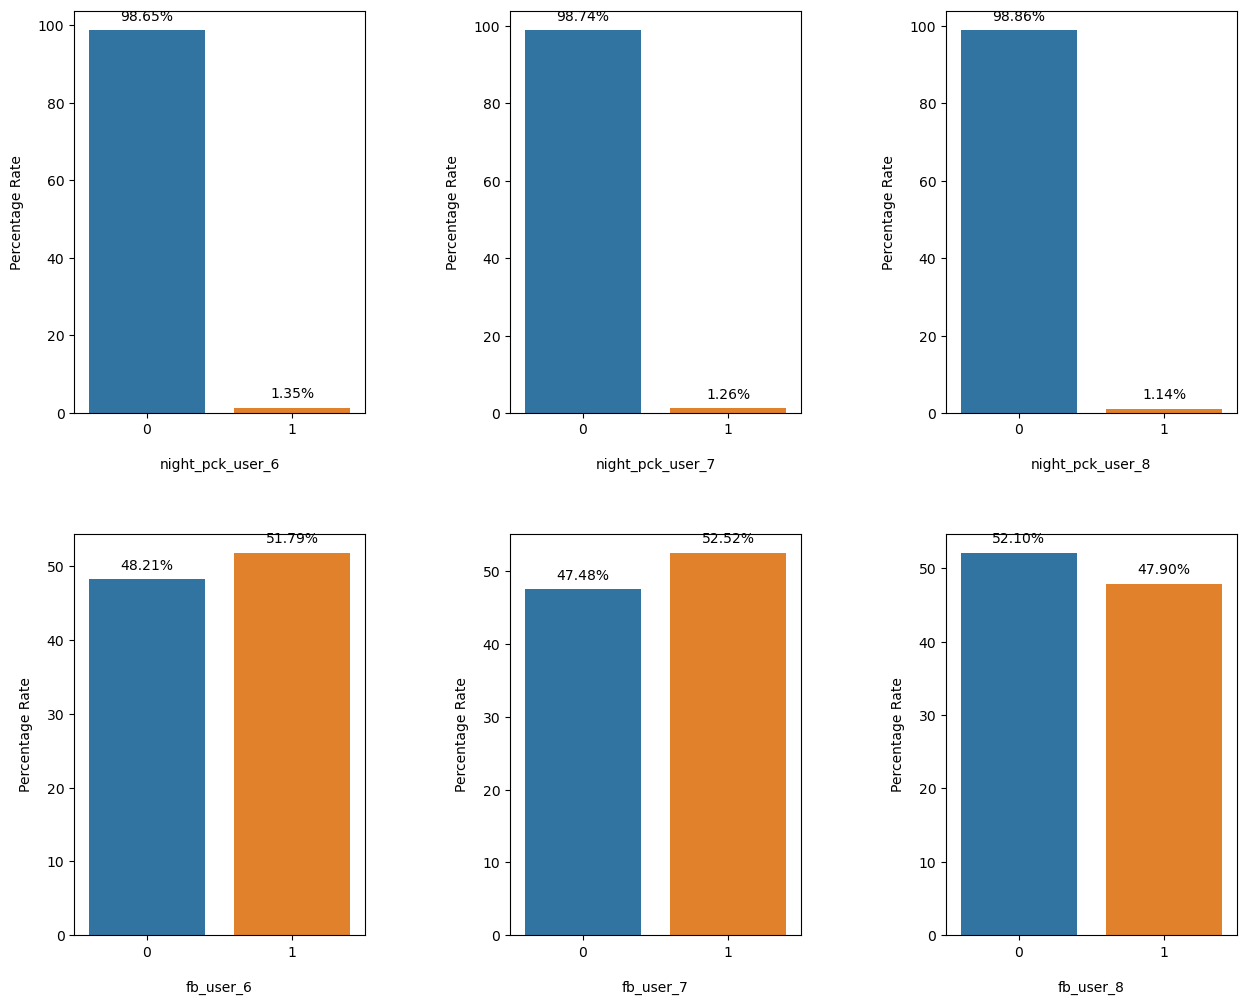

In [62]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:
        
    series = round(((telecom_data[col_list].value_counts(dropna = False))/(len(telecom_data[col_list])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    
    add_data_labels(ax)

    counter += 1

del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

## <font color = "purple"> Insights: </font>

Insights about above Bar Graphs, We can see that nobody is using Night pack feature and you can see these in all three months.
but on the other hand users are using Facebook(FB) in equal amount. 

Positive examples = 2364
Negative examples = 27460
Rate of Churn = 8.61%


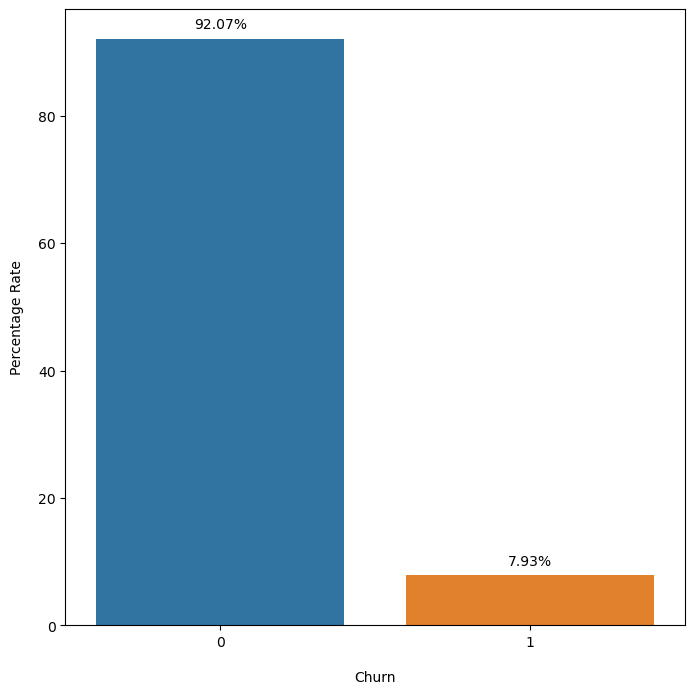

In [63]:
pos = telecom_data[telecom_data["churn"] == 1].shape[0]
neg = telecom_data[telecom_data["churn"] == 0].shape[0]

print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Rate of Churn = {(pos / neg) * 100:.2f}%")

plt.figure(figsize = (8, 8))

series = round(((telecom_data["churn"].value_counts(dropna = False))/(len(telecom_data["churn"])) * 100), 2)

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)


add_data_labels(ax)

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

In [64]:
def set_plotting_variable(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)

In [65]:
def plot_univariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, x_axis, data, wspace):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    title_1 = "Distribution Plot of " + xlabel
    title_2 = "Box Plot of " + xlabel

    
    plt.subplot(subplot_x, subplot_y, 1)

    sns.distplot(data[x_axis], hist = True, kde = True, color = 'g')
    
    set_plotting_variable(title_1, xlabel, ylabel)

    
    plt.subplot(subplot_x, subplot_y, 2)

    sns.boxplot(x = x_axis, data = data, color = 'm')
    
    set_plotting_variable(title_2, xlabel, ylabel)
    
    plt.subplots_adjust(wspace = wspace)
    plt.show()

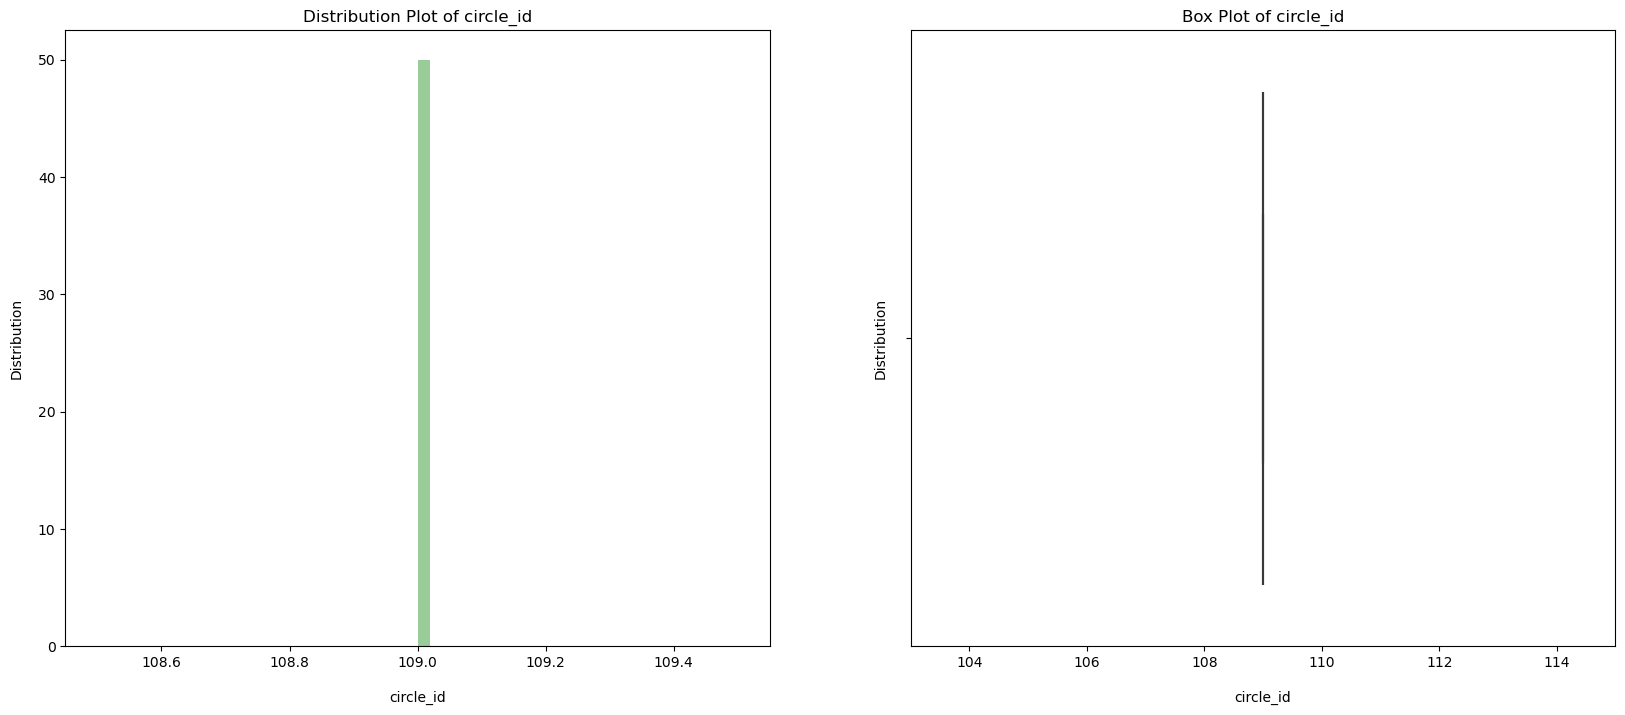

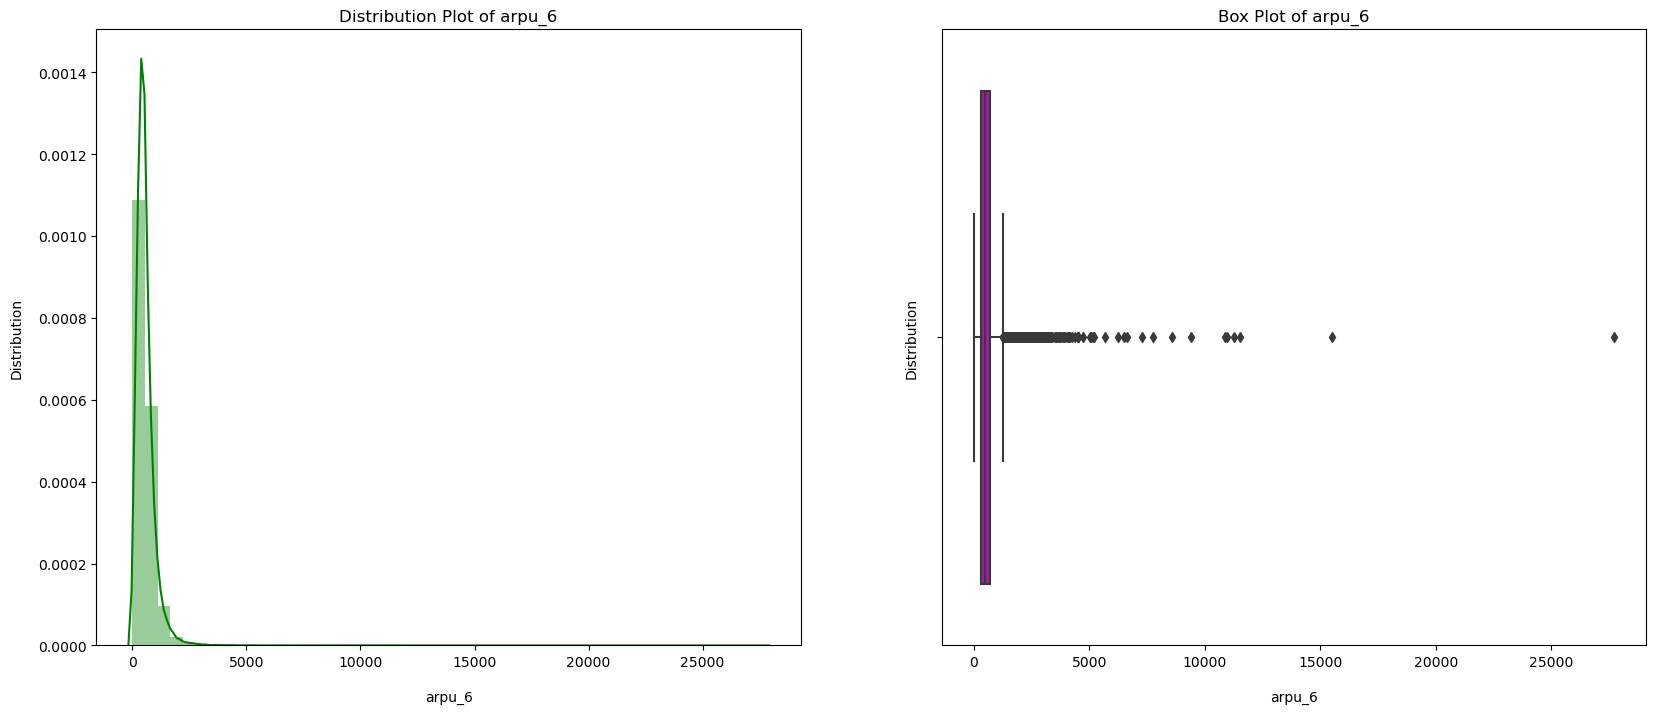

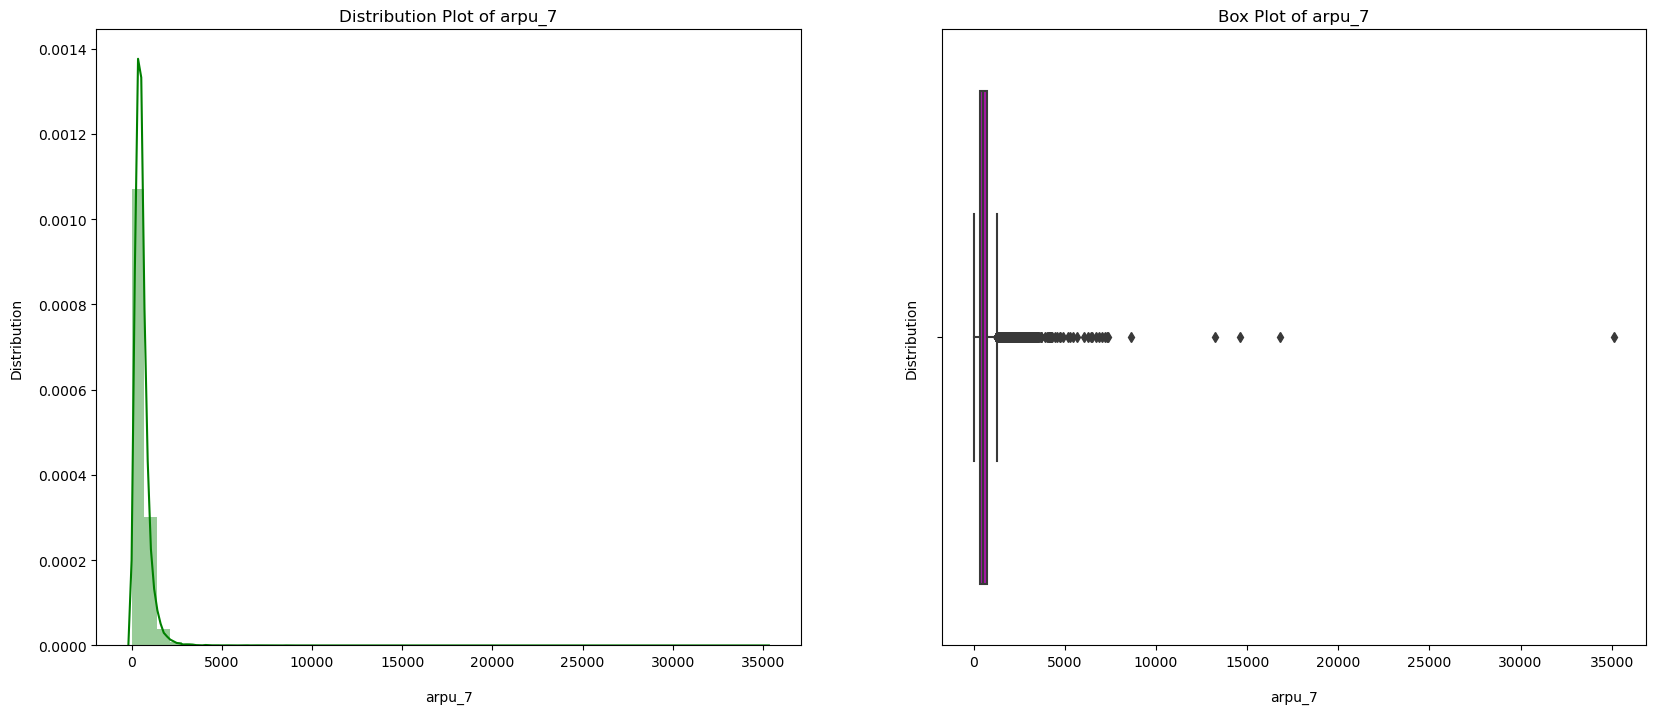

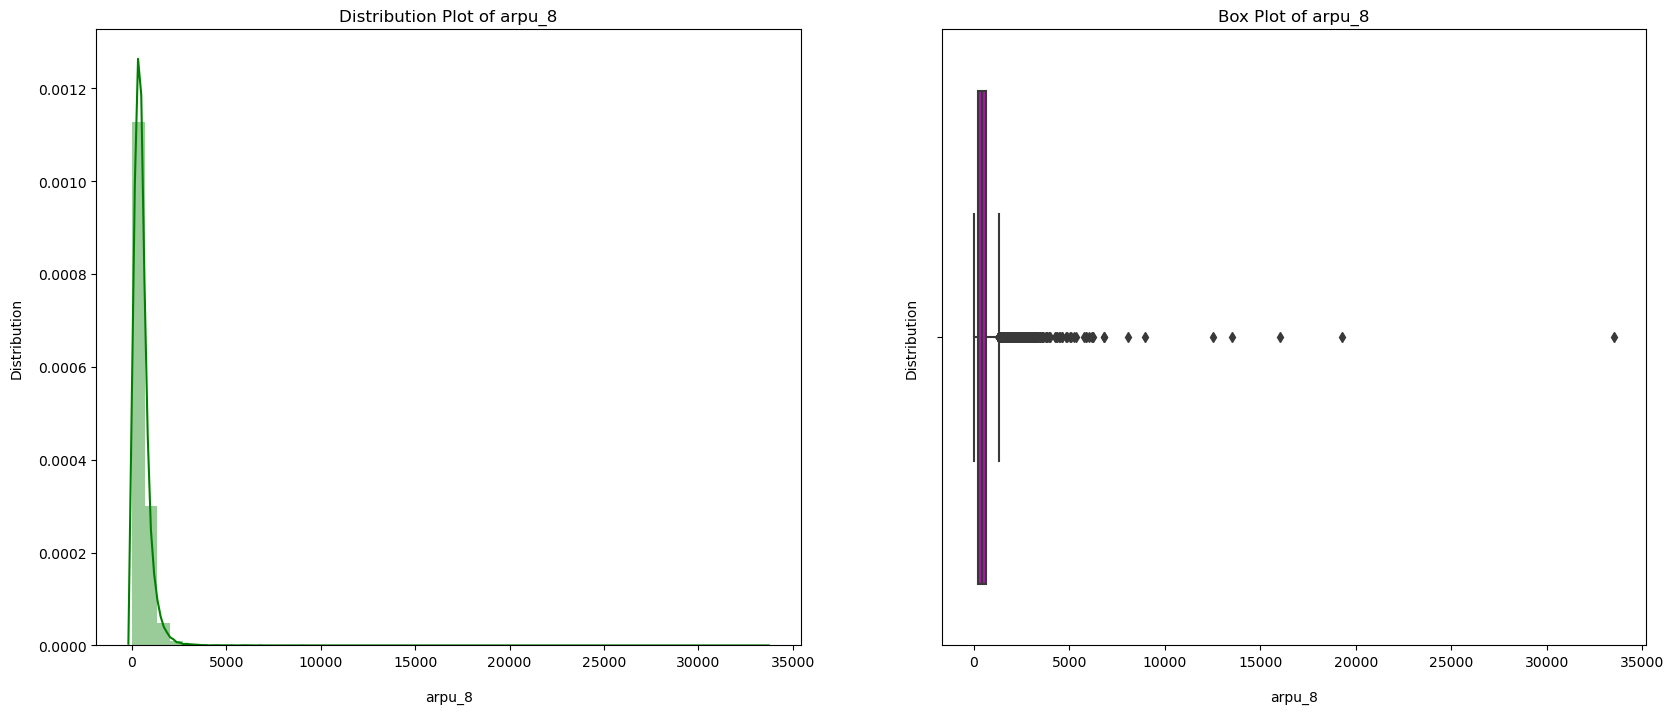

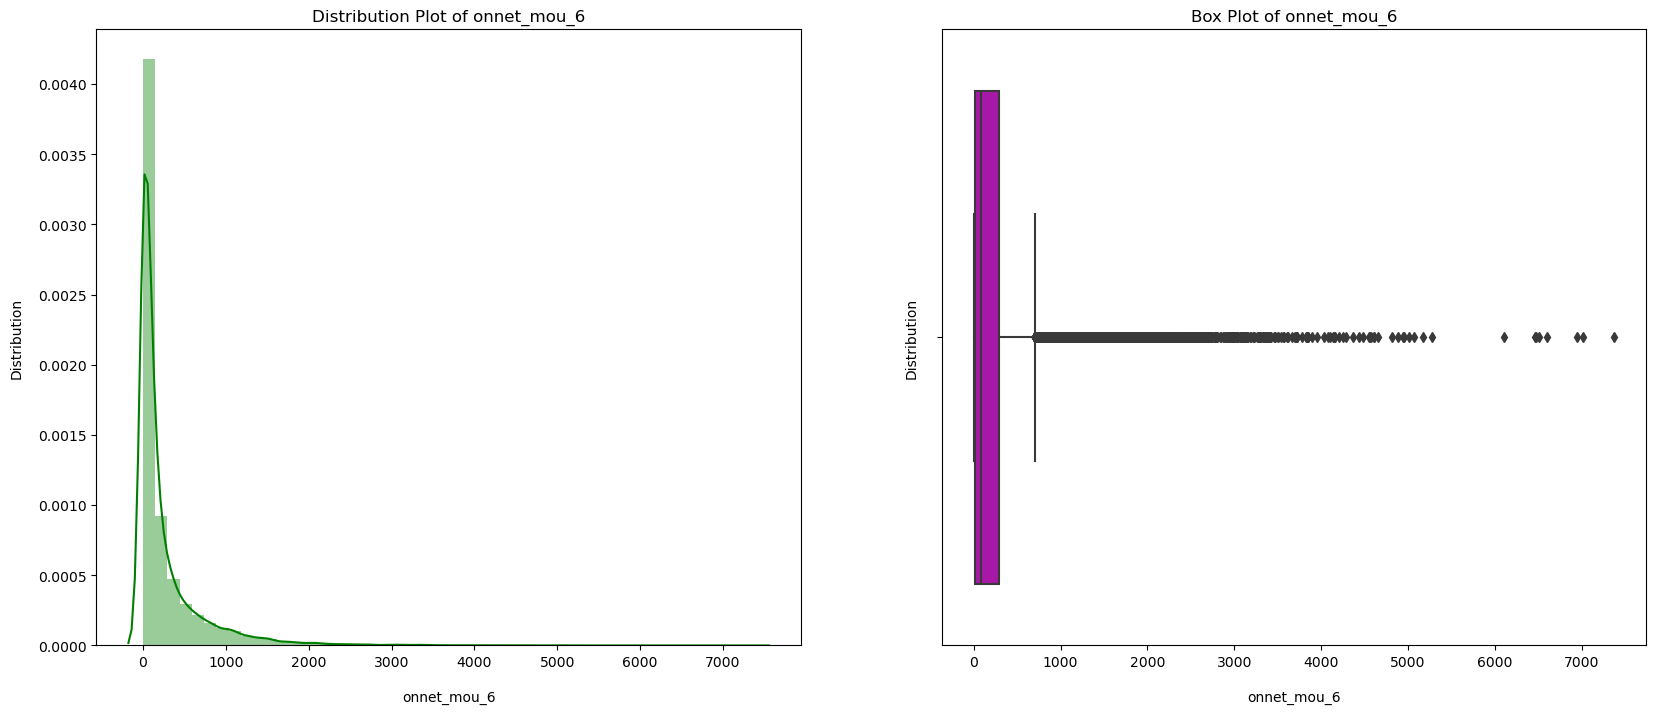

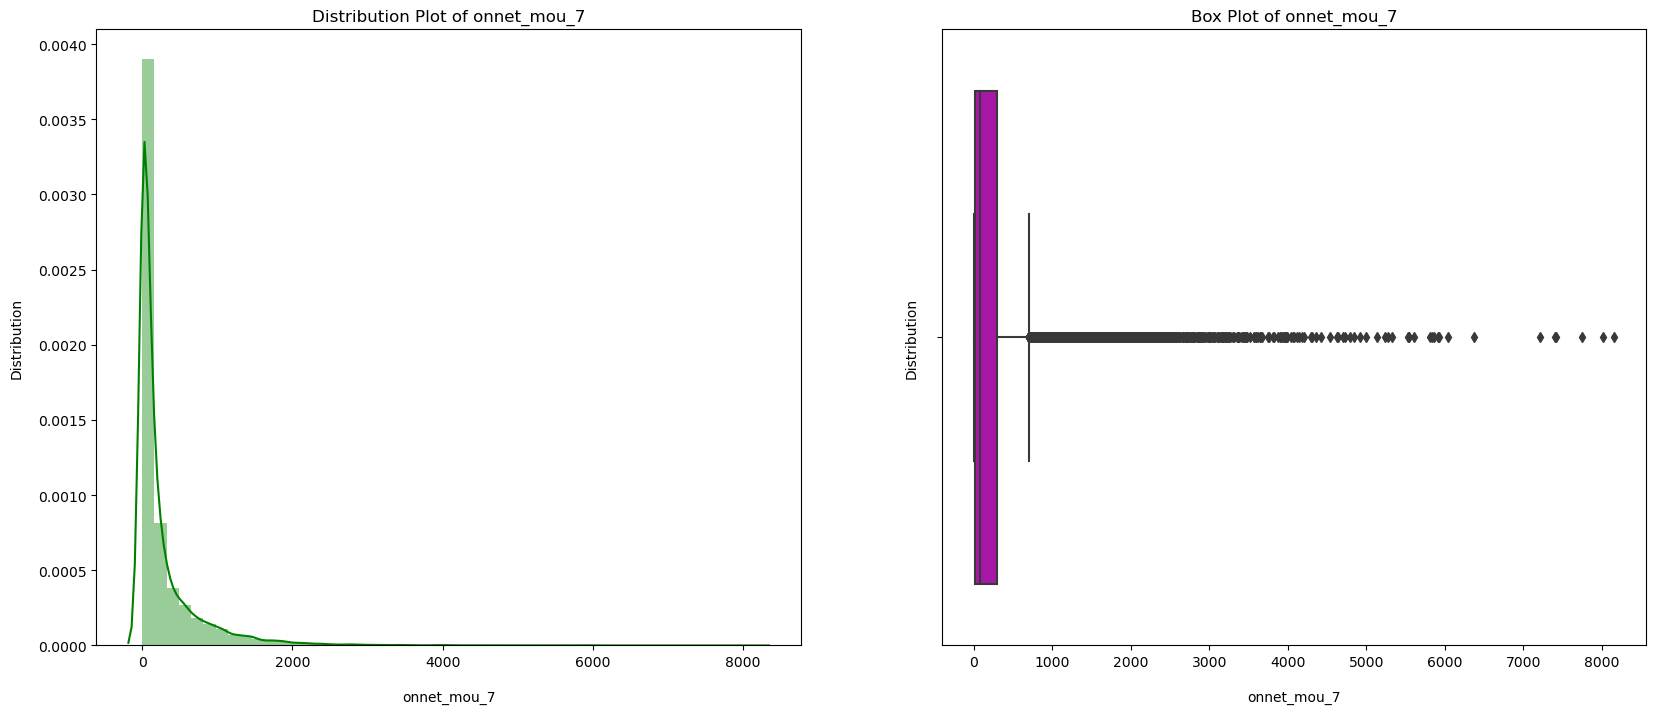

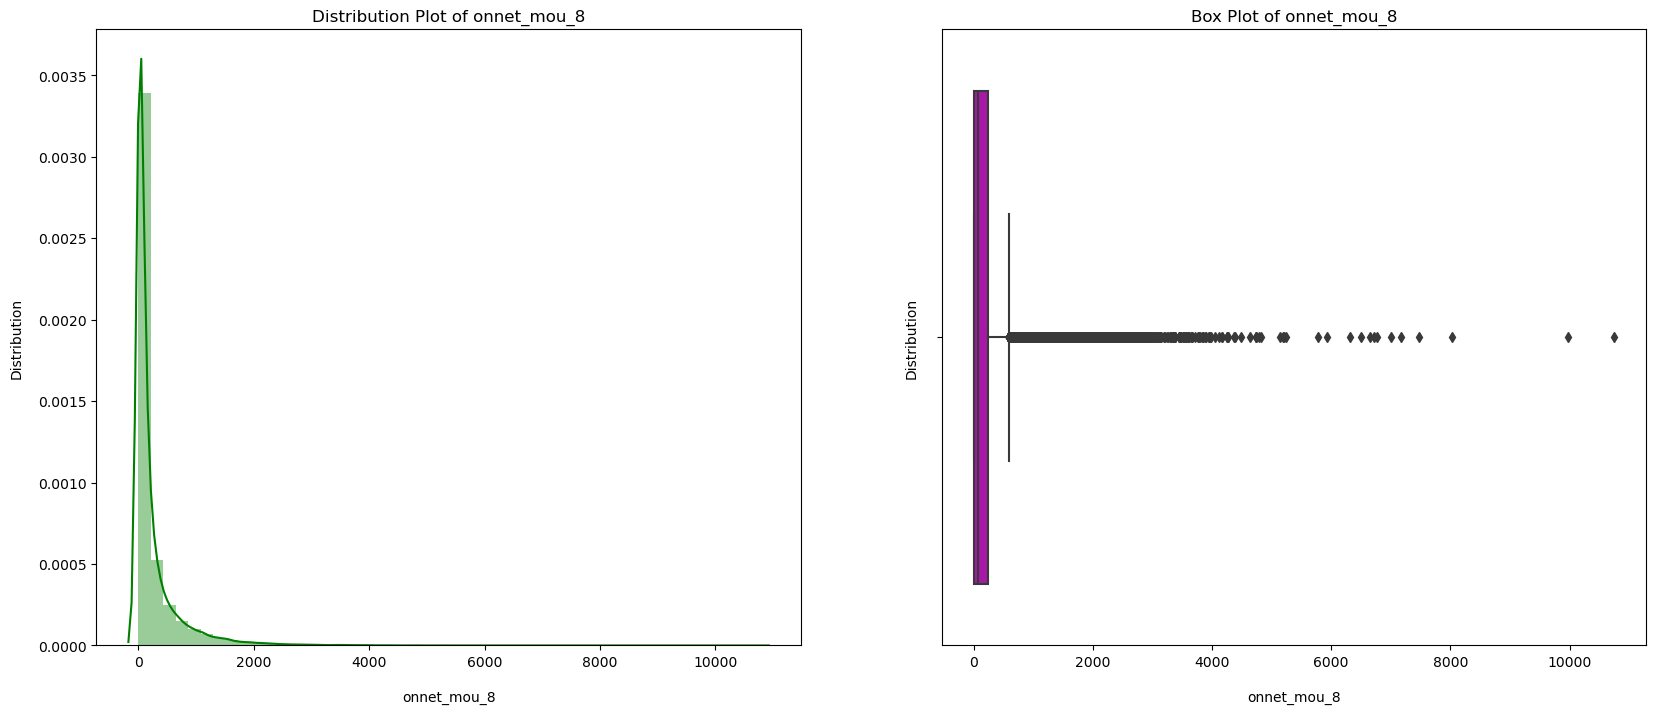

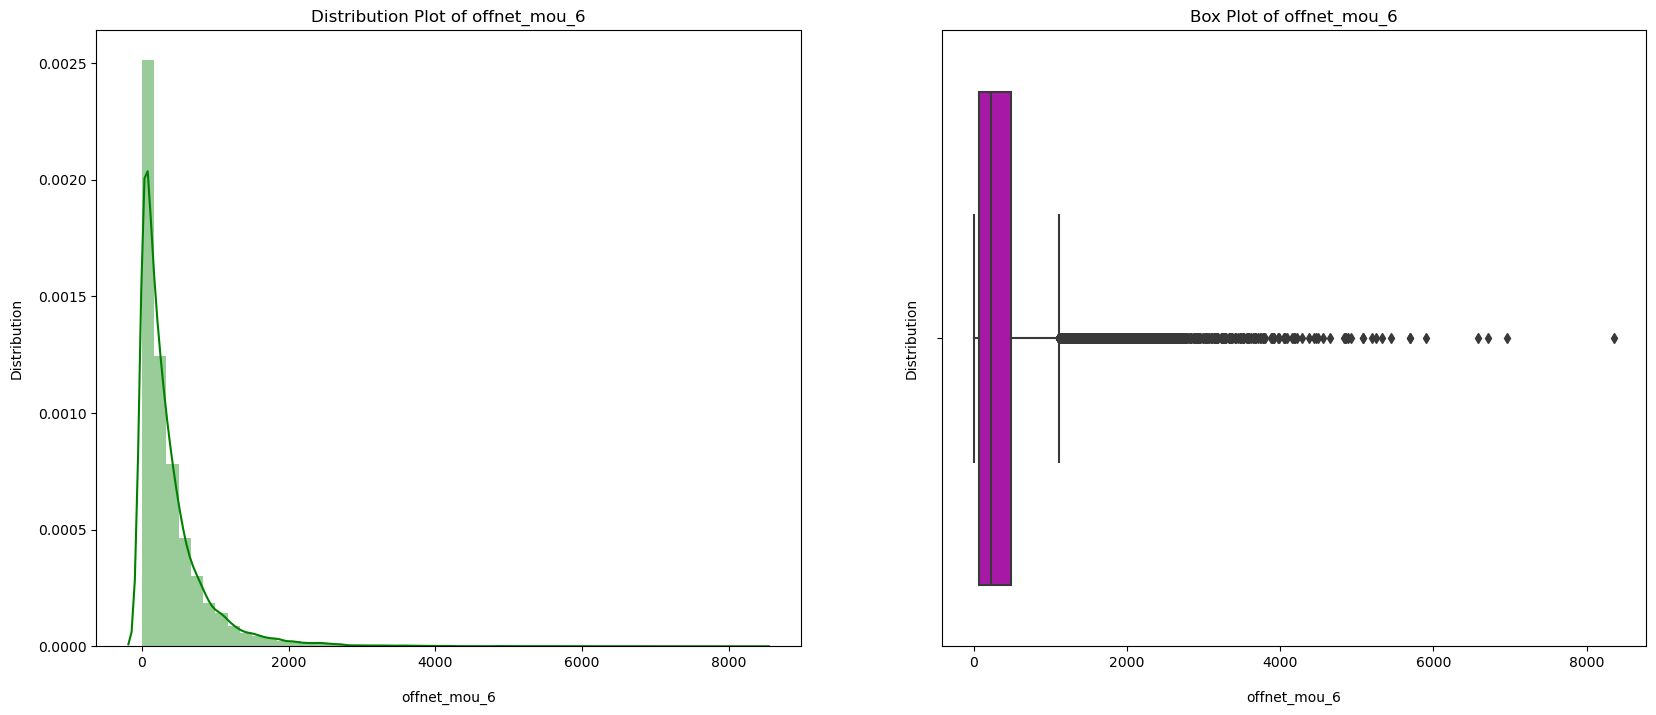

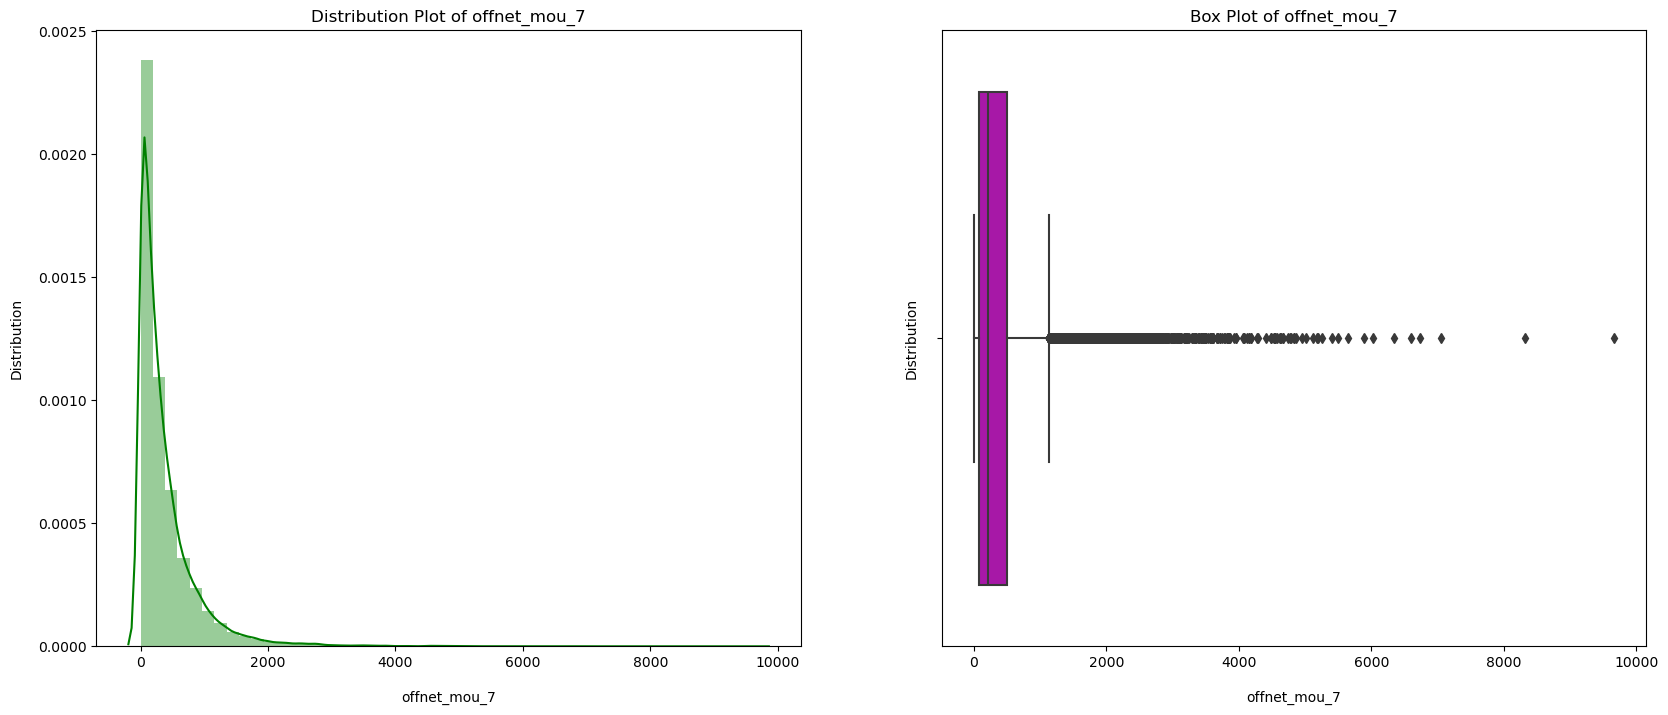

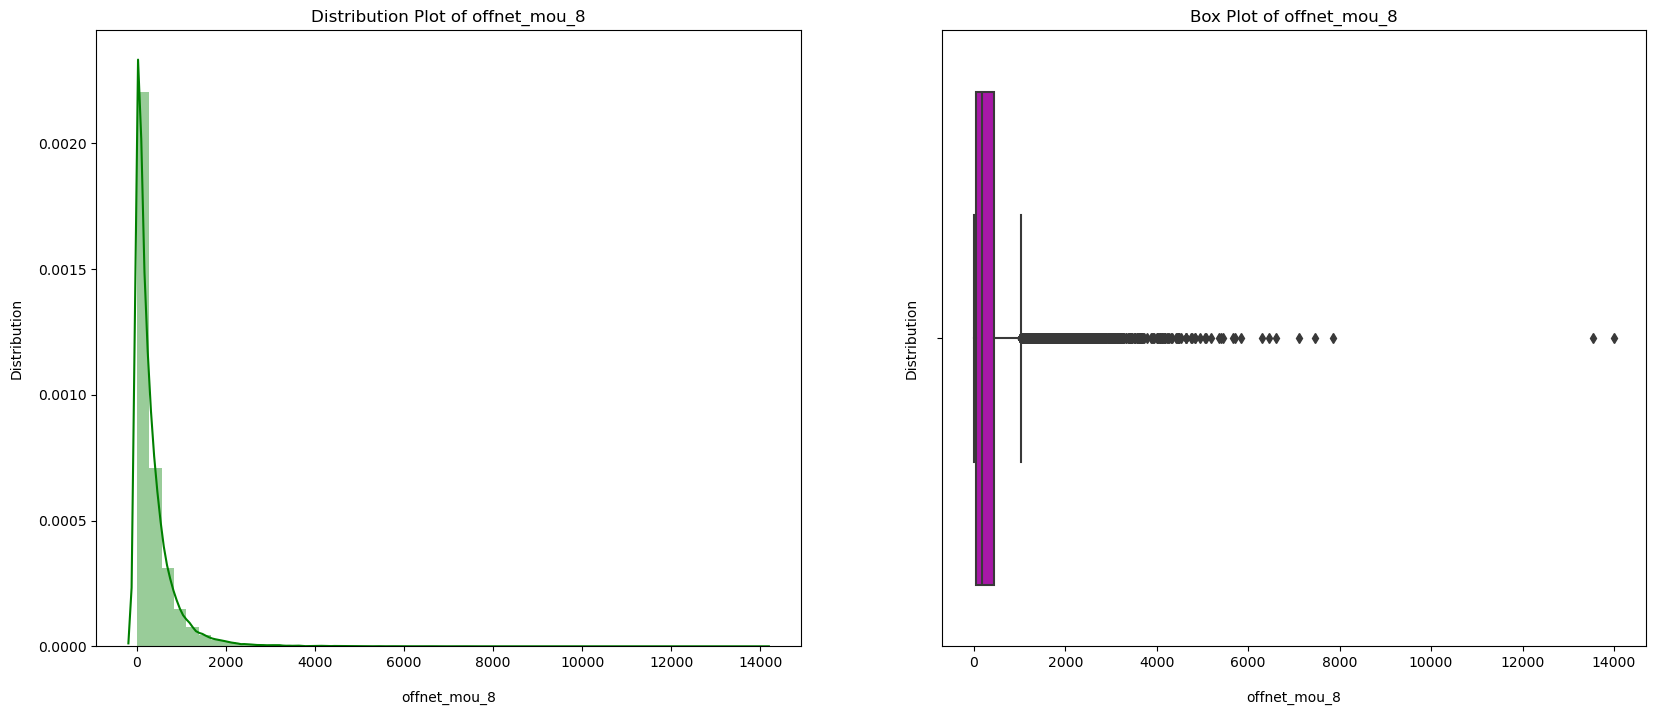

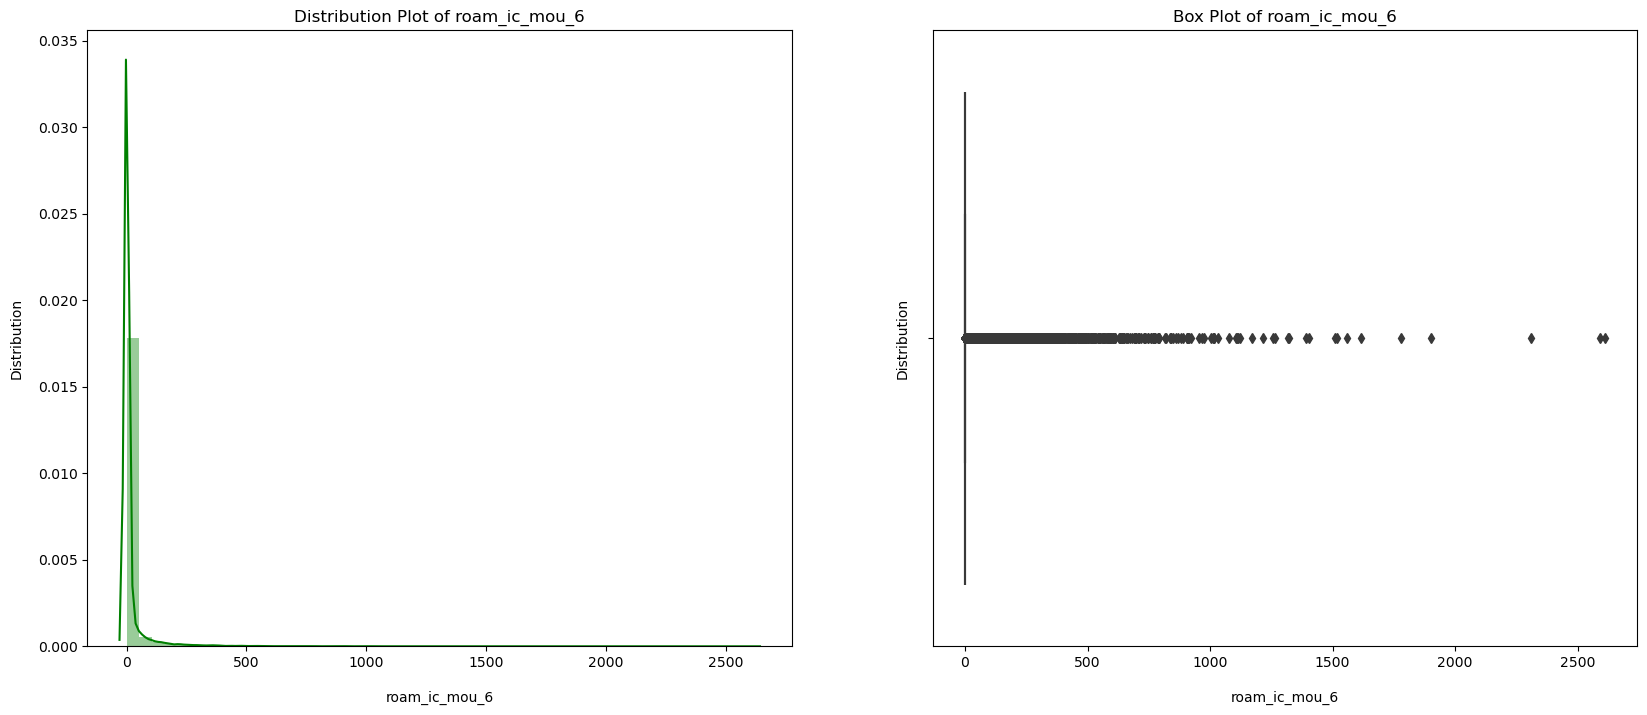

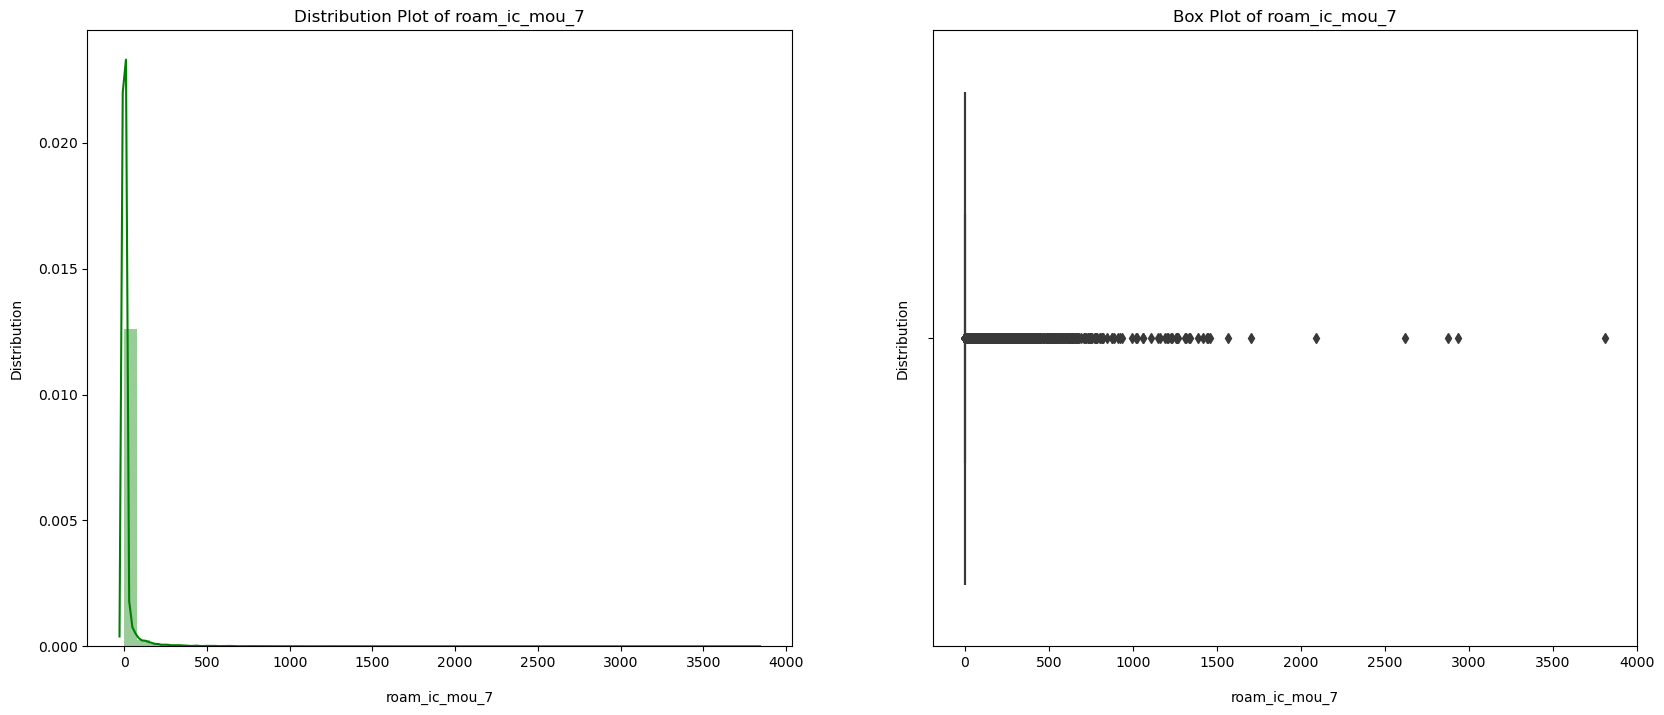

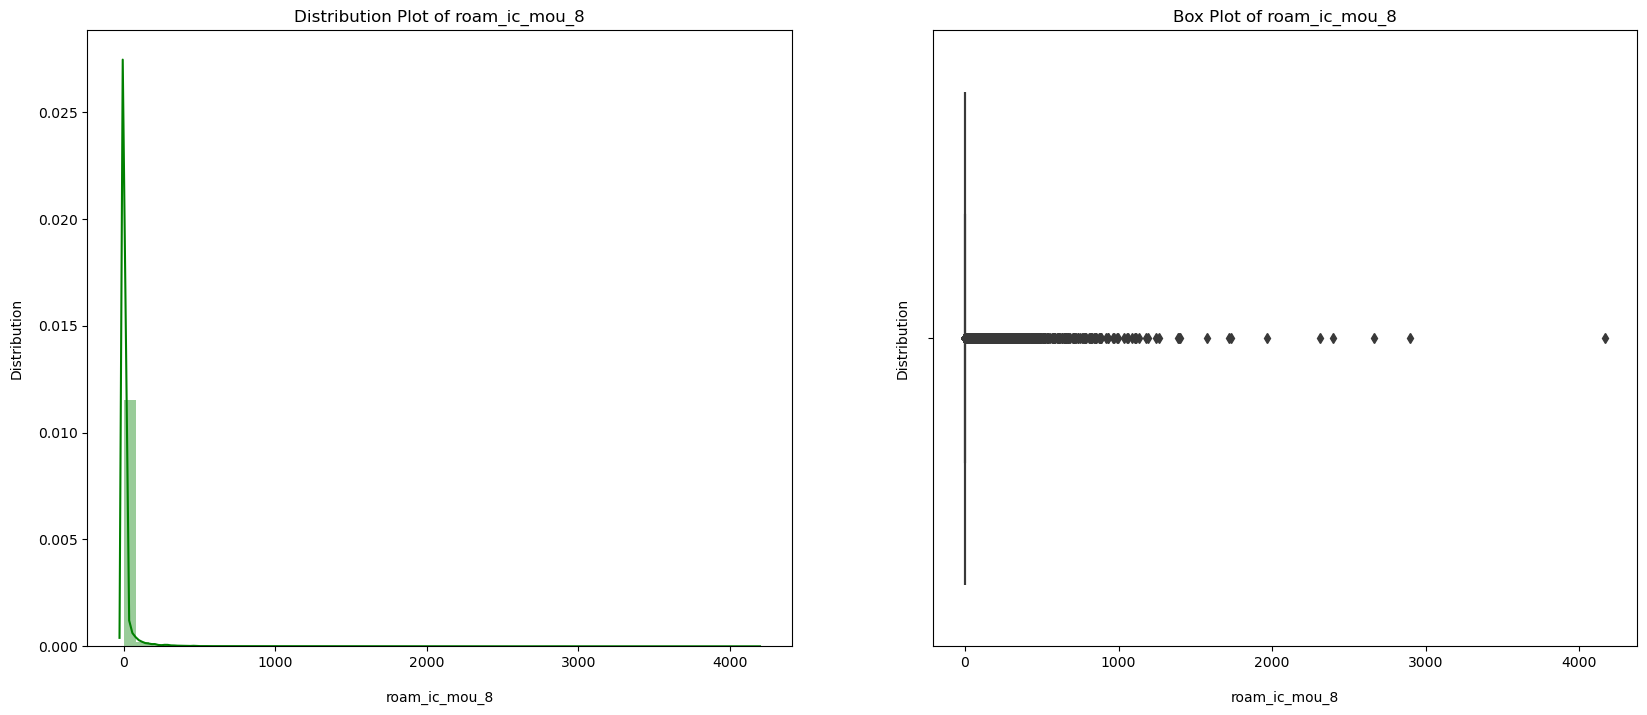

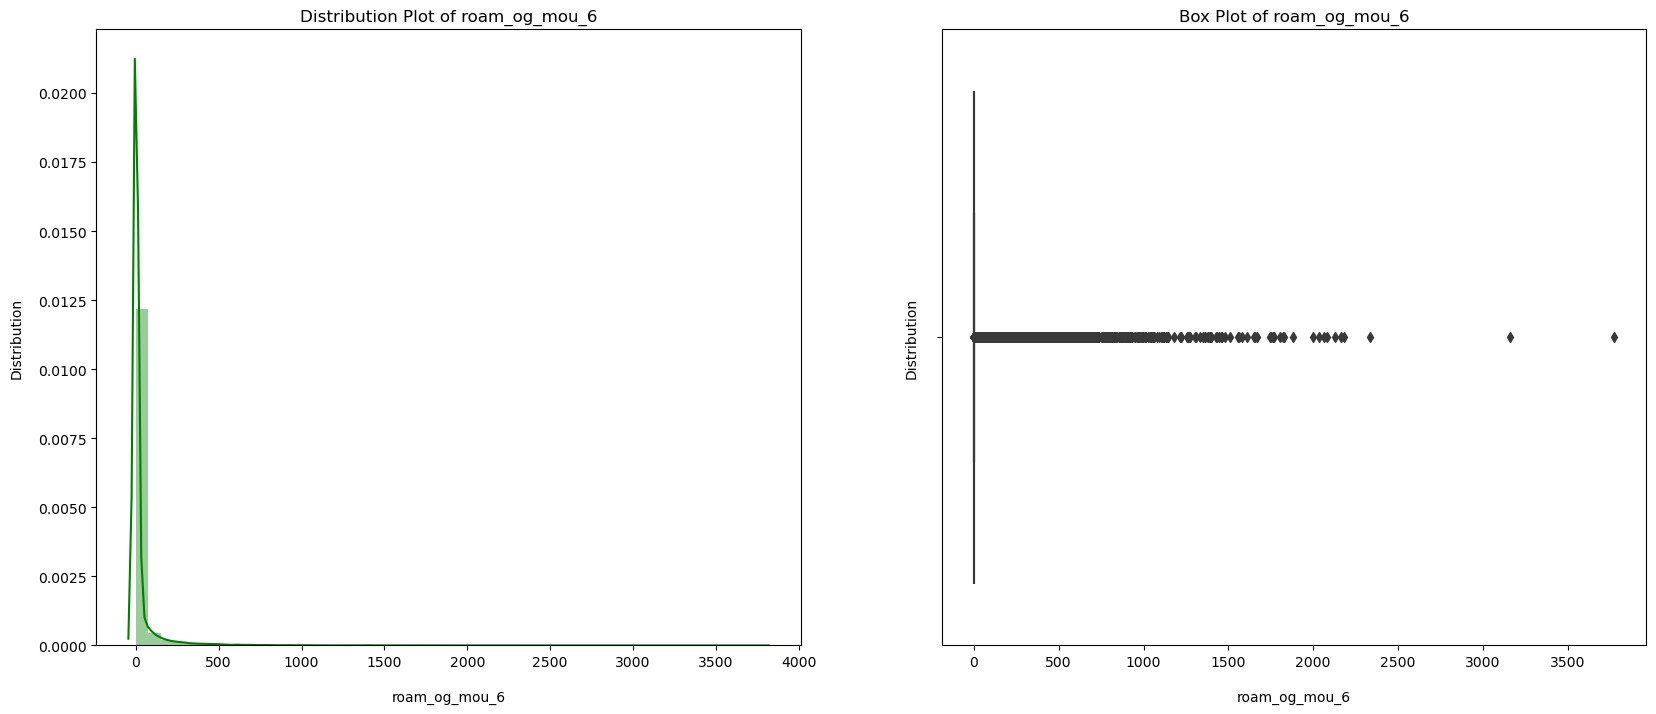

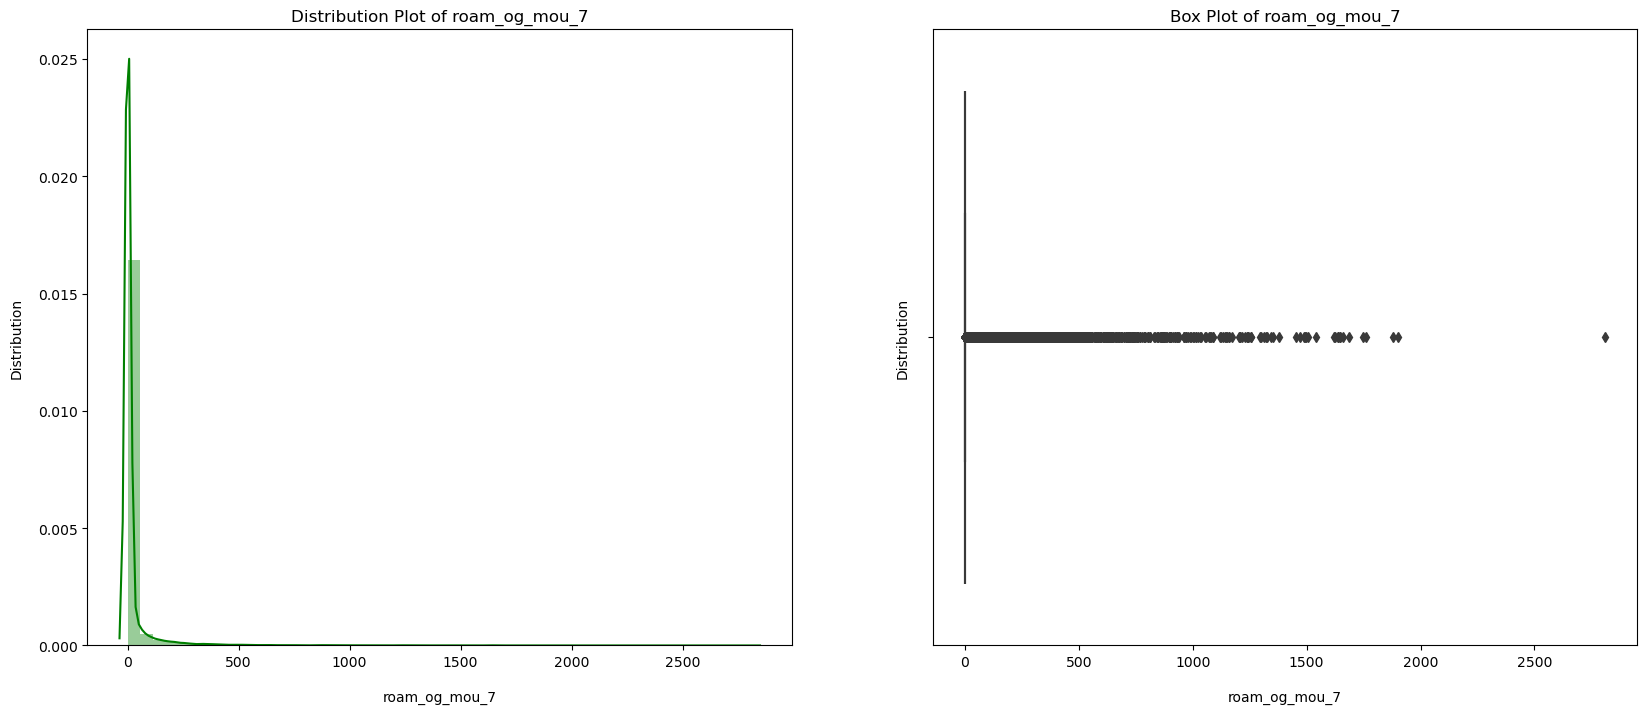

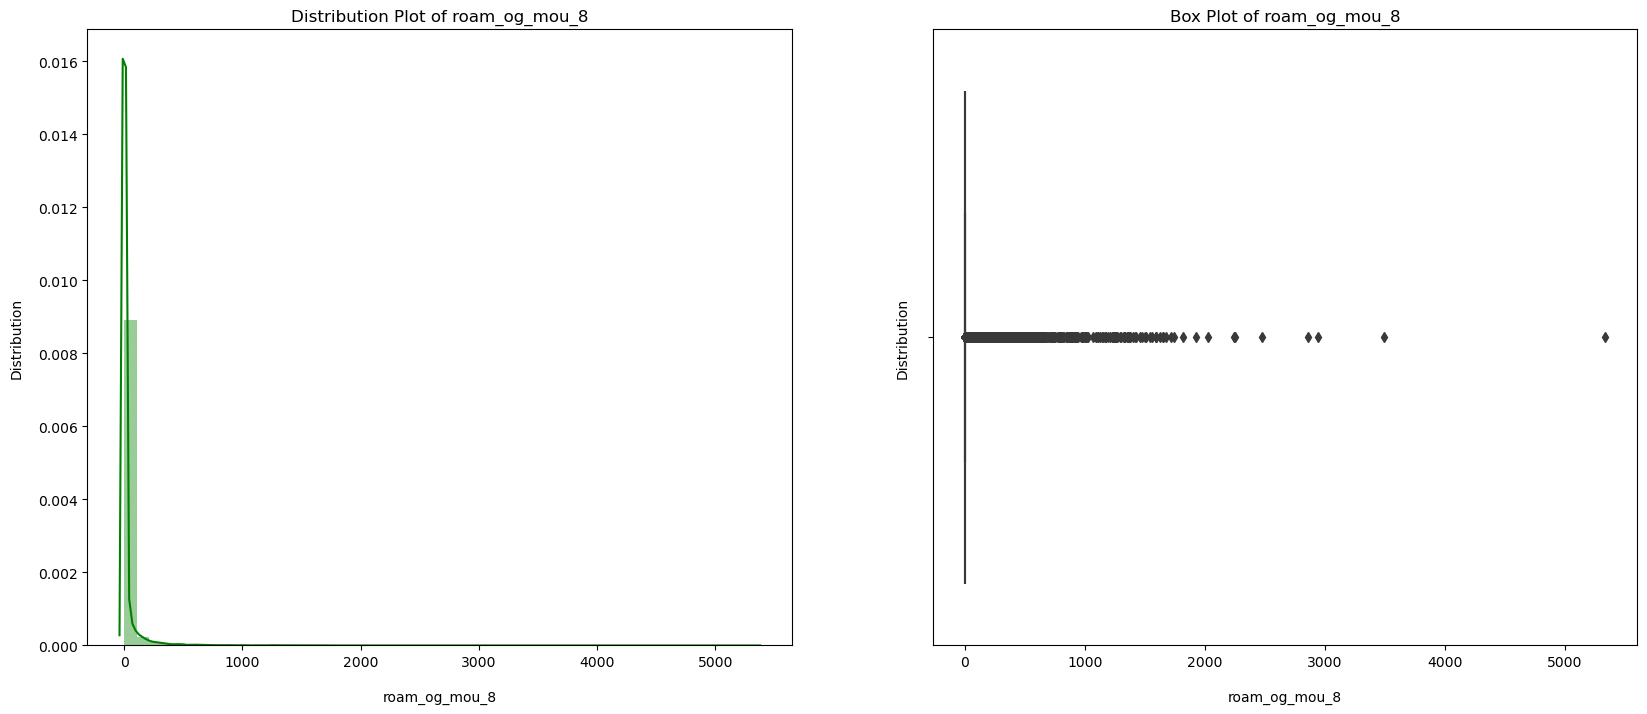

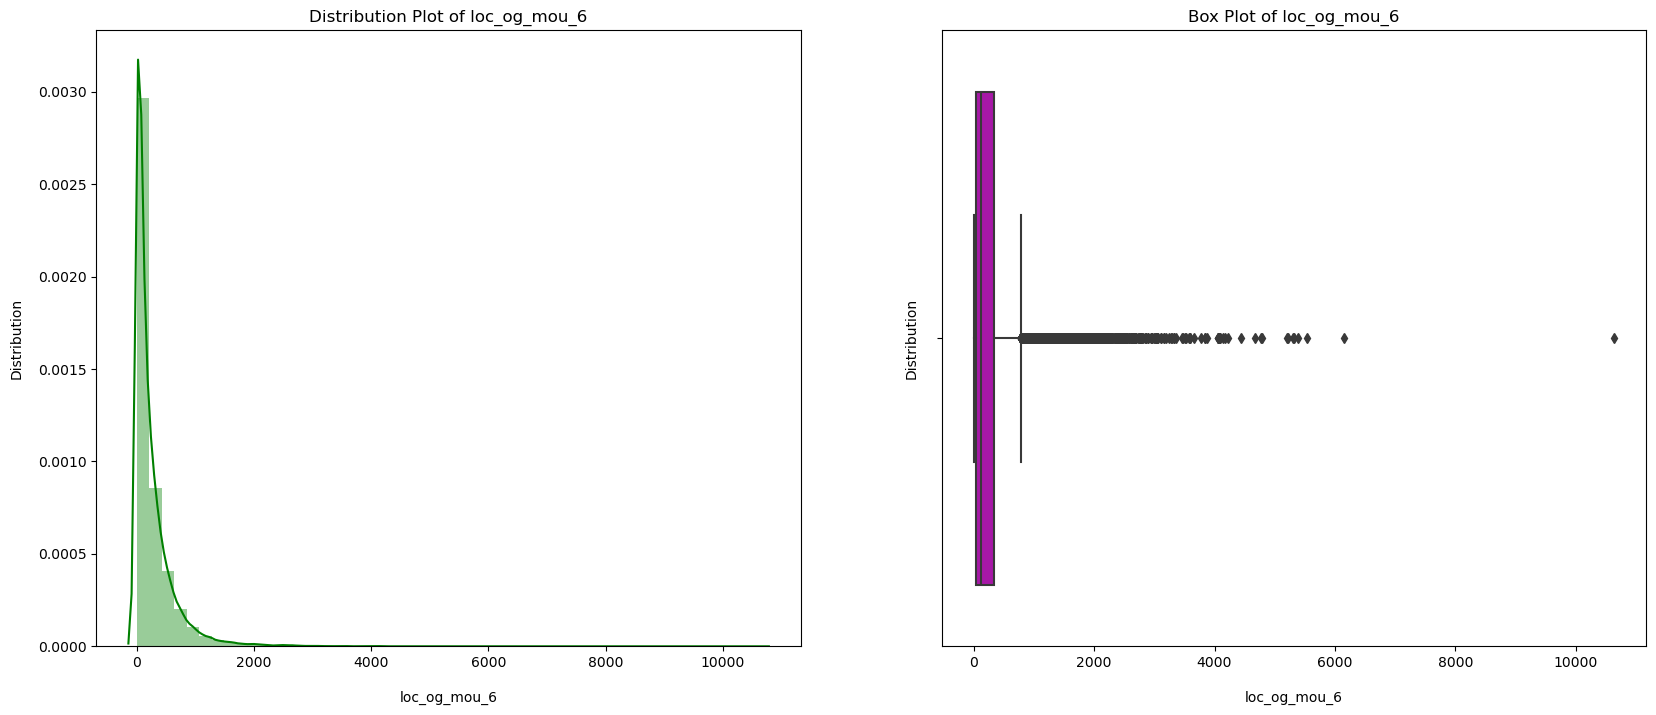

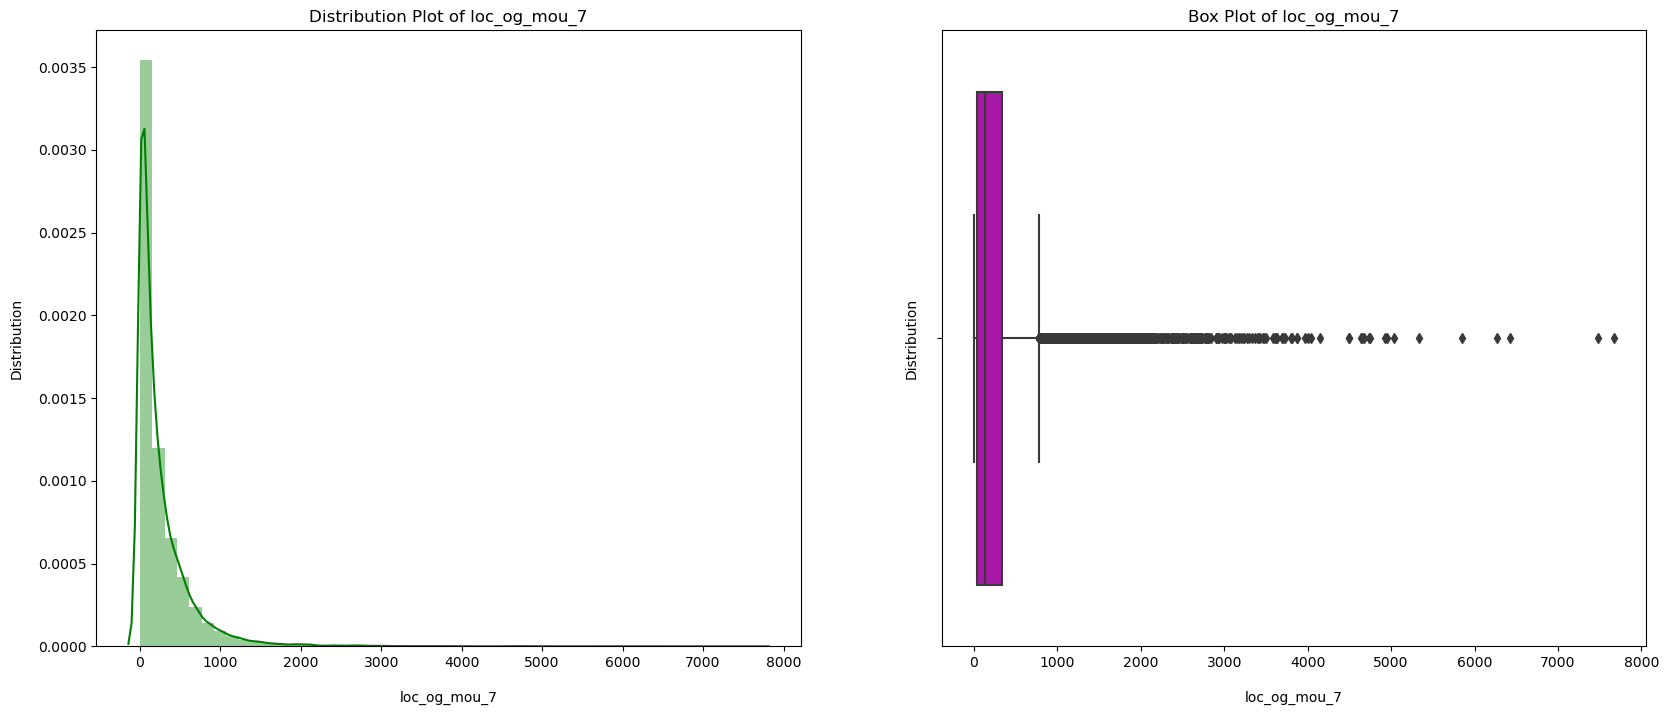

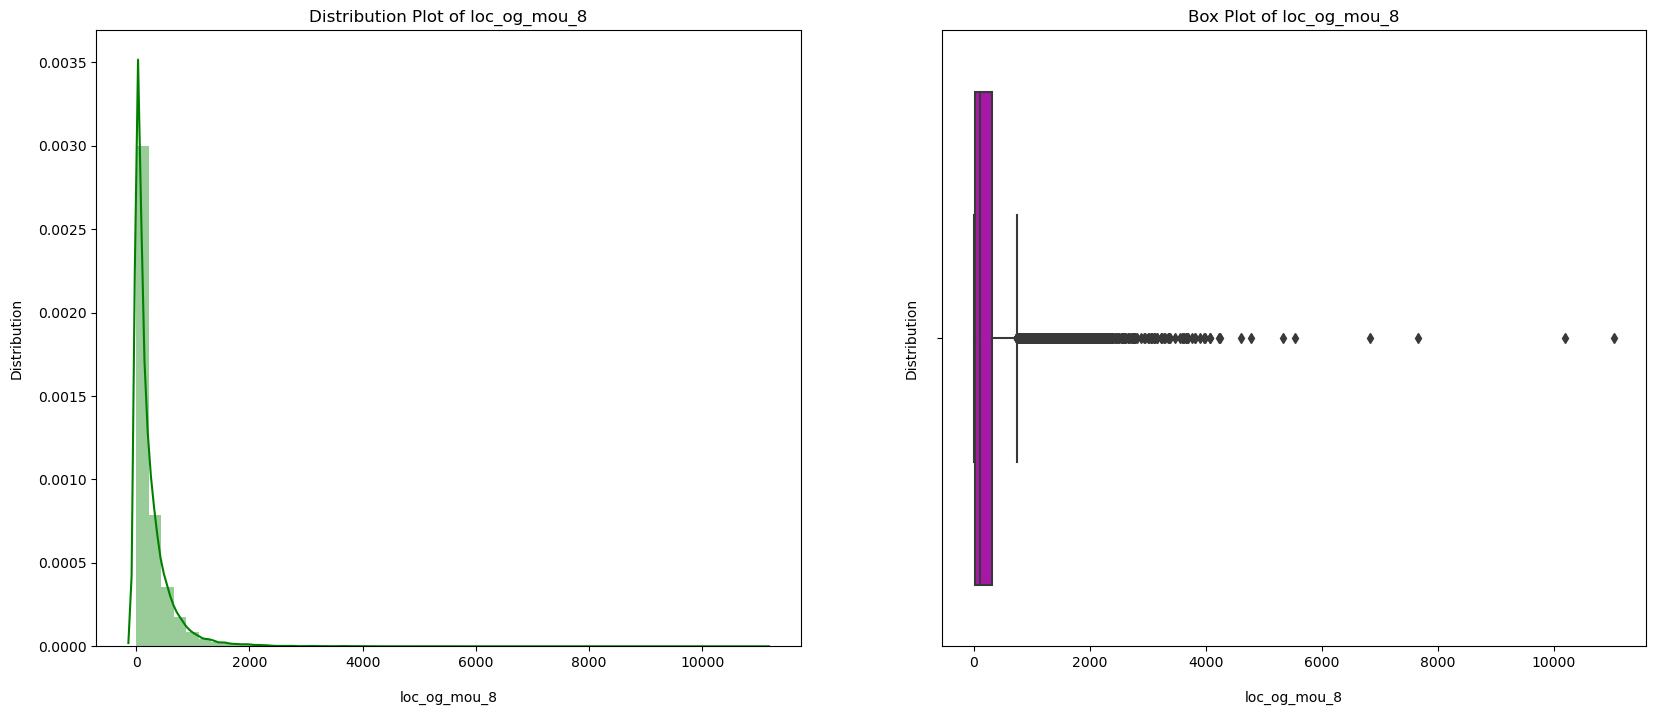

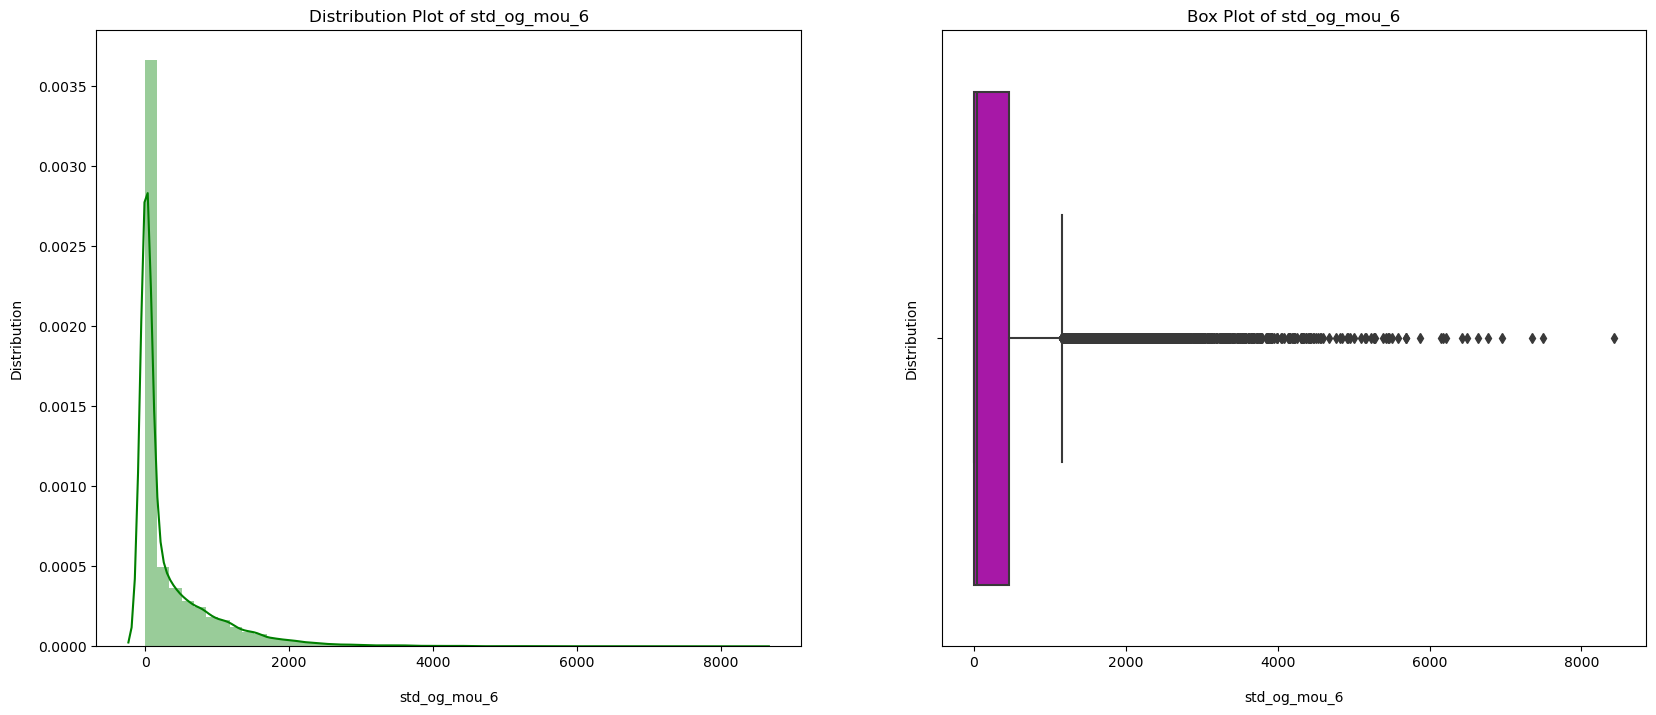

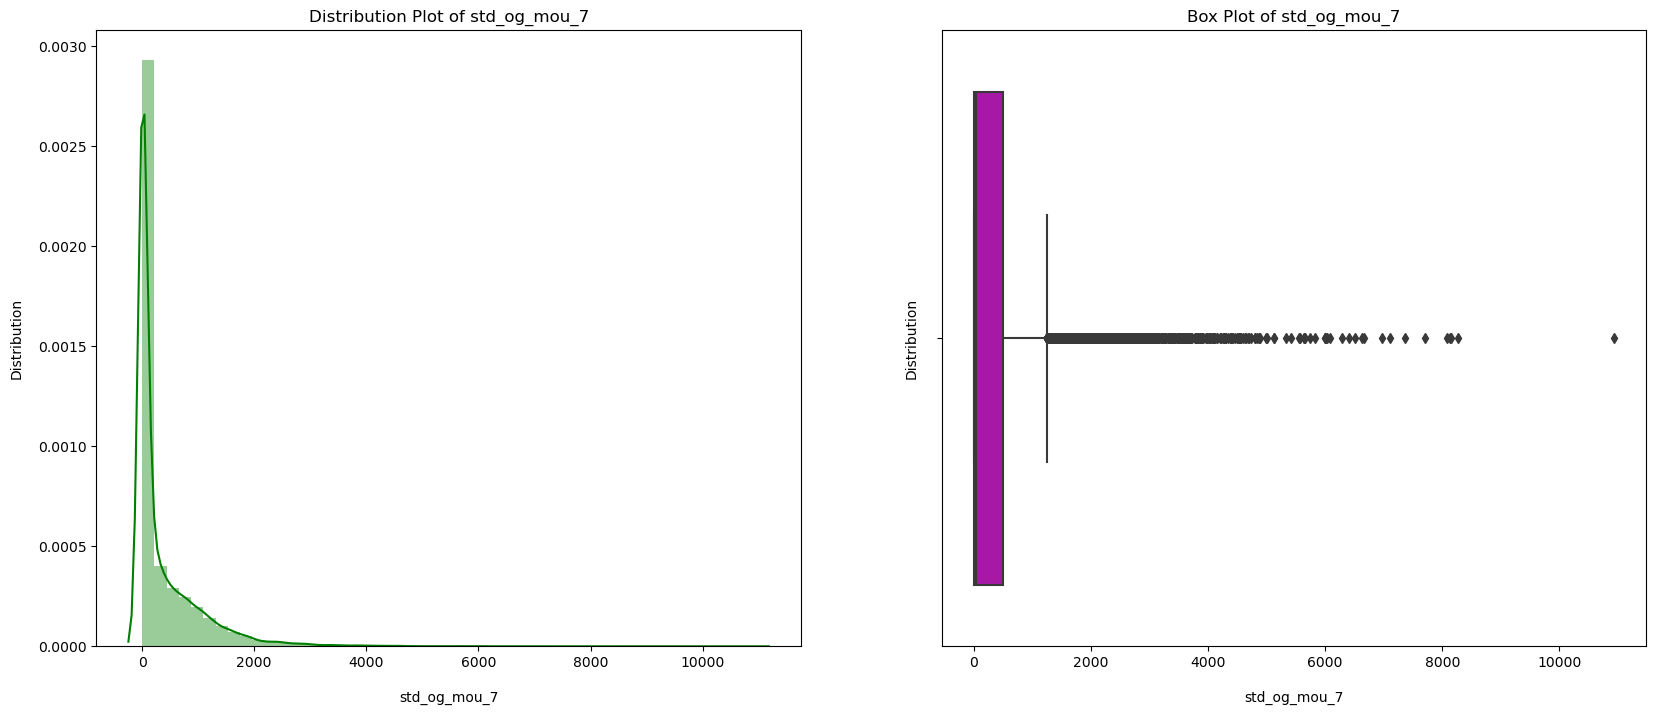

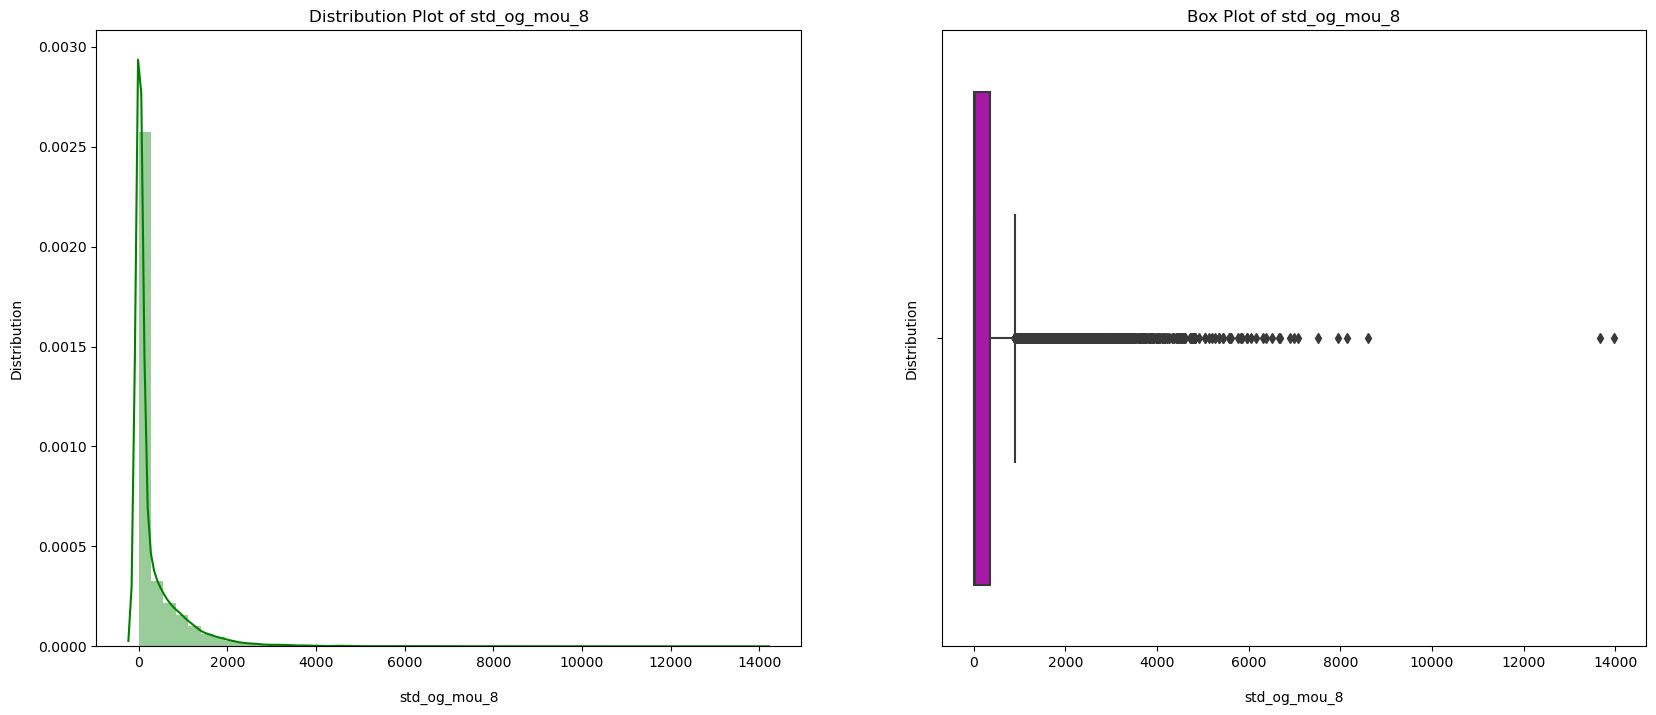

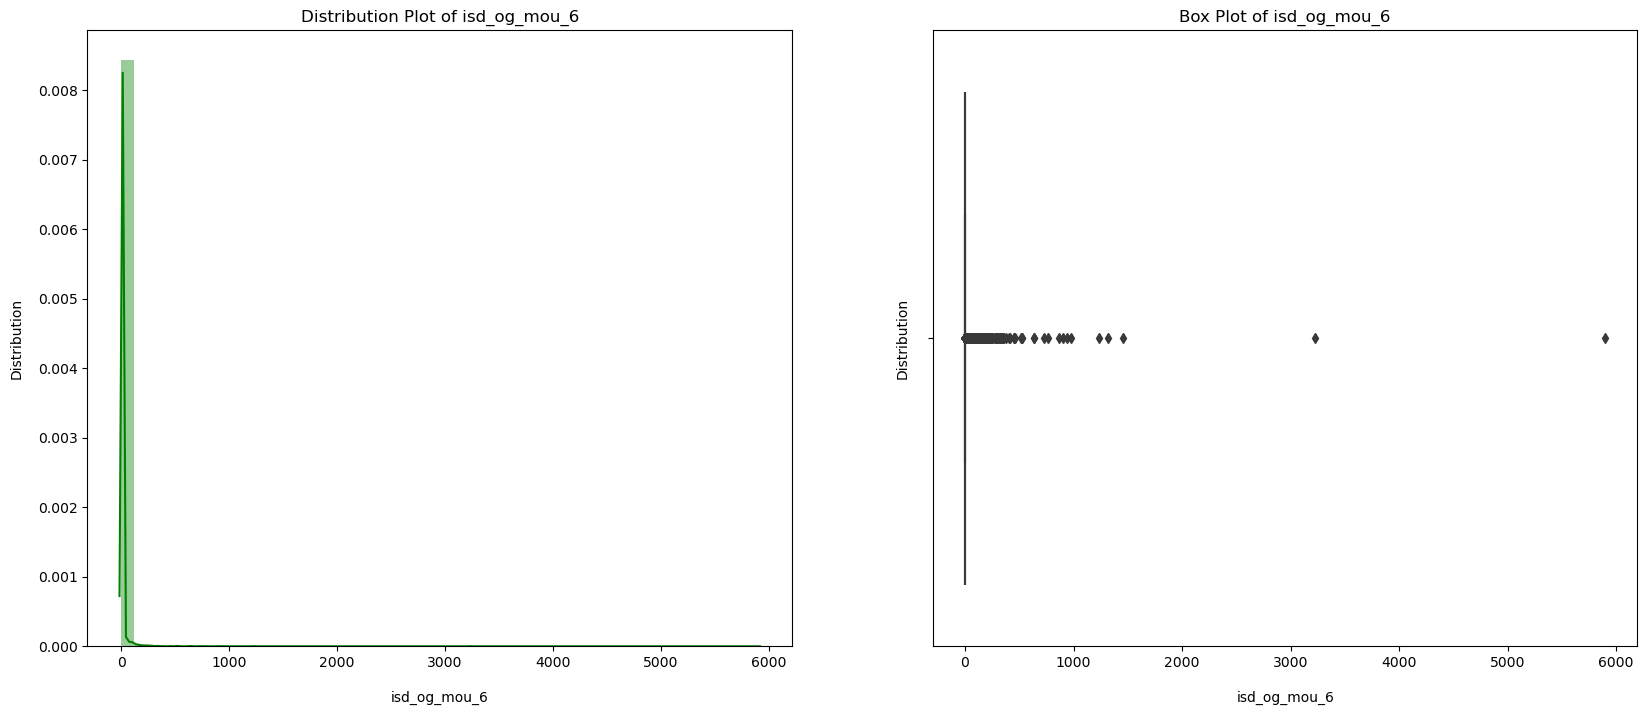

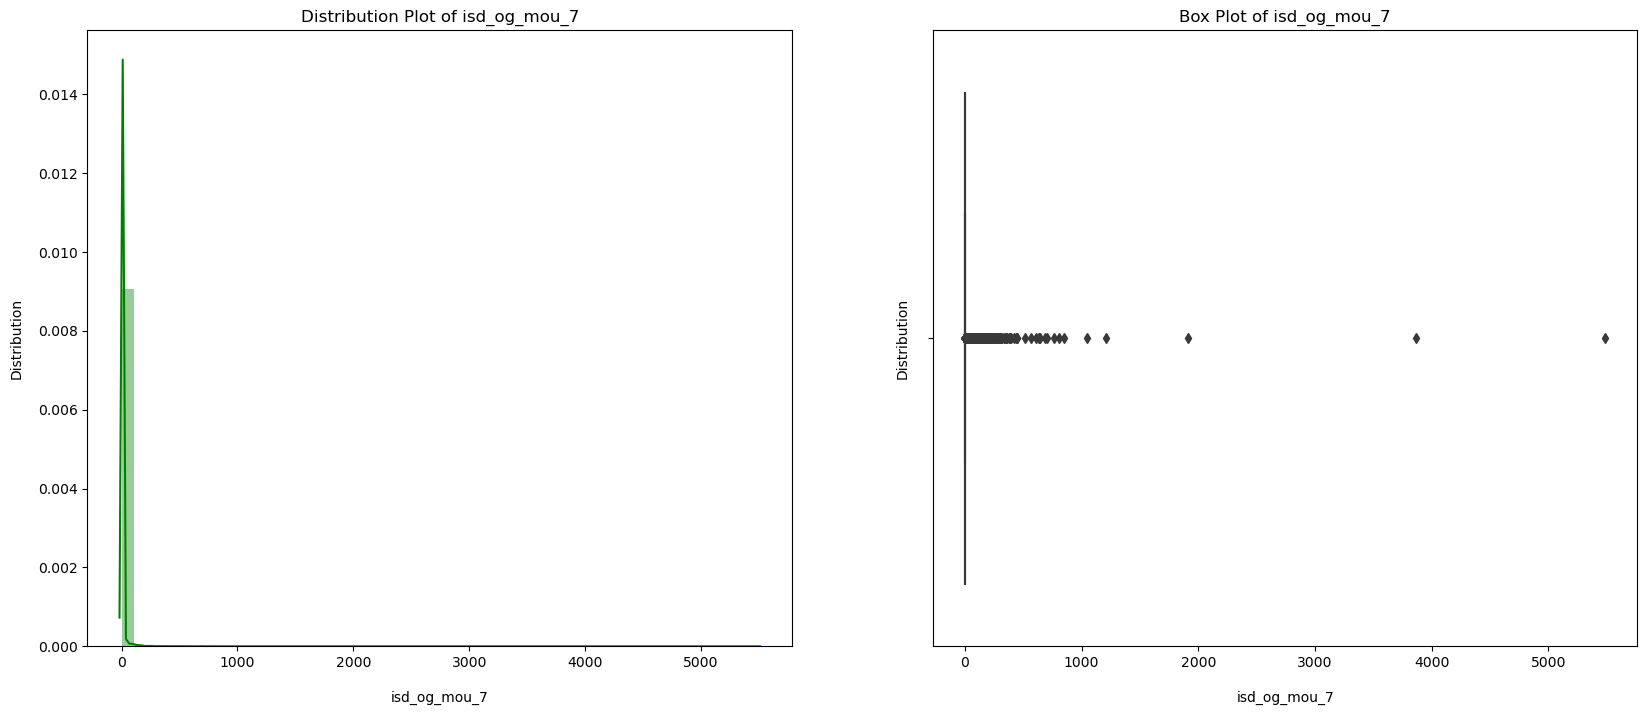

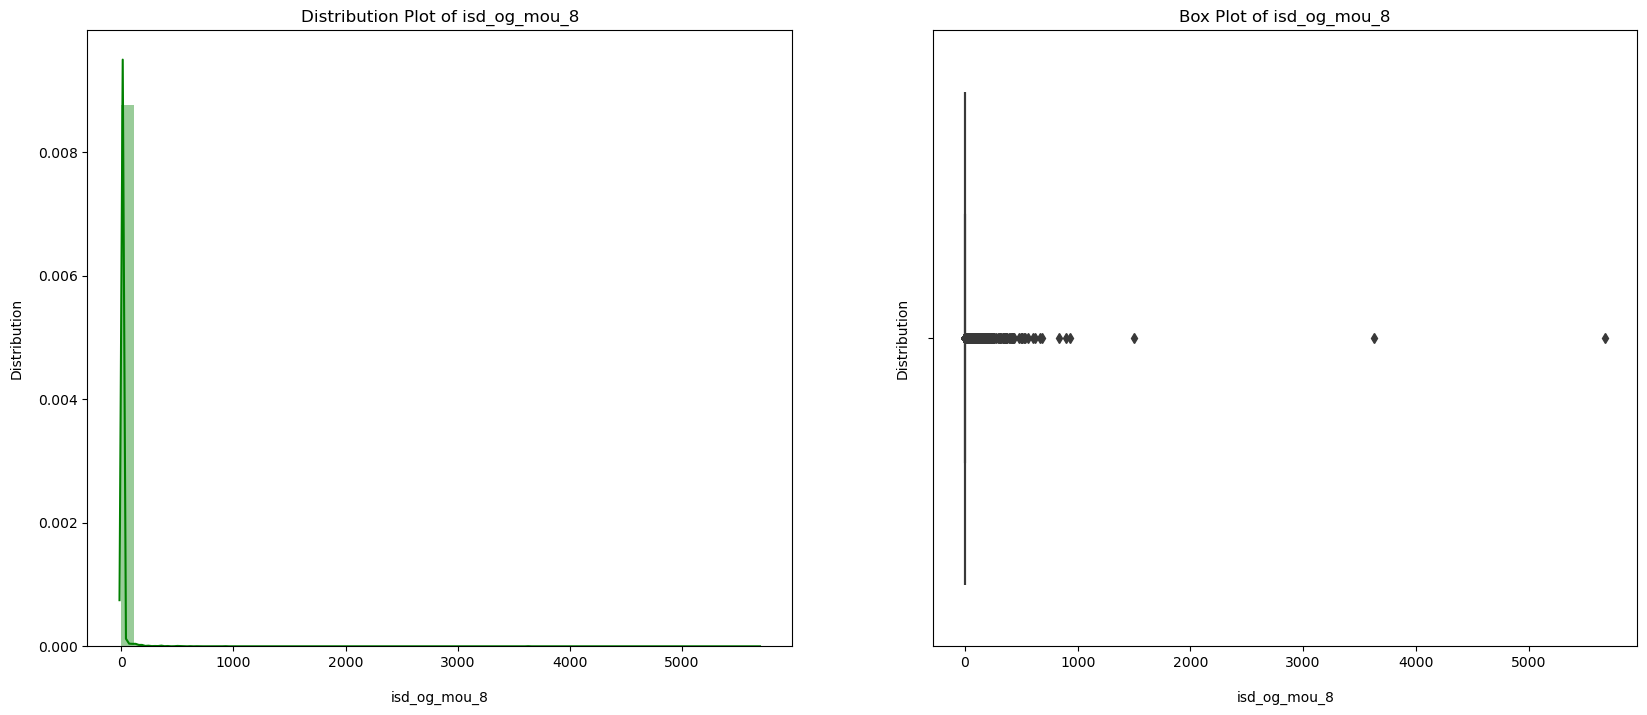

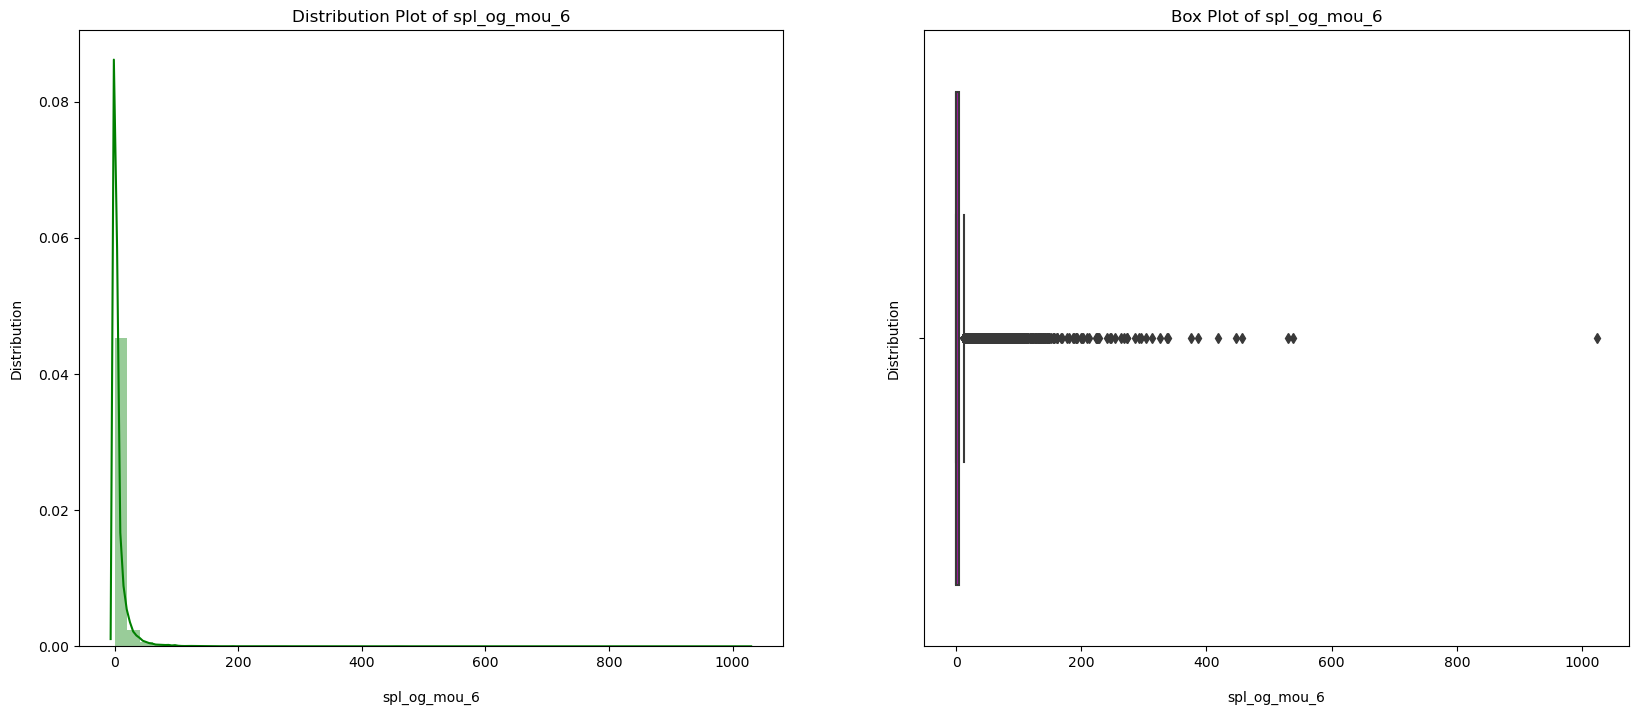

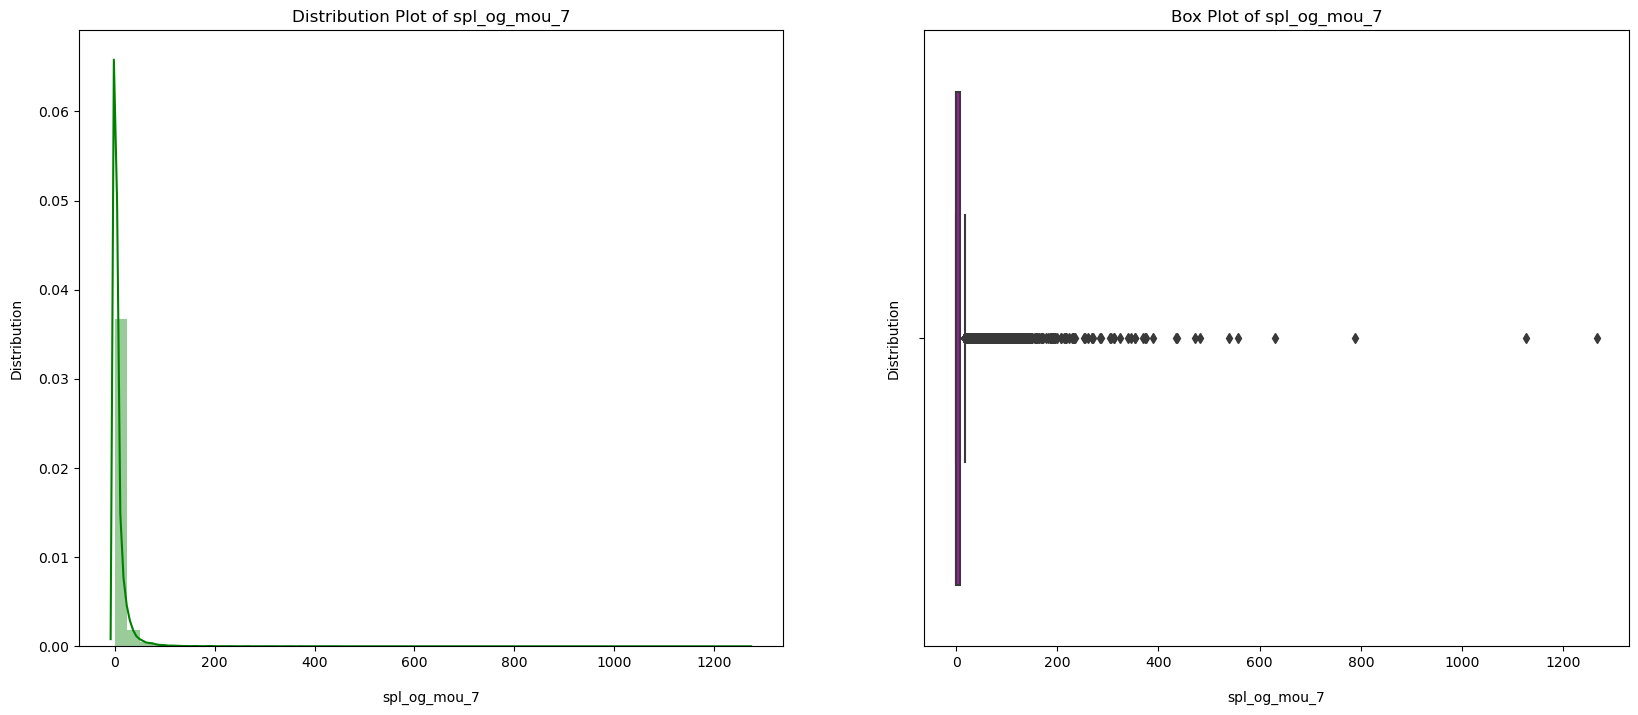

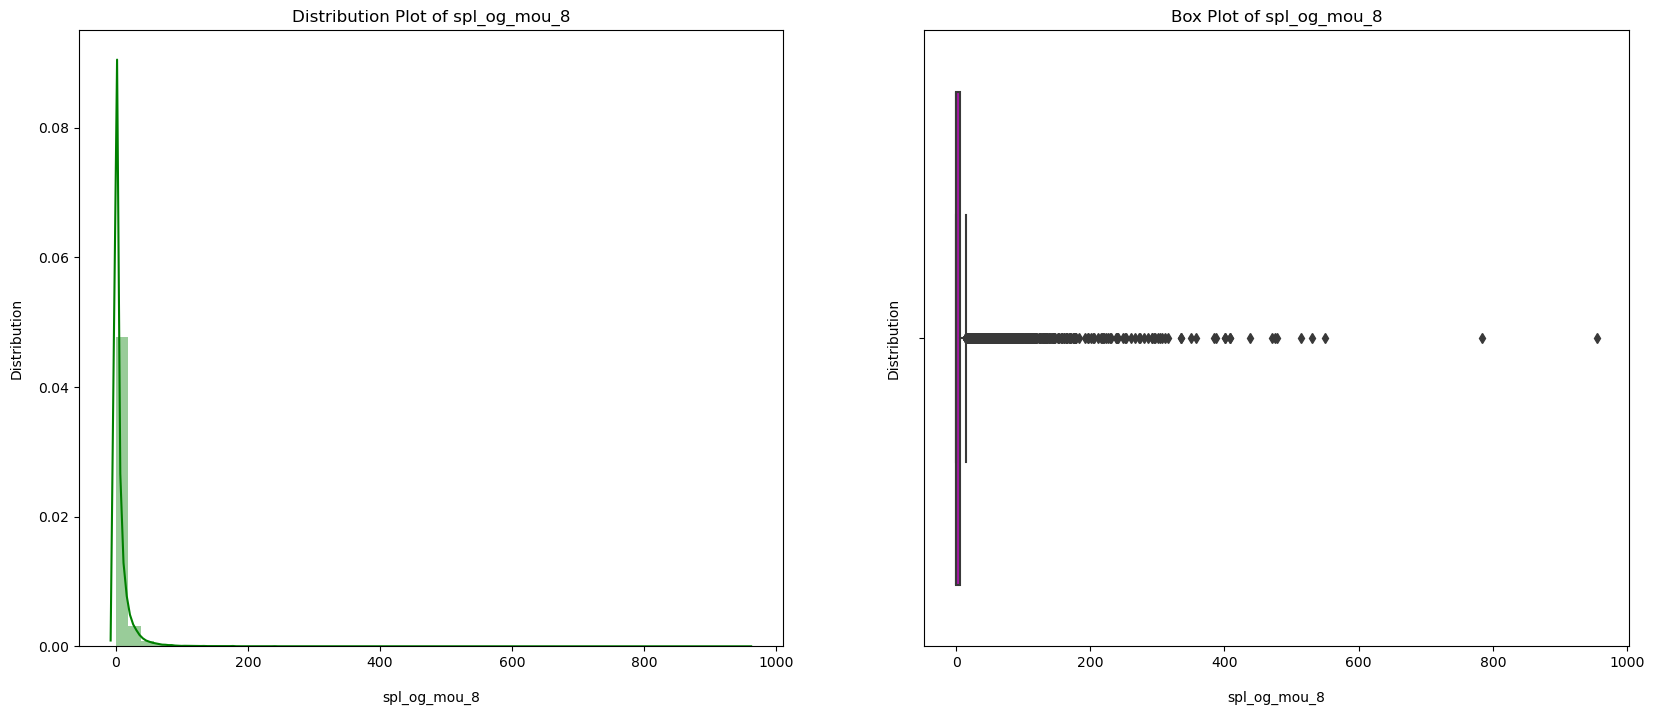

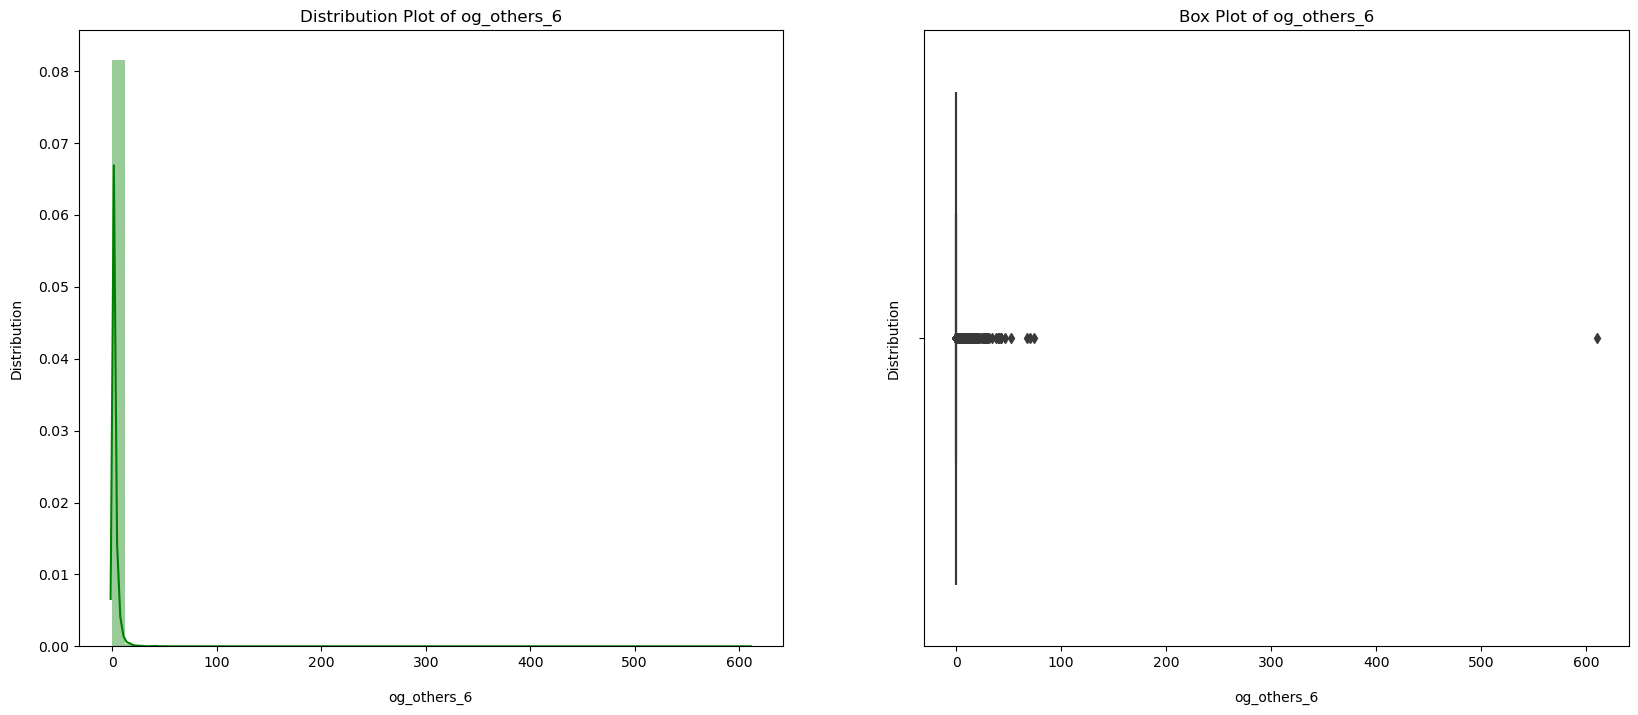

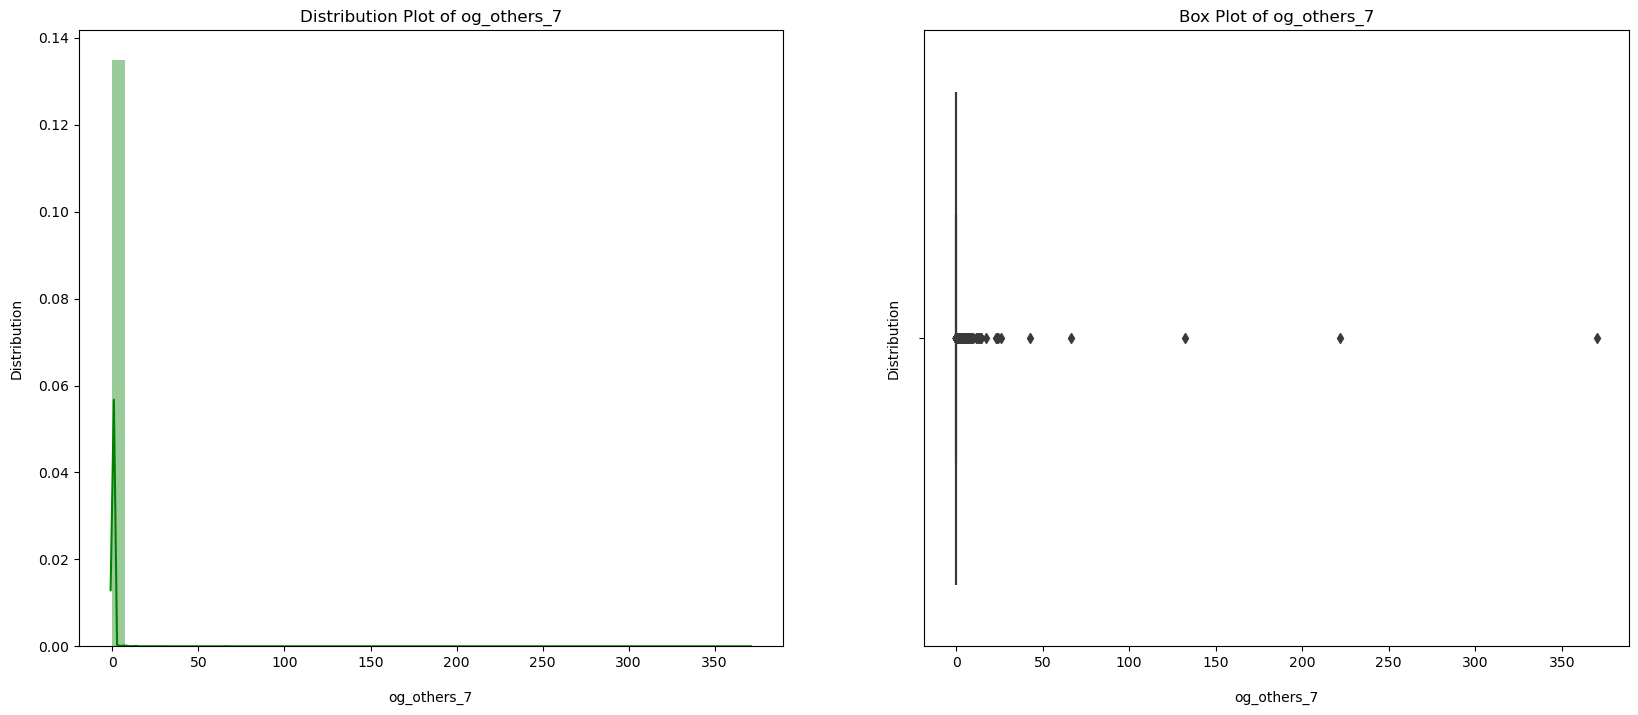

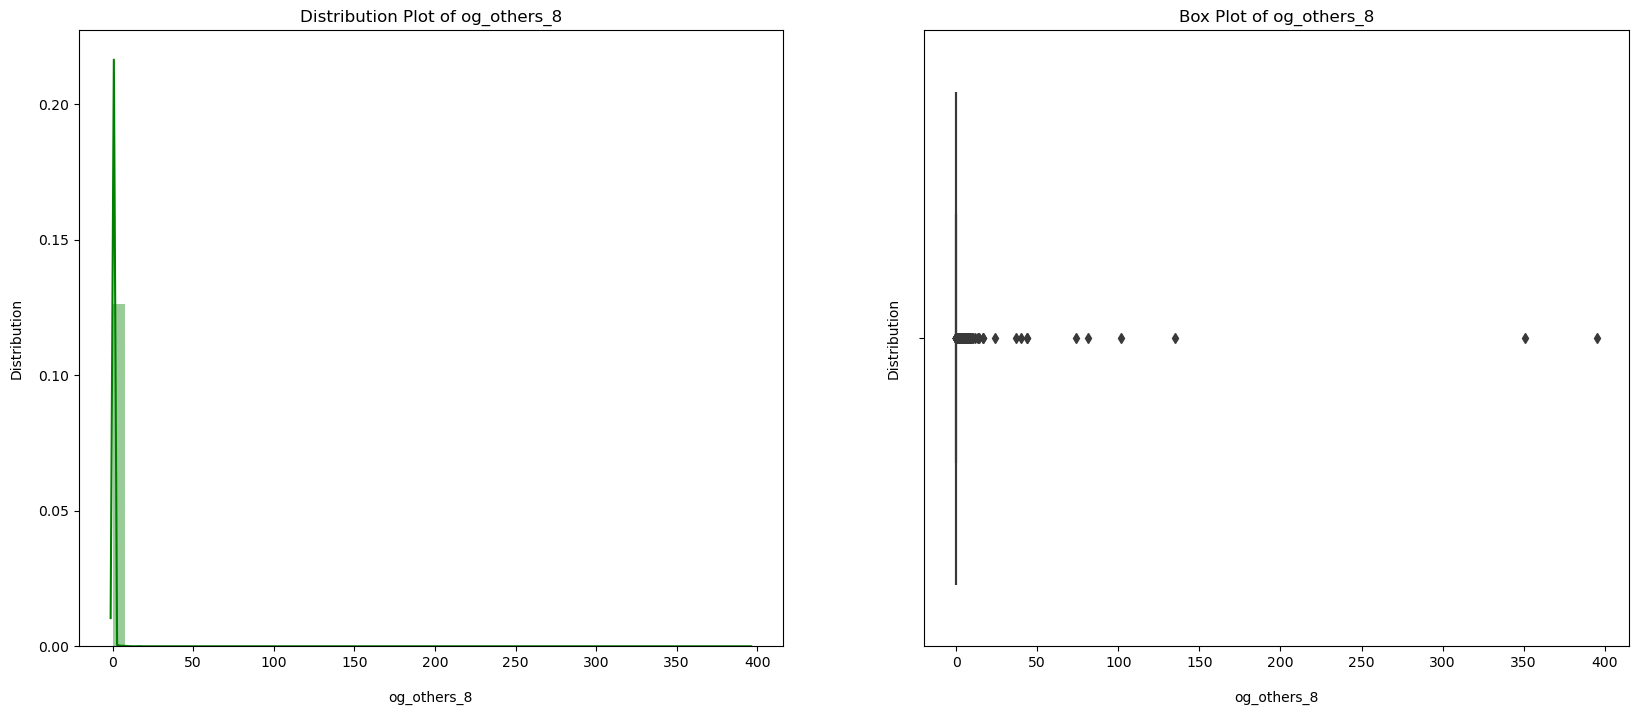

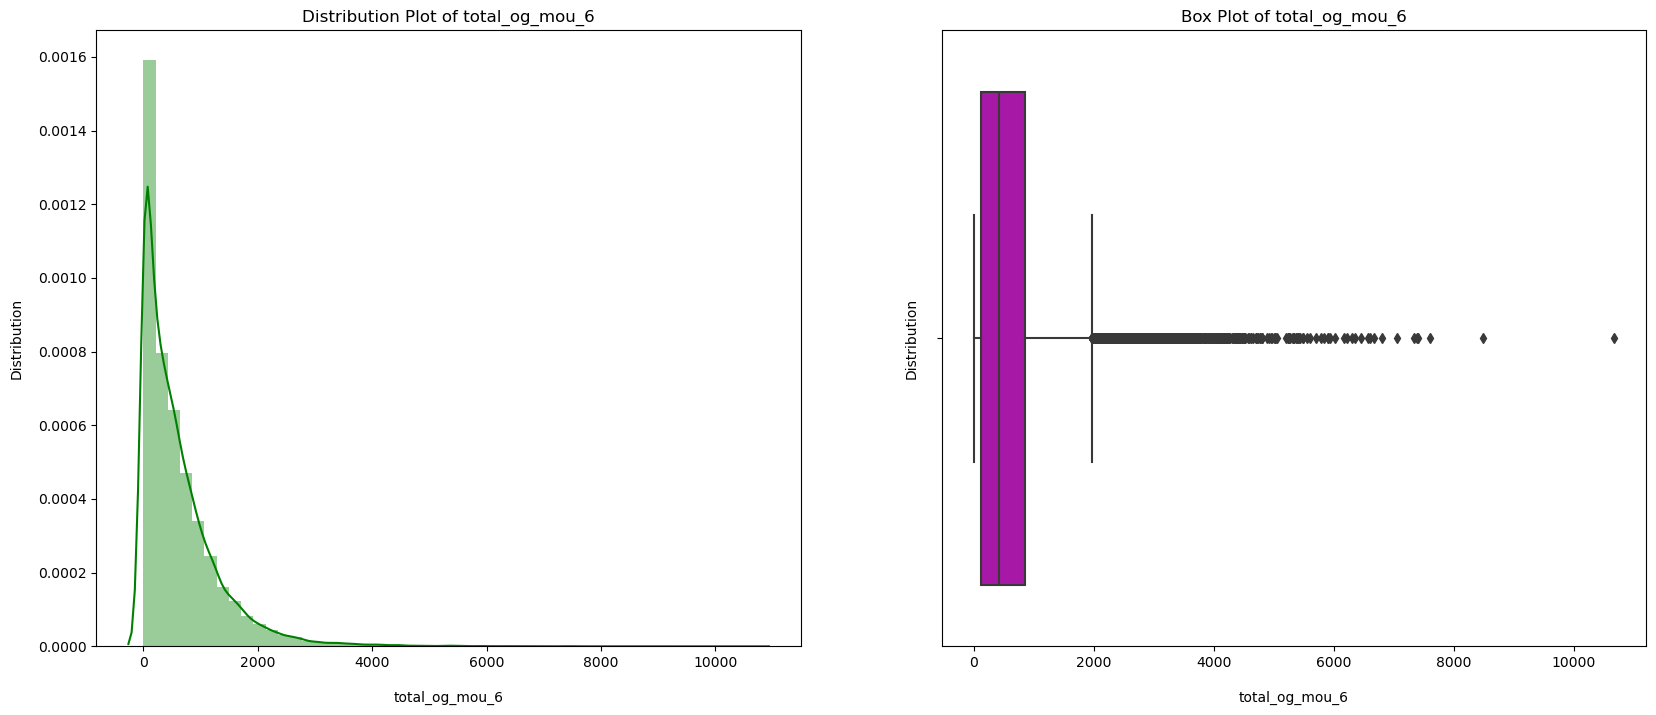

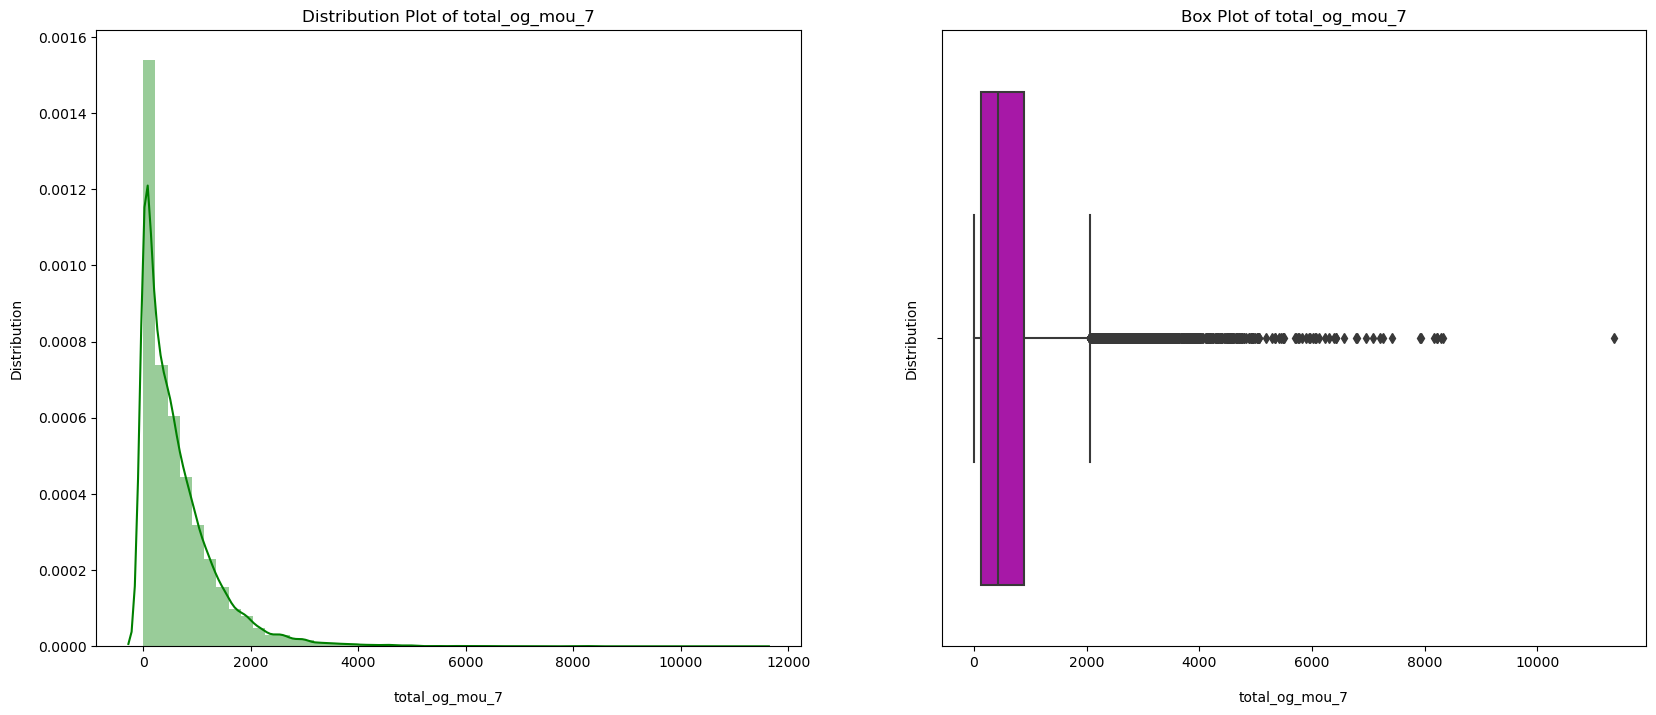

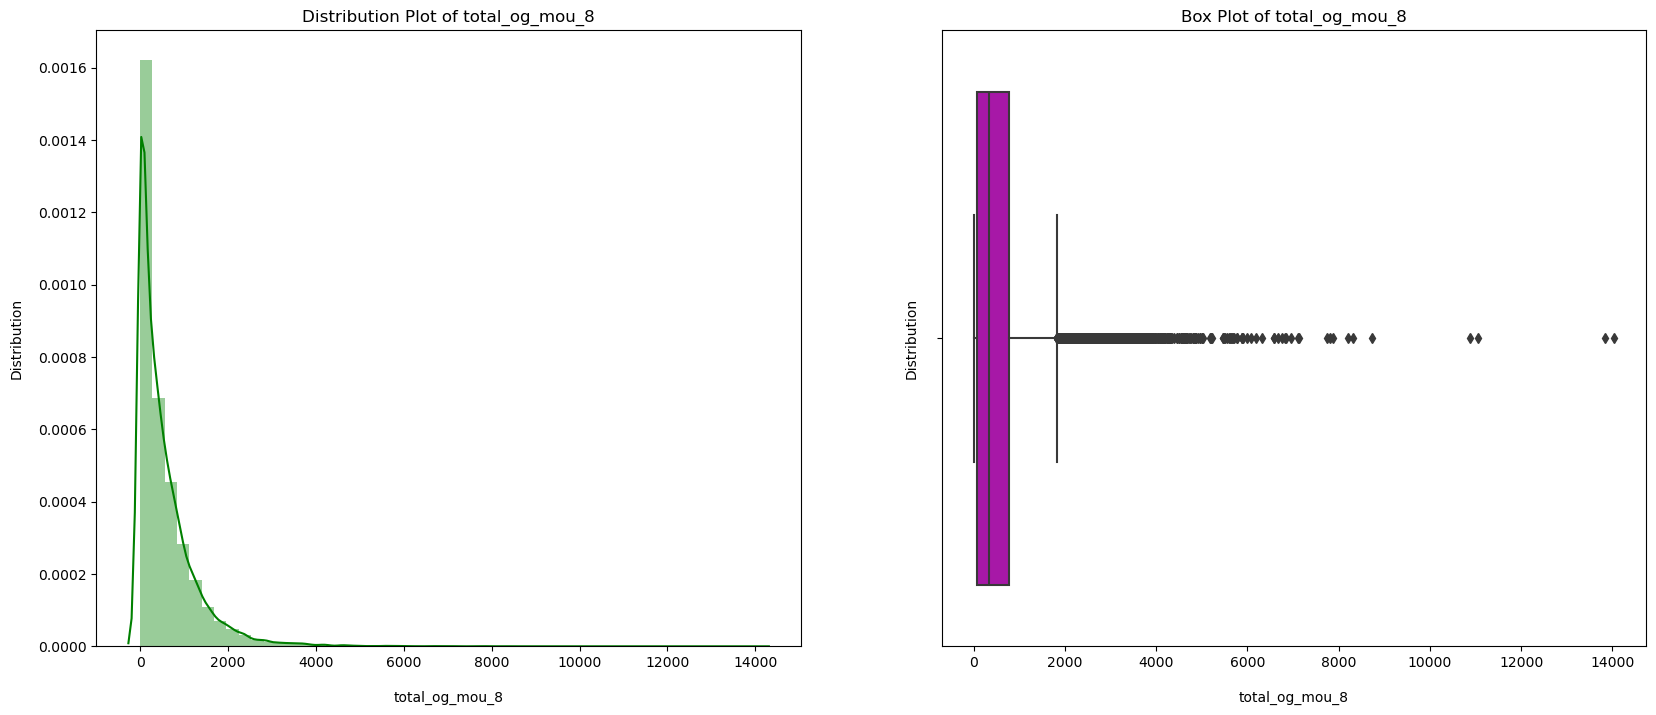

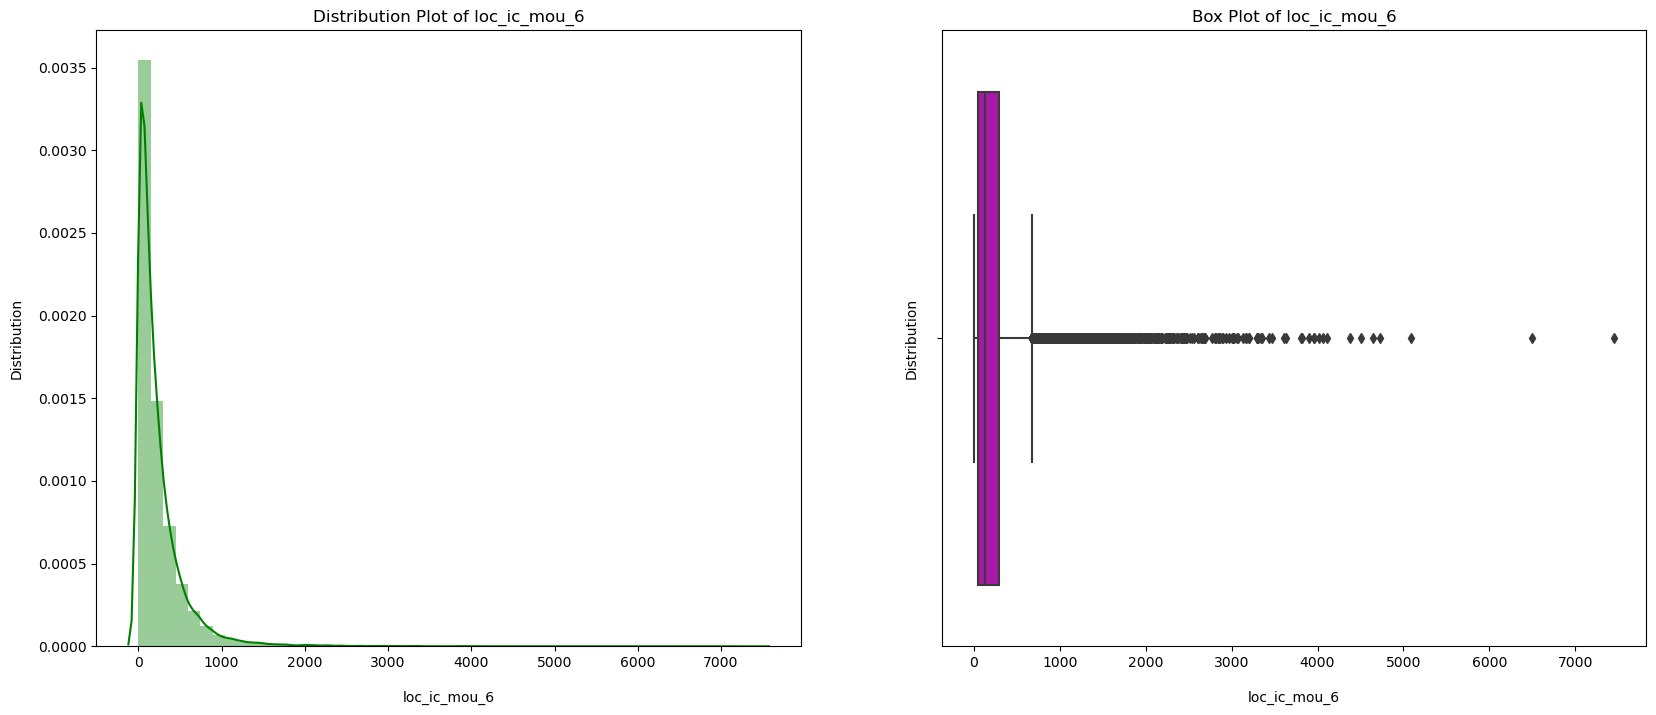

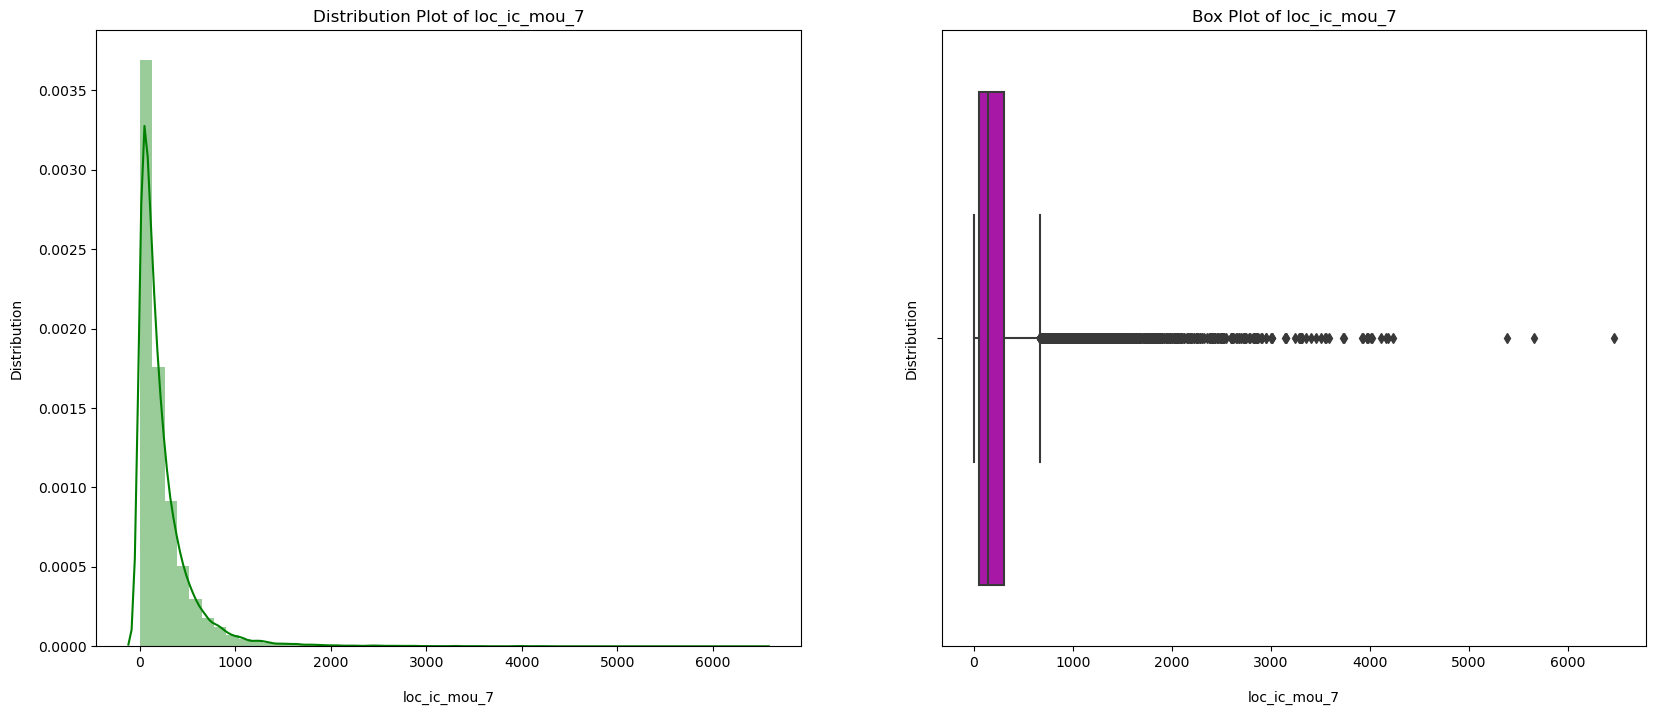

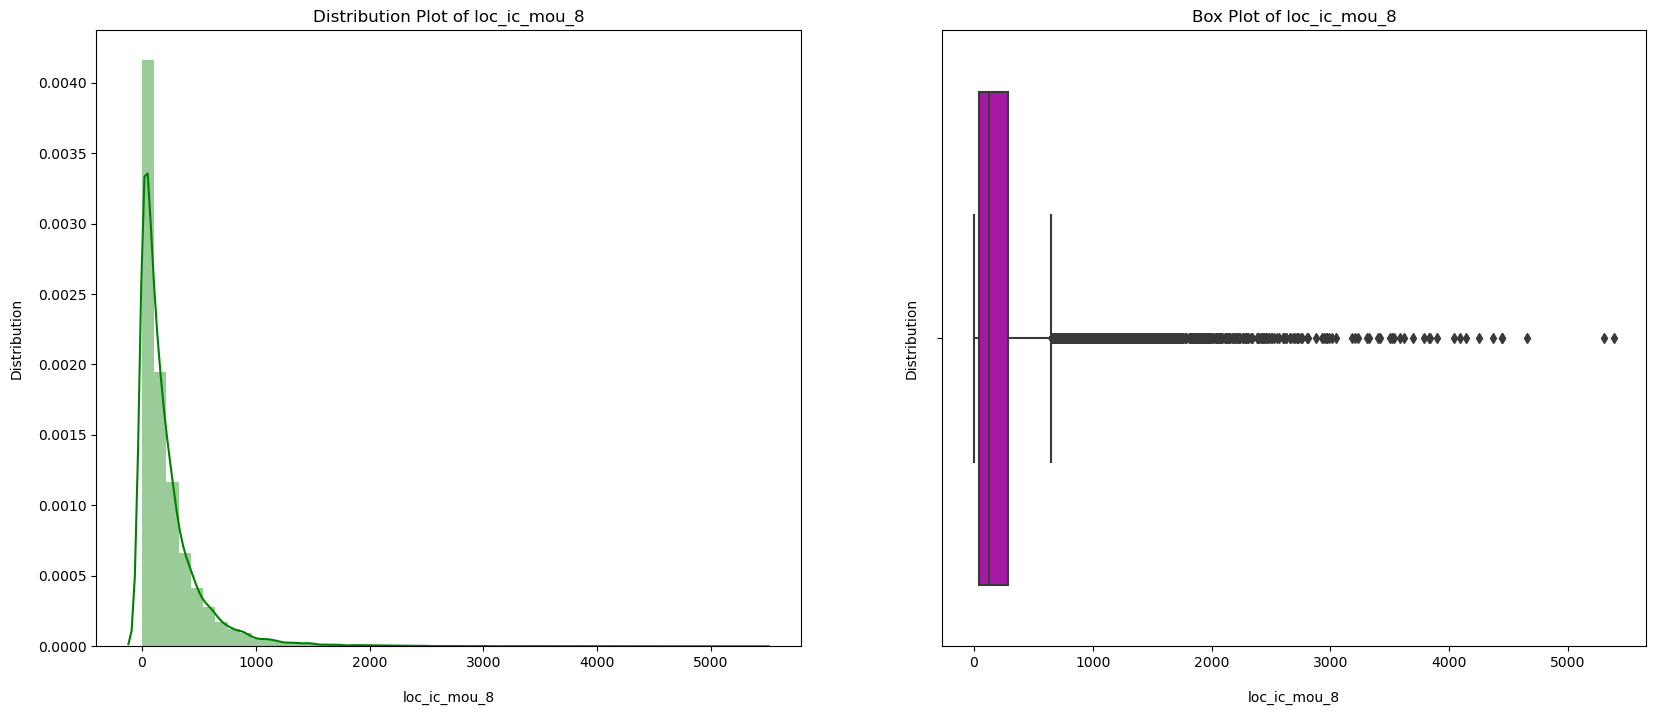

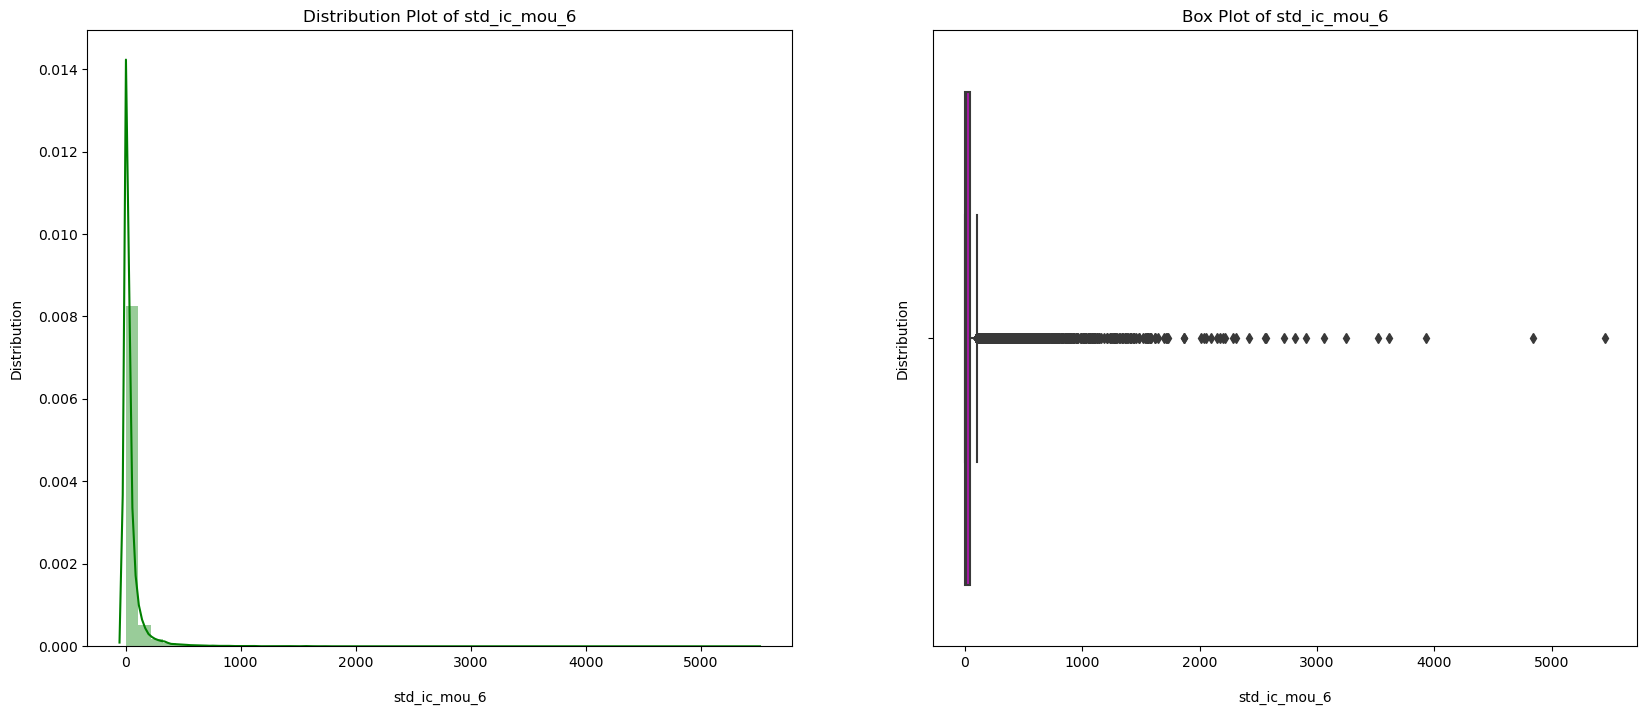

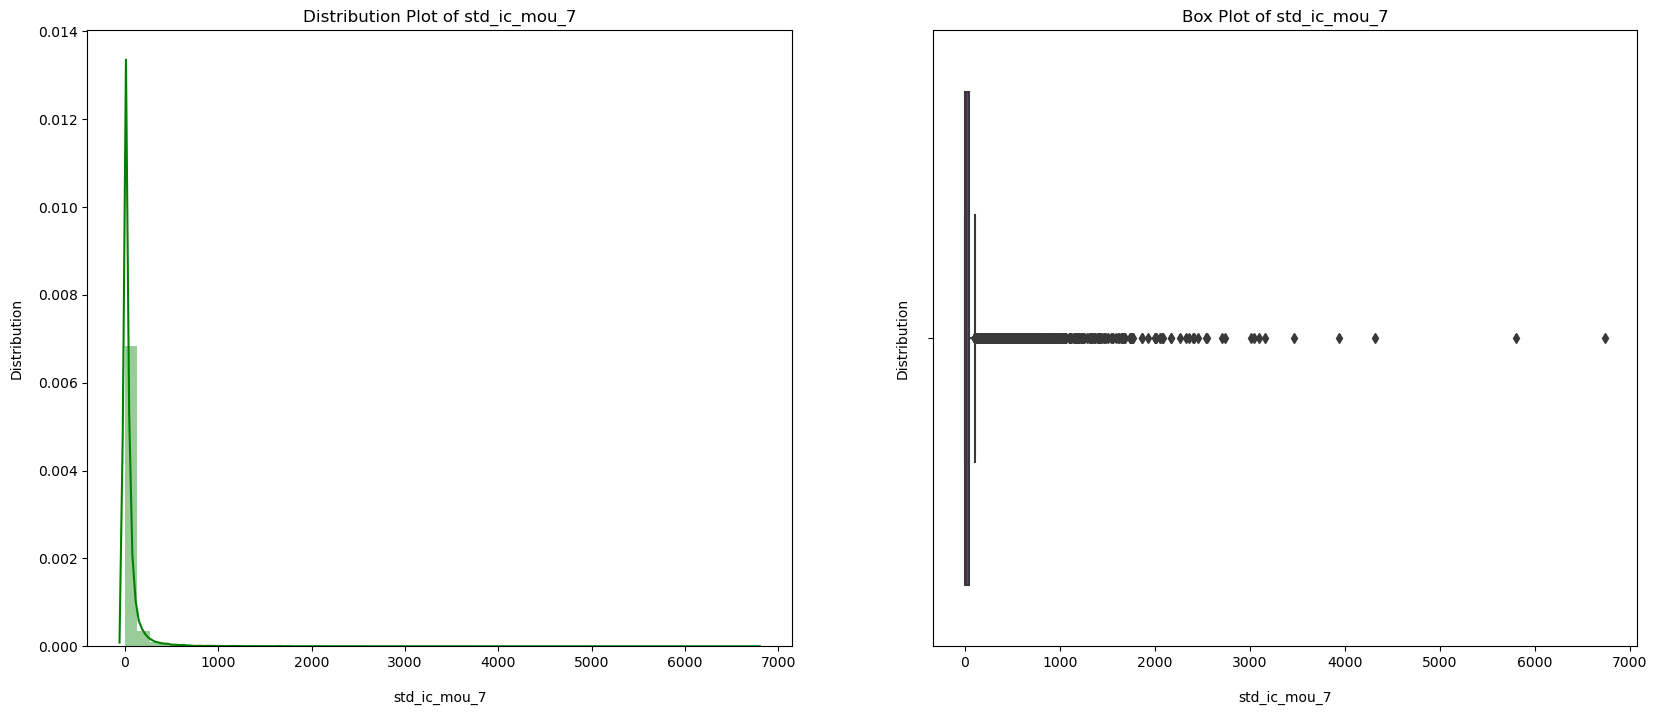

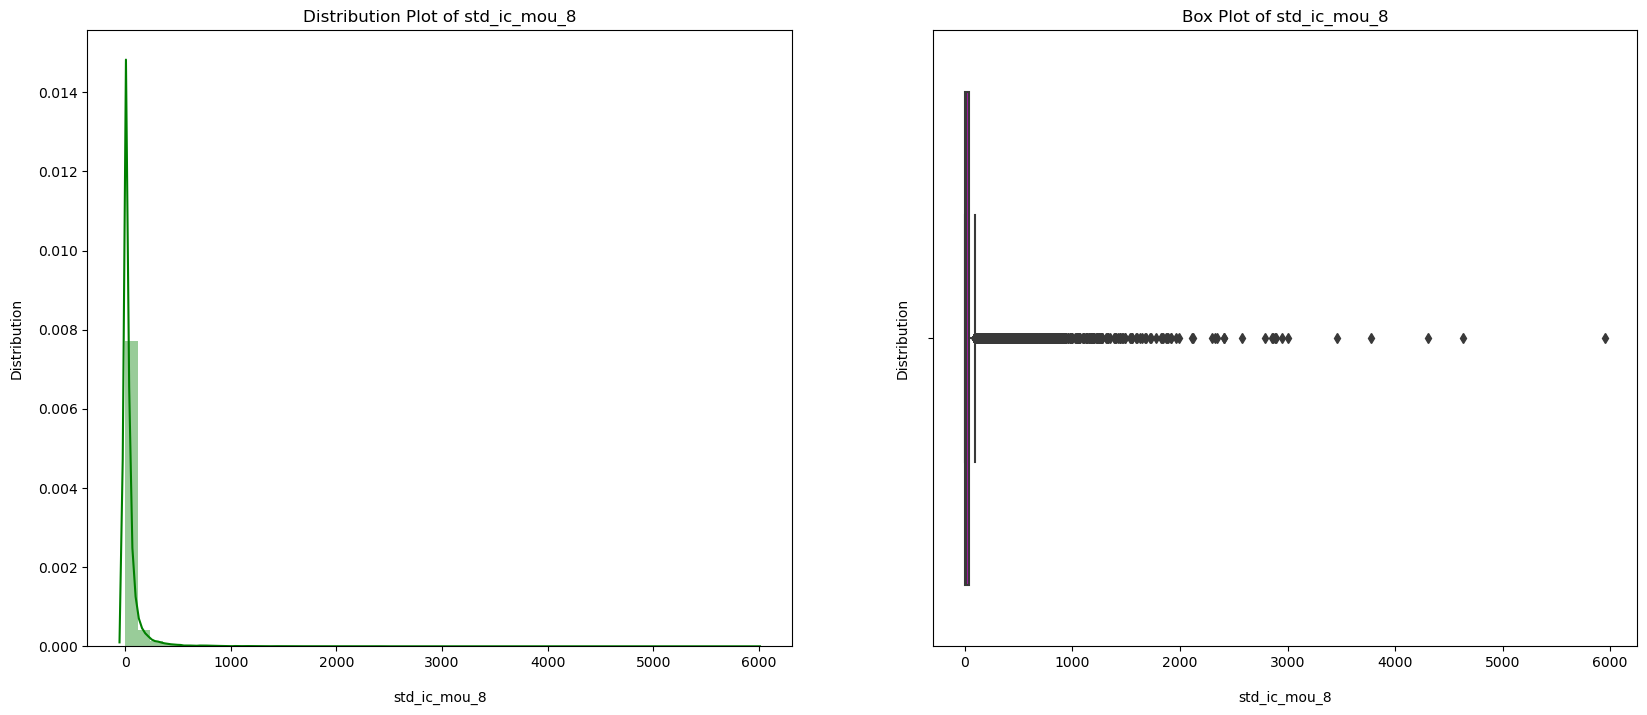

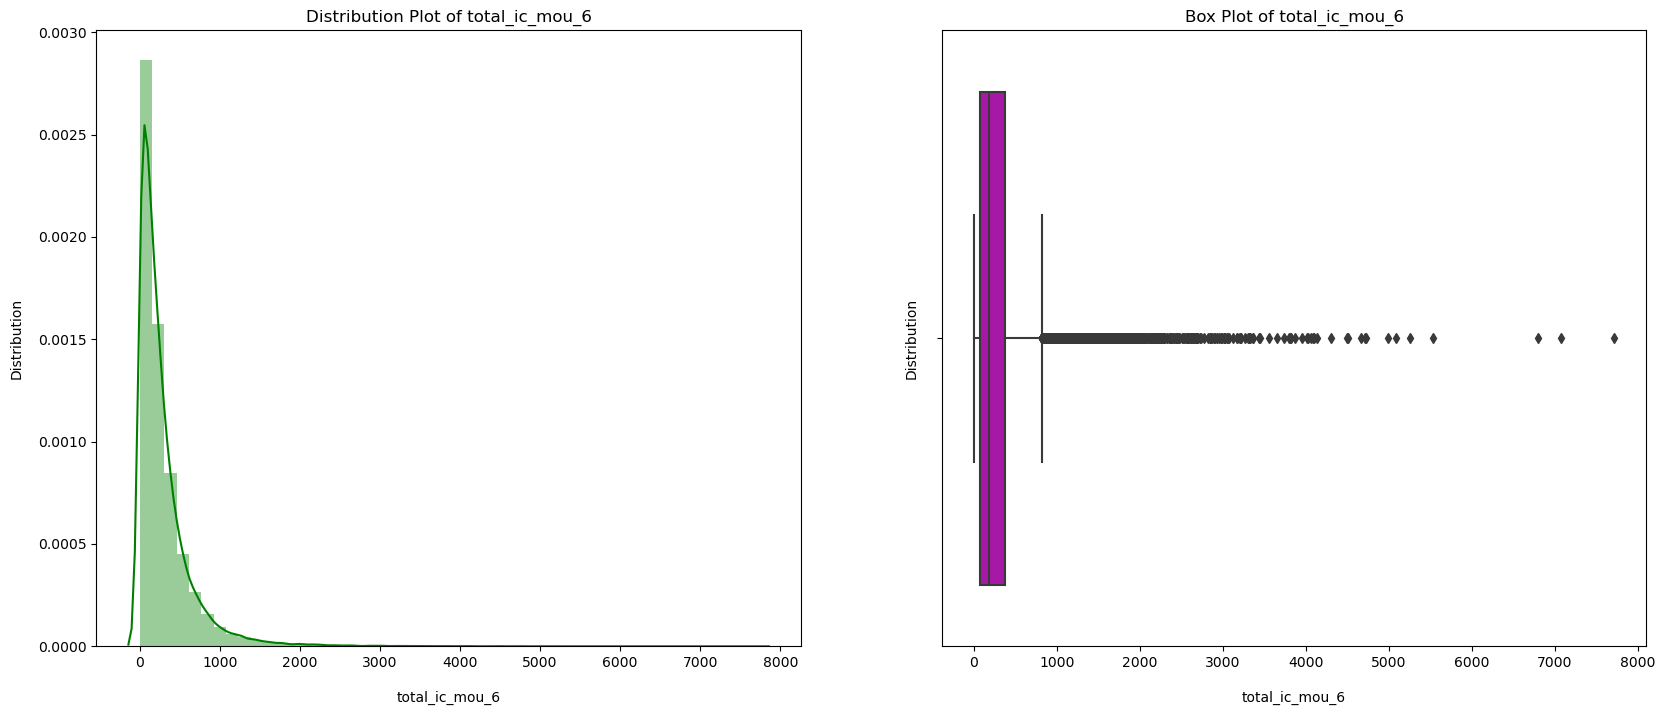

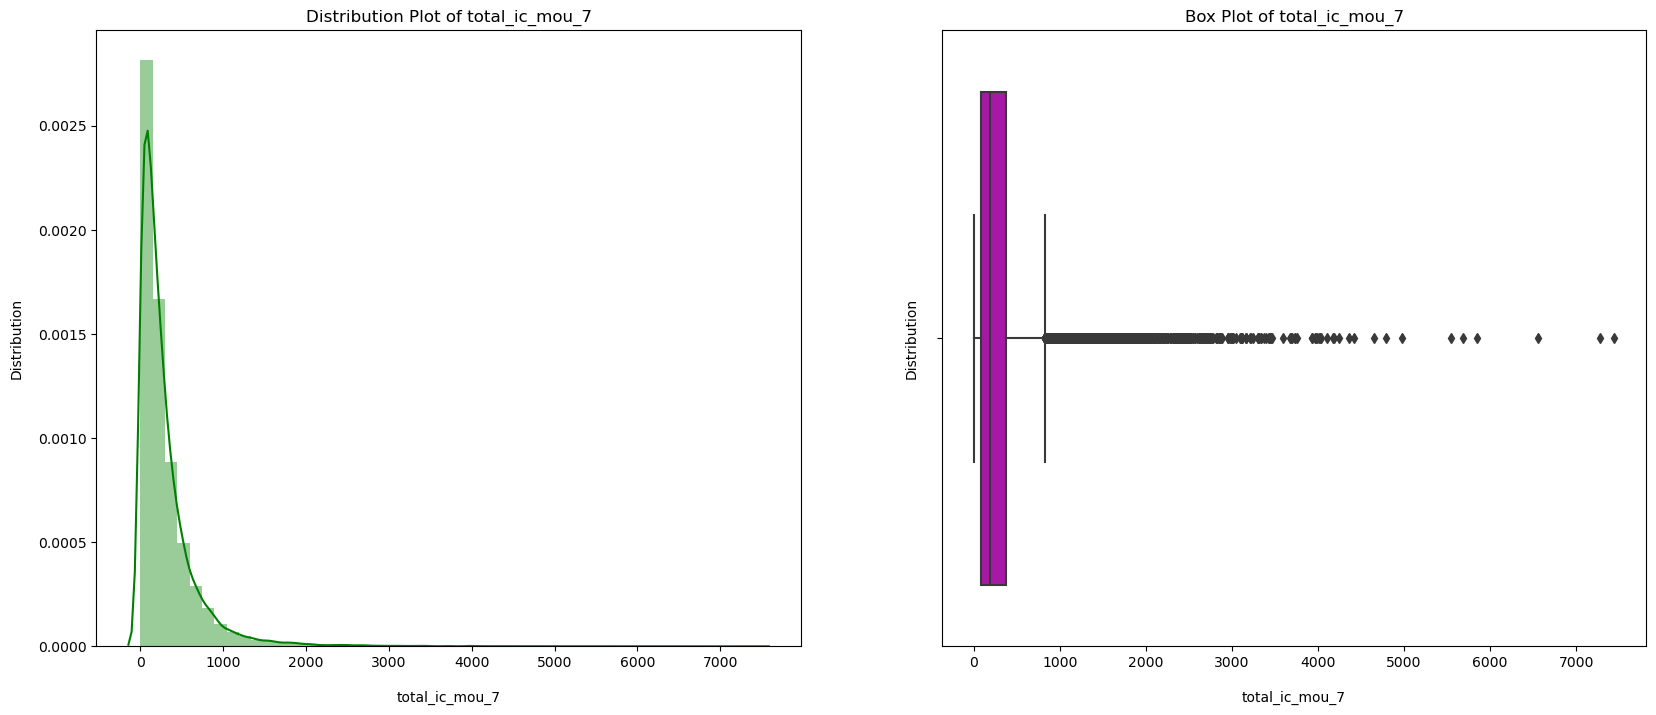

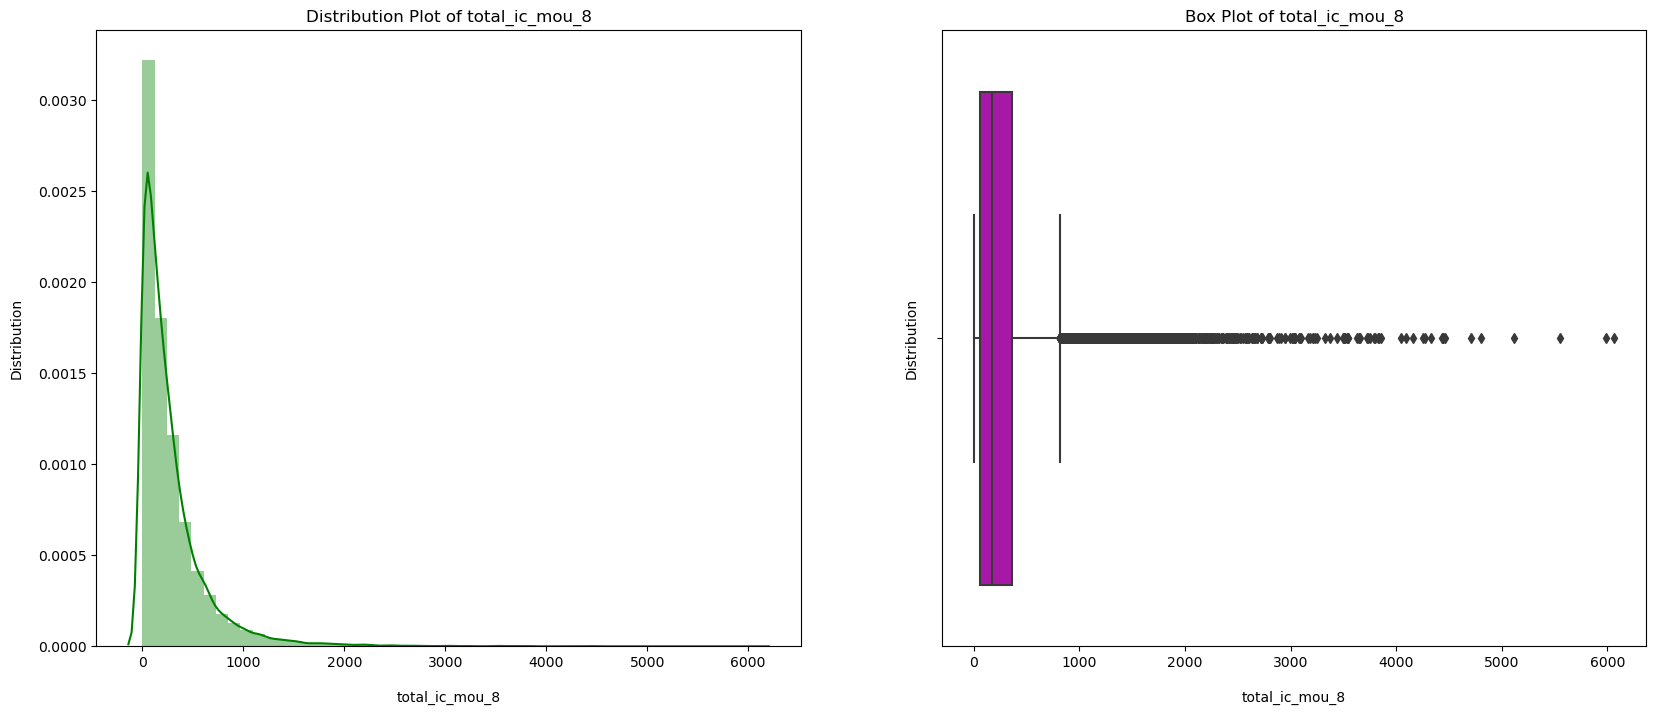

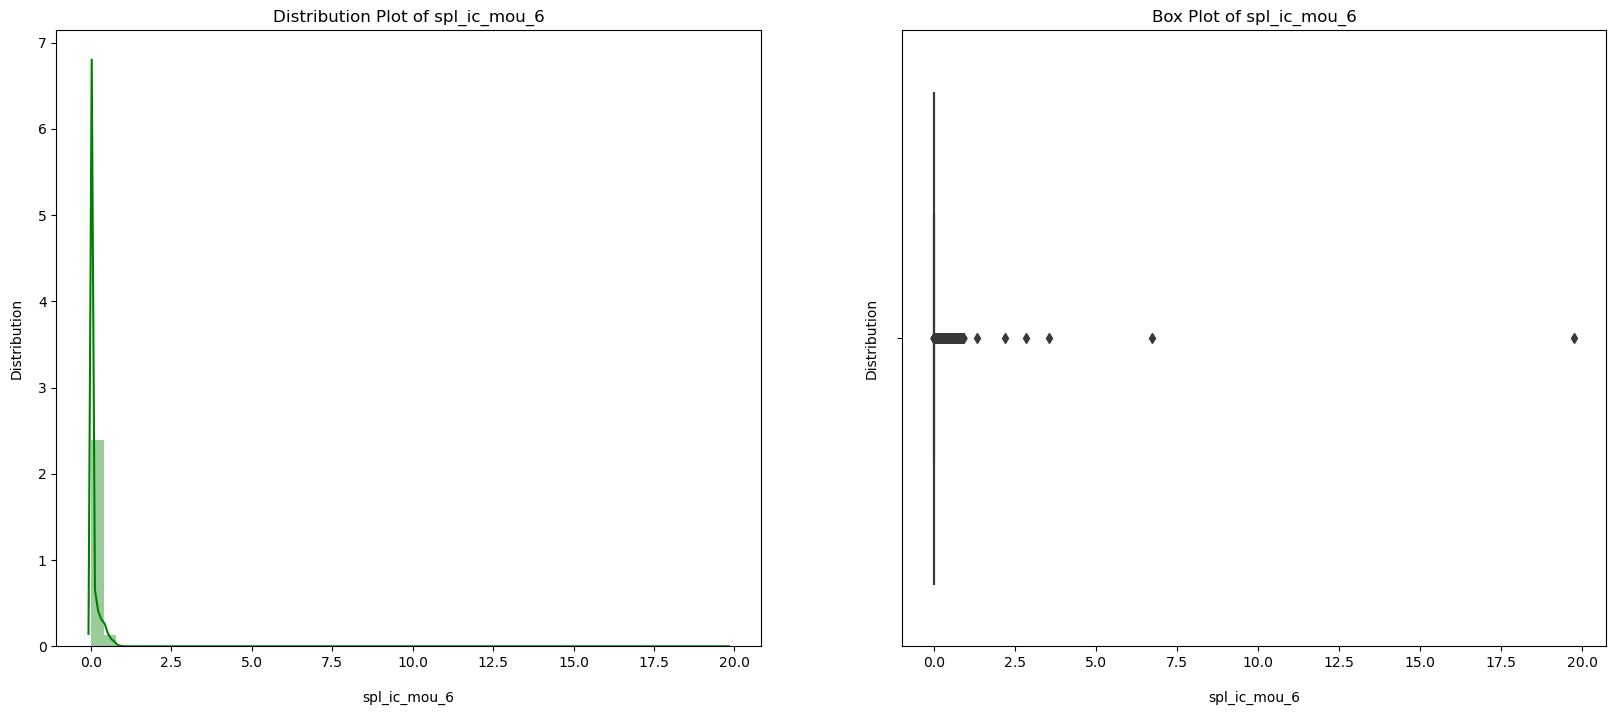

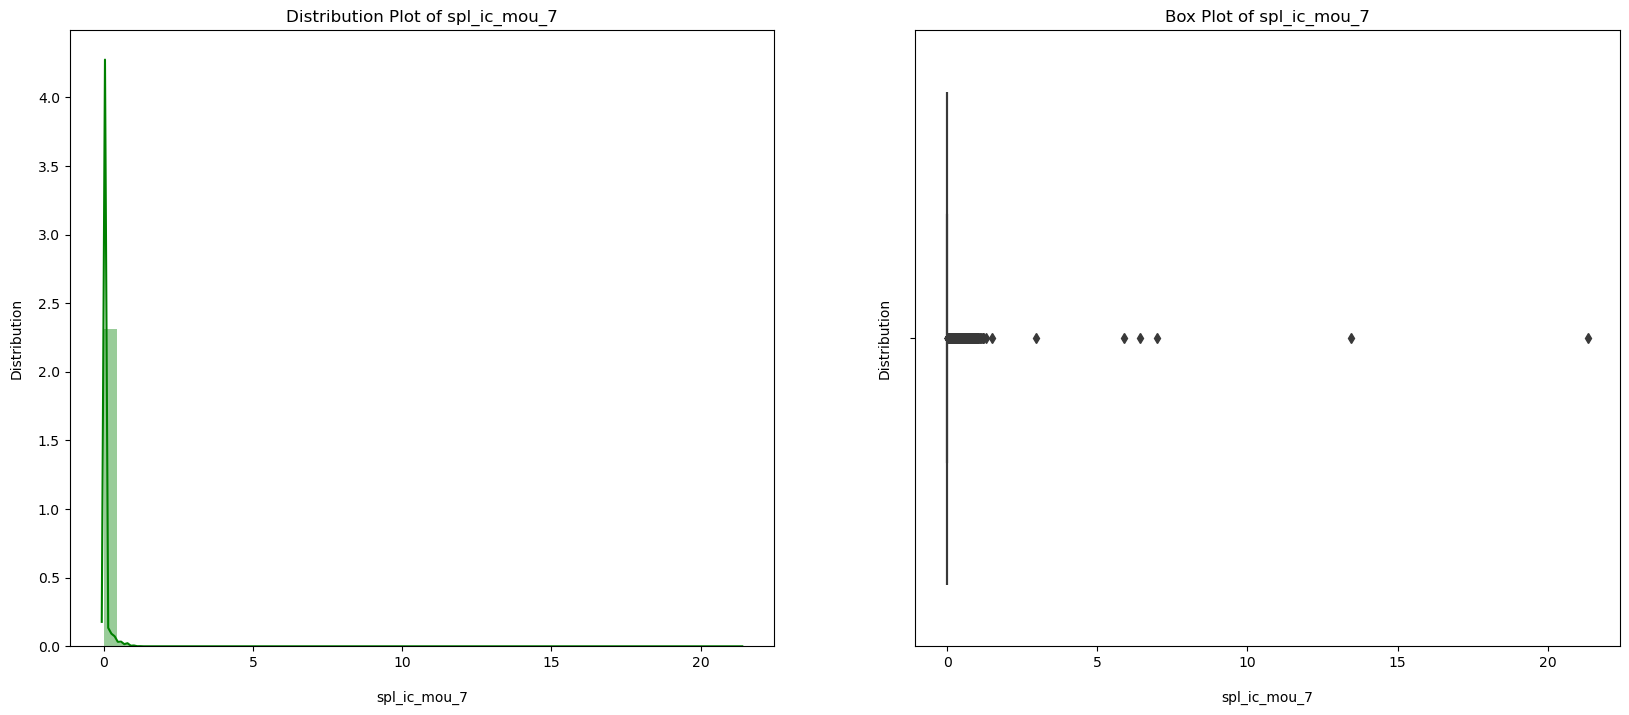

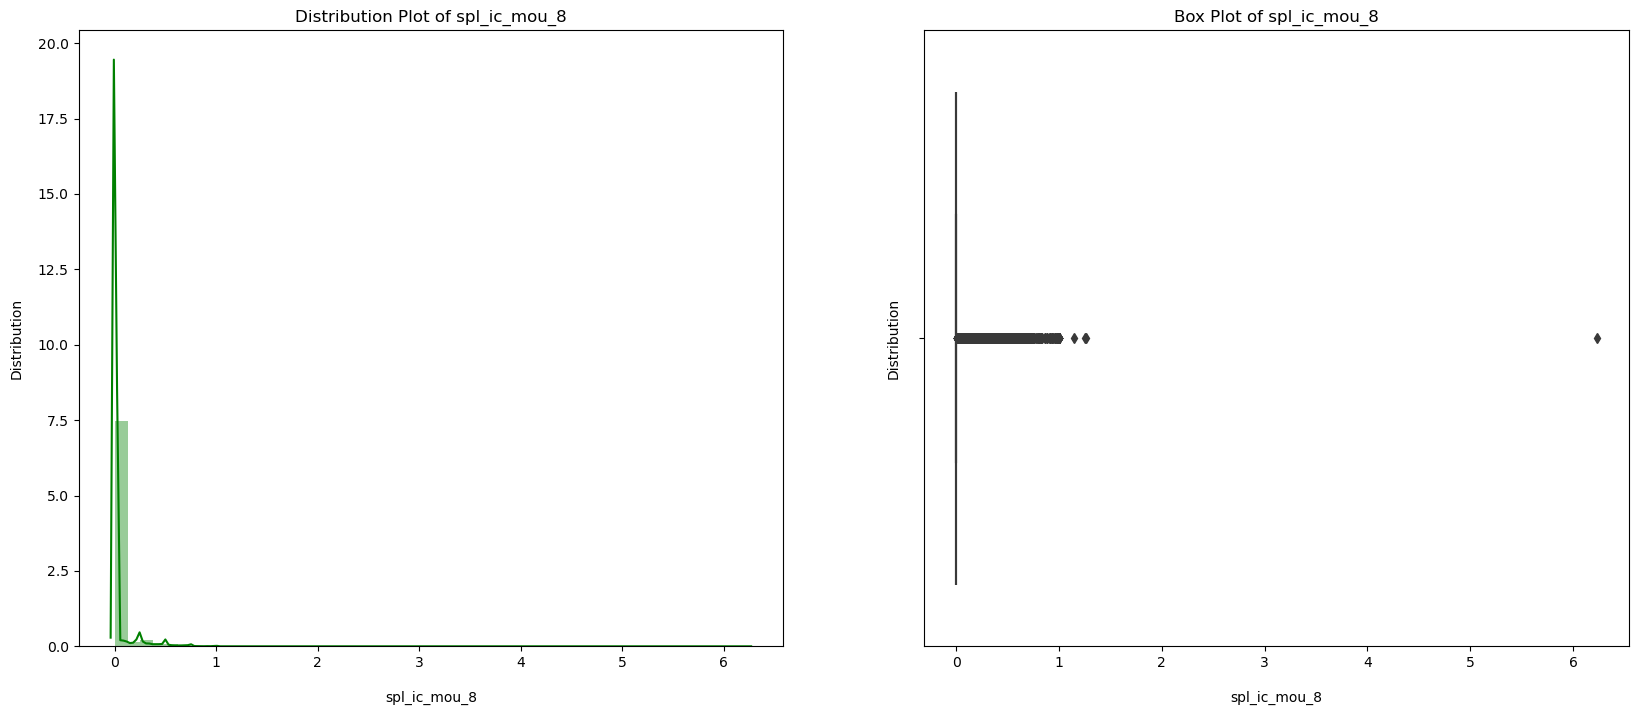

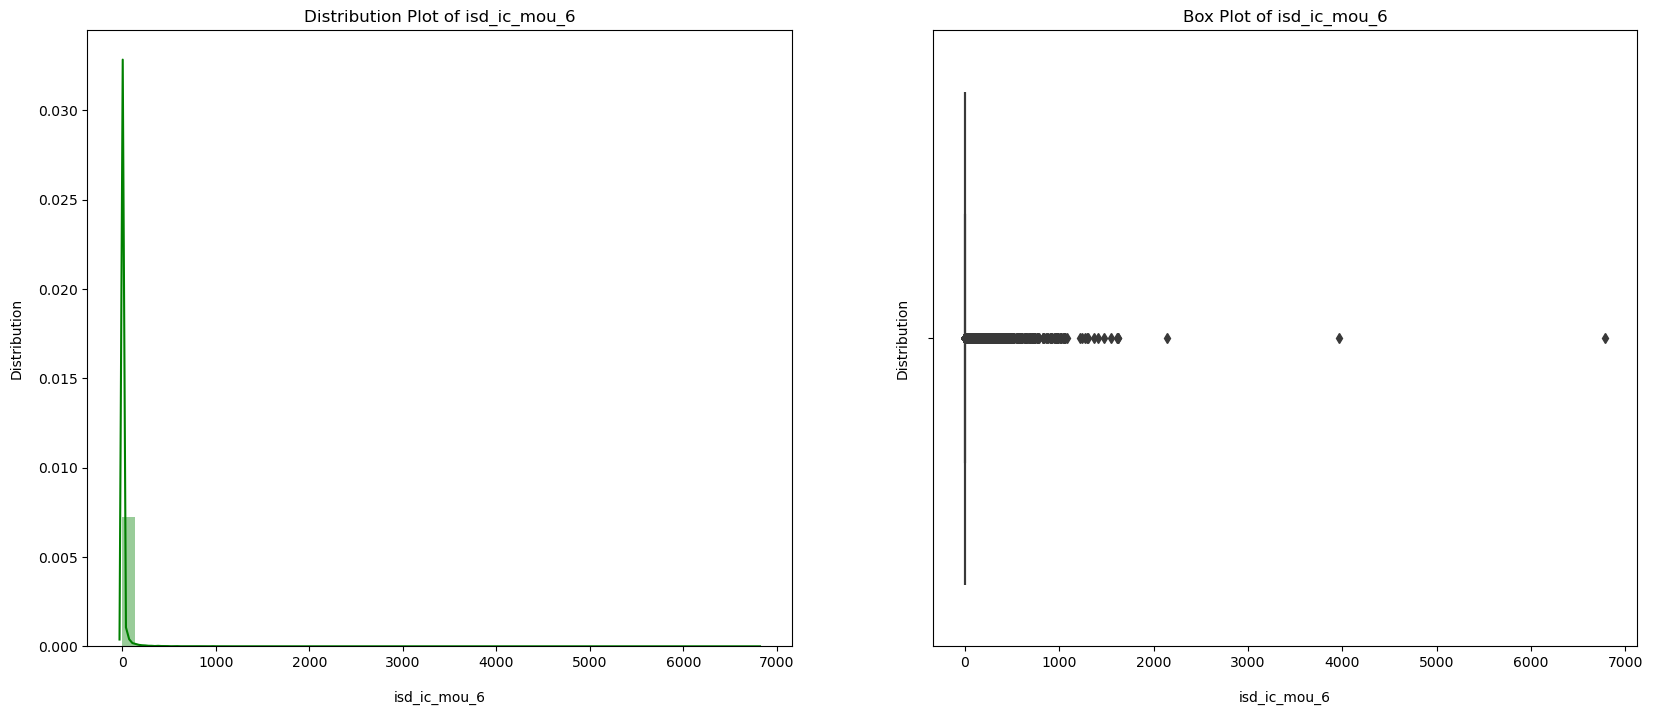

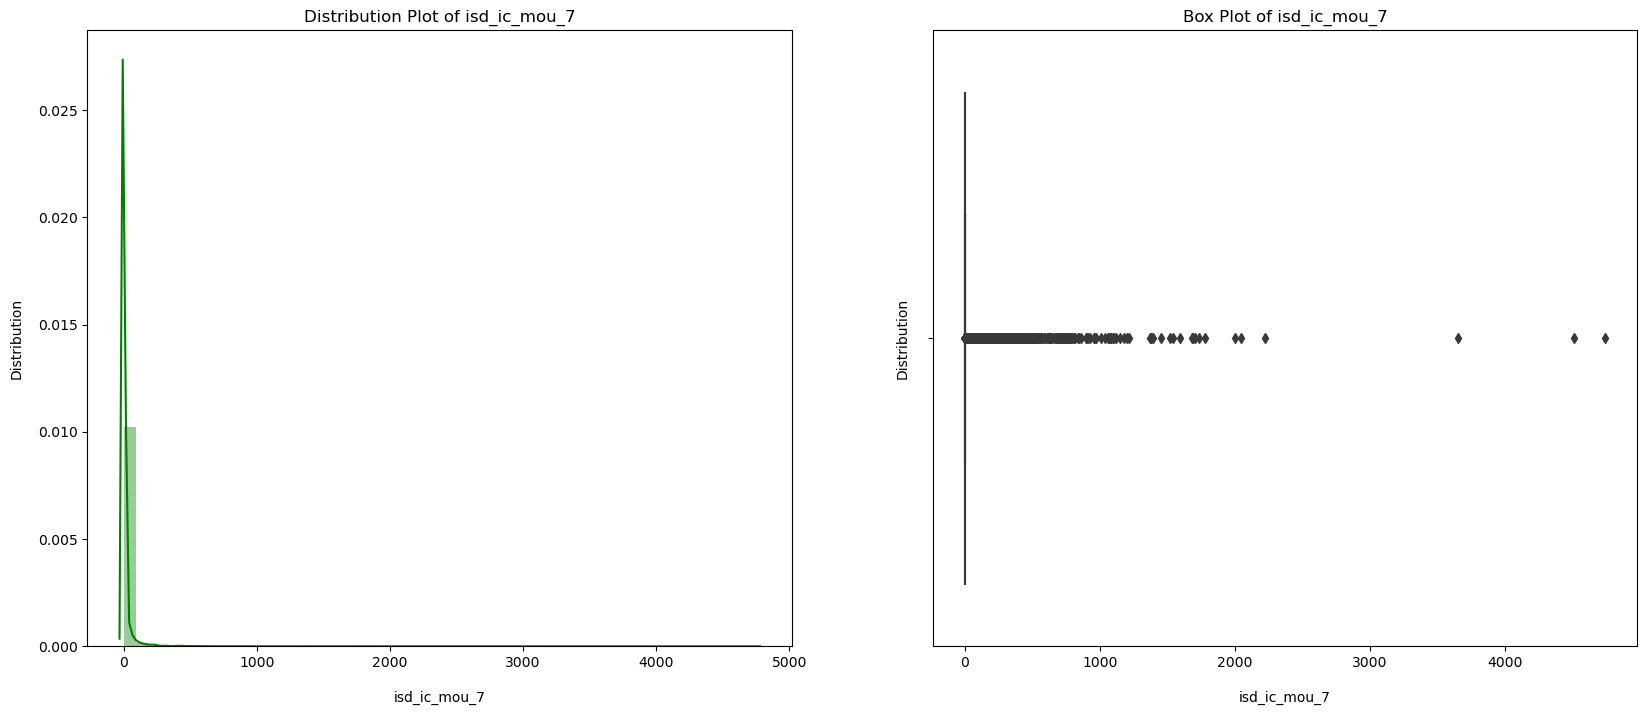

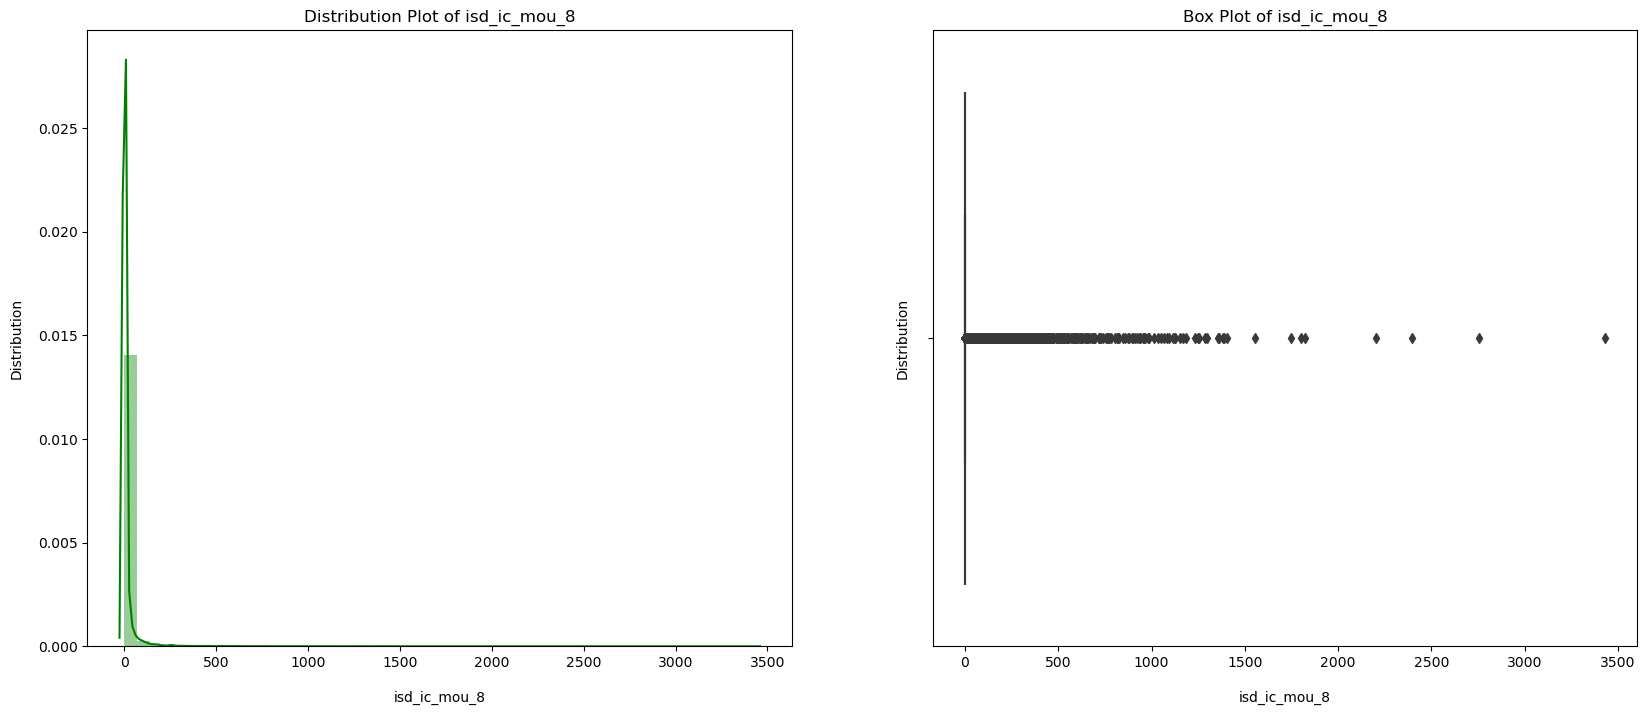

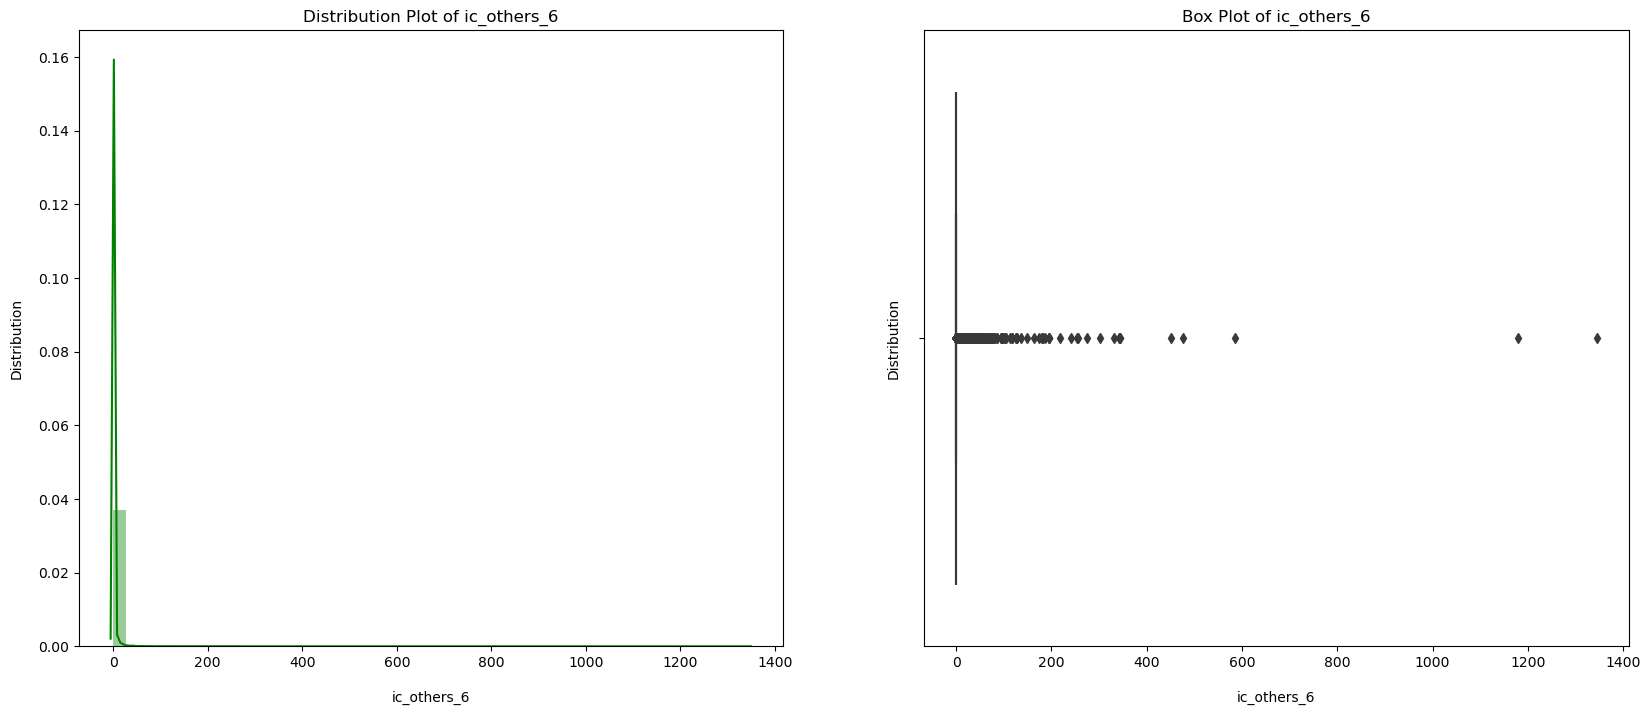

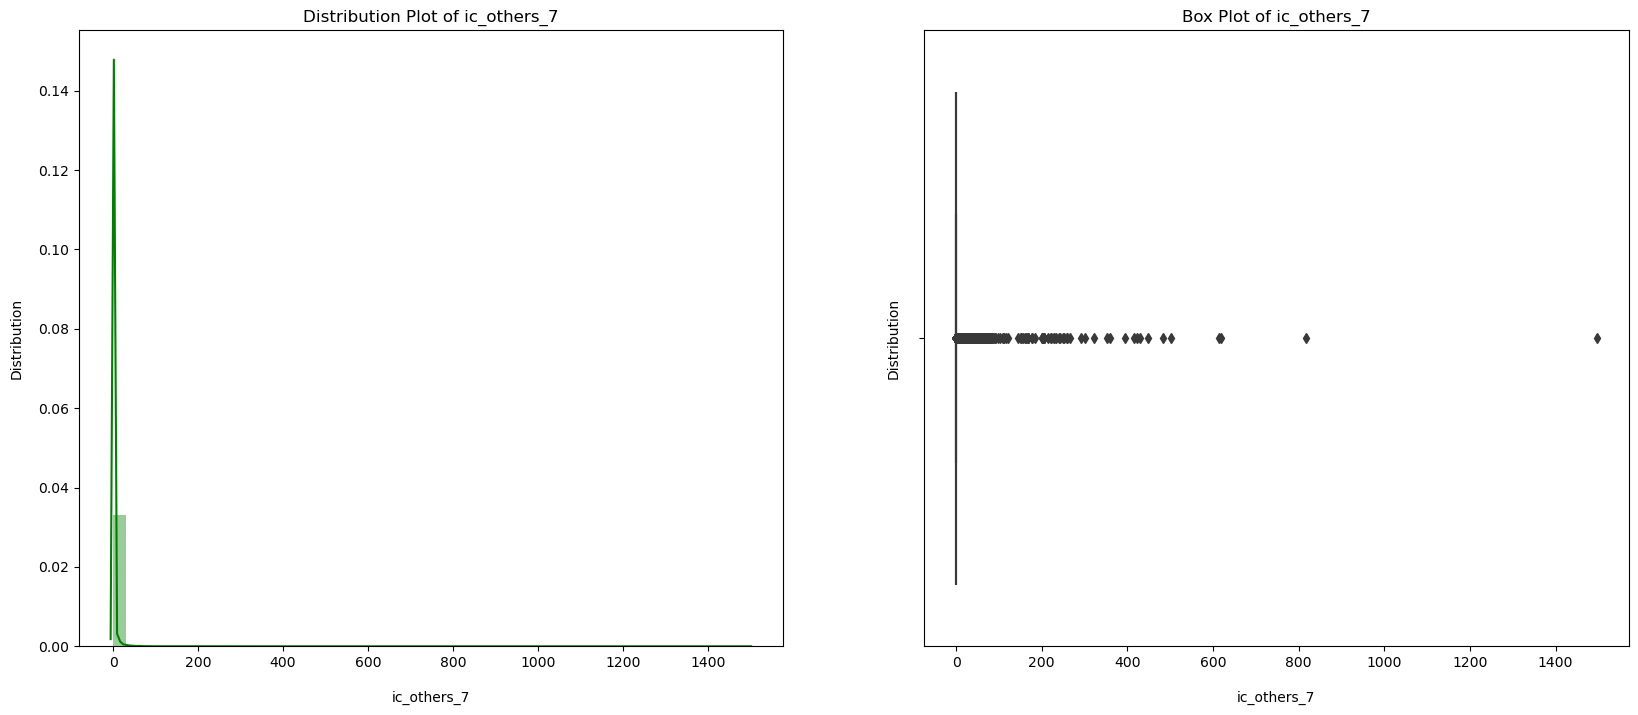

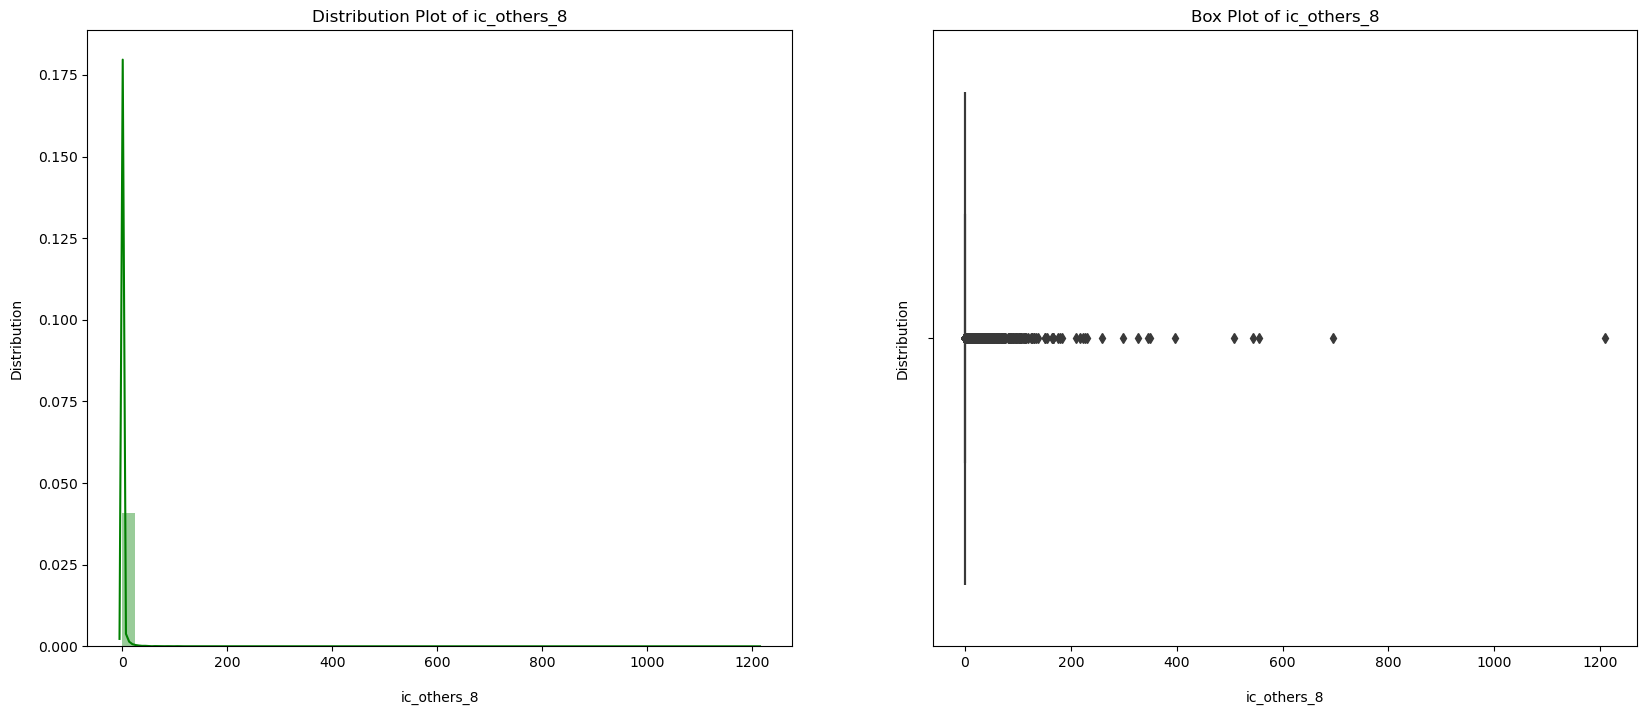

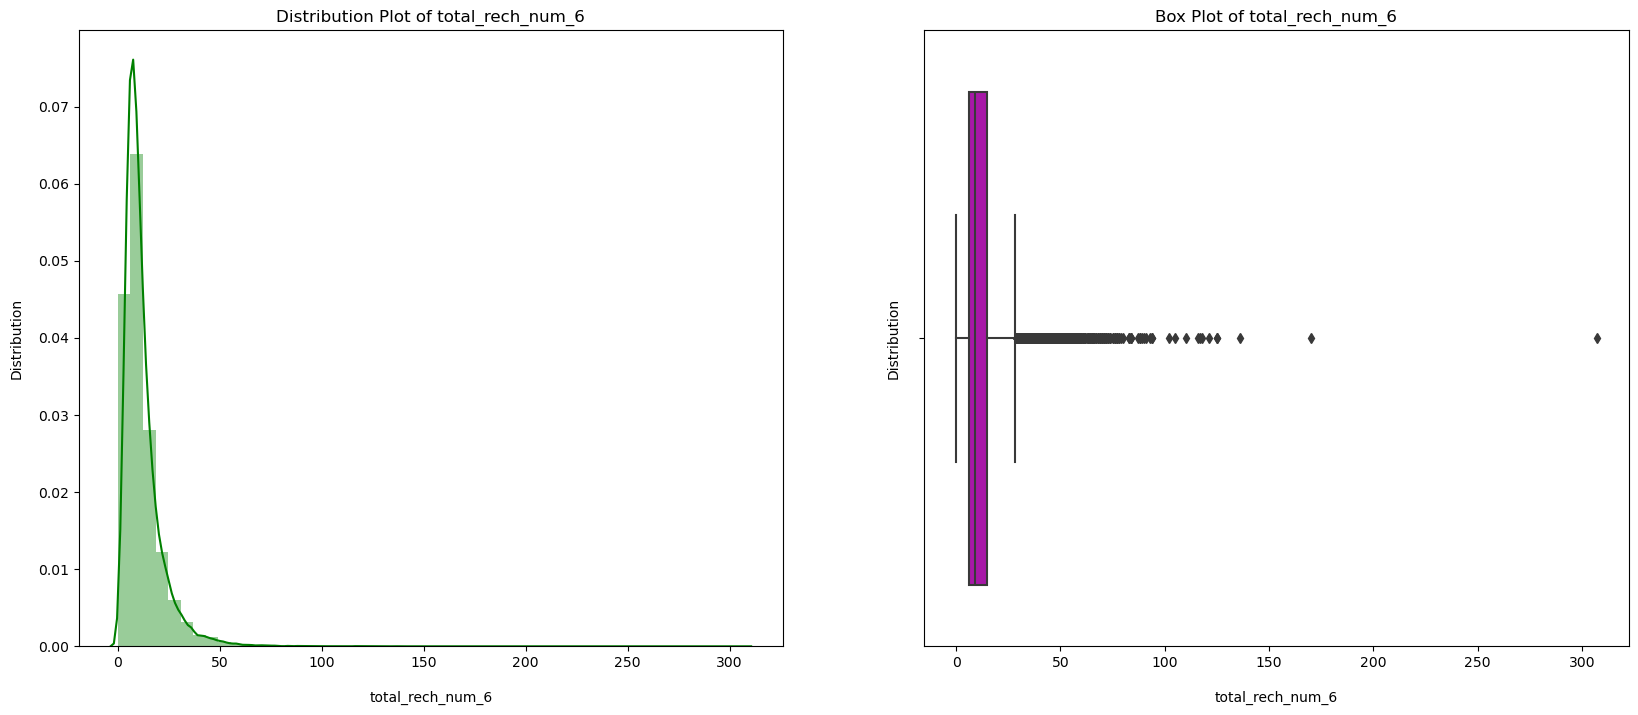

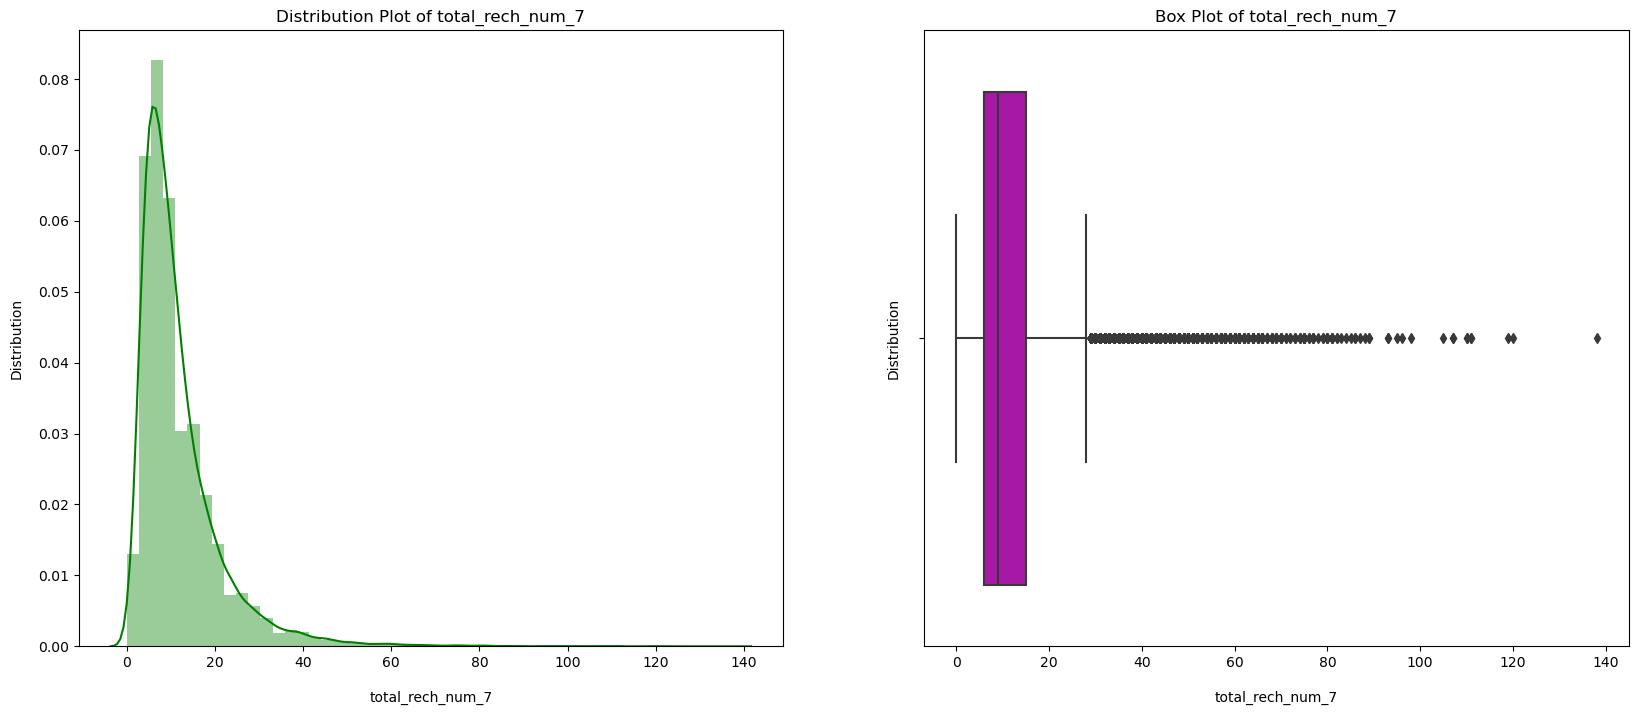

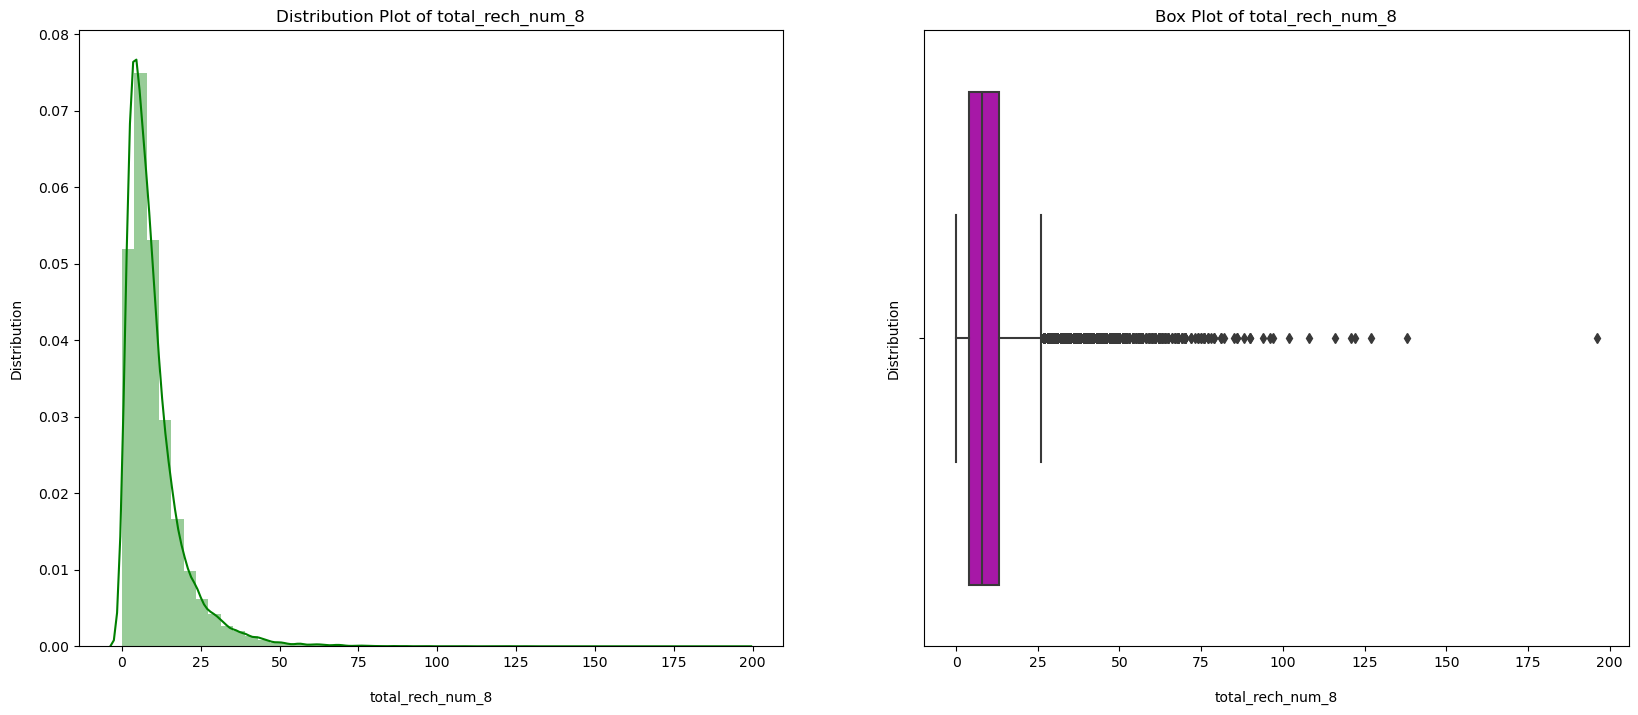

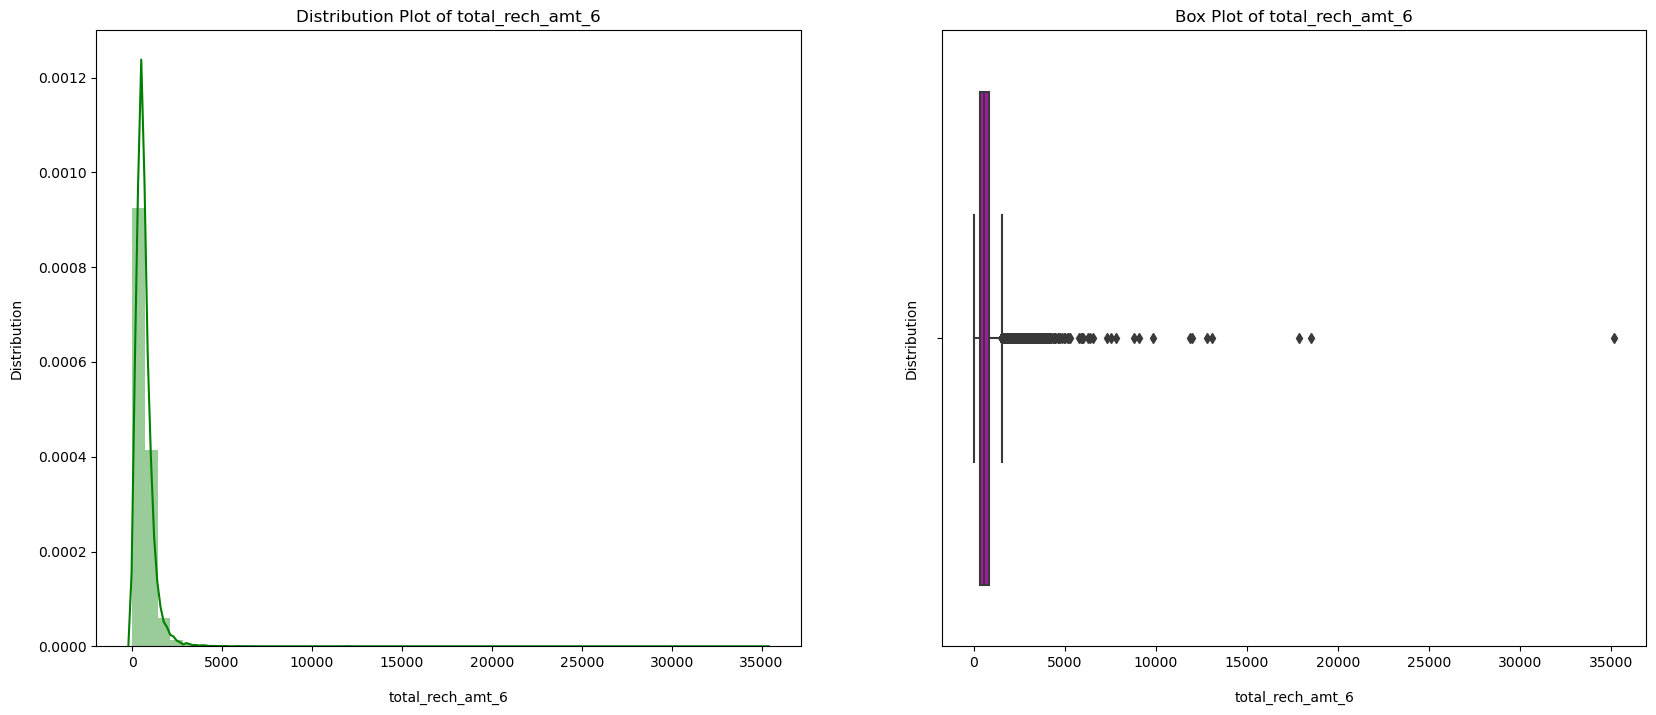

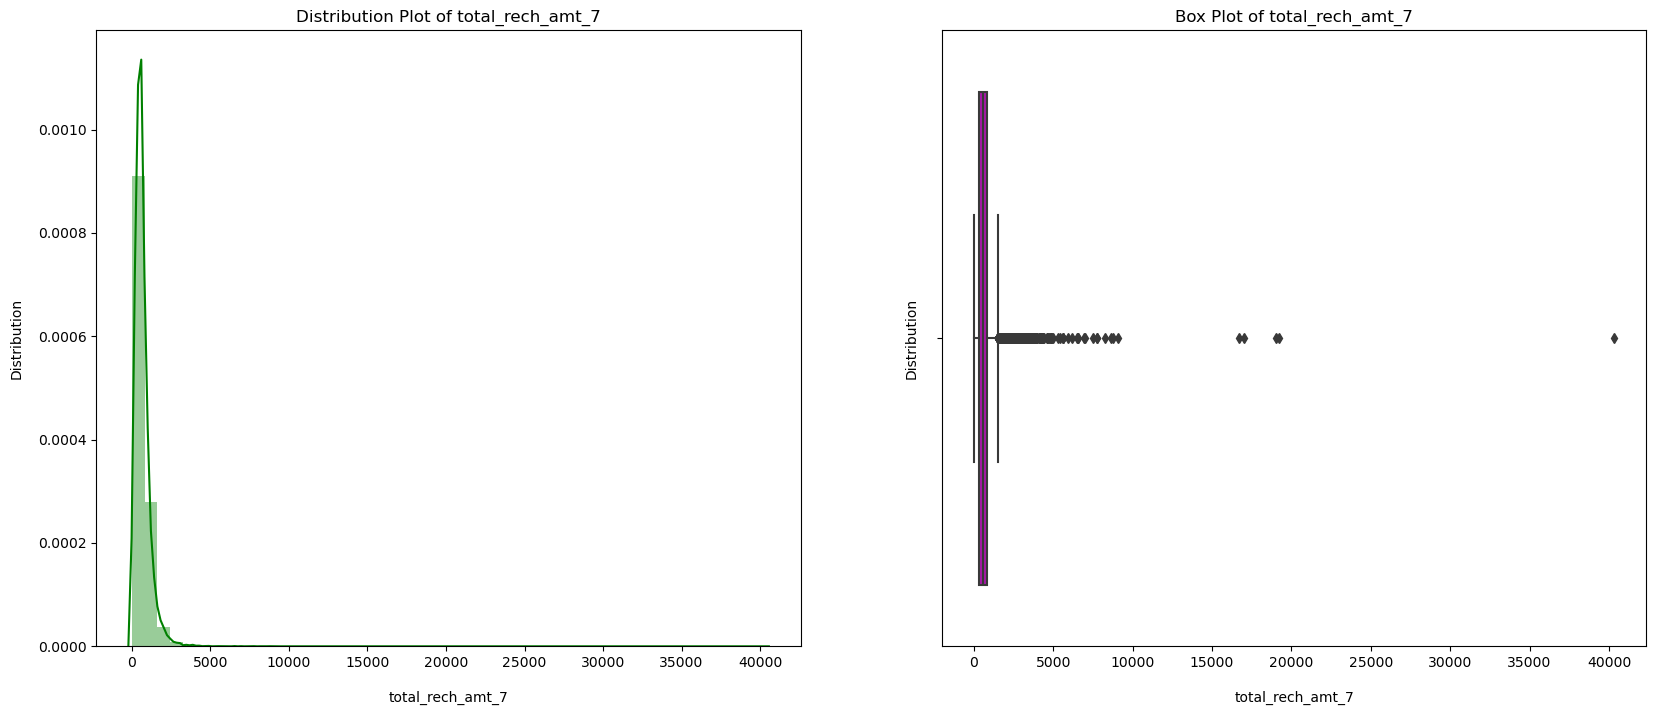

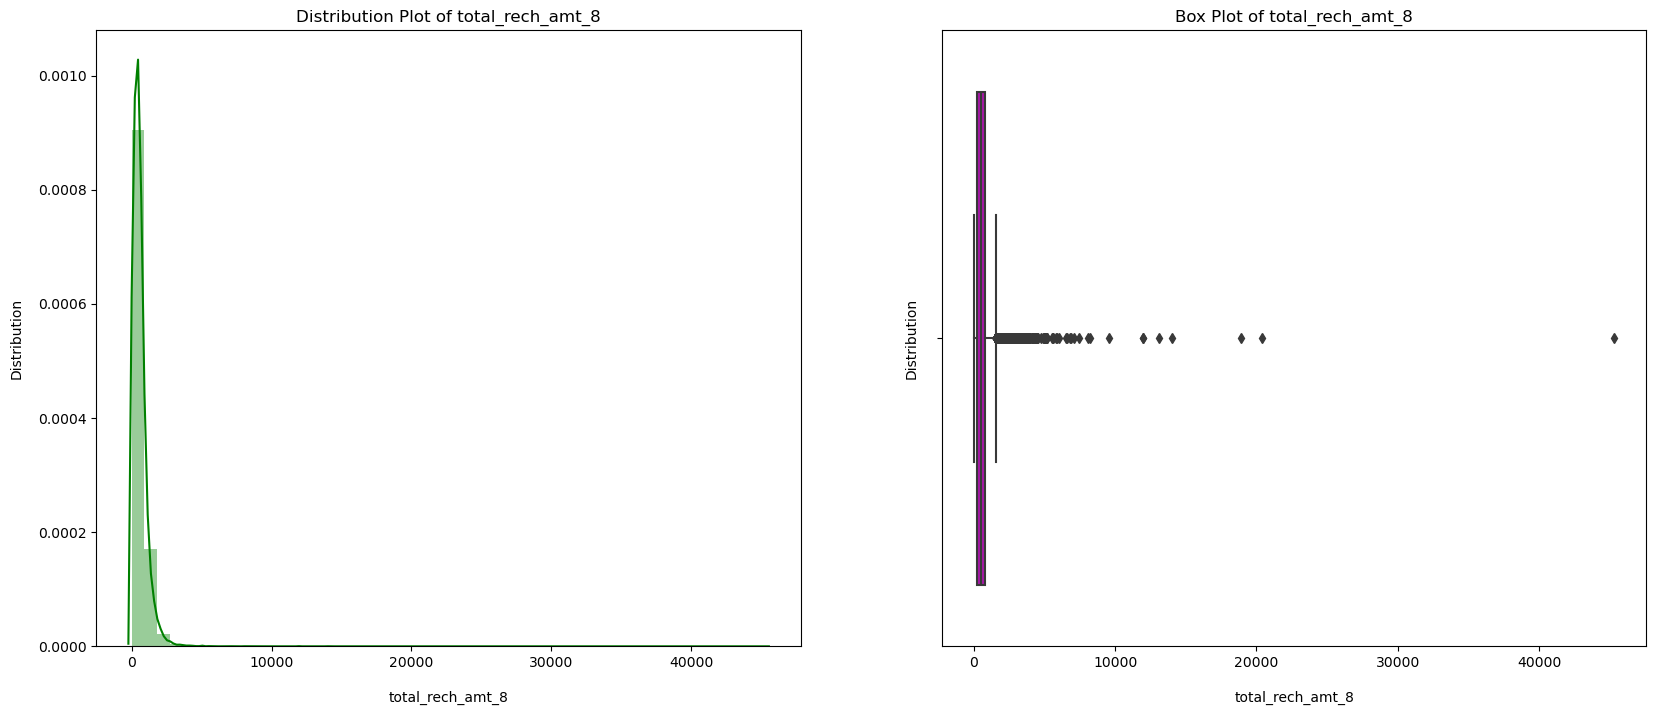

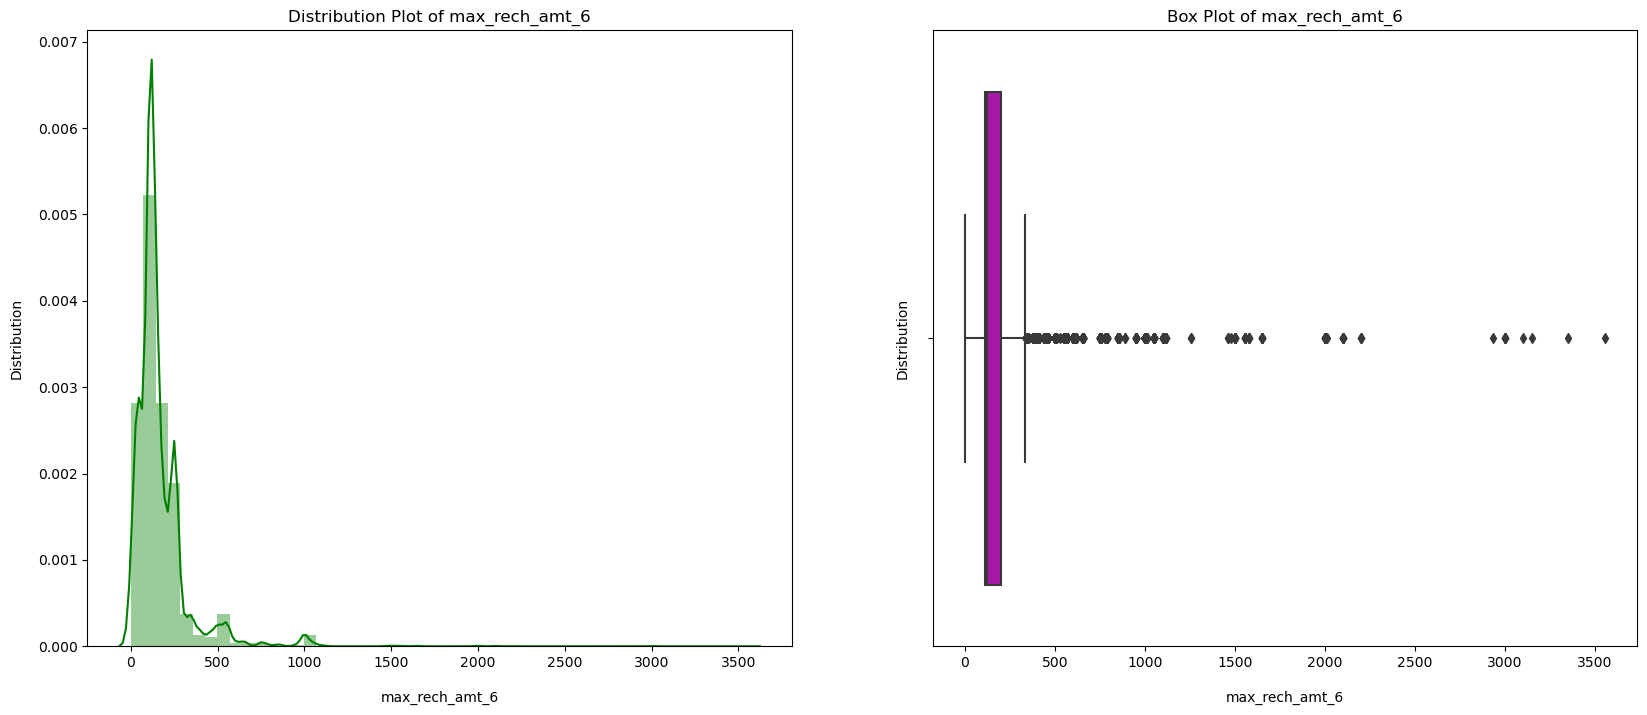

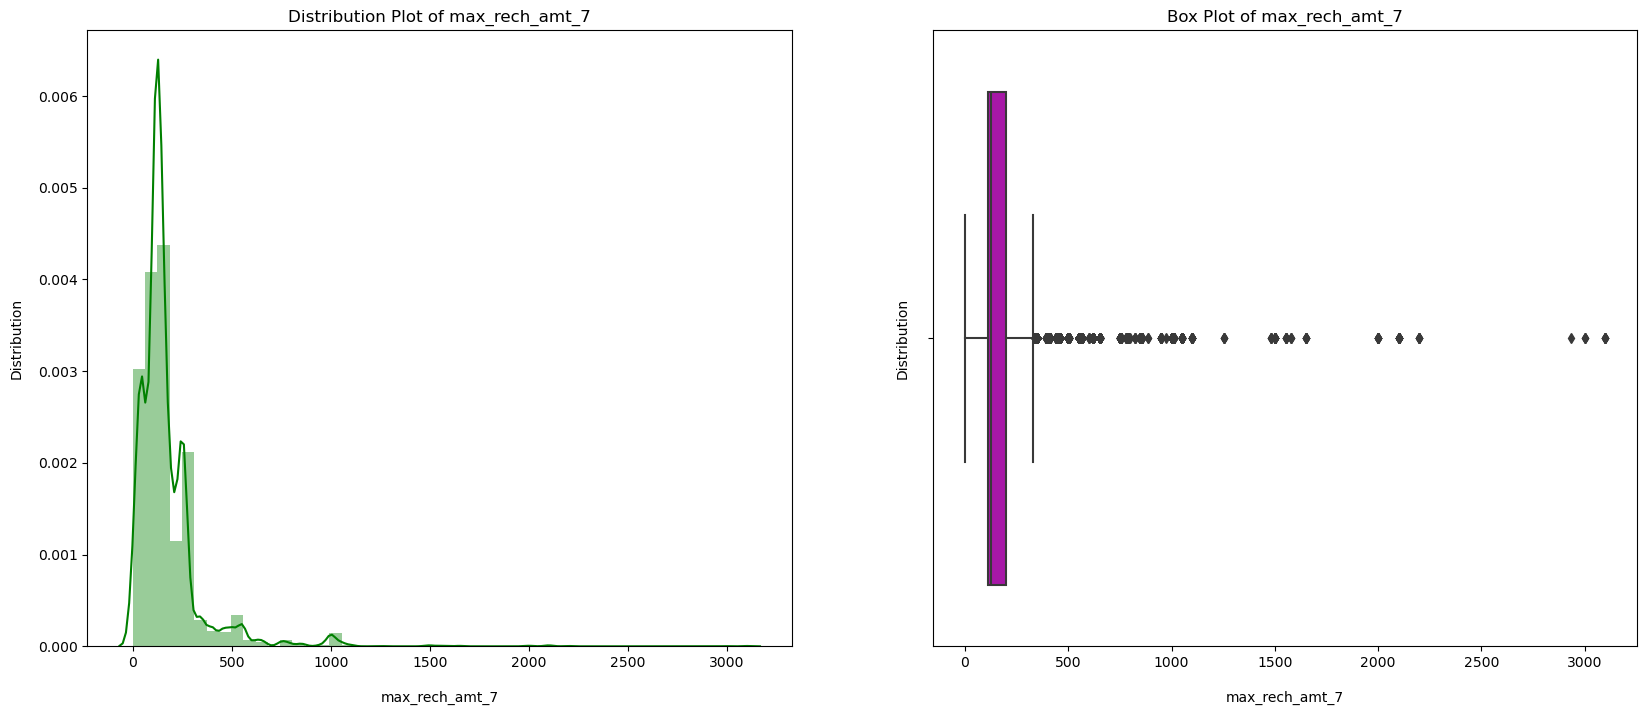

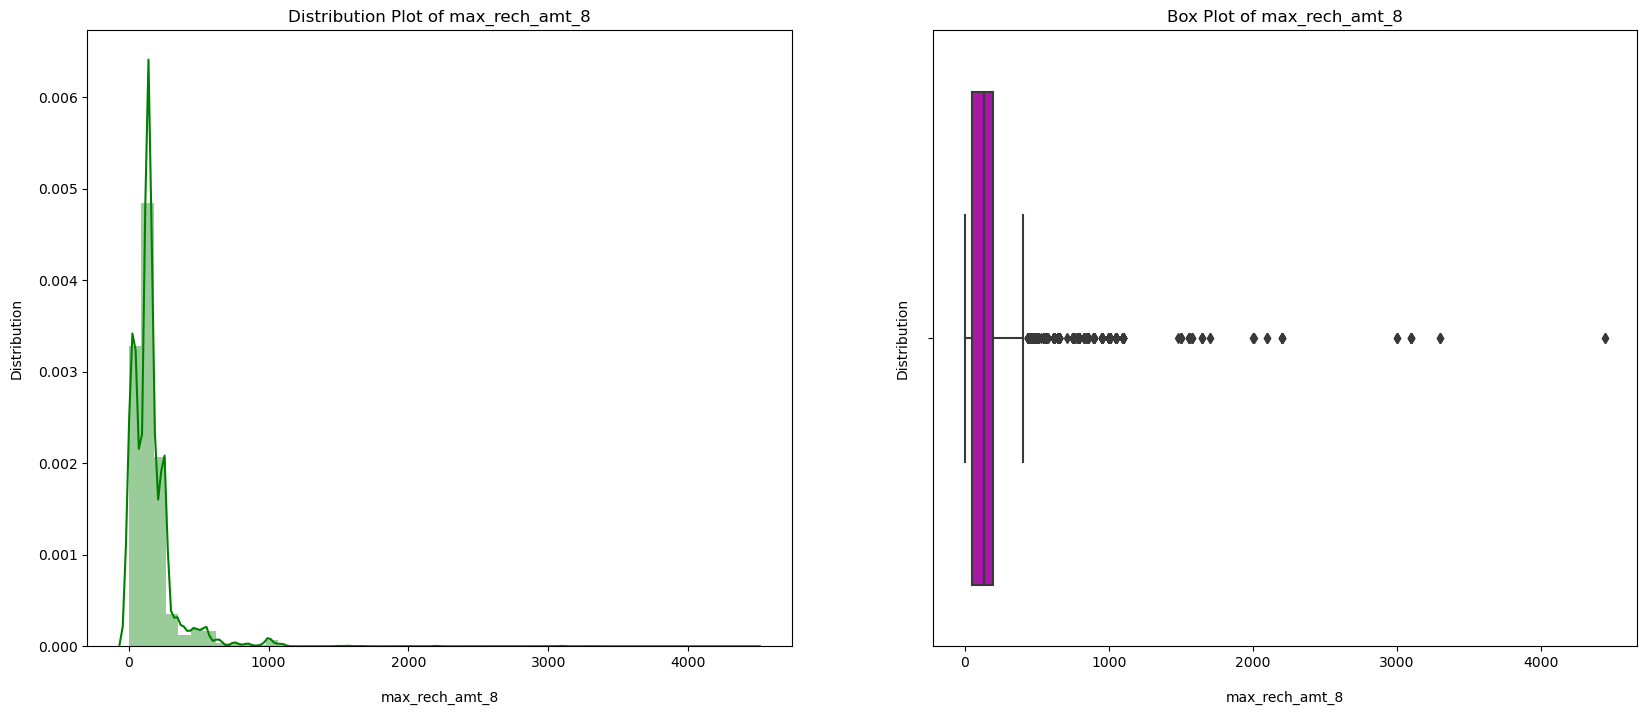

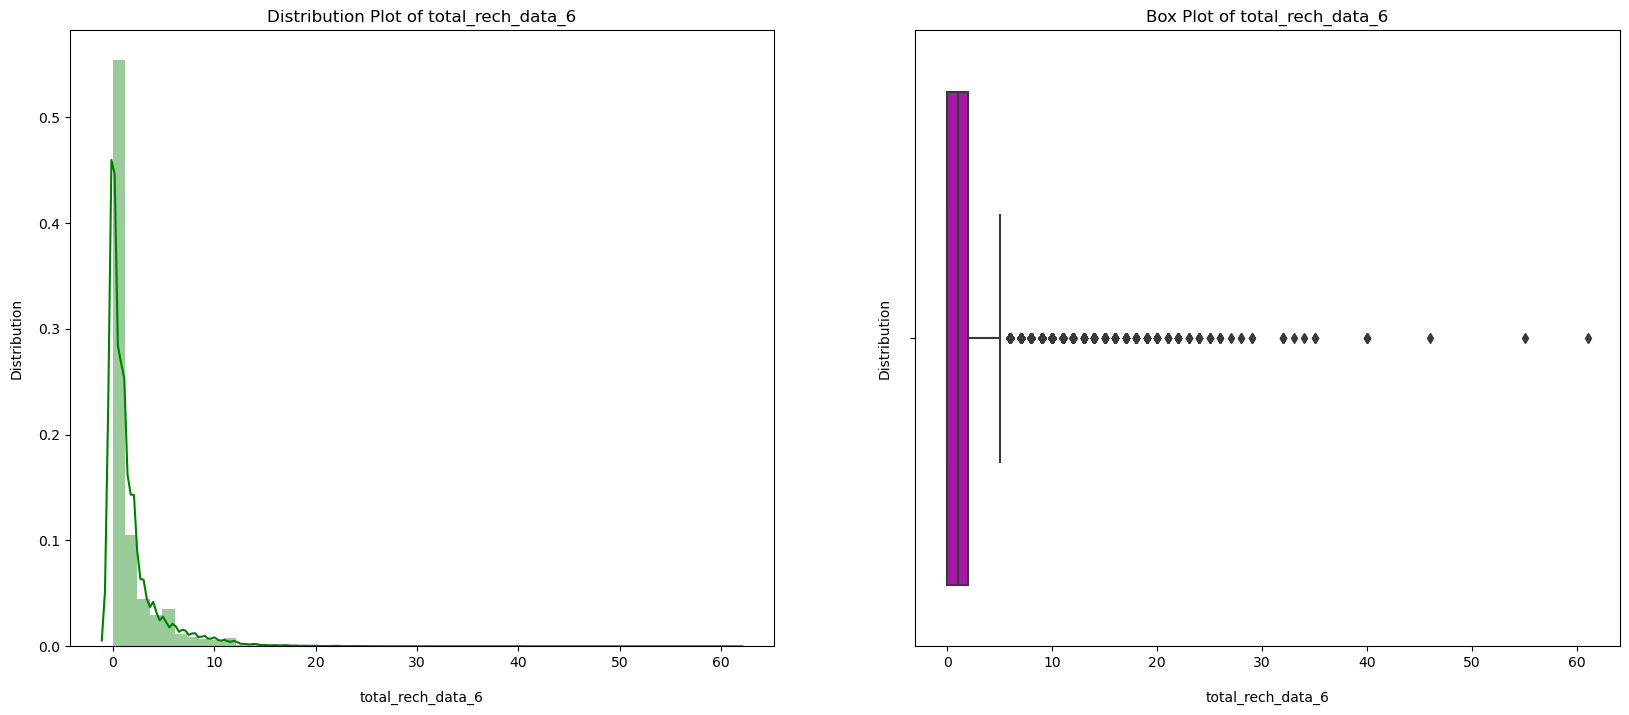

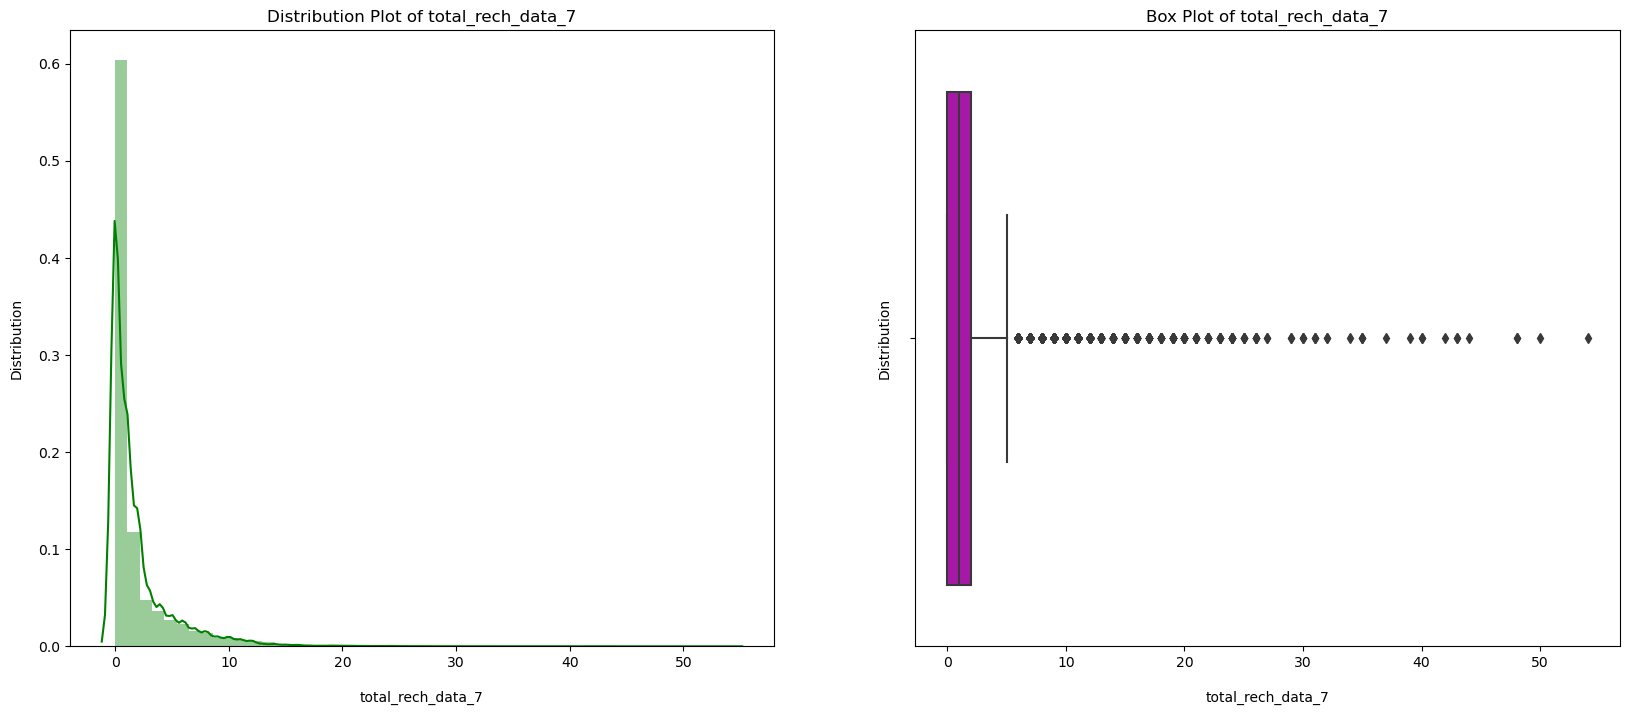

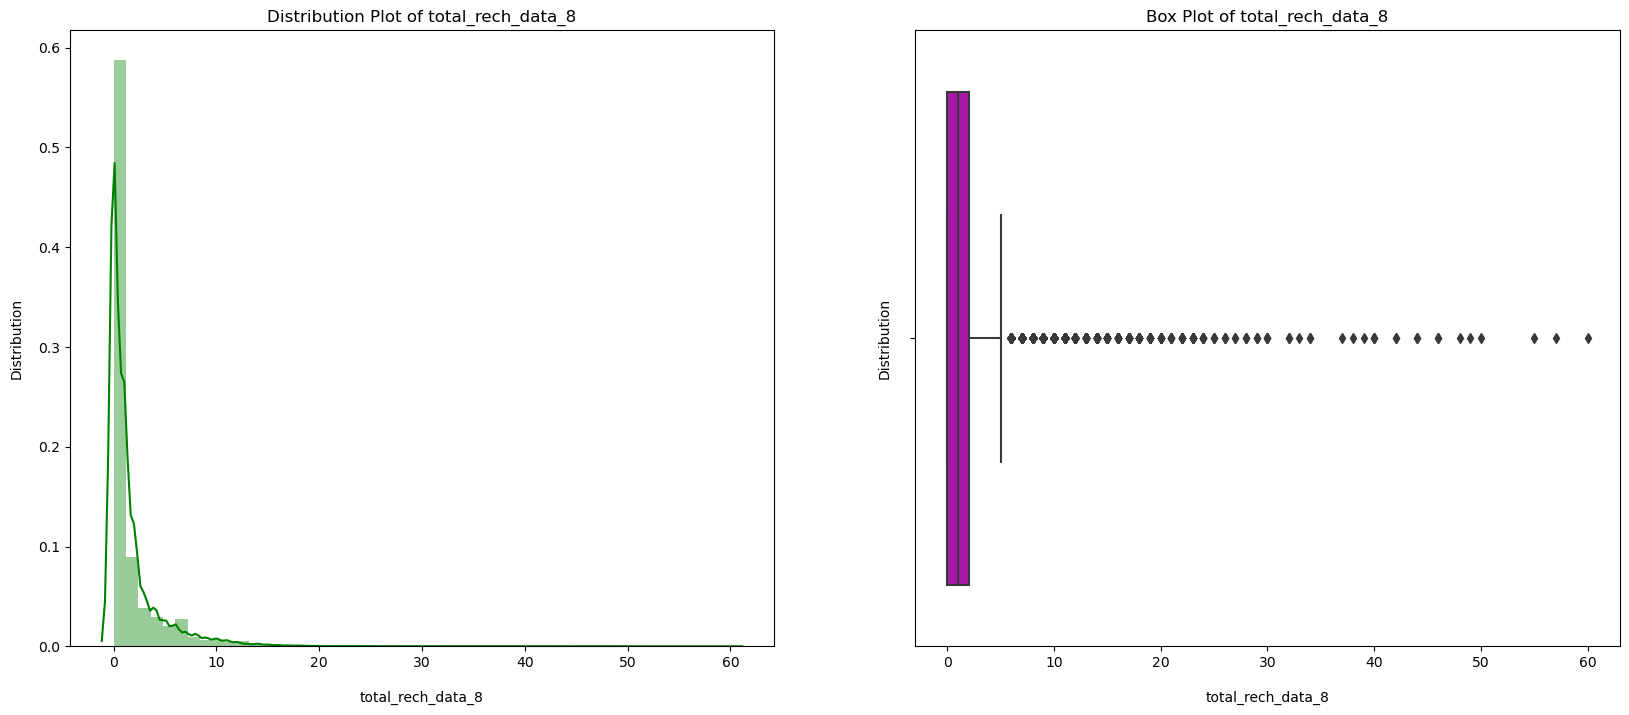

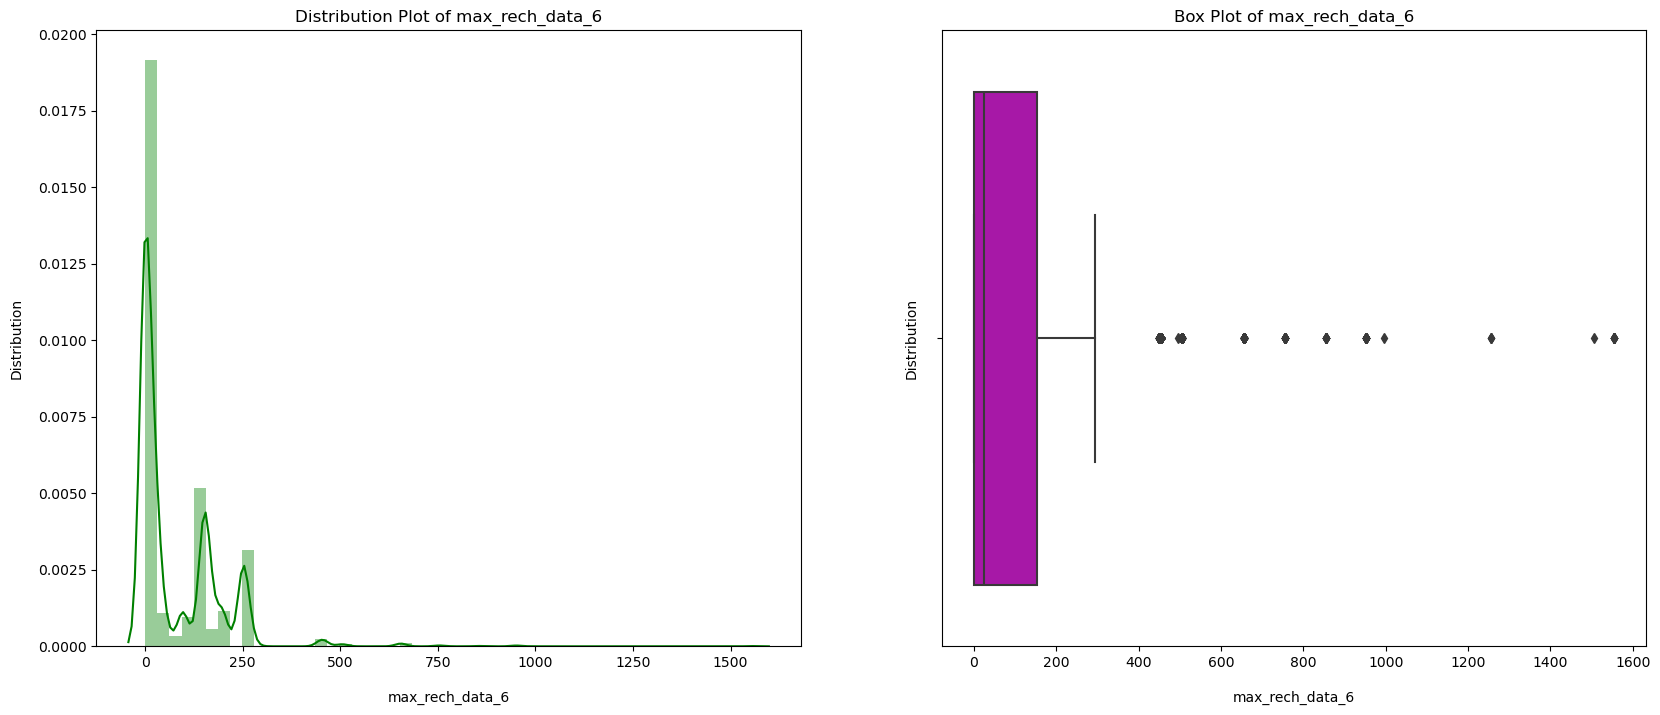

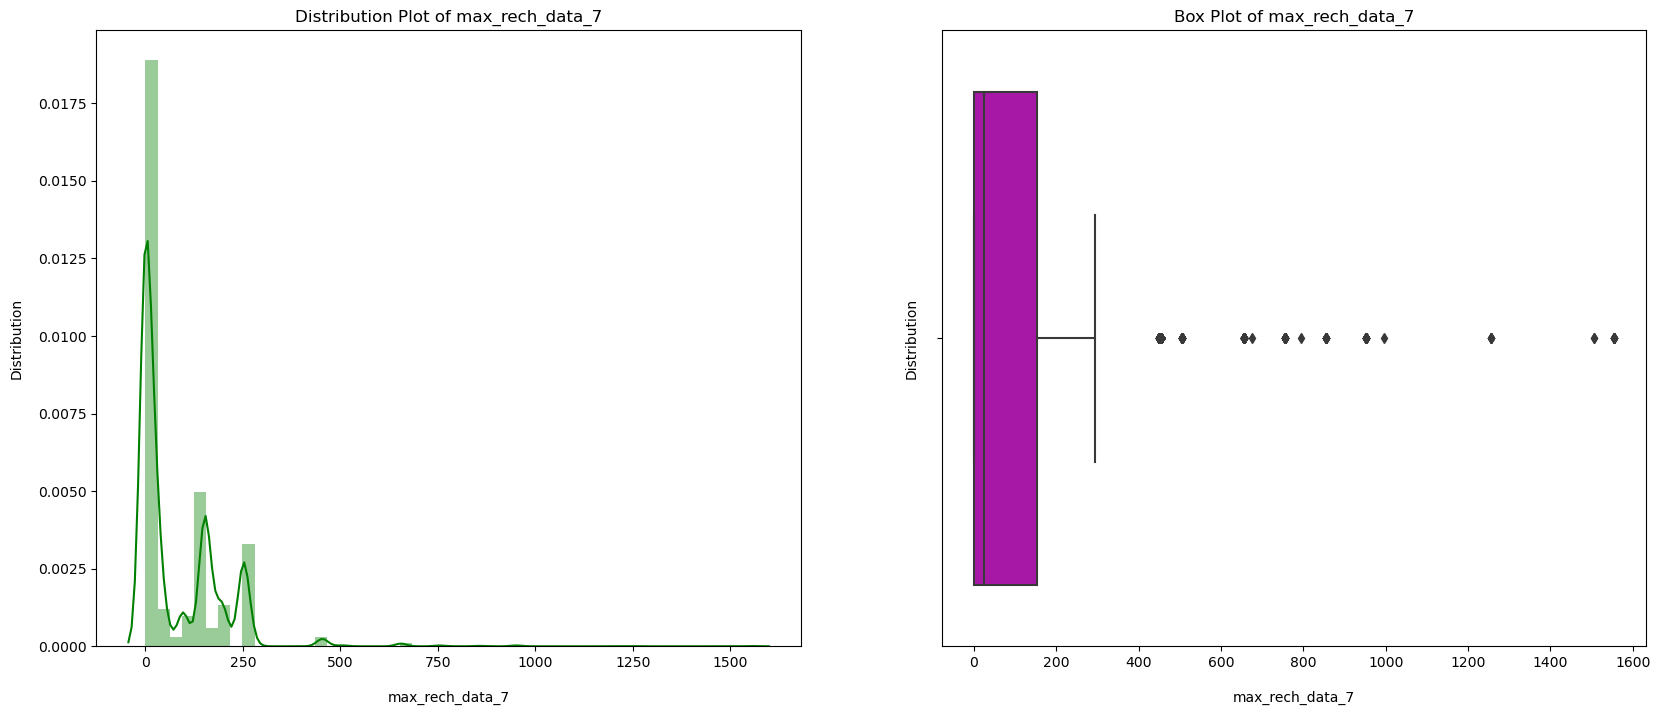

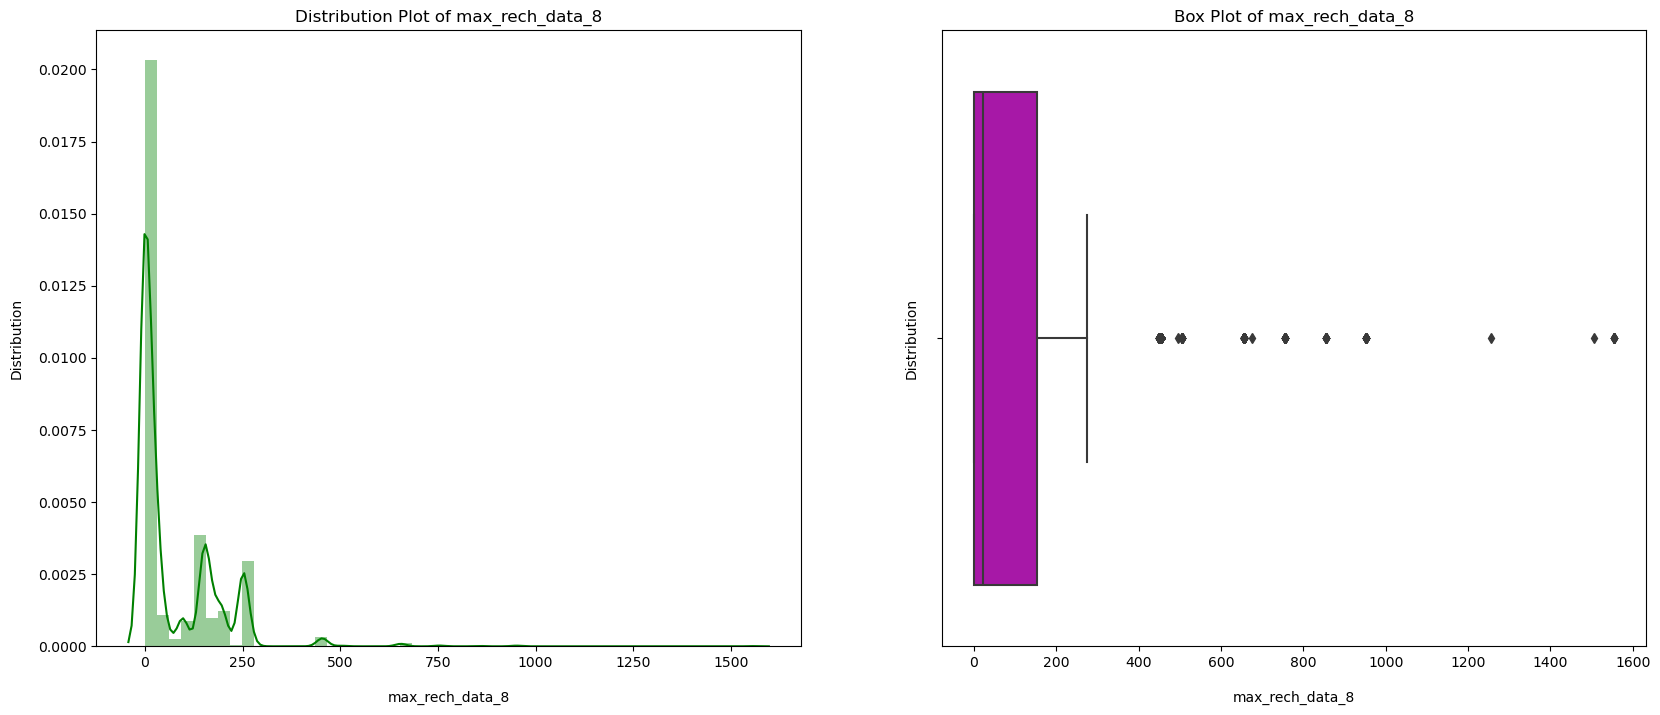

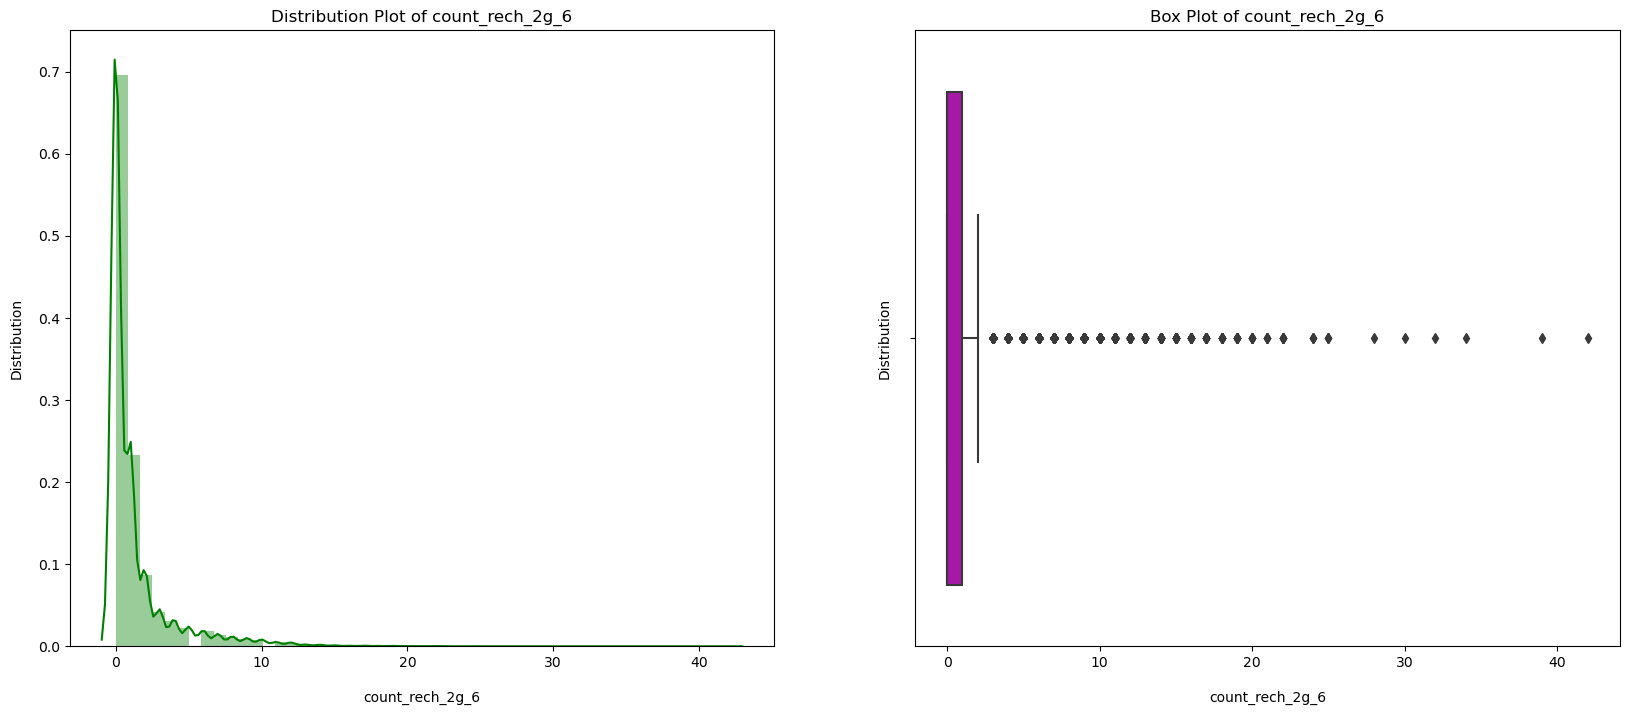

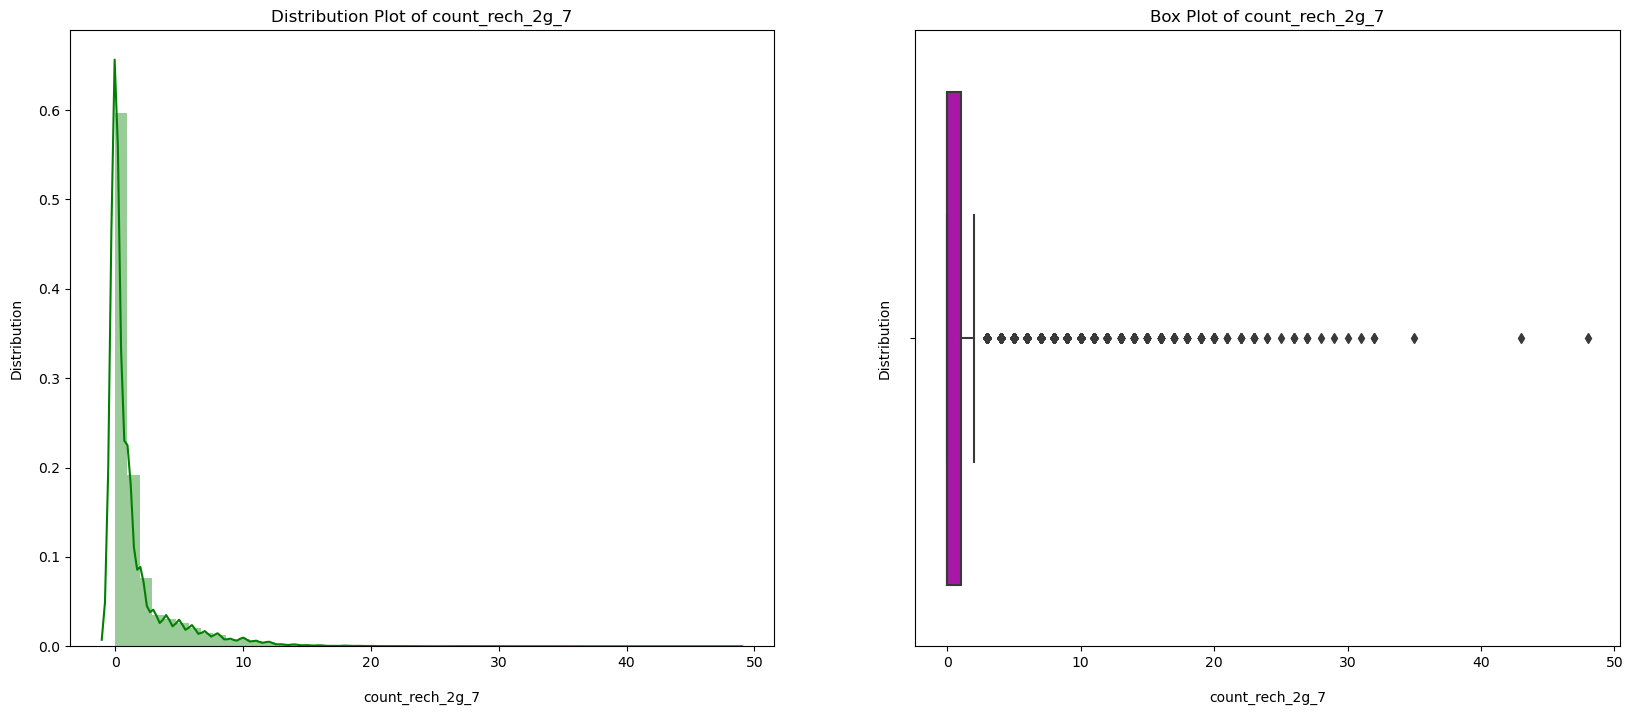

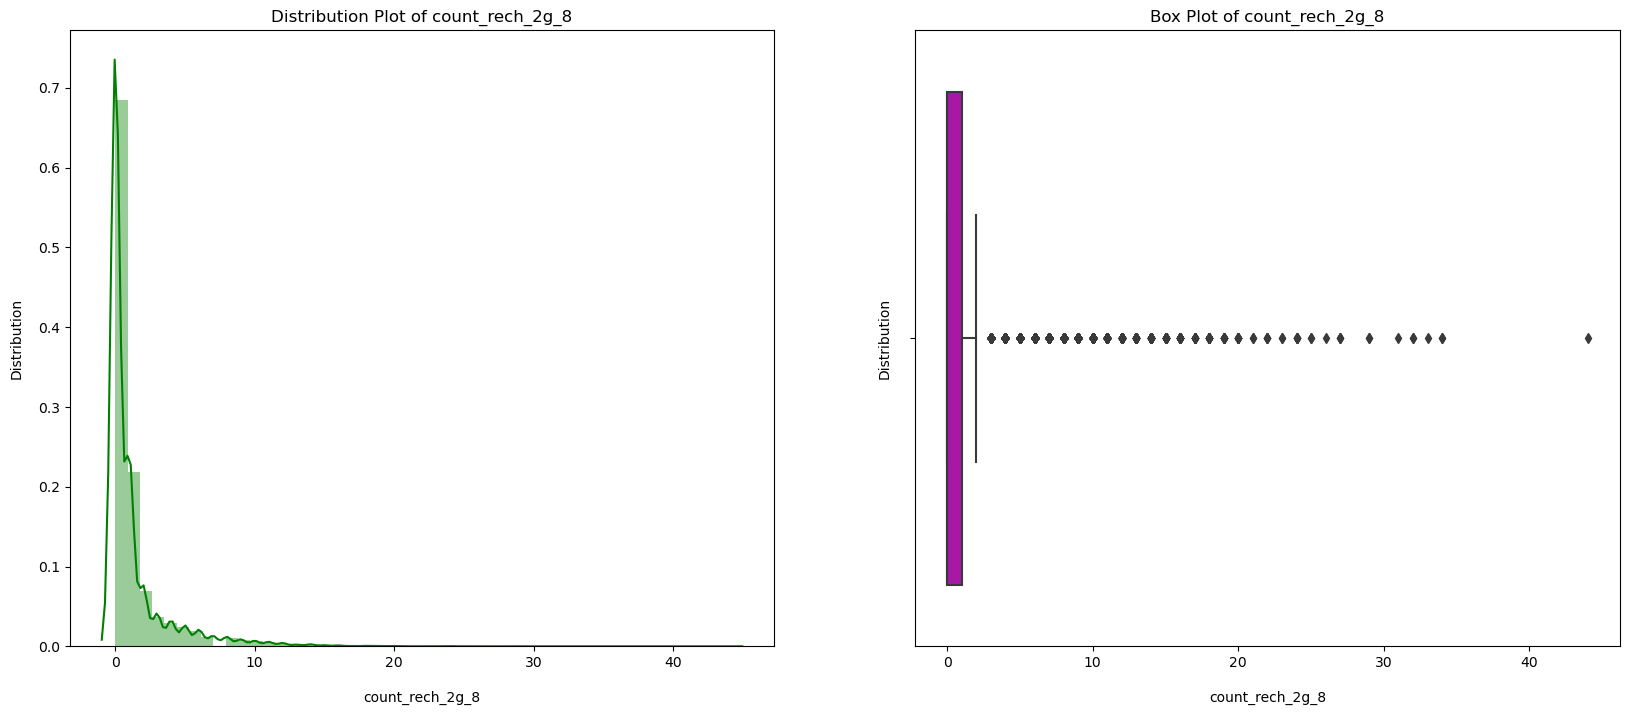

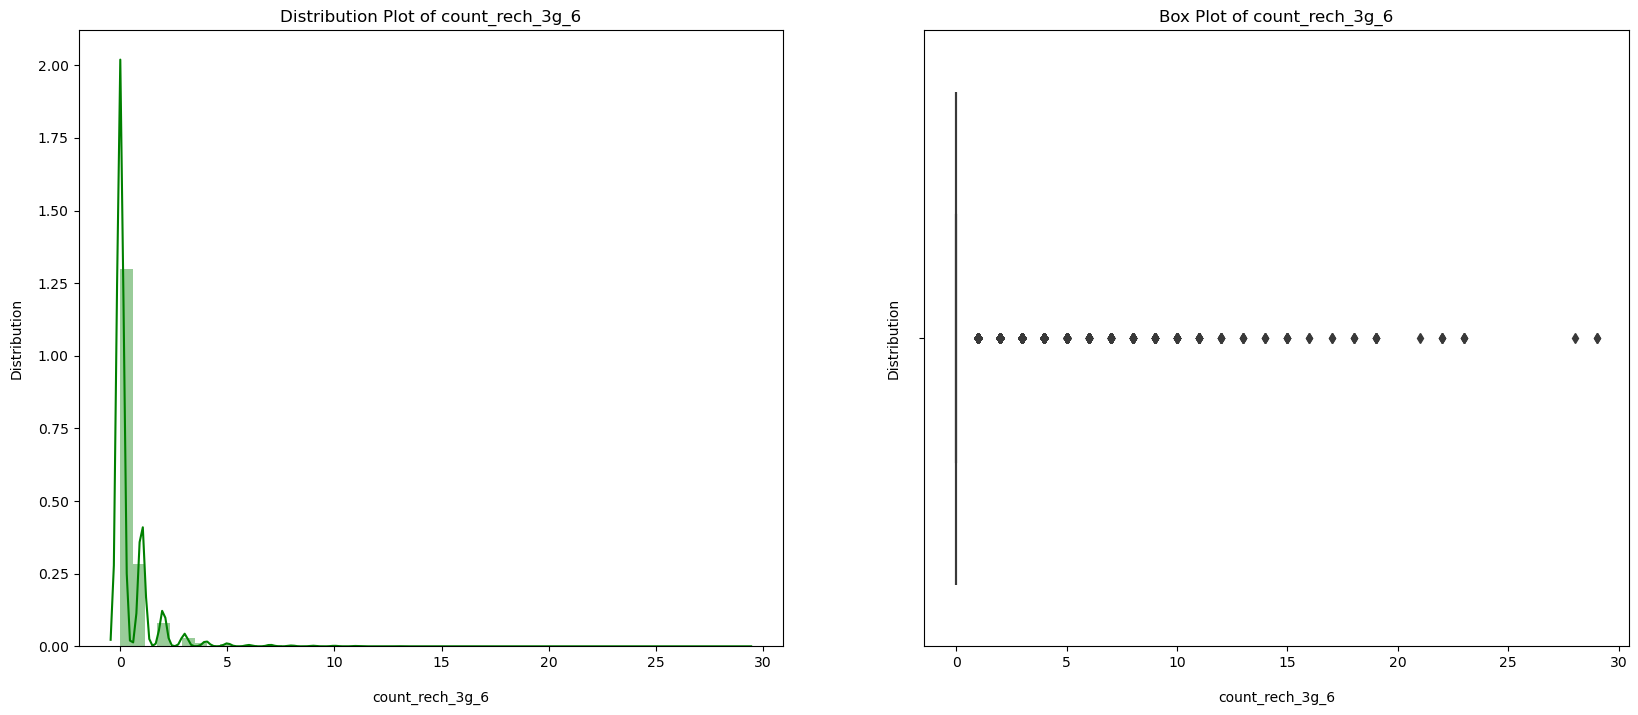

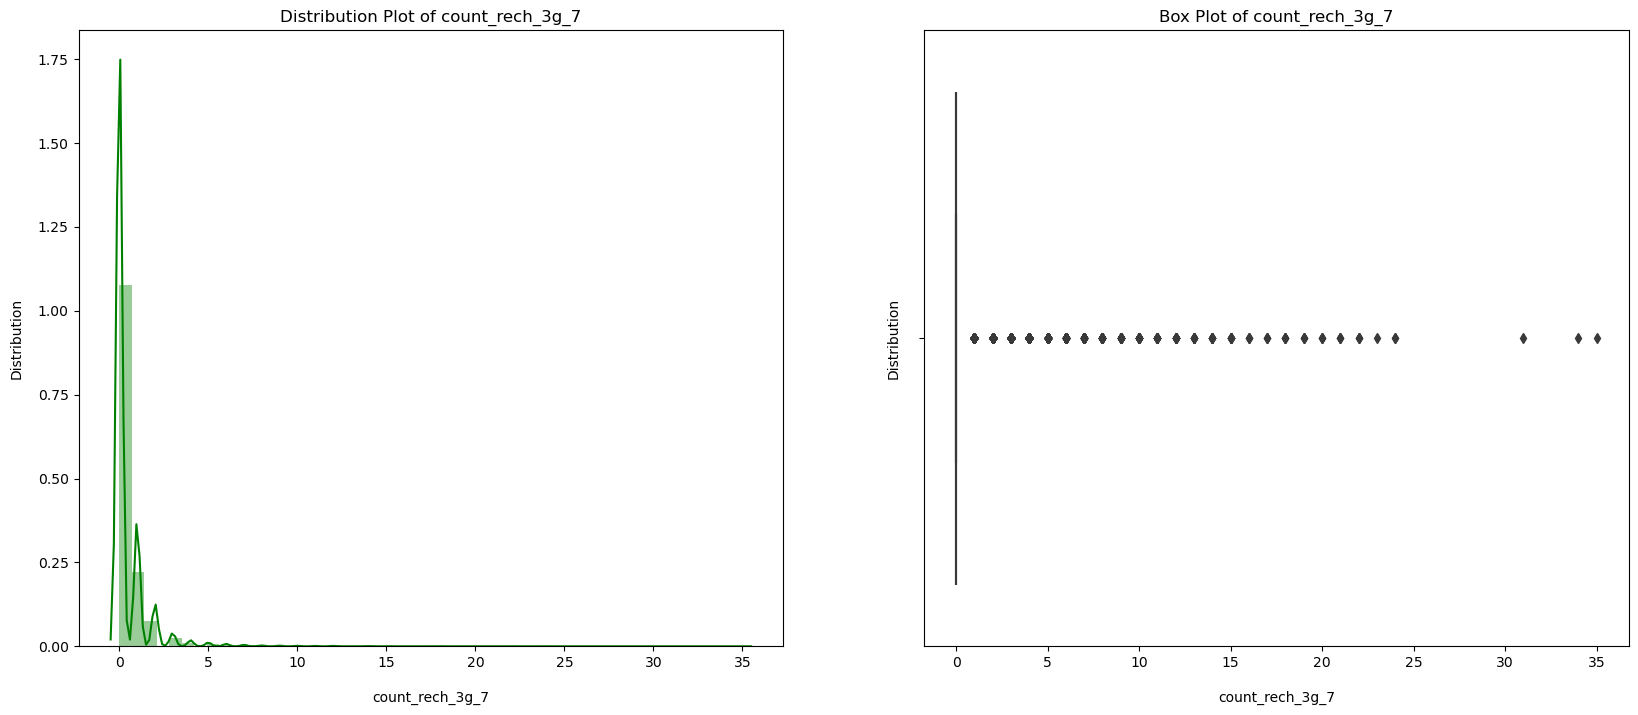

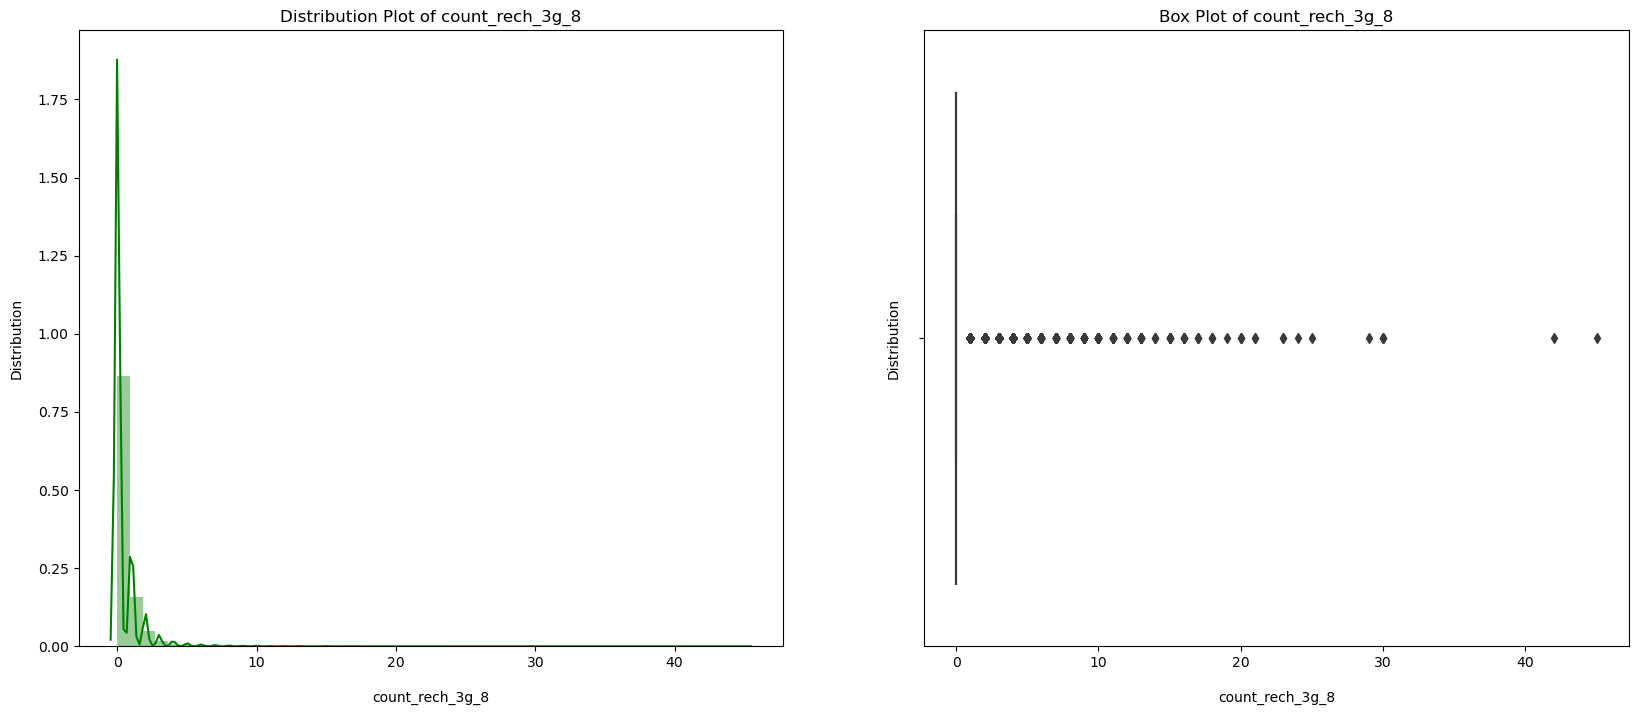

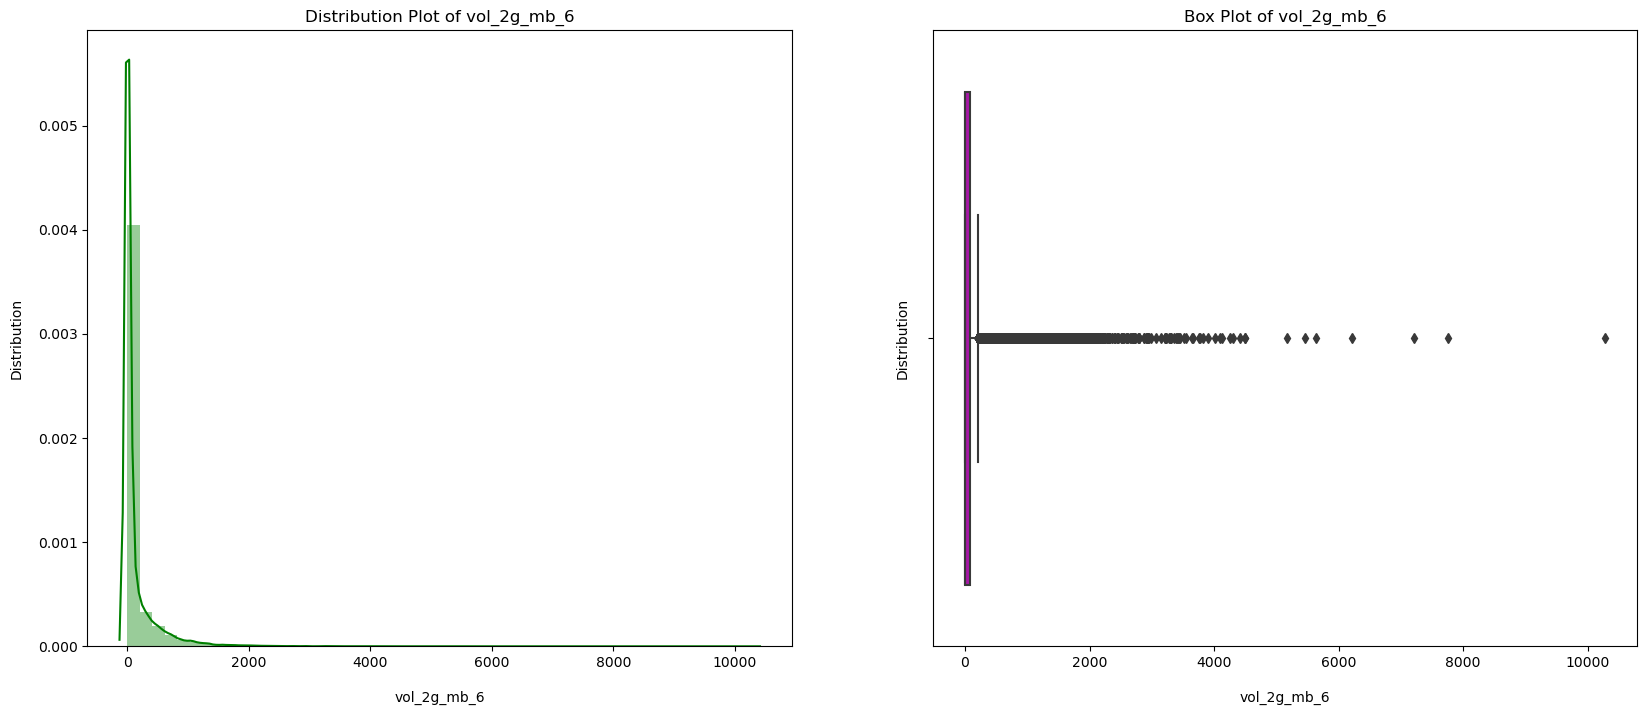

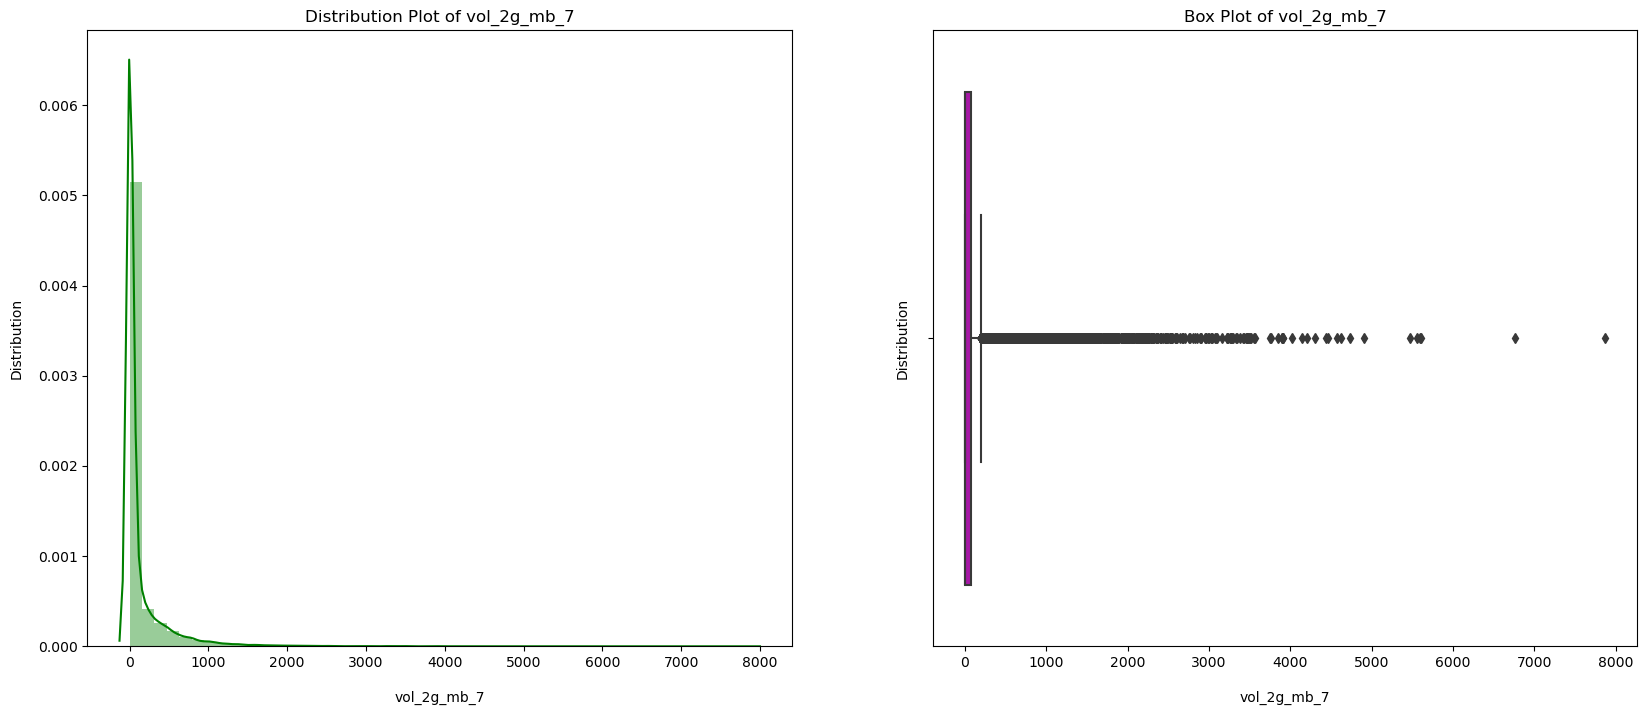

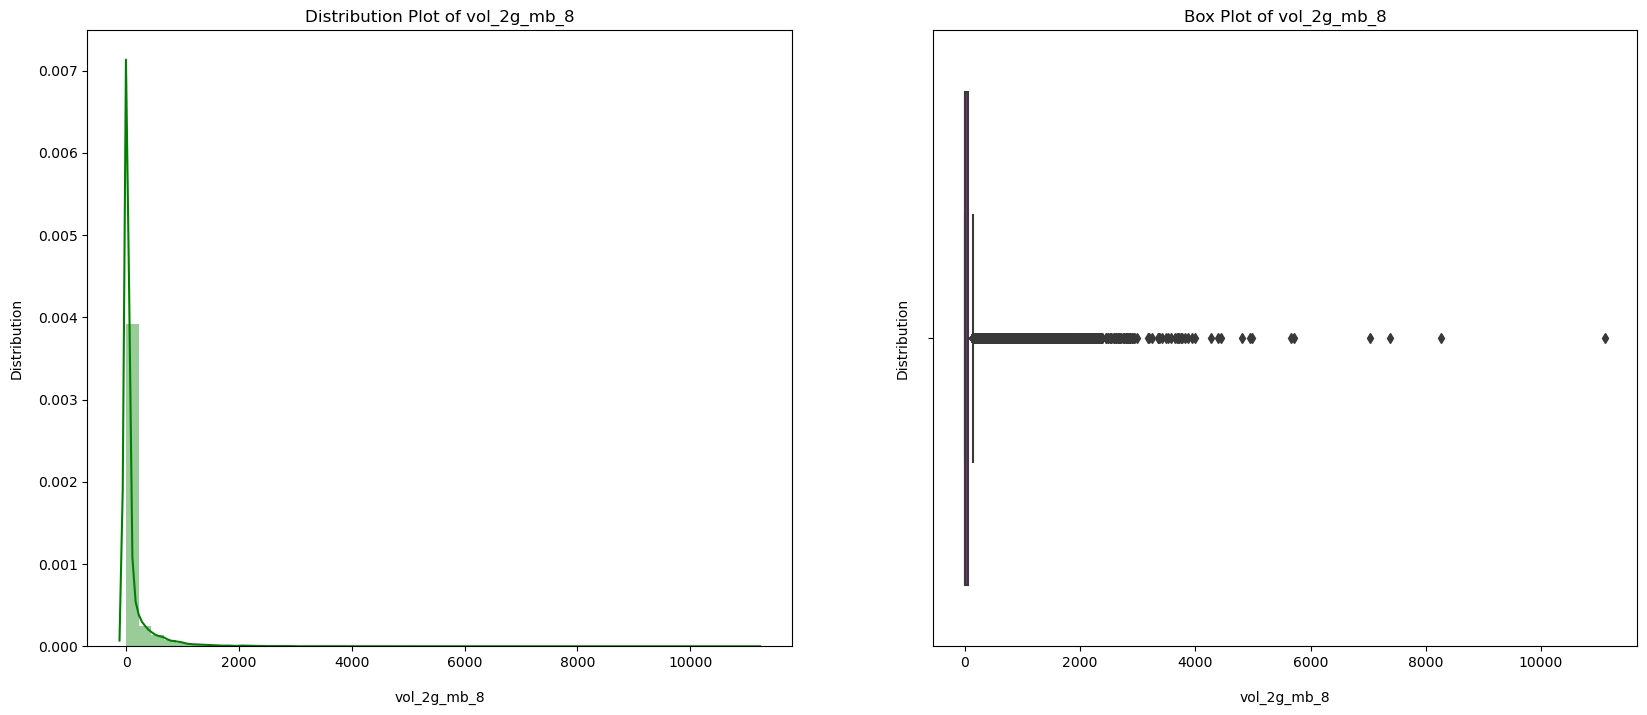

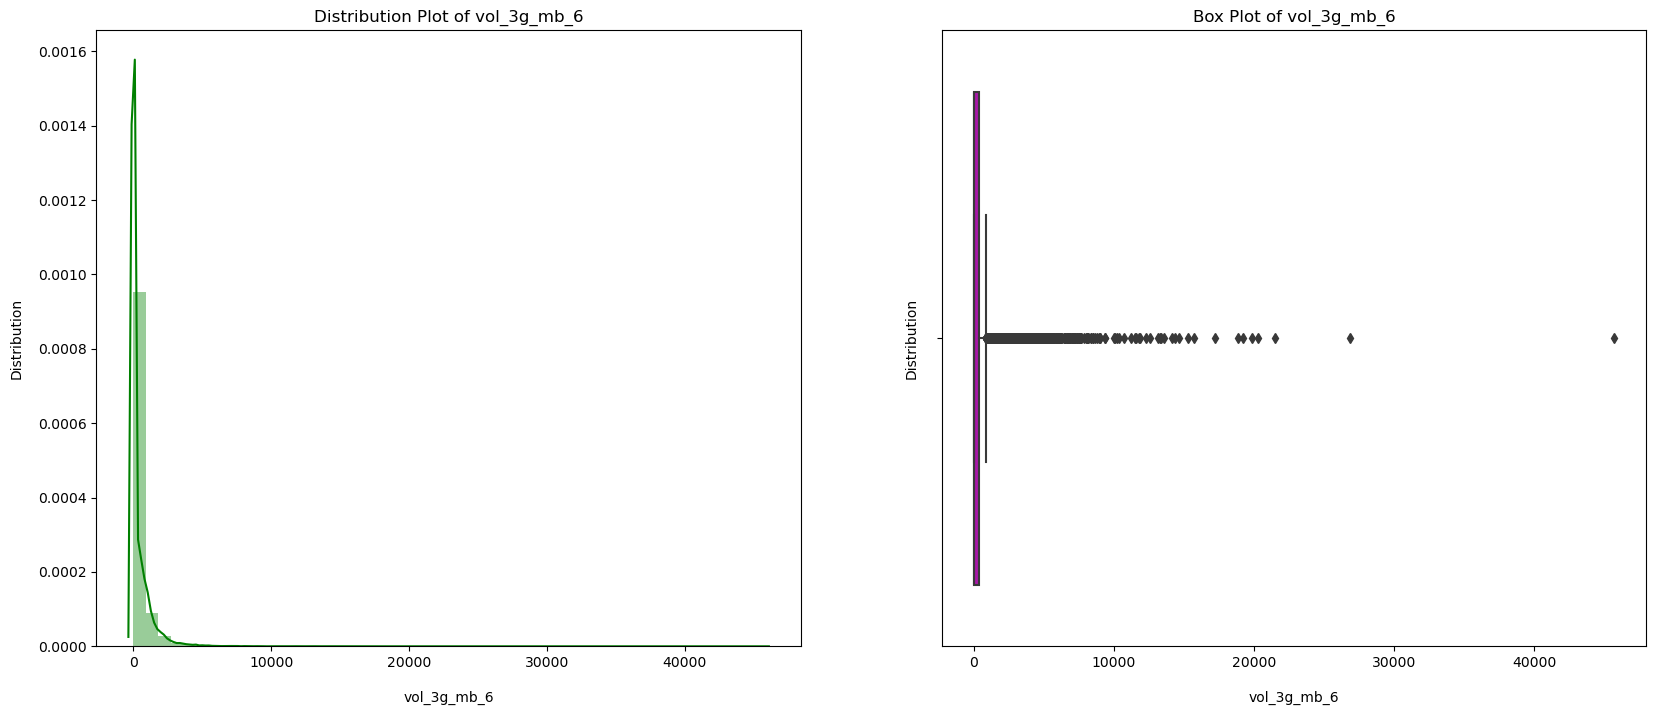

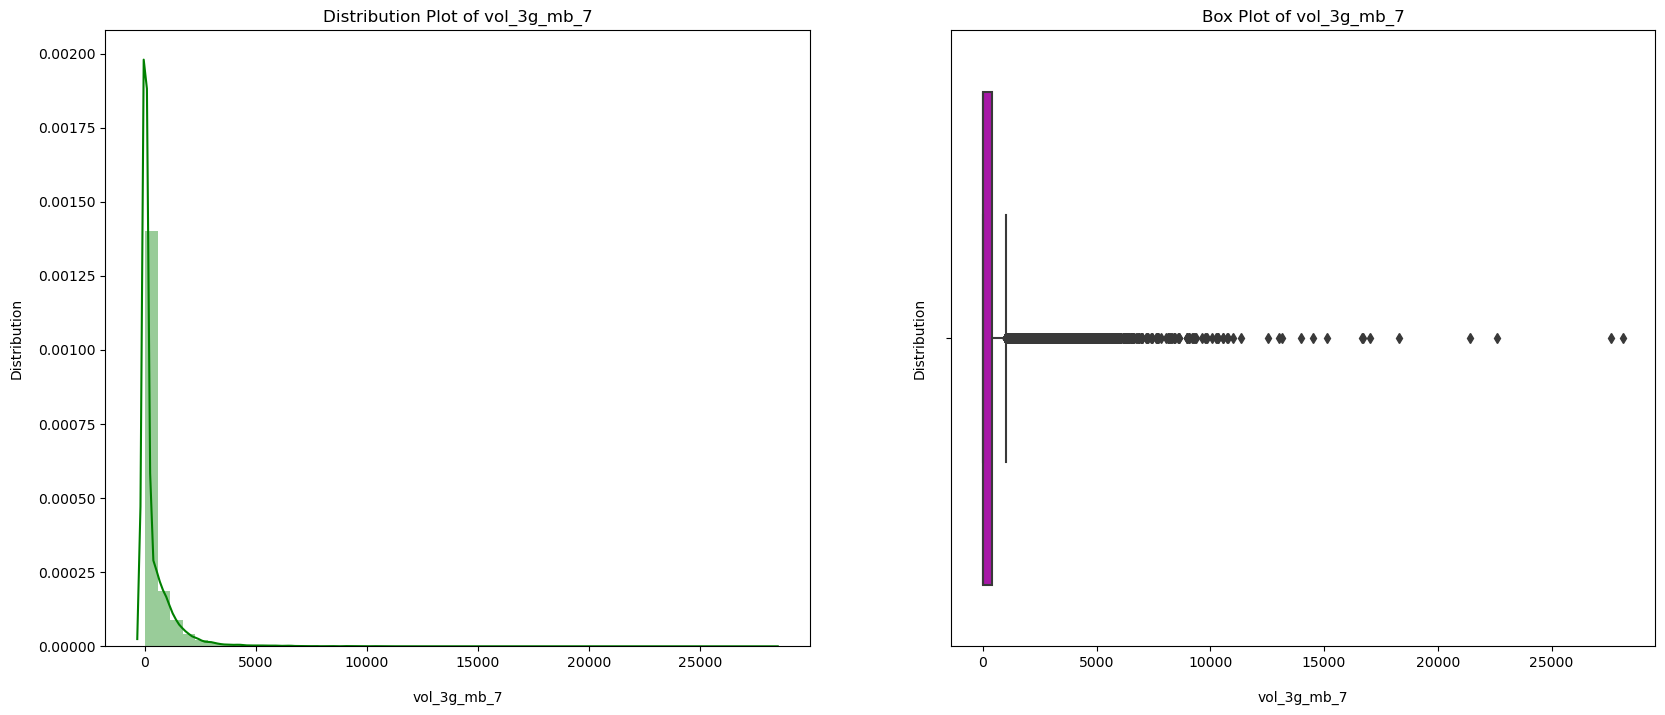

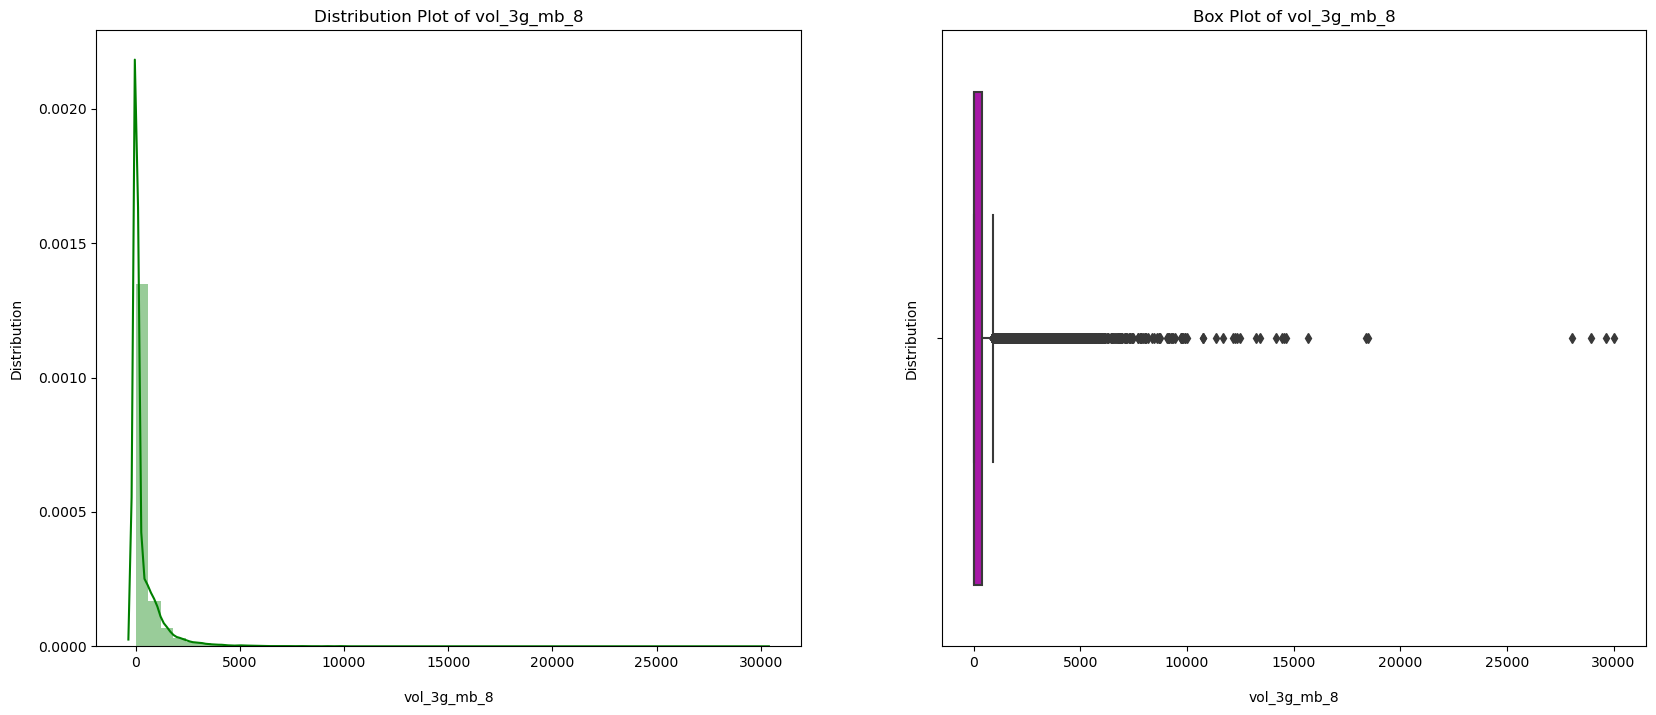

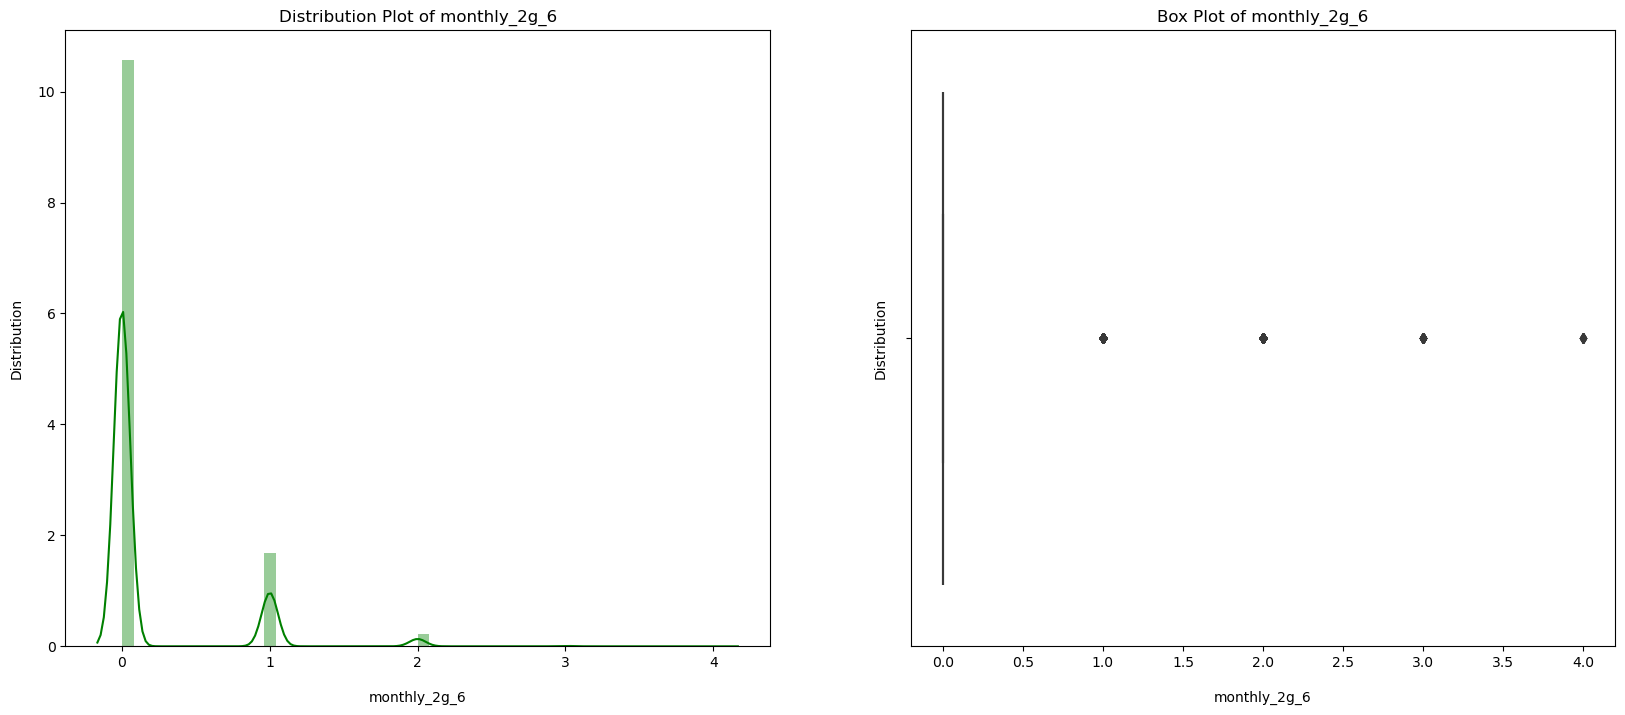

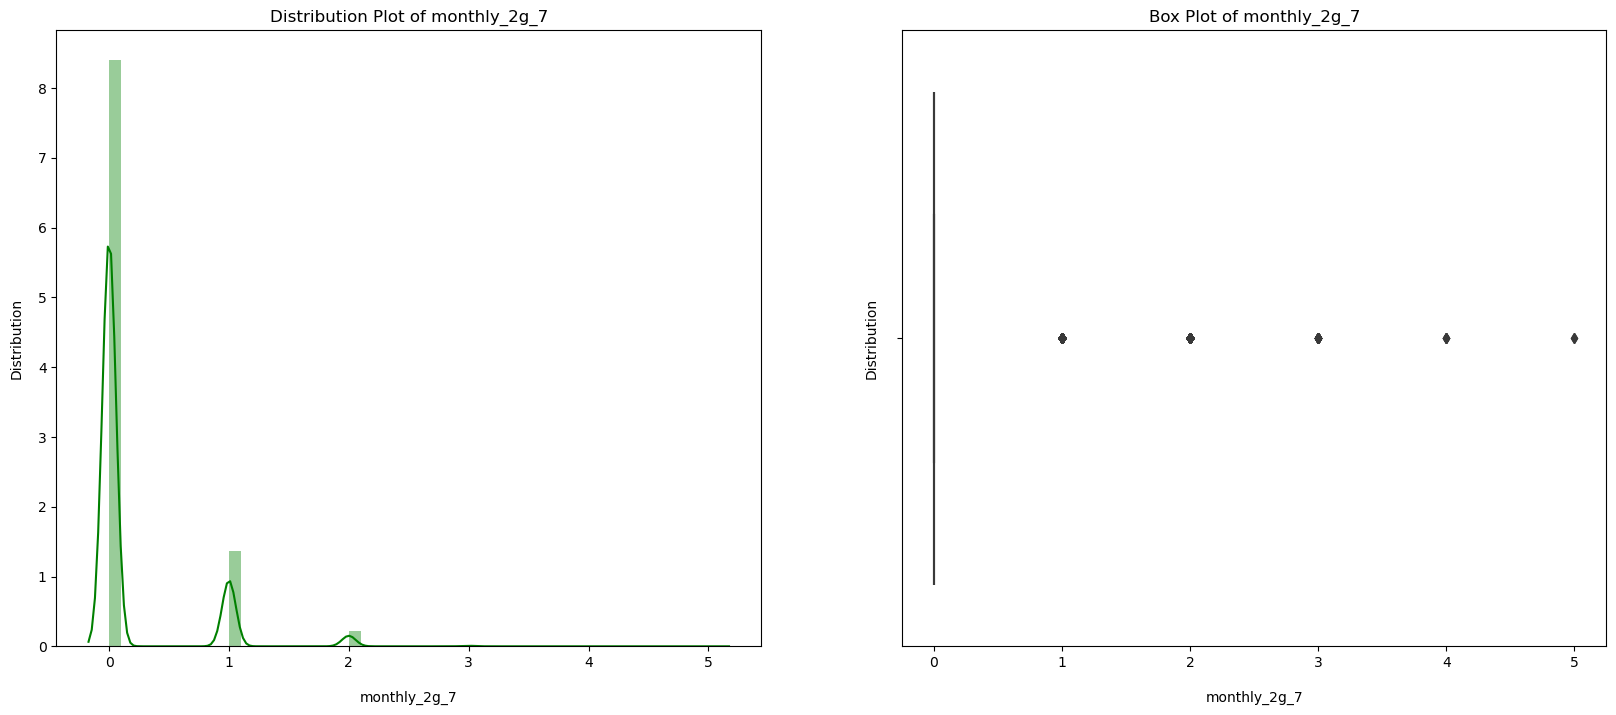

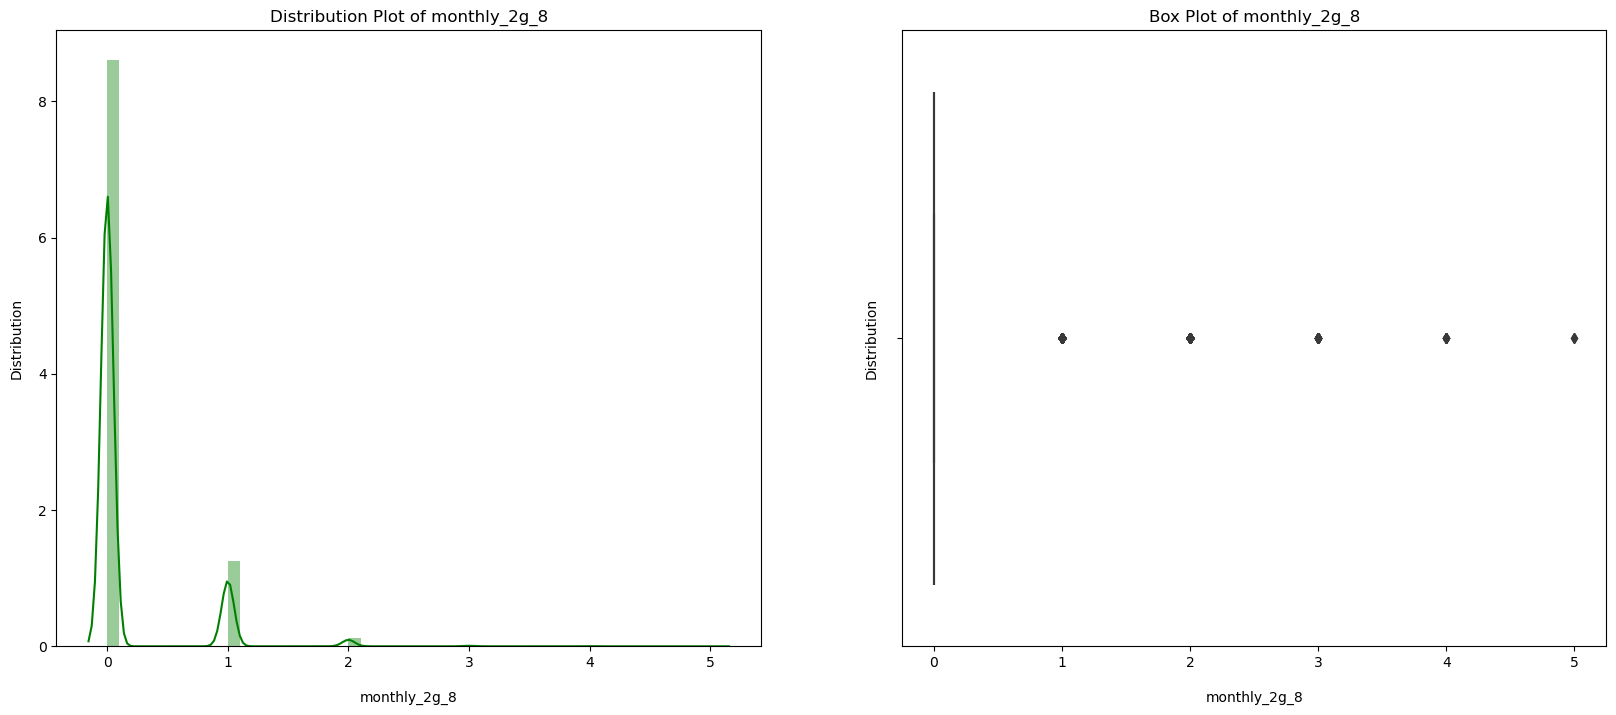

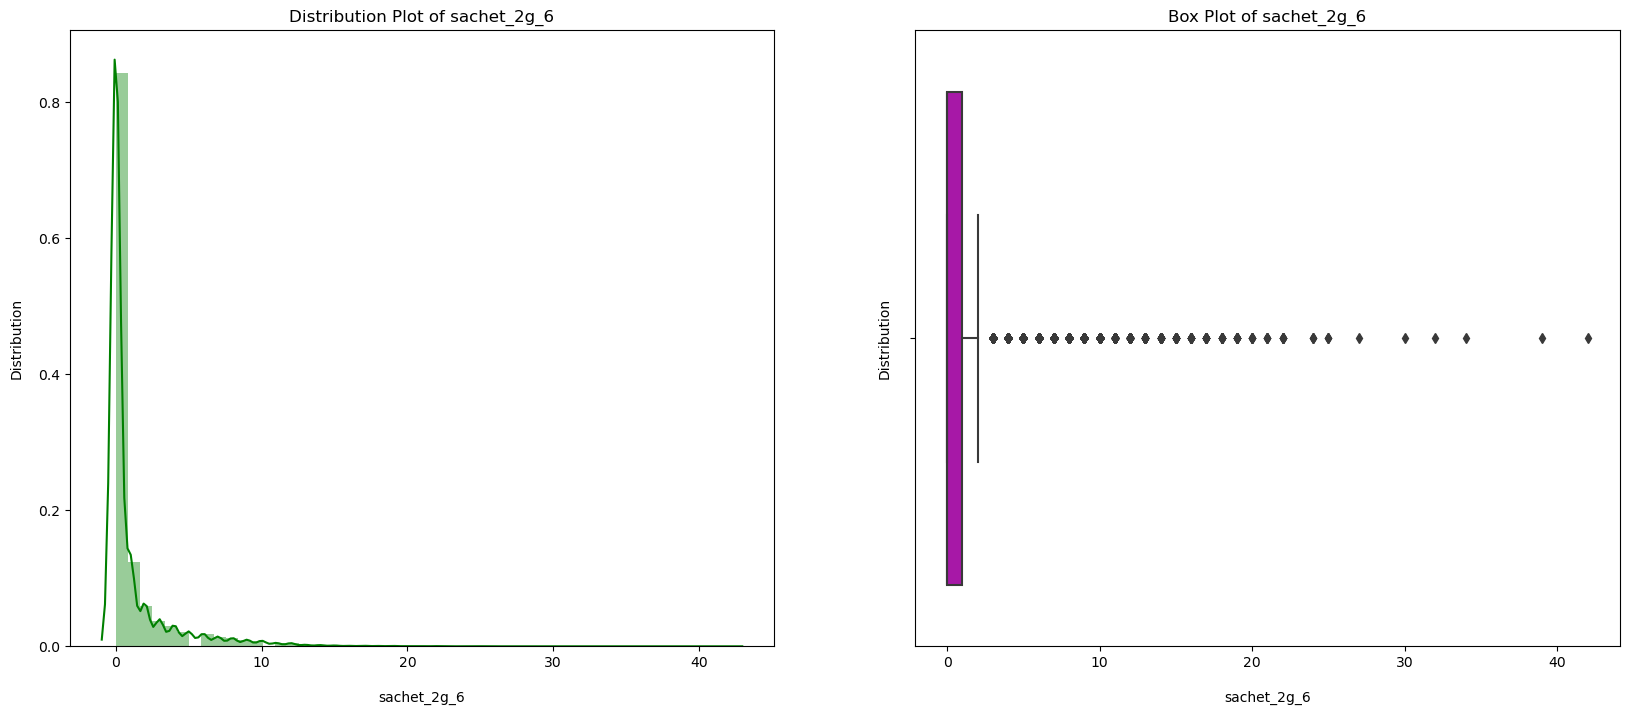

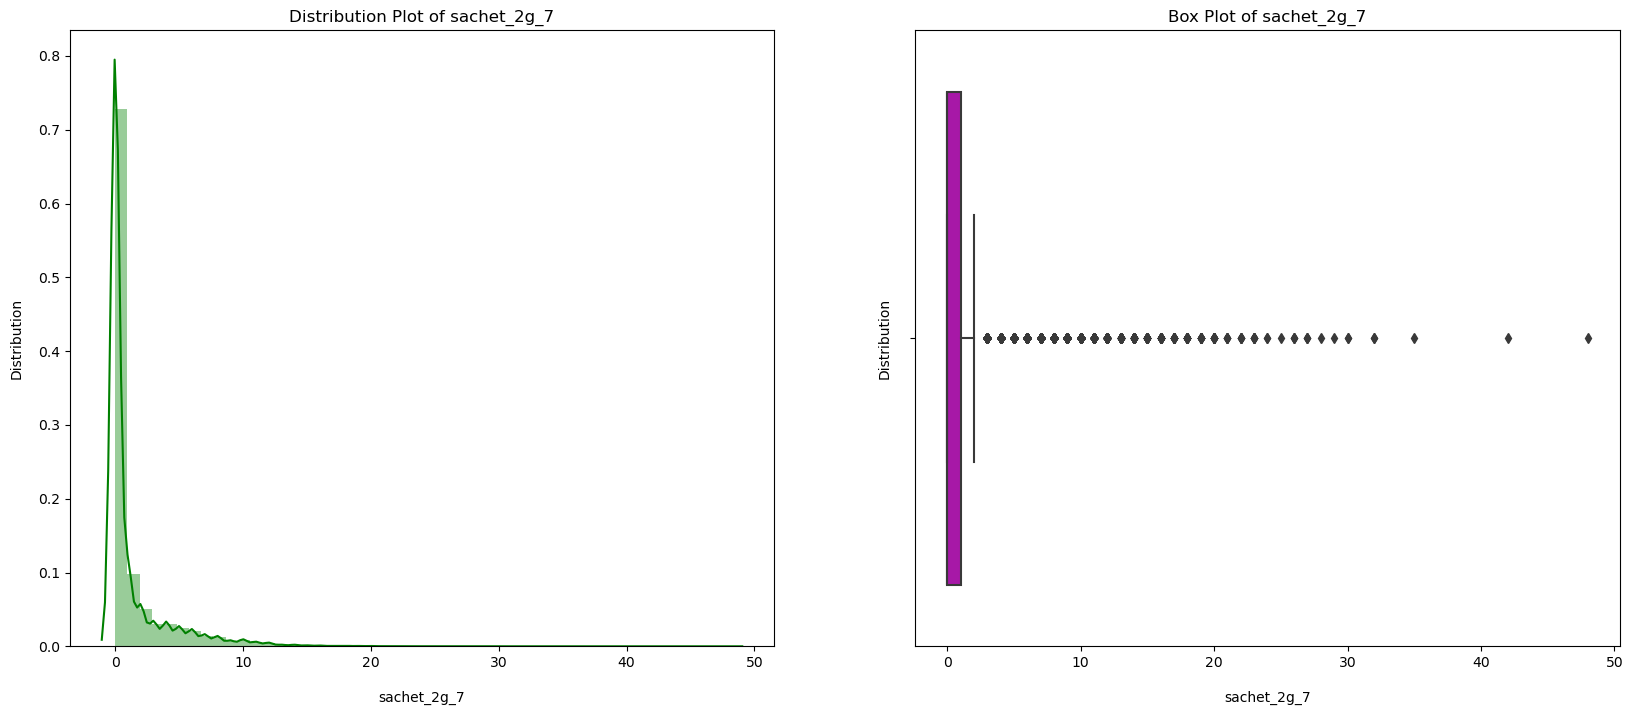

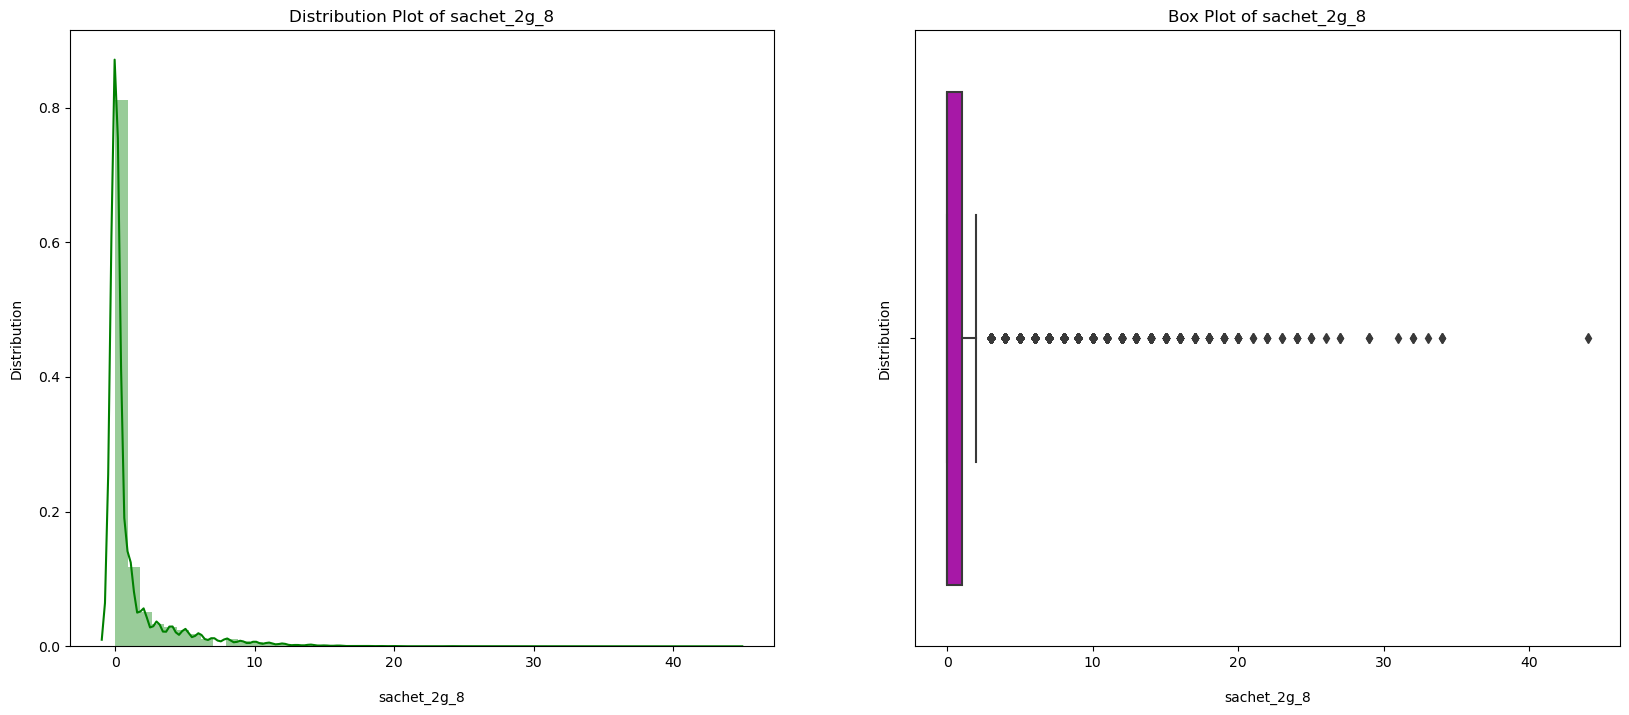

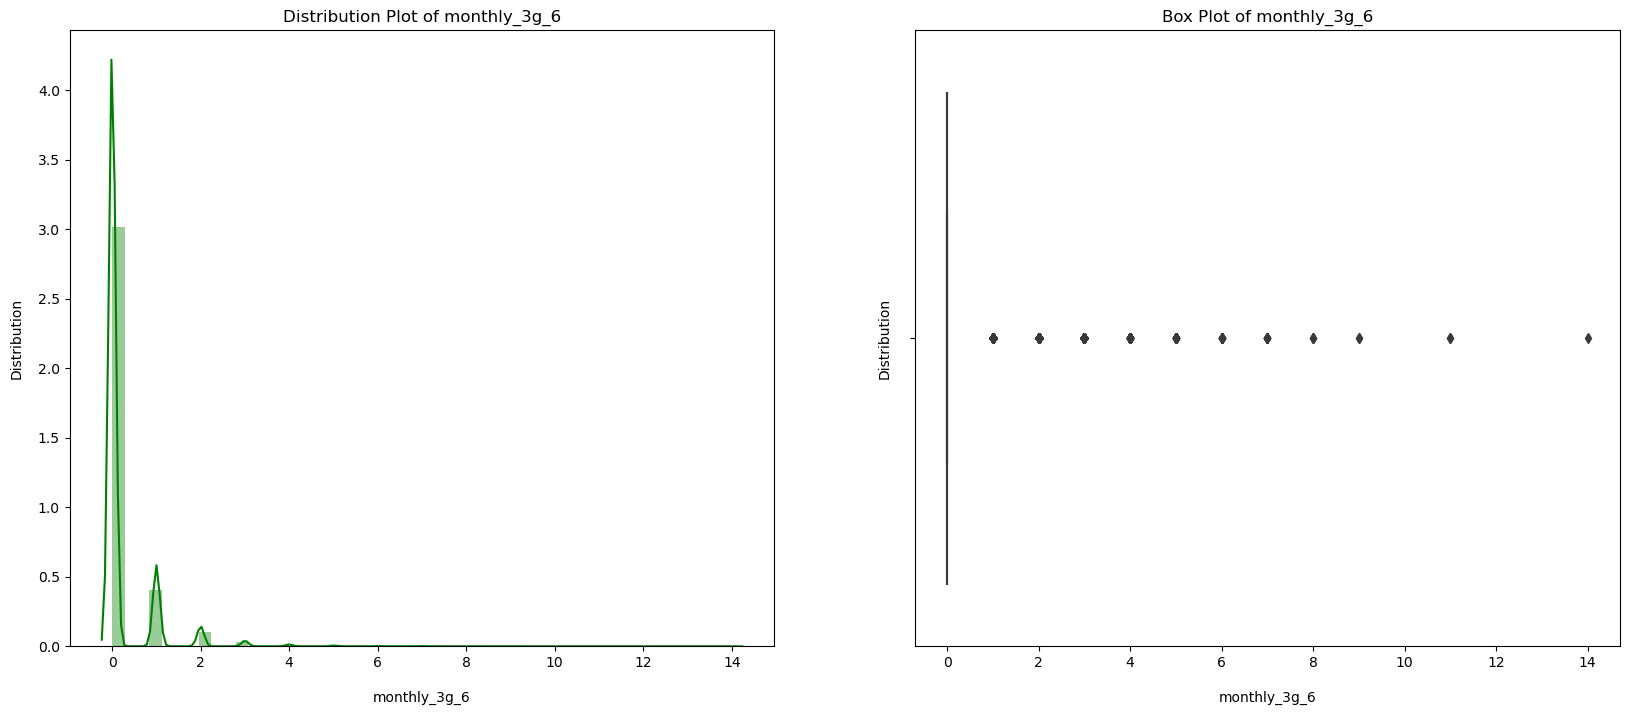

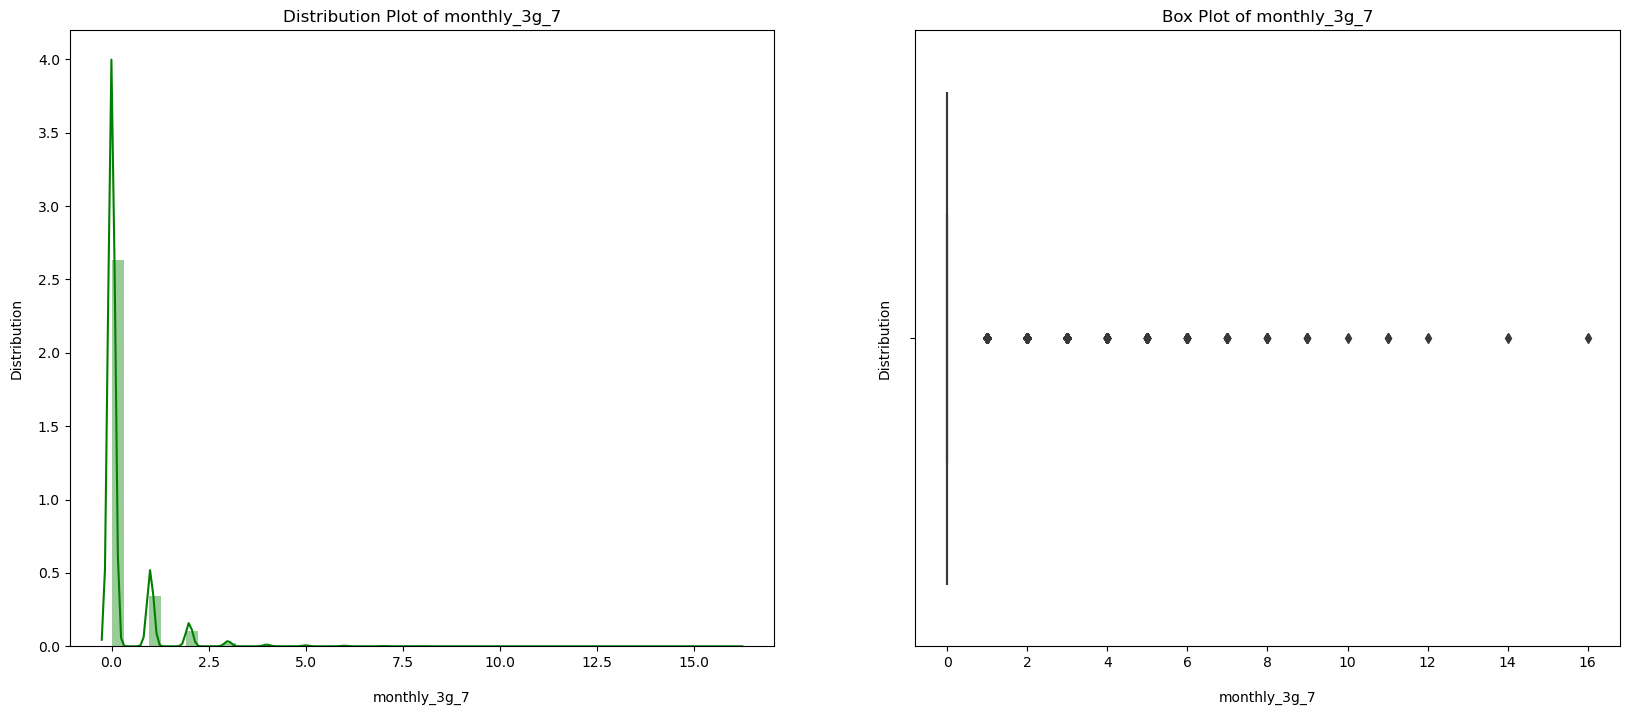

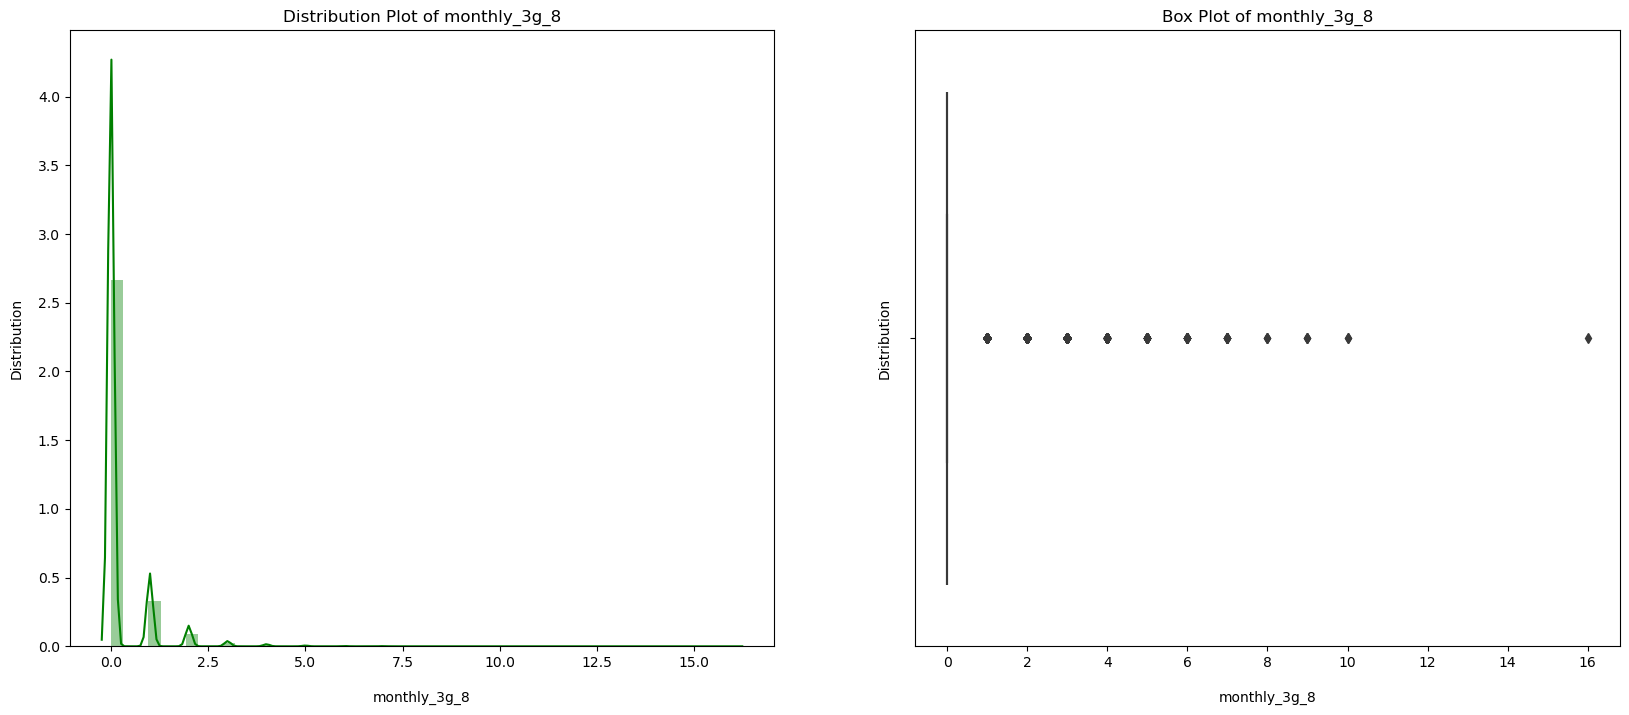

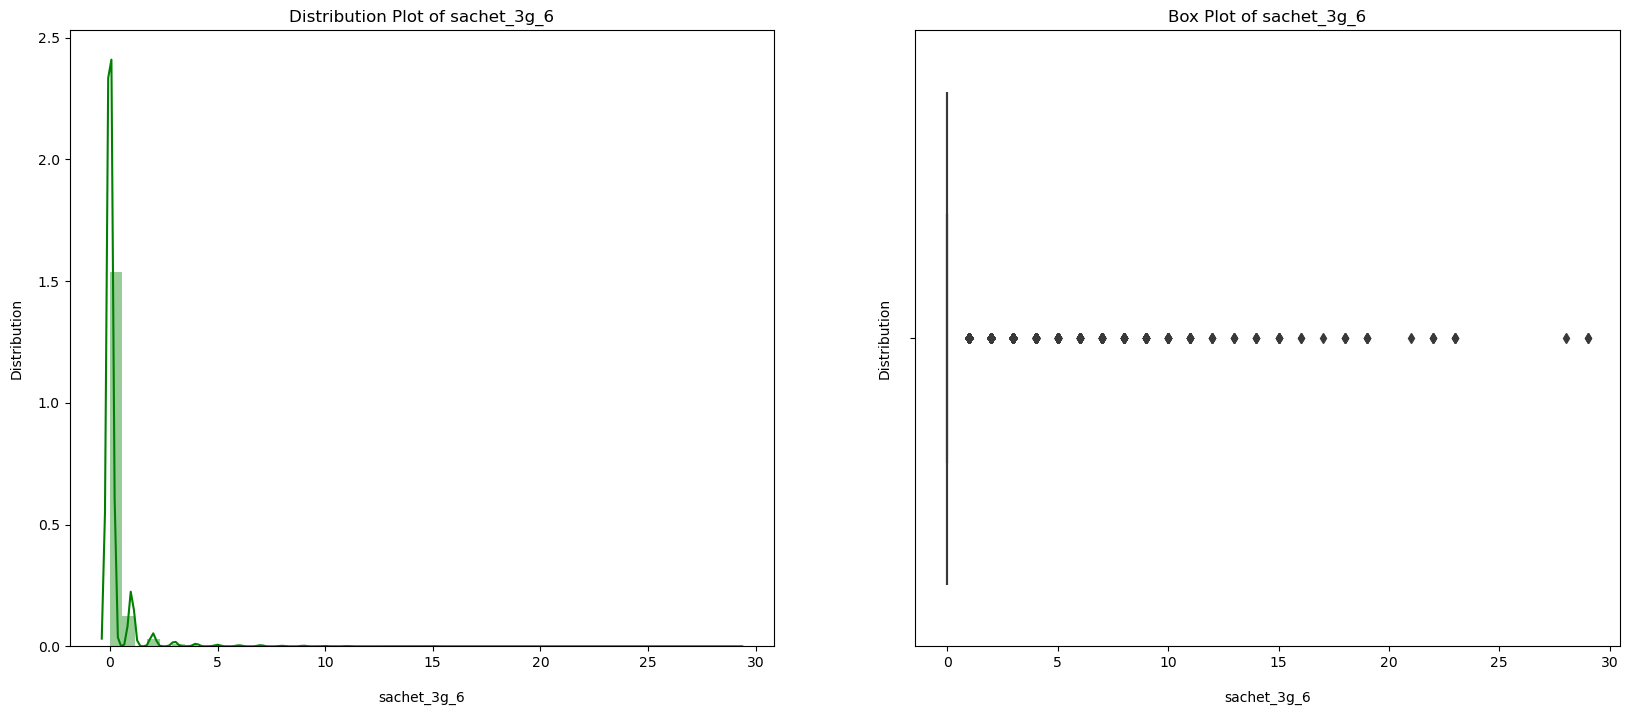

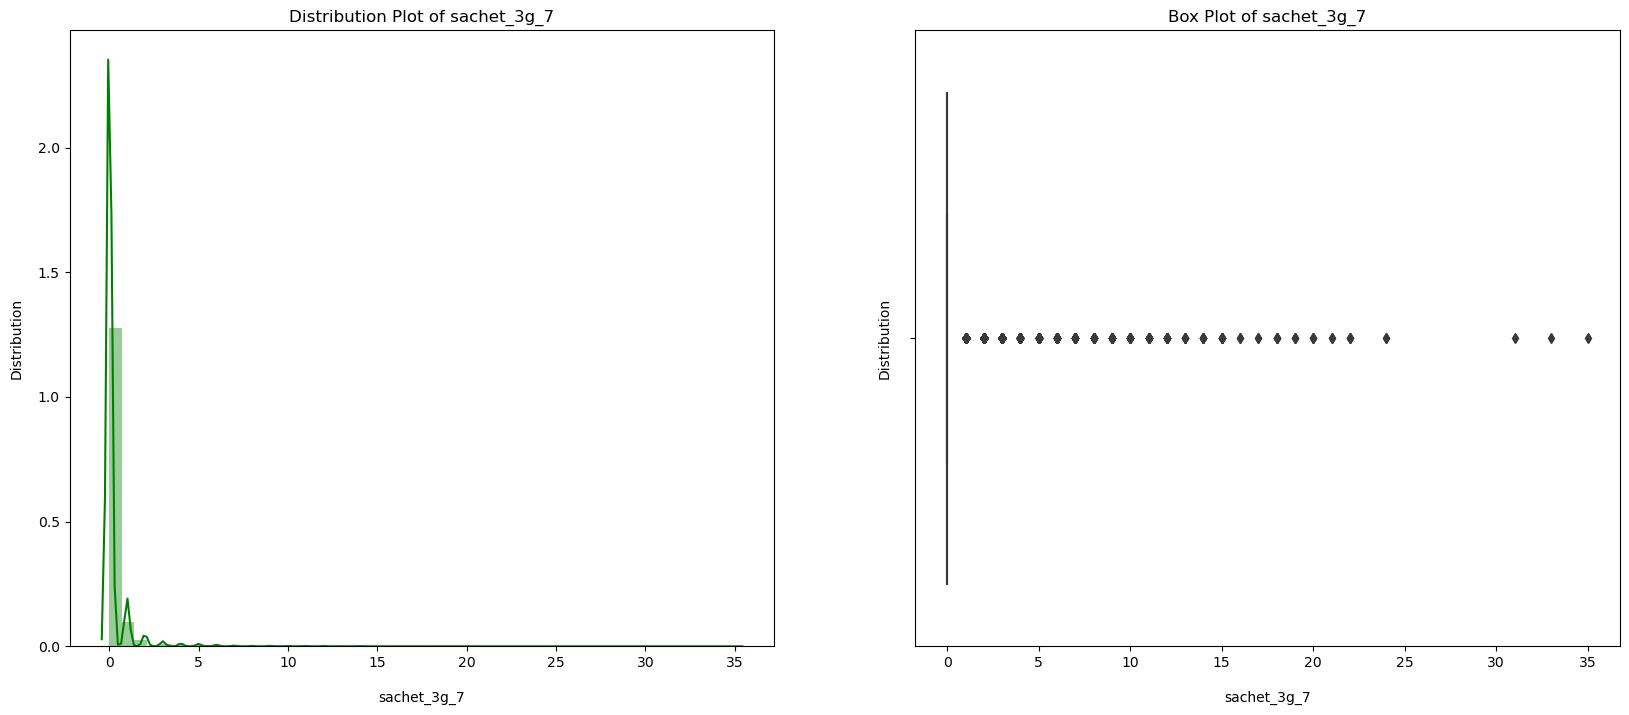

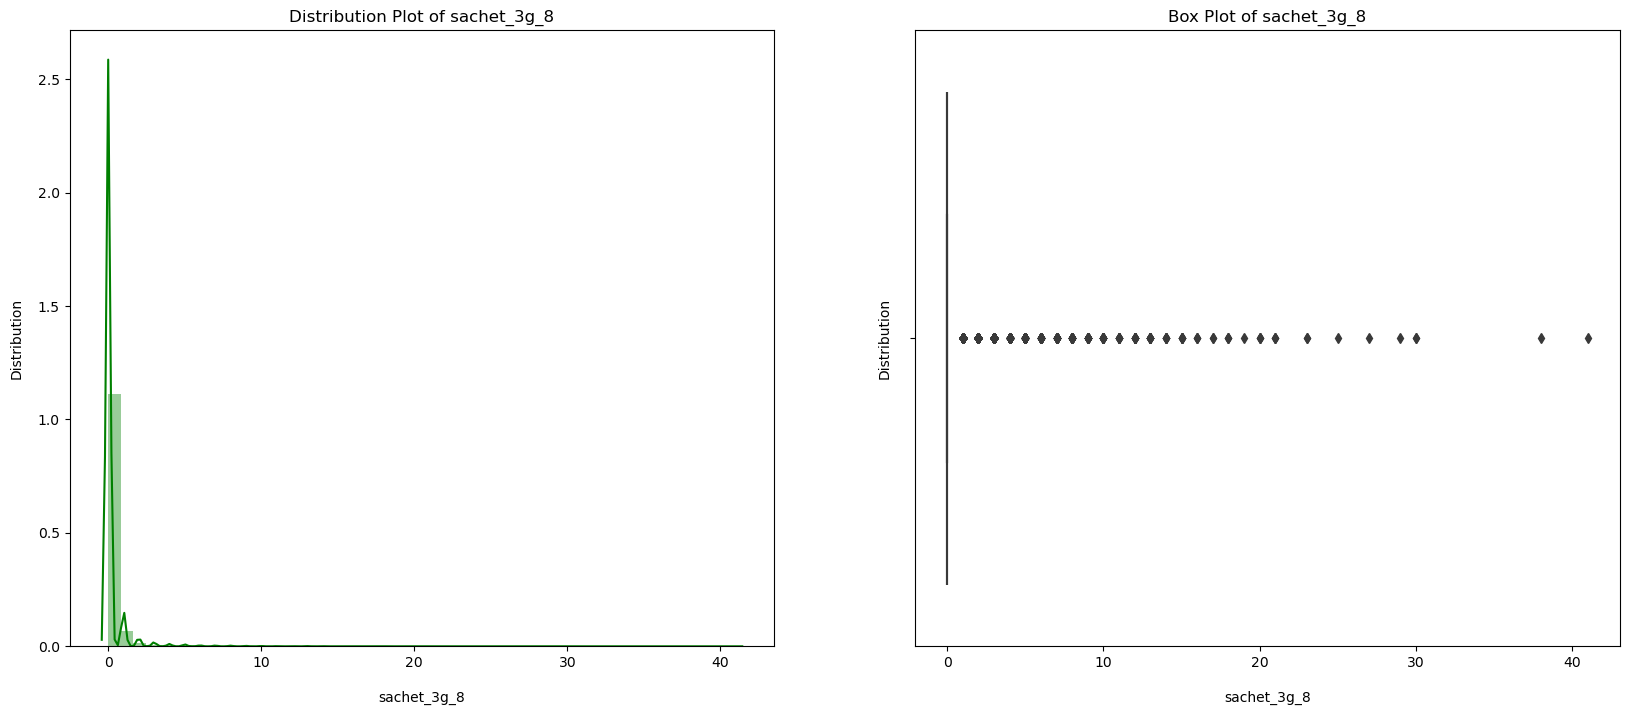

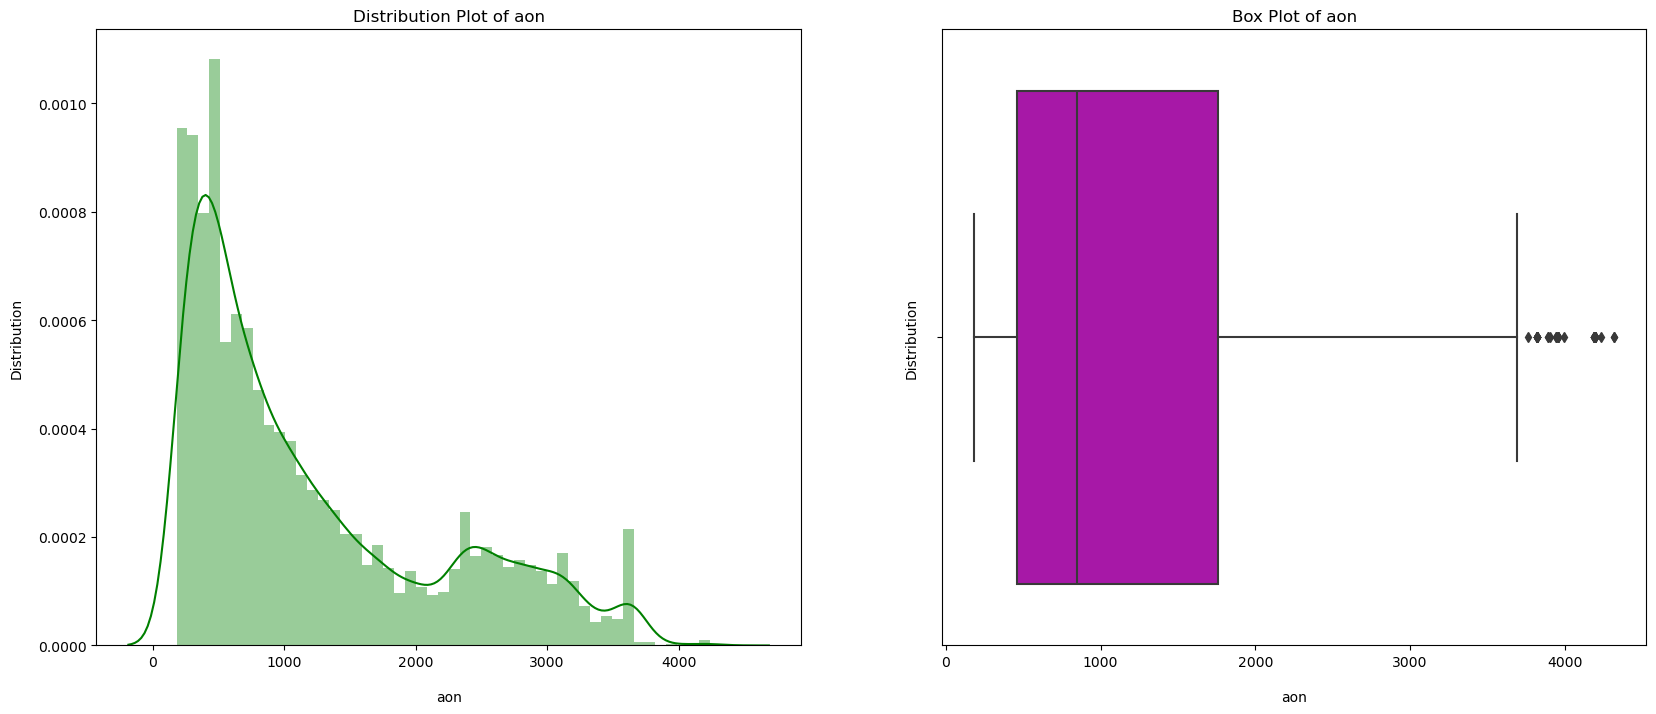

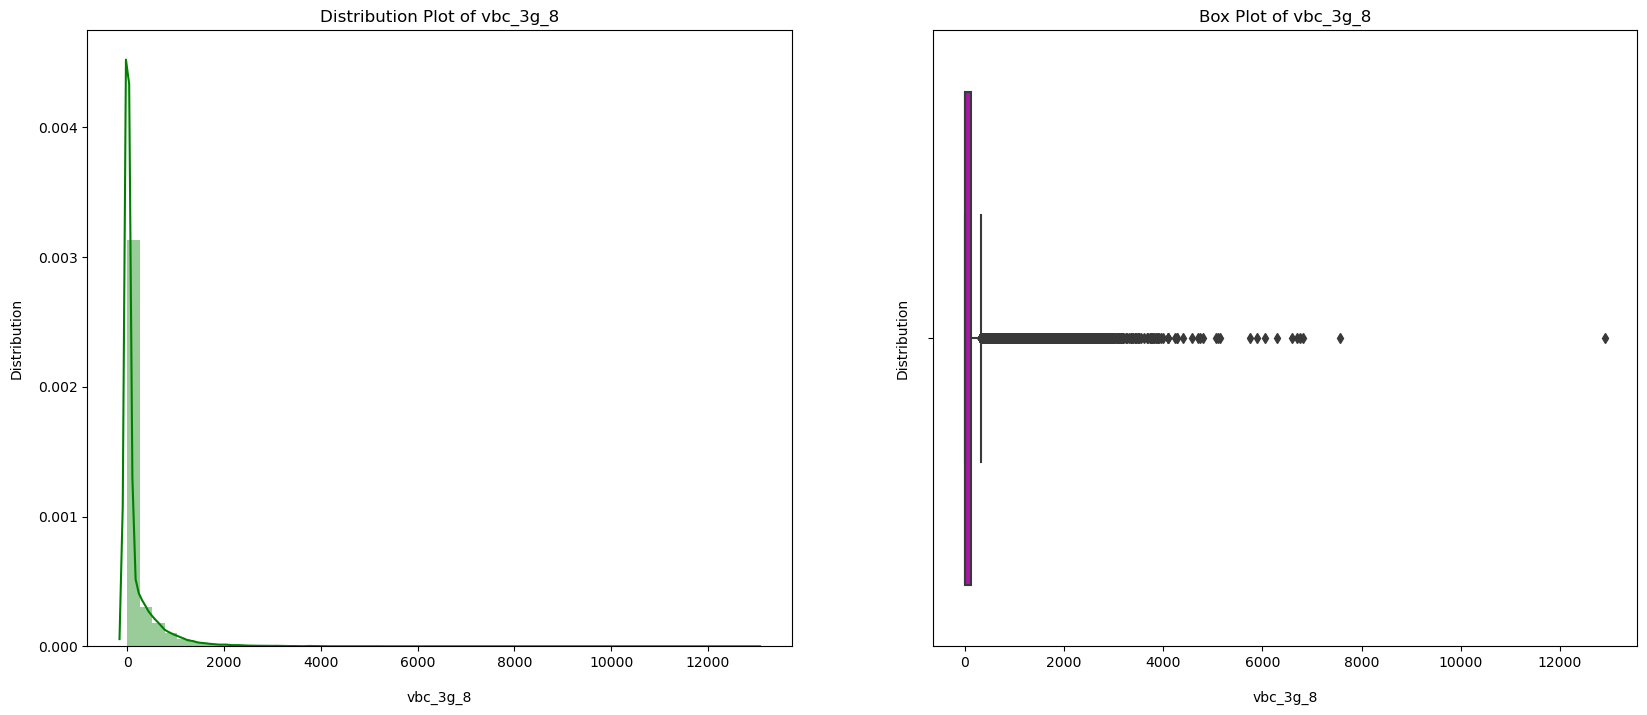

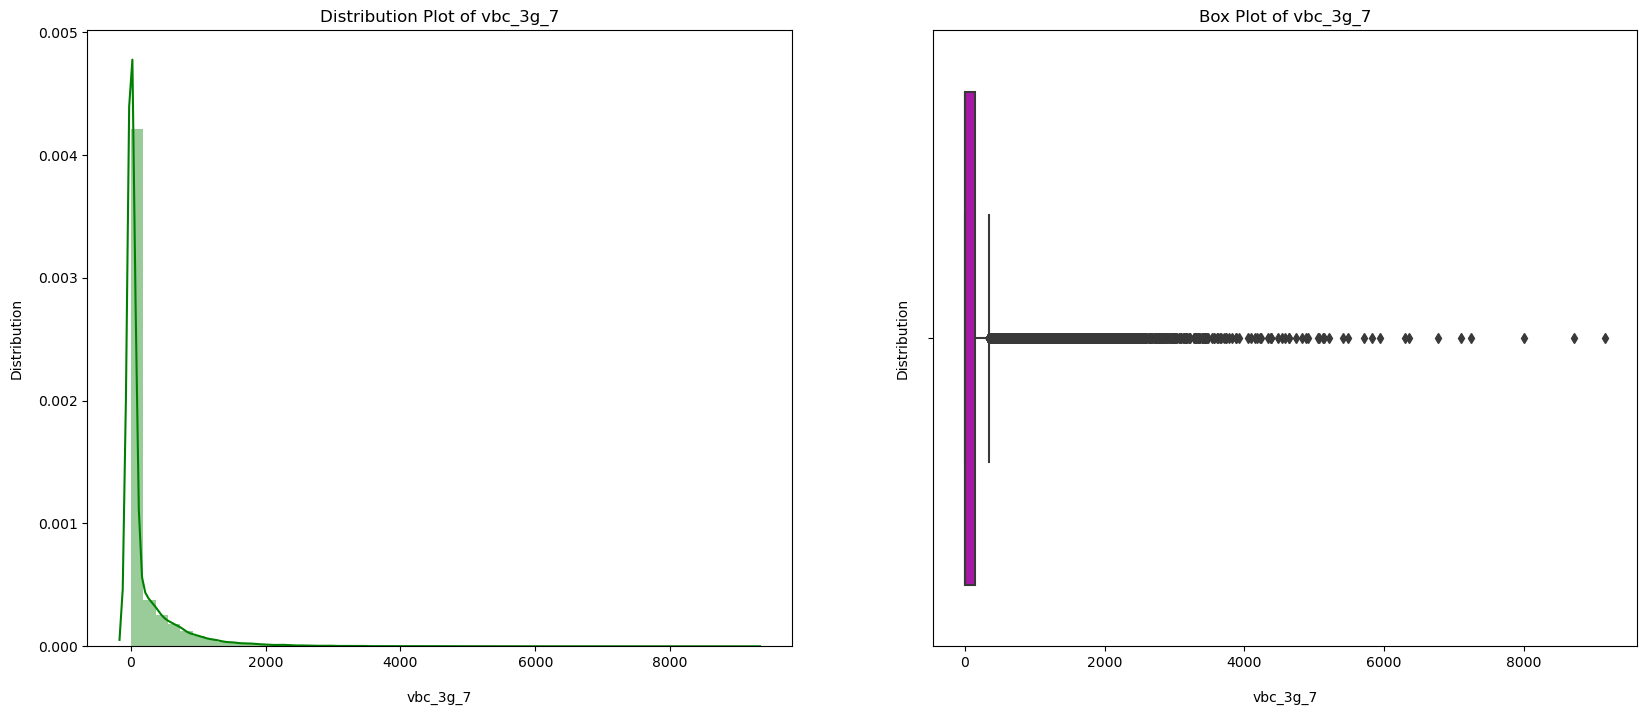

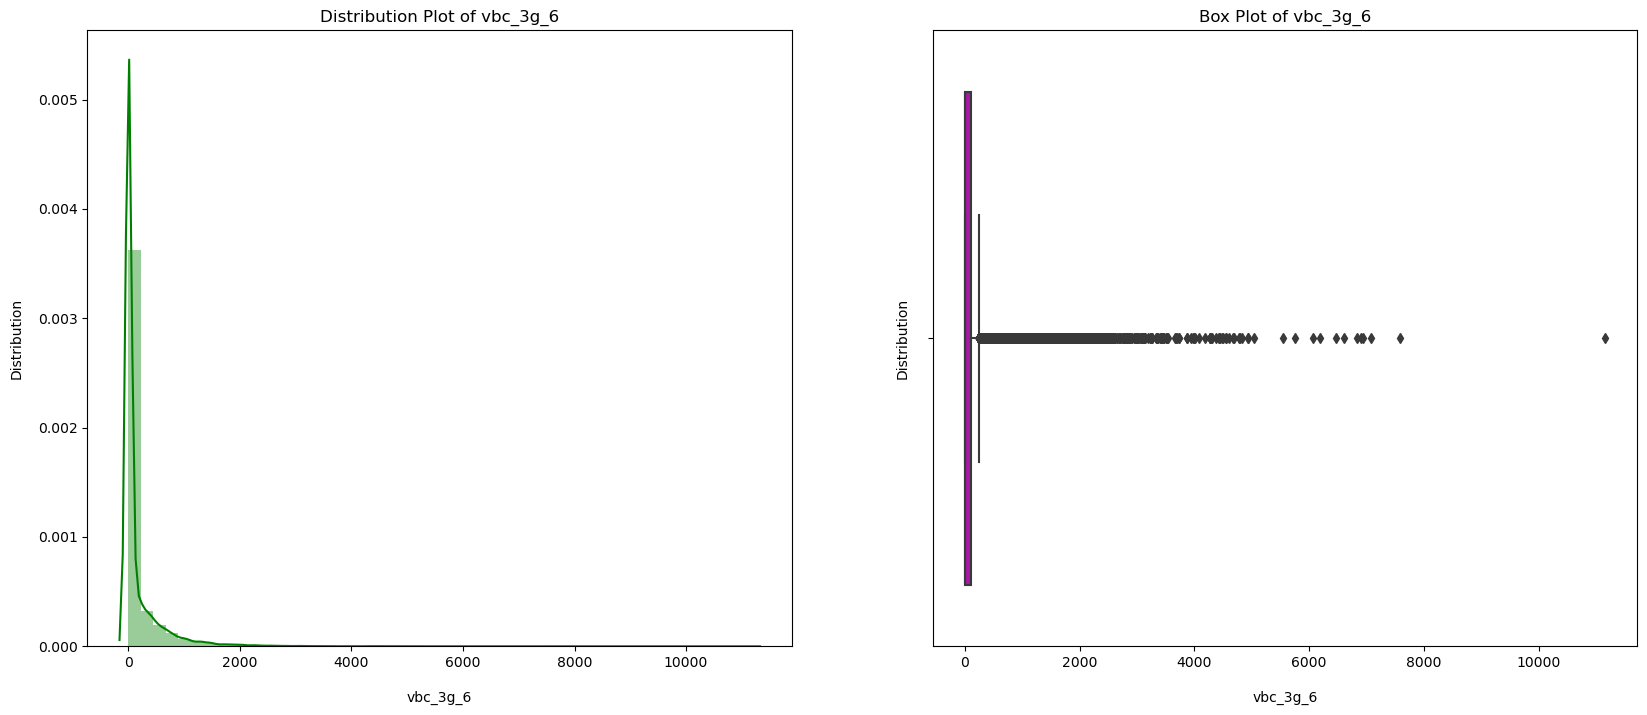

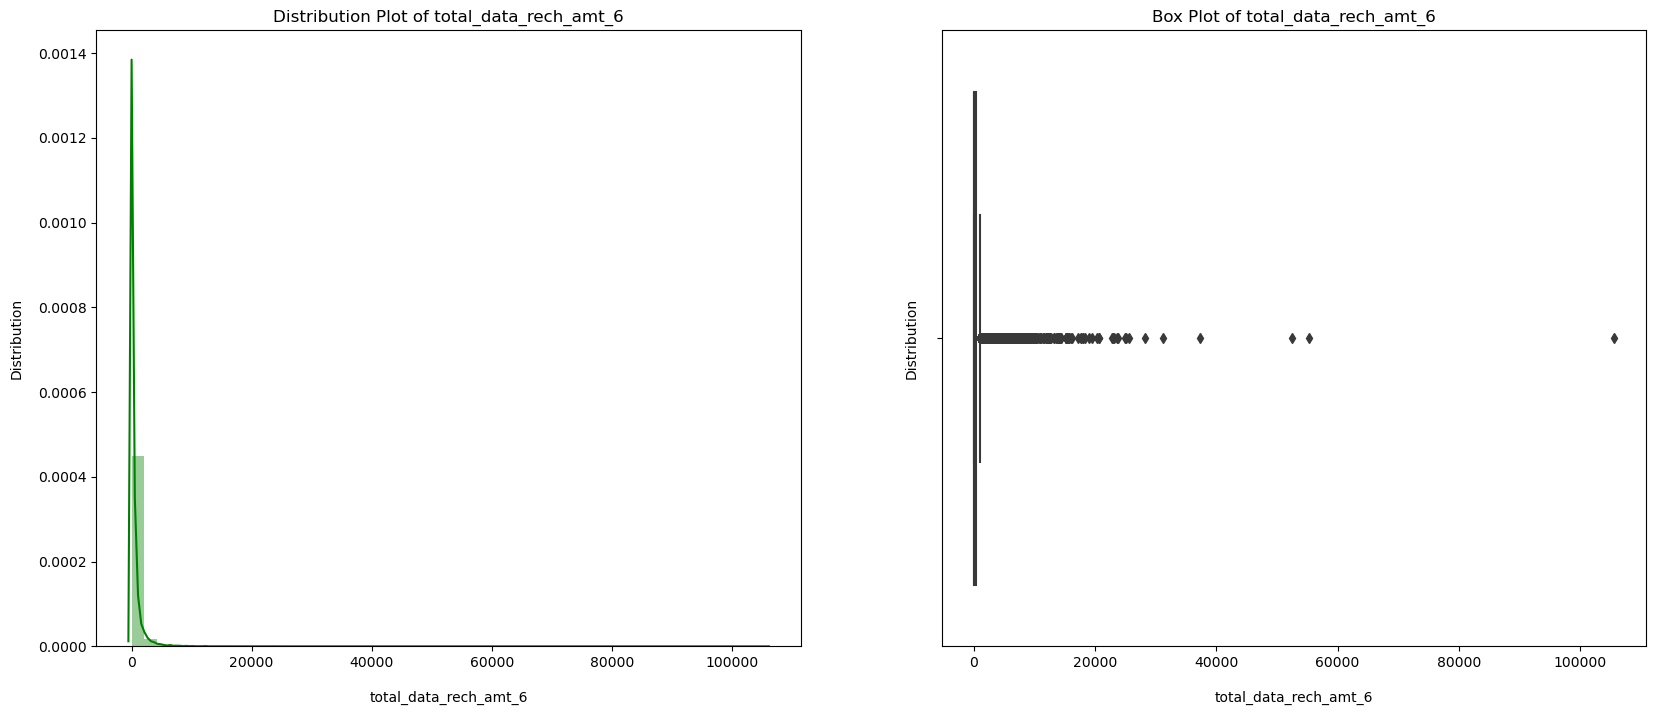

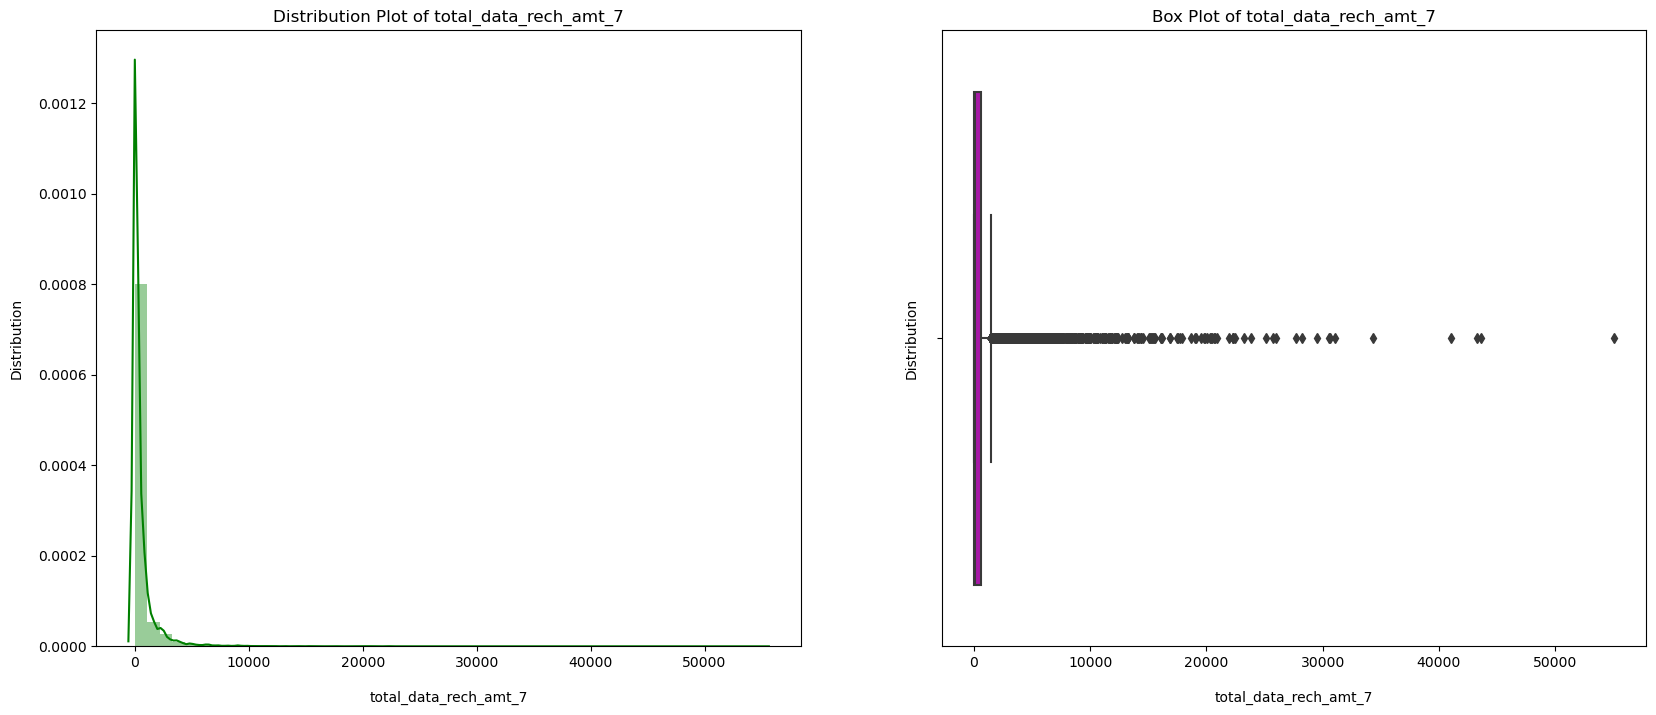

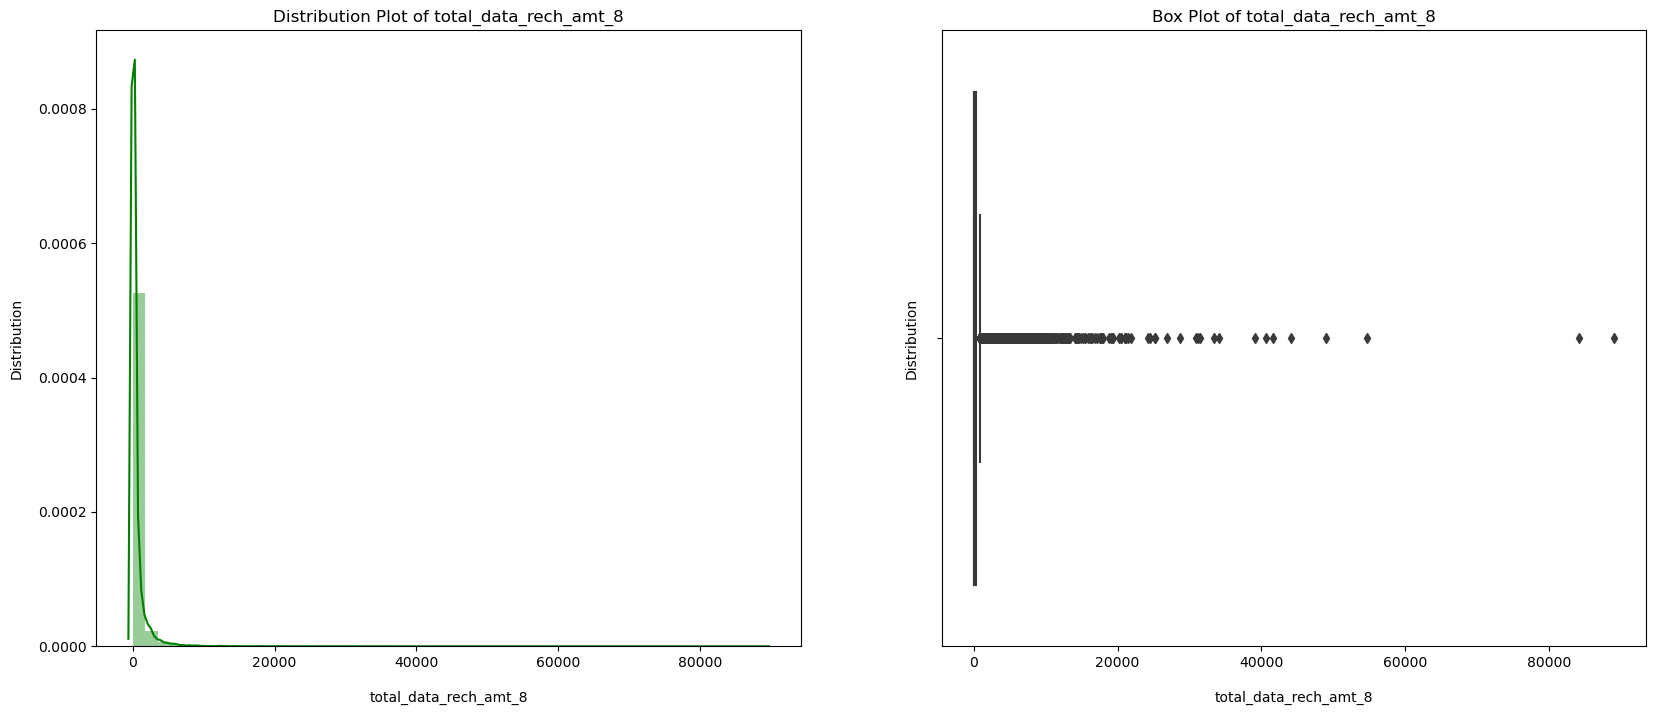

In [66]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
                 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']
counter = 1

for col_list in telecom_data.columns:
    
    if col_list not in category_list:
        
        
        plot_univariate(figsize_x = 20,
                        figsize_y = 8,
                        subplot_x = 1,
                        subplot_y = 2,
                        xlabel = col_list,
                        ylabel = "Distribution",
                        x_axis = col_list,
                        data = telecom_data,
                        wspace = 0.2)

        counter += 1

## <font color = "purple"> Insights: </font>

The graph shows us that we have lot of **Outliers** which might give us the wrong analysis about the churn customers.
That is why we need to **Remove** these outliers in the later section.

## Bivariate Analysis

In [67]:
def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\n Data Visualization of The Churn VS " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)

    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom_data, showfliers = False)
    set_plotting_variable(title_1, xlabel, y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)

    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom_data, showfliers = False)
    set_plotting_variable(title_2, xlabel, y_axis + "_7")
    
    # Subplot - 3
    plt.subplot(1, 3, 3)

    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = telecom_data, showfliers = False)
    set_plotting_variable(title_3, xlabel, y_axis + "_8")
    
    plt.subplots_adjust(wspace = 0.4)
    plt.show()

In [68]:
telecom_data.head()


circle_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn
0        109   197.385   214.816   213.803         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00          0.00          0.00          0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0          0.00          0.0          0.0          0.0            0.00            0.00            0.00          0.00          0.00          5.44          0.00          0.00          0.00            0.00            0.00            5.44          0.00           0.0           0.0          0.00          0.00          0.00         0.00         0.00         0.00                 4                 3                 2               362               252               252             252             252             252                1.0                1.0                1.0            252.0            252.0            252.0                0                0                0                1                1                1        30.13         1.32         5.75        83.57       150.76       109.61                 0                 0                 0             0             0             0            0            0            0             1             1             1            0            0            0          1          1          1  968     30.40      0.00    101.20                  252.0                  252.0                  252.0      1
1        109  1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06        422.16        533.91        255.79         60.86         75.14         77.84           0.0          0.18         10.01           4.5           0.0          6.50          0.0          0.0          0.0          487.53          609.24          350.16        427.88        355.23        188.04        180.54        173.08        193.94          626.46          558.04          428.74          0.21           0.0           0.0          2.06         14.53         31.59        15.74        15.19        15.14                 5                 5                 7              1580               790              3638            1580             790            1580                0.0                0.0                0.0           


 Data Visualization of The Churn VS arpu


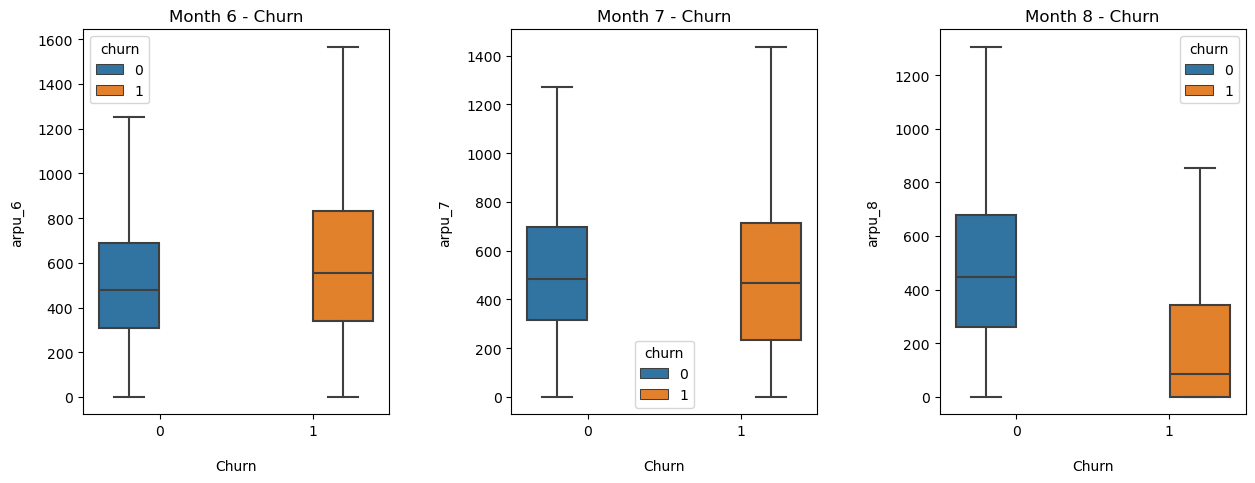


 Data Visualization of The Churn VS onnet_mou


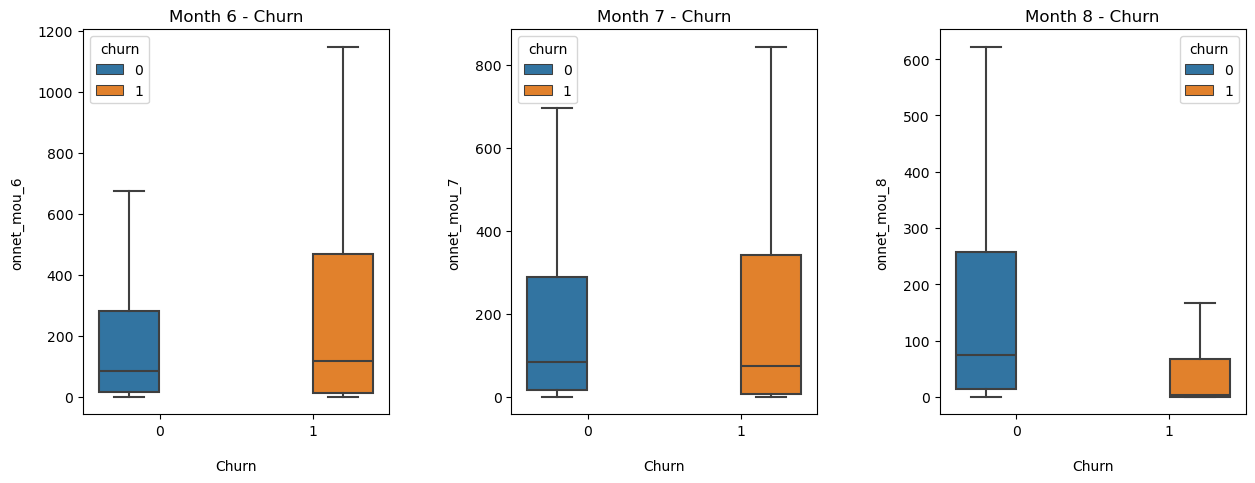


 Data Visualization of The Churn VS offnet_mou


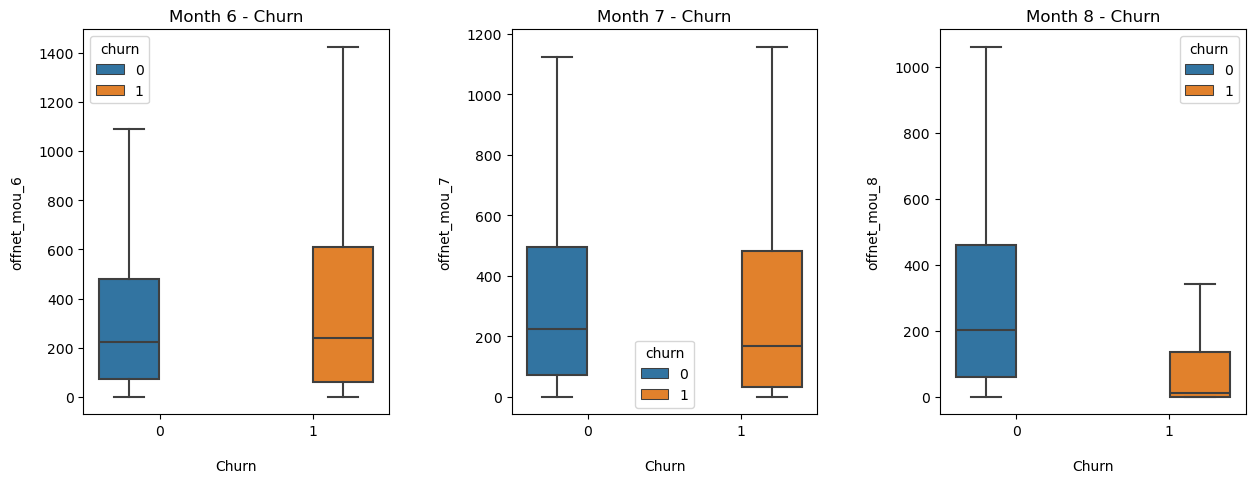


 Data Visualization of The Churn VS total_og_mou


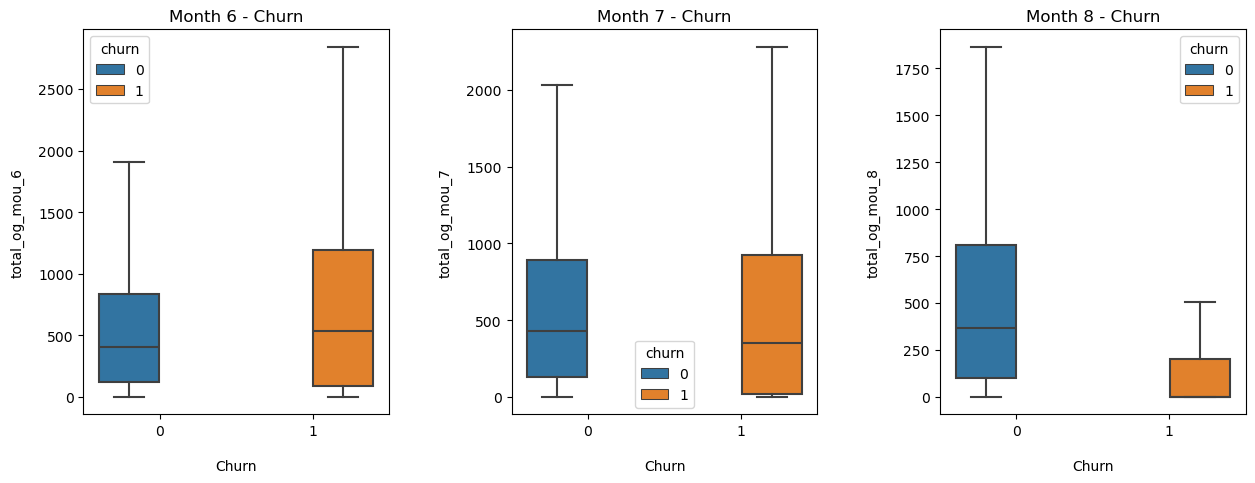


 Data Visualization of The Churn VS total_ic_mou


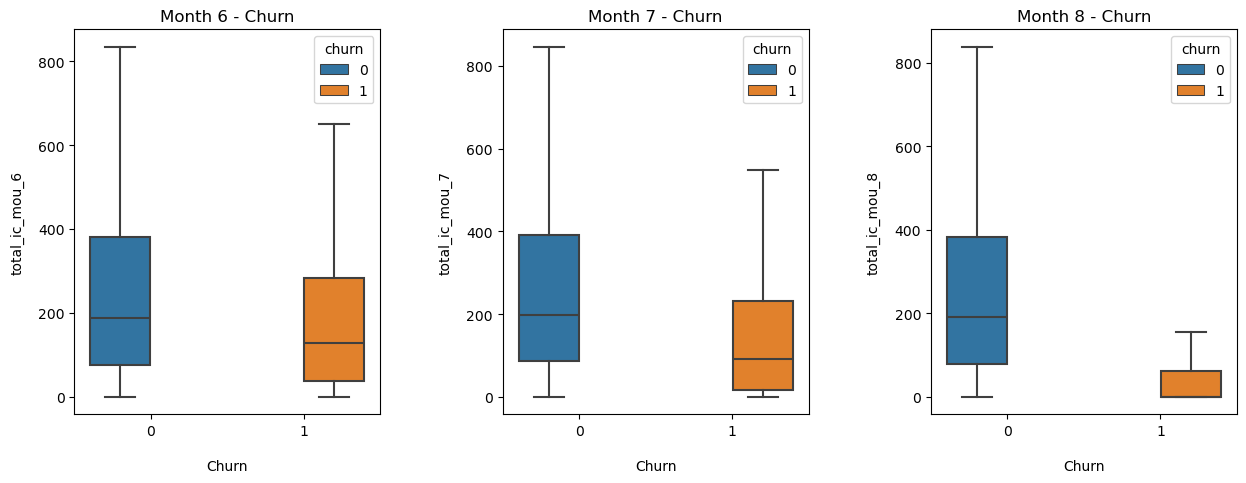


 Data Visualization of The Churn VS total_rech_num


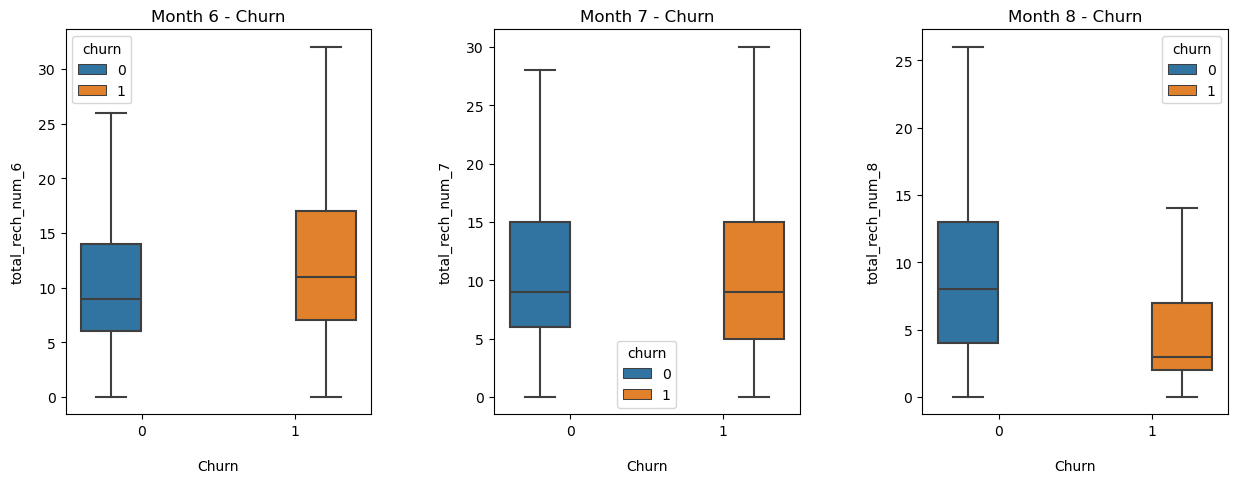


 Data Visualization of The Churn VS total_rech_amt


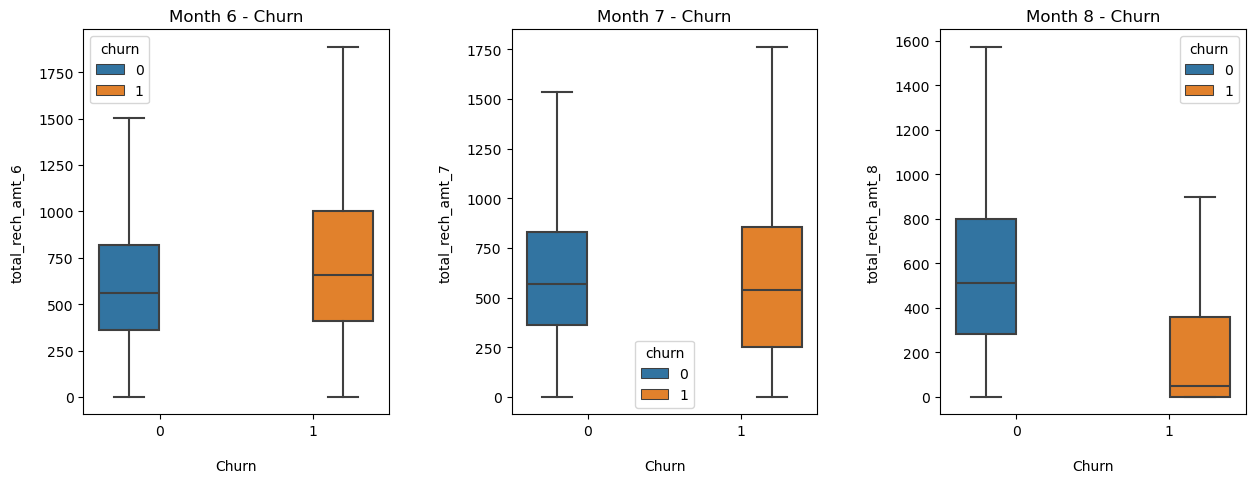


 Data Visualization of The Churn VS total_rech_data


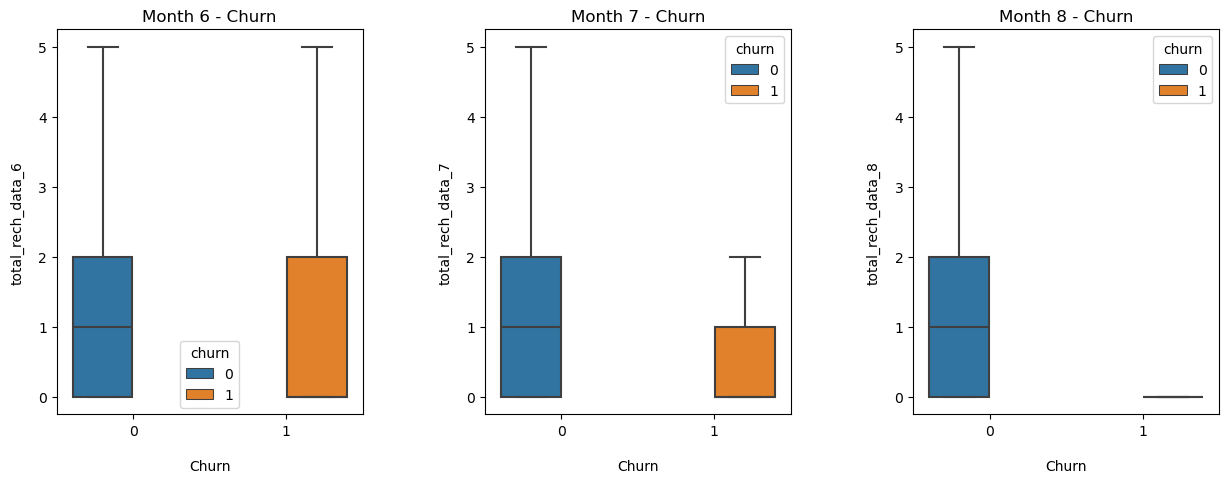


 Data Visualization of The Churn VS vol_2g_mb


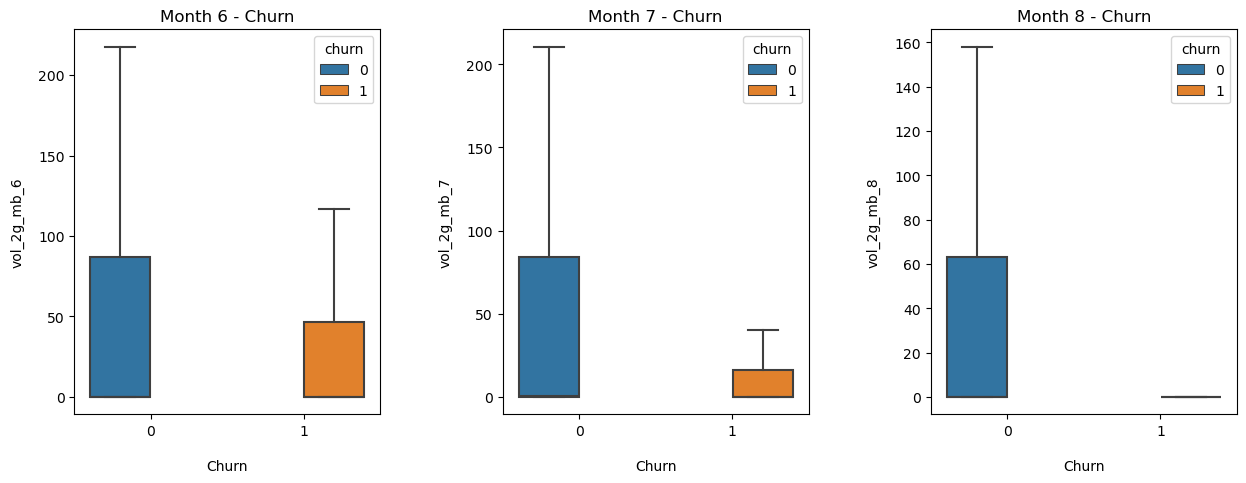


 Data Visualization of The Churn VS vol_3g_mb


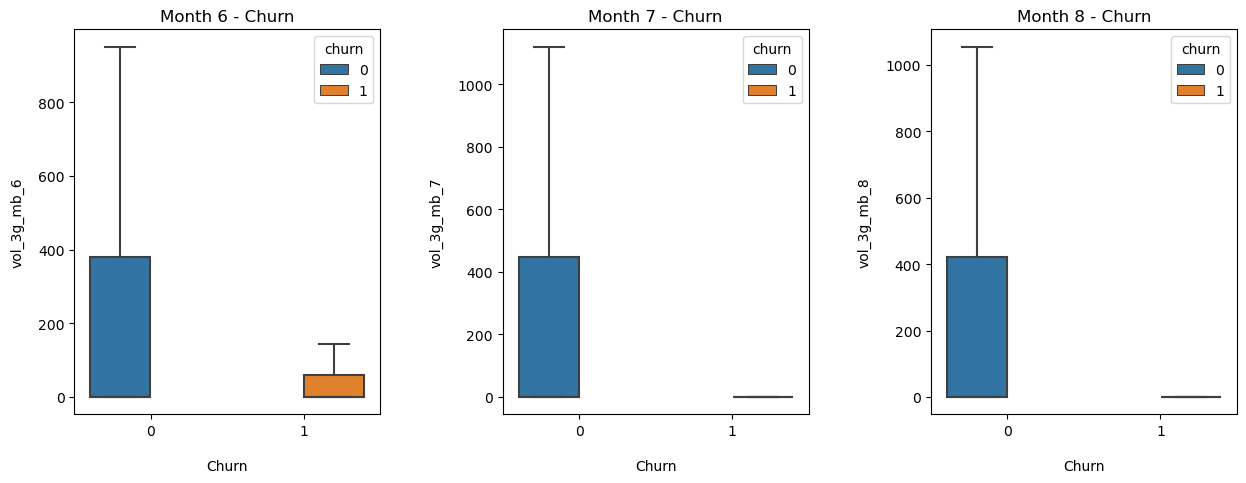


 Data Visualization of The Churn VS vbc_3g


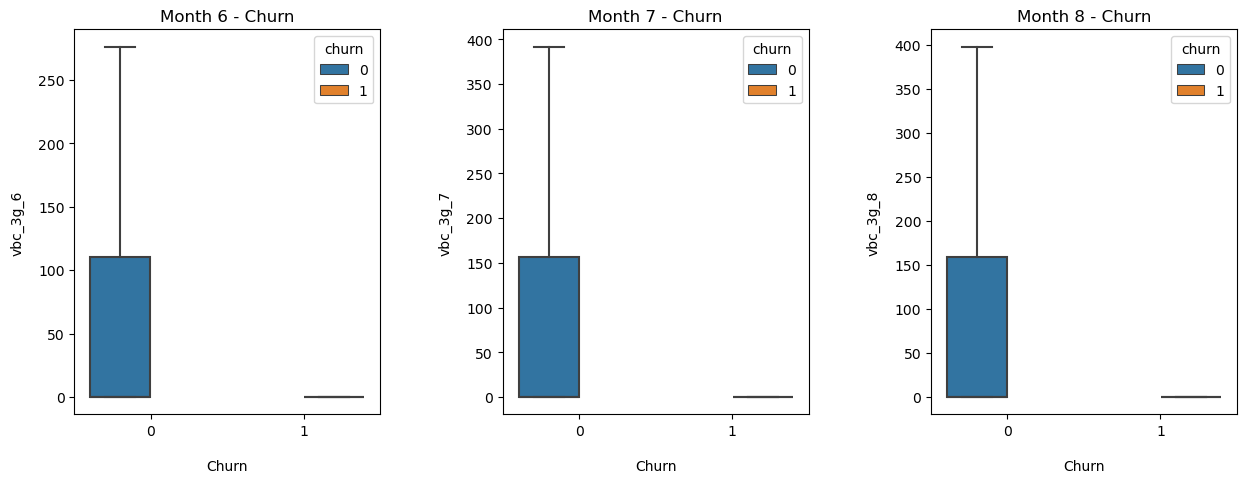


 Data Visualization of The Churn VS total_data_rech_amt


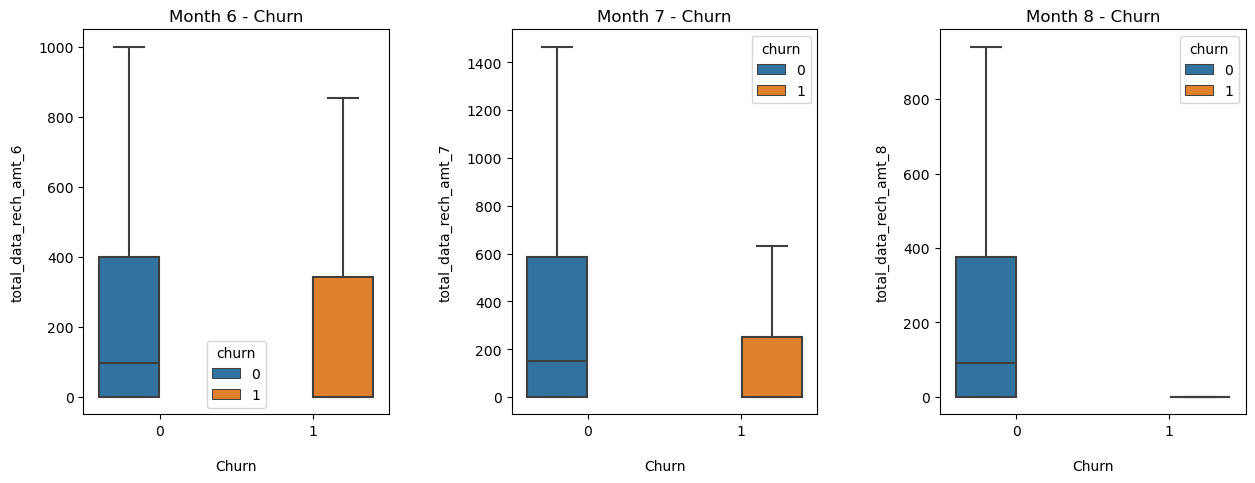

In [69]:
plot_bivariate("arpu")

plot_bivariate("onnet_mou")

plot_bivariate("offnet_mou")

plot_bivariate("total_og_mou")

plot_bivariate("total_ic_mou")

plot_bivariate("total_rech_num")

plot_bivariate("total_rech_amt")

plot_bivariate("total_rech_data")

plot_bivariate("vol_2g_mb")

plot_bivariate("vol_3g_mb")

plot_bivariate("vbc_3g")

plot_bivariate("total_data_rech_amt")

AS we mentioned above there is drop in Customers in month 8 which might idicates us that number customers chrun in 8th is more then other months 

In [70]:
telecom_data.corr()

circle_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8       aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8     churn
circle_id                    NaN       NaN       NaN       NaN          NaN          NaN          NaN           NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN          NaN          NaN          NaN             NaN             NaN             NaN           NaN           NaN           NaN           NaN           NaN           NaN             NaN             NaN             NaN           NaN           NaN           NaN           NaN           NaN           NaN          NaN          NaN          NaN               NaN               NaN               NaN               NaN               NaN               NaN             NaN             NaN             NaN                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN          NaN          NaN          NaN          NaN          NaN          NaN               NaN               NaN               NaN           NaN           NaN           NaN          NaN          NaN          NaN           NaN           NaN           NaN          NaN          NaN          NaN        NaN        NaN        NaN       NaN       NaN       NaN       NaN                    NaN                    NaN                    NaN       NaN
arpu_6                       NaN  1.000000  0.682003  0.619778     0.343885     0.218888     0.190011      0.515151      0.344861      0.293097       0.126446       0.084451       0.091188       0.193762       0.144104       0.125665      0.332272      0.250254      0.228189      0.389018      0.233674      0.187182      0.468214      0.423341      0.415527      0.122977      0.068927      0.045037     0.054344     0.024506     0.015547        0.560203        0.369345        0.309954      0.181510      0.142665      0.124397      0.124386      0.085947      0.079674        0.225125        0.169390        0.151226      0.030974     -0.034140     -0.011639      0.101627      0.063595      0.071179     0.016058     0.023974     0.012889          0.349319          0.136645          0.120199          0.955028          0.656232          0.611837        0.359418        0.270988        0.294987          -0

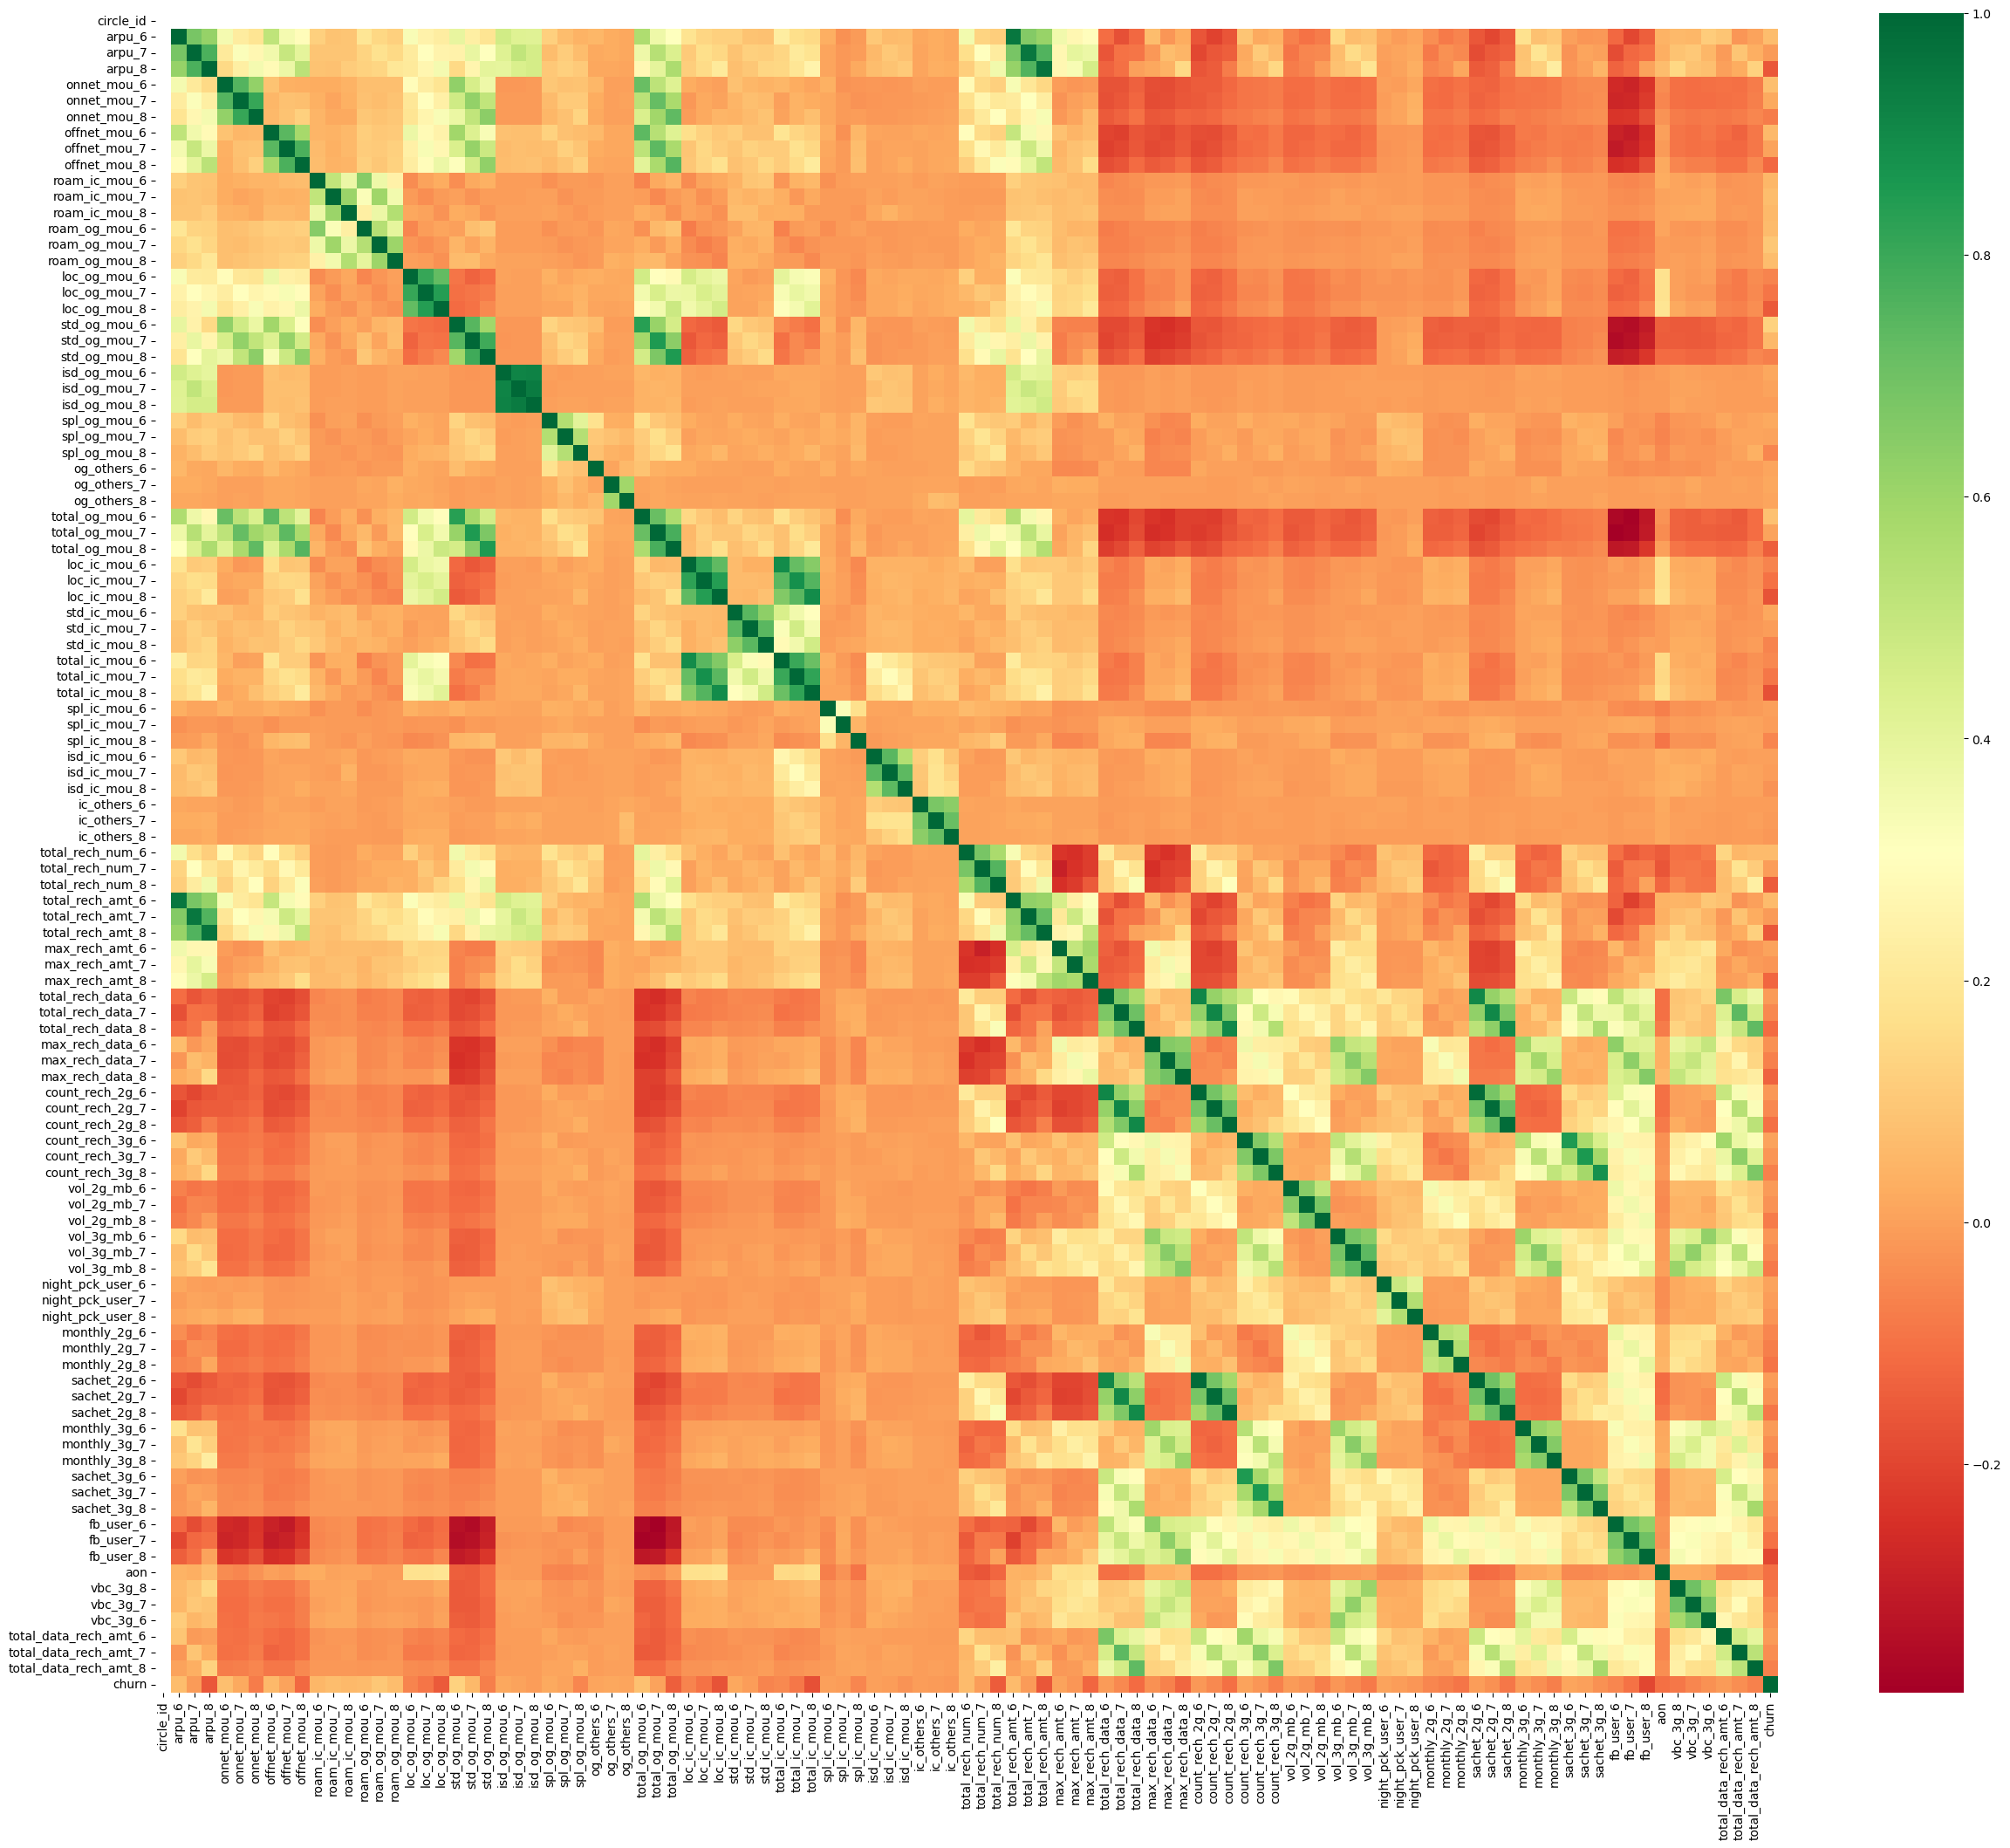

In [71]:
plt.figure(figsize = (30, 25))

sns.heatmap(telecom_data.corr(), cmap = "RdYlGn")

plt.show()

From the above Heatmap we can find **highly correlated features** from the data and we can use this features by extracting them.

In [73]:
corr_matrix = telecom_data.corr().abs()

upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


Total features with high correlation -  25


So there are **25 highly correalted features** present and the correaltion is above 80%.


## <font color = "Green"> Feature Engineering</font>

In [74]:
def derive_good_action_phase(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8] - df[good_phase_col]
    
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df

In [75]:
telecom_data = derive_good_action_phase(telecom_data, "arpu")

telecom_data = derive_good_action_phase(telecom_data, "onnet_mou")

telecom_data = derive_good_action_phase(telecom_data, "offnet_mou")

telecom_data = derive_good_action_phase(telecom_data, "roam_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "roam_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "loc_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "std_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "isd_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "spl_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "og_others")

telecom_data = derive_good_action_phase(telecom_data, "total_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "loc_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "std_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "spl_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "isd_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "ic_others")

telecom_data = derive_good_action_phase(telecom_data, "total_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "total_rech_num")

telecom_data = derive_good_action_phase(telecom_data, "total_rech_amt")

telecom_data = derive_good_action_phase(telecom_data, "max_rech_amt")

telecom_data = derive_good_action_phase(telecom_data, "total_rech_data")

telecom_data = derive_good_action_phase(telecom_data, "max_rech_data")

telecom_data = derive_good_action_phase(telecom_data, "count_rech_2g")

telecom_data = derive_good_action_phase(telecom_data, "count_rech_3g")

telecom_data = derive_good_action_phase(telecom_data, "vol_2g_mb")

telecom_data = derive_good_action_phase(telecom_data, "vol_3g_mb")

telecom_data = derive_good_action_phase(telecom_data, "monthly_2g")

telecom_data = derive_good_action_phase(telecom_data, "sachet_2g")

telecom_data = derive_good_action_phase(telecom_data, "monthly_3g")

telecom_data = derive_good_action_phase(telecom_data, "sachet_3g")

telecom_data = derive_good_action_phase(telecom_data, "vbc_3g")

telecom_data = derive_good_action_phase(telecom_data, "total_data_rech_amt")

These are all Good and Action Phase variables.

In [76]:
telecom_data.head()

circle_id  night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  fb_user_8  aon  churn  arpu_good_phase  arpu_action_phase  onnet_mou_good_phase  onnet_mou_action_phase  offnet_mou_good_phase  offnet_mou_action_phase  roam_ic_mou_good_phase  roam_ic_mou_action_phase  roam_og_mou_good_phase  roam_og_mou_action_phase  loc_og_mou_good_phase  loc_og_mou_action_phase  std_og_mou_good_phase  std_og_mou_action_phase  isd_og_mou_good_phase  isd_og_mou_action_phase  spl_og_mou_good_phase  spl_og_mou_action_phase  og_others_good_phase  og_others_action_phase  total_og_mou_good_phase  total_og_mou_action_phase  loc_ic_mou_good_phase  loc_ic_mou_action_phase  std_ic_mou_good_phase  std_ic_mou_action_phase  spl_ic_mou_good_phase  spl_ic_mou_action_phase  isd_ic_mou_good_phase  isd_ic_mou_action_phase  ic_others_good_phase  ic_others_action_phase  total_ic_mou_good_phase  total_ic_mou_action_phase  total_rech_num_good_phase  total_rech_num_action_phase  total_rech_amt_good_phase  total_rech_amt_action_phase  max_rech_amt_good_phase  max_rech_amt_action_phase  total_rech_data_good_phase  total_rech_data_action_phase  max_rech_data_good_phase  max_rech_data_action_phase  count_rech_2g_good_phase  count_rech_2g_action_phase  count_rech_3g_good_phase  count_rech_3g_action_phase  vol_2g_mb_good_phase  vol_2g_mb_action_phase  vol_3g_mb_good_phase  vol_3g_mb_action_phase  monthly_2g_good_phase  monthly_2g_action_phase  sachet_2g_good_phase  sachet_2g_action_phase  monthly_3g_good_phase  monthly_3g_action_phase  sachet_3g_good_phase  sachet_3g_action_phase  vbc_3g_good_phase  vbc_3g_action_phase  total_data_rech_amt_good_phase  total_data_rech_amt_action_phase
0        109                 0                 0                 0          1          1          1  968      1         206.1005             7.7025                  0.00                    0.00                  0.000                    0.000                    0.00                      0.00                   0.000                     0.000                  0.000                    0.000                  0.000                    0.000                  0.000                    0.000                   0.00                     0.00                   0.0                     0.0                    0.000                      0.000                  0.000                    5.440                  0.000                    0.000                  0.000                    0.000                  0.000                    0.000                 0.000                   0.000                    0.000                      5.440                        3.5                         -1.5                      307.0                        -55.0                    252.0                        0.0                         1.0                           0.0                     252.0                         0.0                       0.0                         0.0                       1.0                         0.0                15.725                  -9.975               117.165                  -7.555                    0.0                      0.0                   0.0                     0.0                    1.0                      0.0                   0.0                     0.0             50.600              -20.200                           252.0                               0.0
1        109                 0                 0                 0          0          0          0  802      1        1209.5150          1961.9650                 56.26                   -3.97                510.295                 -184.385                   24.86                      6.78                  18.165                    19.895                478.035                 -222.245                 68.000                    9.840                  0.090                    9.920                   2.25                     4.25                   0.0                     0.0                  548.385               

## <font color = "Green"> Model Building</font>

Let's divide Train and test data into 70-30 percentage for model buliding.

In [77]:
X = telecom_data.drop('churn', axis = 1)
y = telecom_data[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20876, 72)
(20876, 1)
(8948, 72)
(8948, 1)


This divides the train data and test data.

**Train Data - 20876**

**Test Data - 8948**

In [78]:
scaler = RobustScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

NOW we are going to handle the imbalanced data which was shown in graphs.

In [79]:
def implement_smoteenn(X_train, y_train):
    
    sampling = SMOTEENN(random_state = 100)
    X_train_resampled, y_train_resampled = sampling.fit_resample(X_train.values, y_train.values.ravel())

    perms = np.random.permutation(X_train_resampled.shape[0])
    
    X_train_resampled = X_train_resampled[perms]
    y_train_resampled = y_train_resampled[perms]

    X_train_resampled = pd.DataFrame(data = X_train_resampled)
    y_train_resampled = pd.DataFrame(data = y_train_resampled)

    print(X_train_resampled.shape)
    print(y_train_resampled.shape)
    
    return X_train_resampled, y_train_resampled


In [80]:
def transform(transformer, X, y):
    
    print("Transforming {}".format(transformer.__class__.__name__))
    
    X_resampled, y_resampled = transformer.fit_resample(X.values, y.values.ravel())
    
    perms = np.random.permutation(X_resampled.shape[0])
    X_resampled = X_resampled[perms]
    y_resampled = y_resampled[perms]
    
    return transformer.__class__.__name__, pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)

In [81]:
def apply_transformations(dataset, X_train, y_train):
    
    dataset.append(("base", X_train, y_train))
    
    dataset.append(transform(SMOTE(n_jobs = -1, random_state = 100), X_train, y_train))
    
    dataset.append(transform(RandomOverSampler(random_state = 100), X_train, y_train))
    
    dataset.append(transform(NearMiss(n_jobs = -1), X_train, y_train))

    dataset.append(transform(RandomUnderSampler(random_state = 100), X_train, y_train))

    dataset.append(transform(SMOTEENN(random_state = 100), X_train, y_train))

    dataset.append(transform(SMOTETomek(random_state = 100), X_train, y_train))
    
    return dataset

We are using some custom def to get Plots graph or Train data or Test data.

In [82]:
def get_scores(scores, reg, X_test):
    
    fig, axes = plt.subplots(1, 2, figsize = (14, 6))

    pred_test = reg.predict(X_test.values)

    pred_test_probs = reg.predict_proba(X_test.values)[:, 1:]

    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
    p, r, t = precision_recall_curve(y_test.values.ravel(), pred_test_probs)

    model_f1_score = f1_score(y_test.values.ravel(), pred_test)
    model_precision_score = precision_score(y_test.values.ravel(), pred_test)
    model_recall_score = recall_score(y_test.values.ravel(), pred_test)
    model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)
    model_auc_roc = auc(fpr, tpr)
    model_auc_pr = auc(r, p)

    scores.append((model_f1_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   model_auc_pr,
                   confusion_matrix(y_test.values.ravel(), pred_test)))

    axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
    axes[1].plot(r, p, label = f"auc_pr = {model_auc_pr:.3f}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("AUC ROC curve")

    axes[1].legend(loc = "lower right")
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")

    plt.tight_layout()
    plt.show()
    
    return scores

In [83]:
def model(sampling_type, X, y, param_grid, model_type, ml = 'None'):
    
    model_type_list = ['Logistic', 'SVM', 'Decision Tree', 'Random Forest', 'Adaboost', 'XGBoost', 'LightGBM']
    
    if model_type == 'Logistic':
    
        ml = LogisticRegression(penalty = 'l2', C = 10, n_jobs = -1, random_state = 100) 
    
    elif model_type == 'Decision Tree':
        
        ml = DecisionTreeClassifier(max_depth = 7, min_samples_split = 26, min_samples_leaf = 46, random_state = 100)
    
    elif model_type == 'LightGBM':
        
        ml = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600,
                            min_child_samples = 20, subsample = 0.1, colsample_bytree = 1,
                            objective = 'binary', n_jobs = -1, random_state = 100)
    
    if model_type not in model_type_list:
        
        gc = GridSearchCV(estimator = ml, param_grid = param_grid, scoring = 'roc_auc',
                          n_jobs = 15, cv = 5, verbose = 2, return_train_score=True)
    
    else:
        
        gc = ml
    
    gc = gc.fit(X.values, y.values.ravel())
    
    if model_type in model_type_list:
        
        return sampling_type, gc
    
    else:
        
        return gc

In [84]:
def hypertuning_plot(scores, parameter):
    
    col = "param_" + parameter
    
    plt.figure()
    
    plt.plot(scores[col], scores["mean_train_score"], label = "training accuracy")
    plt.plot(scores[col], scores["mean_test_score"], label = "test accuracy")
    
    plt.xlabel(parameter)
    plt.ylabel("Accuracy")
    
    plt.legend()
    plt.show()

In [85]:
def evaluate_train(scores, benchmark_scores, dataset, X_test):
    
    fig, axes = plt.subplots(1, 2, figsize = (14, 6))

    for sampling_type, reg in benchmark_scores:

        print("Training on {}".format(sampling_type))

        for s_type, X, y in dataset:

            if s_type == sampling_type:

                pred_test = reg.predict(X_test.values)

                probs = reg.predict_proba(X_test.values)[:, 1:]

                fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
                p, r, t = precision_recall_curve(y_test.values.ravel(), probs)

                model_f1_score = f1_score(y_test.values.ravel(), pred_test)
                model_precision_score = precision_score(y_test.values.ravel(), pred_test)
                model_recall_score = recall_score(y_test.values.ravel(), pred_test)
                model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)
                model_auc_roc = auc(fpr, tpr)
                model_auc_pr = auc(r, p)

                scores.append((sampling_type,
                               model_f1_score,
                               model_precision_score,
                               model_recall_score,
                               model_accuracy_score,
                               model_auc_roc,
                               model_auc_pr,
                               confusion_matrix(y_test.values.ravel(), pred_test)))

                axes[0].plot(fpr, tpr, label = f"{s_type}, auc_roc = {model_auc_roc:.3f}")
                axes[1].plot(r, p, label = f"{s_type}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("AUC ROC curve")

    axes[1].legend()
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")

    plt.tight_layout()
    plt.show()
    
    return scores

In [86]:
def get_different_sampling_type_results(regression_type, X_test):
    

    benchmark_scores = []
    
    param_grid = {}

    for sample_type, X, y in dataset:

        print('Performing {}'.format(sample_type))

        benchmark_scores.append(model(sample_type, X, y, param_grid, regression_type))
    
    print(' ')

    scores = []

    scores = evaluate_train(scores, benchmark_scores, dataset, X_test)
    
    sampling_results = pd.DataFrame(scores, columns = ['Sampling Type', 'f1', 'precision', 'recall', 'accuracy',
                                                       'auc_roc', 'auc_pr', 'confusion_matrix'])
    
    return sampling_results

###  PCA - Dimensionality Reduction

We are using def to perform PCA.

In [87]:
def perform_PCA(X):
    
    pca = PCA(svd_solver = 'randomized', random_state = 100)

    
    pca.fit(X)
    
    
    fig = plt.figure(figsize = (12,8))

    plt.plot(np.cumsum(pca.explained_variance_ratio_))

    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

In [88]:
def perform_incremental_PCA(X_train, y_train, components):

    pca_final = IncrementalPCA(n_components = components)

    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)

    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print(X_train_pca.shape)
    print(y_train.shape)
    print(X_test_pca.shape)
    print(y_test.shape)

    corrmat = np.corrcoef(X_train_pca.transpose())

    plt.figure(figsize = (20,10))
    sns.heatmap(corrmat, annot = True)
    plt.show()

    corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
    print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
    
    return X_train_pca, X_test_pca

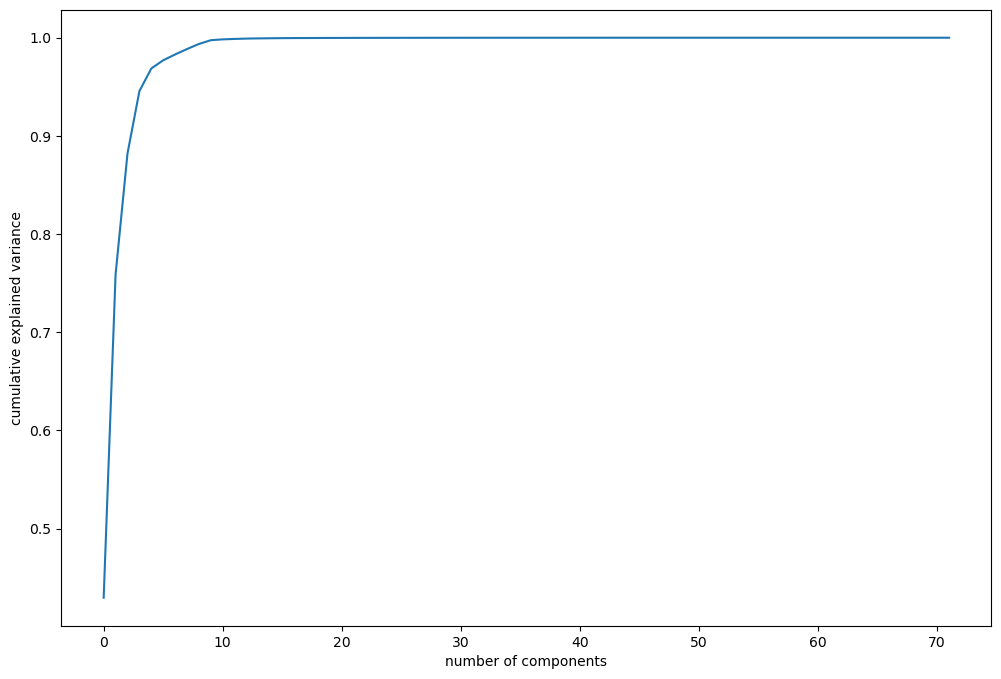

In [89]:
perform_PCA(X_train)

## <font color = "purple"> Insights: </font>

From the graph we can conlcude that **5 components are enough** for analysis beacuse this 5 components will give about **95% of variance** in the data after **5-10 the line is mostly constant.**

(20876, 5)
(20876, 1)
(8948, 5)
(8948, 1)


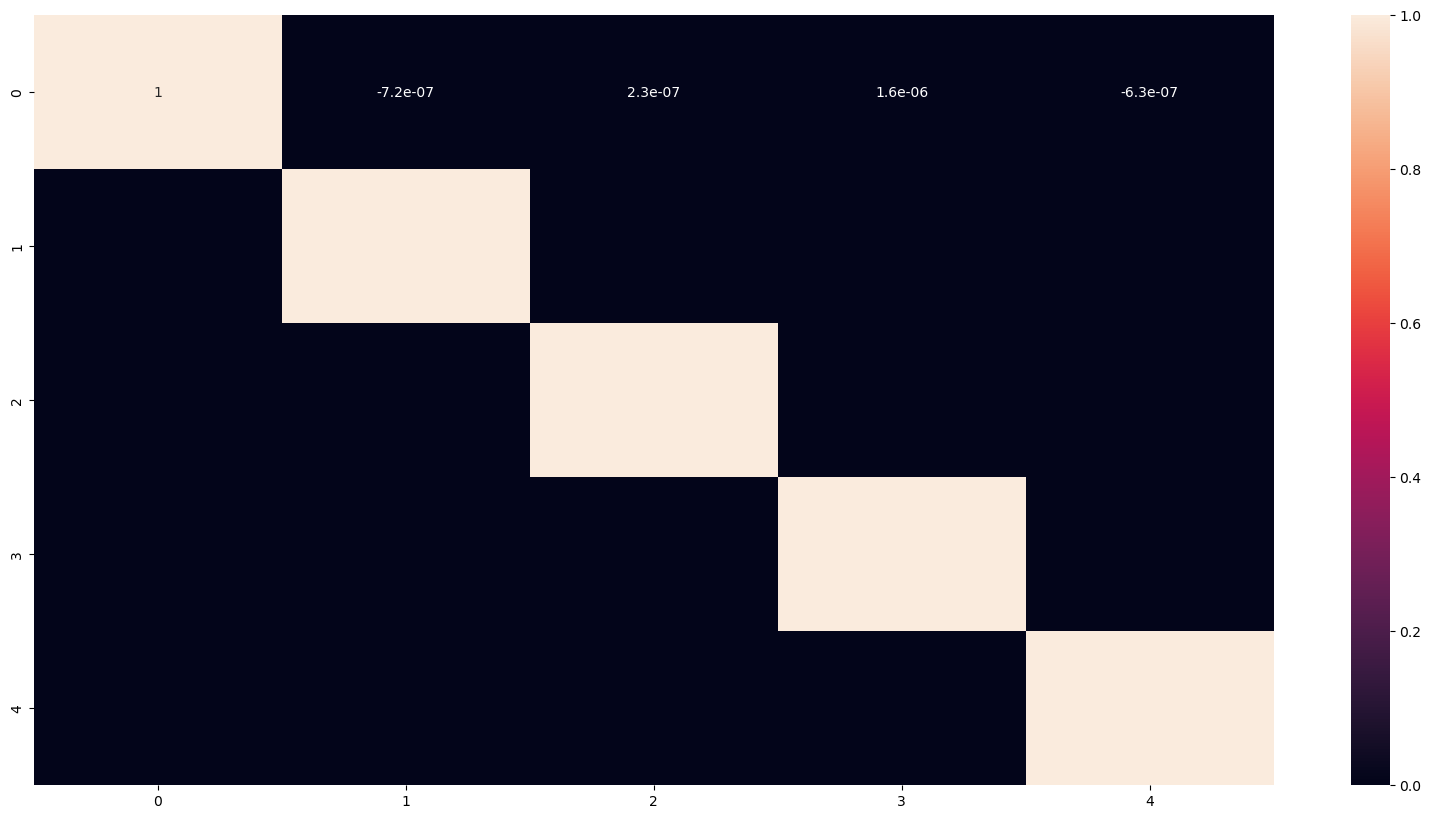

max corr: 6.50925412933724e-06 , min corr:  -7.981260001551664e-05


In [90]:
X_train_pca, X_test_pca = perform_incremental_PCA(X_train, y_train, 5)

As all the blocks are in the black color that shows us that there in **No correlation between any two components.**

In [91]:
X_train_resampled, y_train_resampled = implement_smoteenn(X_train_pca, y_train)

(26280, 5)
(26280, 1)


## <font color = "green"> Logistic Regression</font>

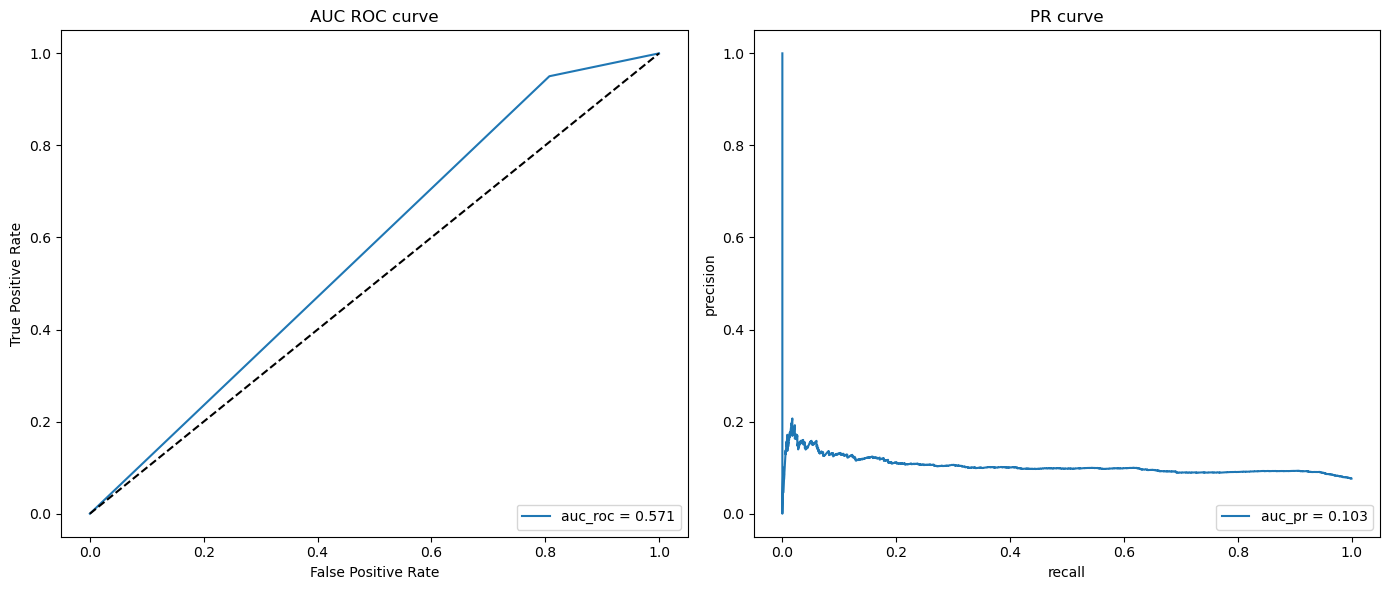

f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.162378   0.088774  0.950292  0.250559  0.571468  0.103155  [[1592, 6672], [34, 650]]

In [92]:
lr = LogisticRegression(n_jobs = -1, random_state = 100)

lr = lr.fit(X_train_resampled.values, y_train_resampled.values.ravel())

scores = []

scores = get_scores(scores, lr, X_test_pca)

sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

This is with the default parametet now we can do this with hypertuning.

Fitting 5 folds for each of 2 candidates, totalling 10 fits


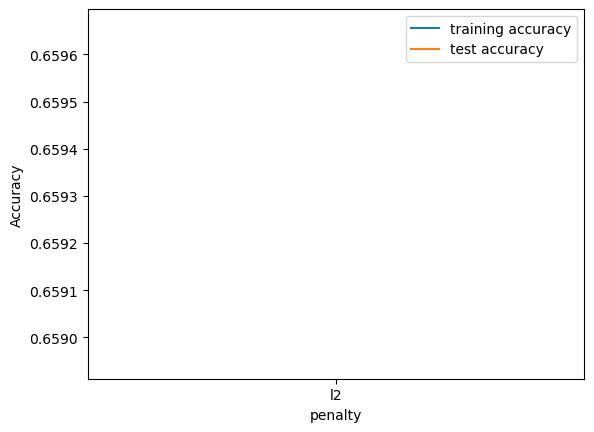

{'penalty': 'l2'}

In [93]:
lr = LogisticRegression(n_jobs = -1, random_state = 100)

parameter = 'penalty'

param_grid = {parameter: ['l1', 'l2']}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lr)
    
scores = gc.cv_results_

hypertuning_plot(scores, parameter)

gc.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


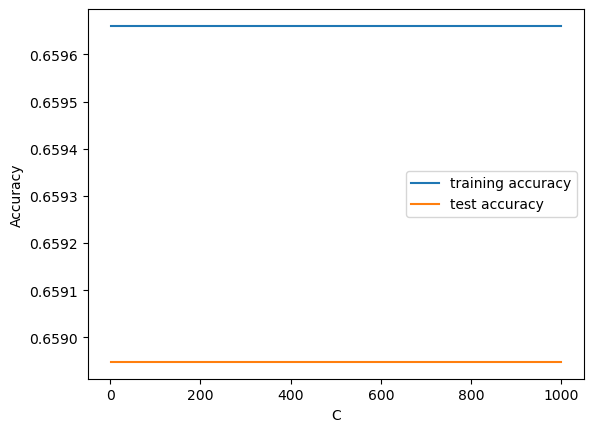

{'C': 1}

In [94]:
lr = LogisticRegression(penalty = 'l2', n_jobs = -1, random_state = 100)

parameter = 'C'

param_grid = {parameter: [1, 10, 100, 1000]}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lr)

scores = gc.cv_results_


hypertuning_plot(scores, parameter)

gc.best_params_

NOW we can run our logistic regression on the best parameters obtained from grid search.

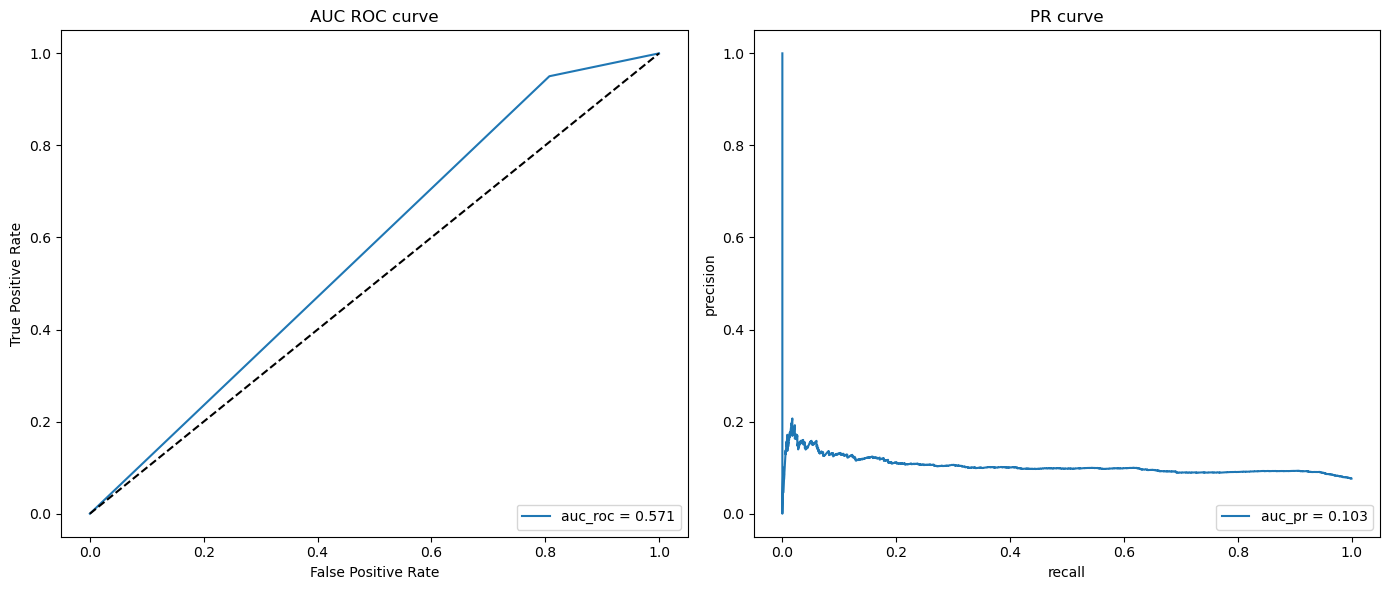

f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.162378   0.088774  0.950292  0.250559  0.571468  0.103155  [[1592, 6672], [34, 650]]

In [95]:
lr = LogisticRegression(penalty = 'l2', C = 1, n_jobs = -1, random_state = 100)

lrf = lr.fit(X_train_resampled.values, y_train_resampled.values.ravel())


scores = []

scores = get_scores(scores, lrf, X_test_pca)


sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

In [96]:
dataset = []

dataset = apply_transformations(dataset, X_train_resampled, y_train_resampled)

Transforming SMOTE
Transforming RandomOverSampler
Transforming NearMiss
Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek


Performing base
Performing SMOTE
Performing RandomOverSampler
Performing NearMiss
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


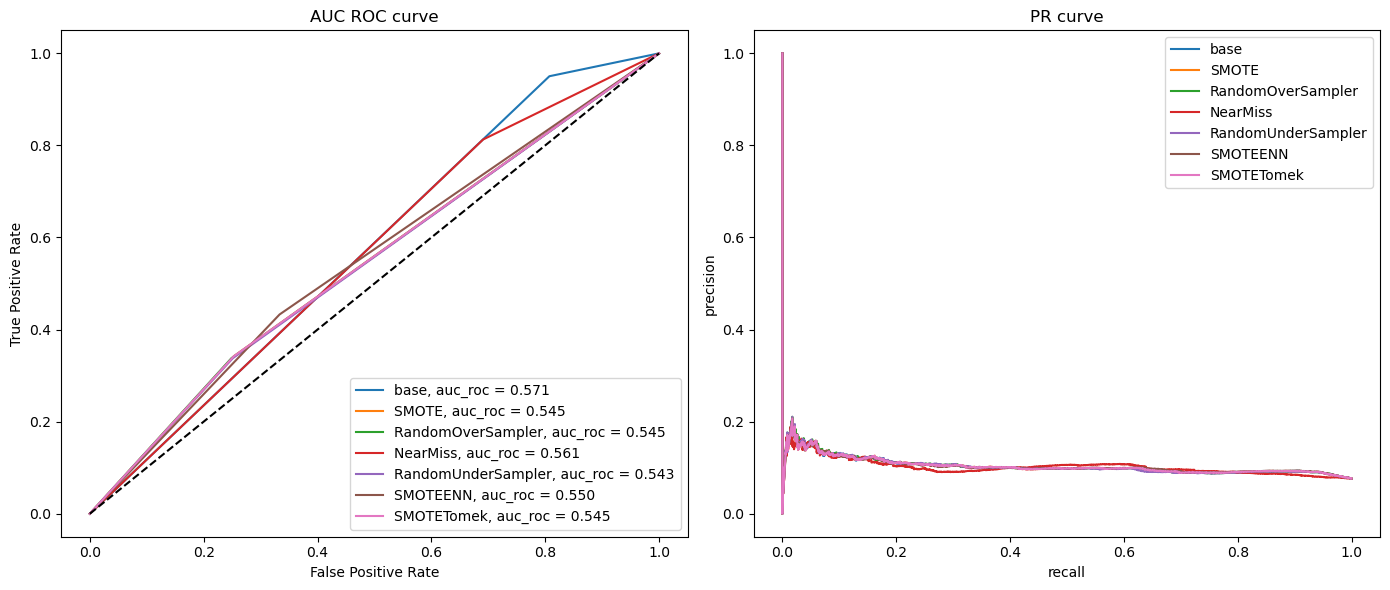

Sampling Type        f1  precision    recall  accuracy   auc_roc    auc_pr            confusion_matrix
0                base  0.162378   0.088774  0.950292  0.250559  0.571468  0.103155   [[1592, 6672], [34, 650]]
1               SMOTE  0.155533   0.100645  0.342105  0.716026  0.544540  0.103110  [[6173, 2091], [450, 234]]
2   RandomOverSampler  0.155556   0.101050  0.337719  0.719714  0.544525  0.103137  [[6209, 2055], [453, 231]]
3            NearMiss  0.160000   0.088733  0.812865  0.347564  0.560958  0.101446  [[2554, 5710], [128, 556]]
4  RandomUnderSampler  0.154515   0.100173  0.337719  0.717479  0.543315  0.102876  [[6189, 2075], [453, 231]]
5            SMOTEENN  0.158543   0.097049  0.432749  0.648860  0.549748  0.103418  [[5510, 2754], [388, 296]]
6          SMOTETomek  0.155585   0.100688  0.342105  0.716138  0.544601  0.103111  [[6174, 2090], [450, 234]]

In [97]:
lr_sampling_results = get_different_sampling_type_results('Logistic', X_test_pca)

lr_sampling_results

## <font color = "purple"> Insights: </font>

From the numbers that we got from Logistic Regression we can conclude that it **Not** the best model to use in this situation.
because the numbers are **very low** which shows its less effictiveness.

We will few other models from **Tree family** which might get us the desired score.

## <font color = "green">  Decision Tree</font>

In [98]:
X_train_resampled, y_train_resampled = implement_smoteenn(X_train, y_train)

(31471, 72)
(31471, 1)


NOW we are going to run decision tree on default parameters.

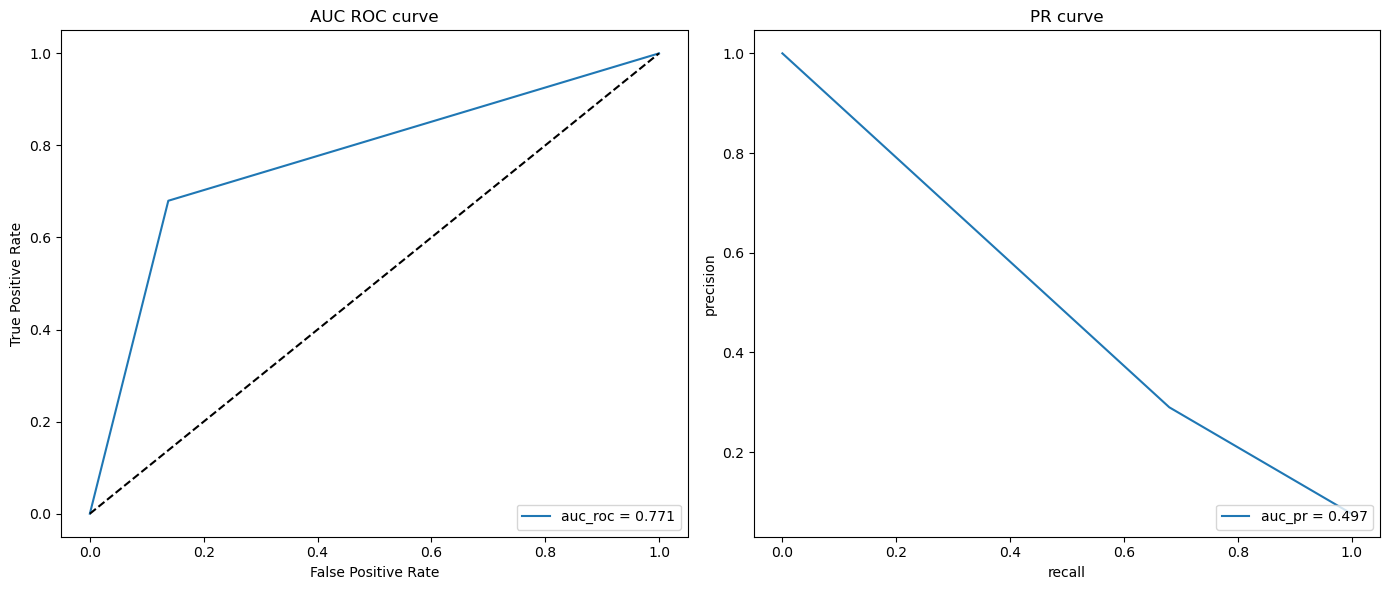

f1  precision    recall  accuracy   auc_roc  auc_pr            confusion_matrix
0  0.406469     0.2899  0.679825  0.848234  0.770999  0.4971  [[7125, 1139], [219, 465]]

In [99]:
tree = DecisionTreeClassifier(random_state = 100)

tree = tree.fit(X_train_resampled.values, y_train_resampled.values.ravel())

scores = []

scores = get_scores(scores, tree, X_test)

sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

We are using hypertuning max_depth

Fitting 5 folds for each of 29 candidates, totalling 145 fits


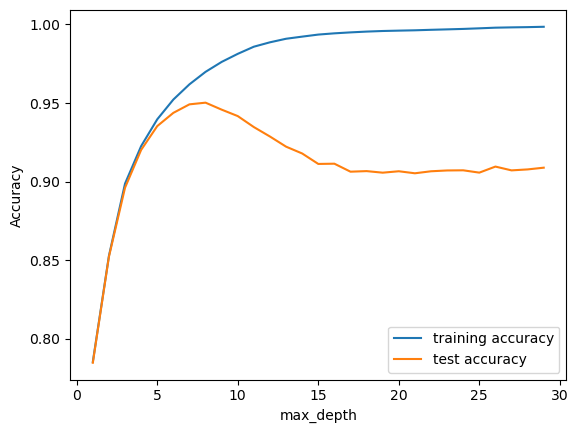

{'max_depth': 8}

In [100]:
tree = DecisionTreeClassifier(random_state = 100)

parameter = 'max_depth'

param_grid = {parameter: range(1, 30)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', tree)
    
scores = gc.cv_results_

hypertuning_plot(scores, parameter)

gc.best_params_

Now with Min sample split

Fitting 5 folds for each of 28 candidates, totalling 140 fits


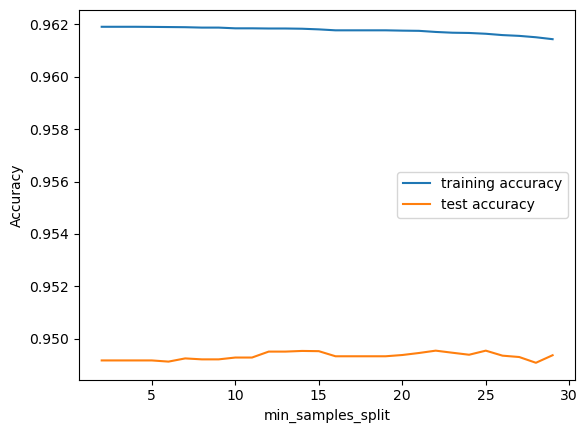

{'min_samples_split': 22}

In [101]:
tree = DecisionTreeClassifier(max_depth = 7, random_state = 100)

parameter = 'min_samples_split'

param_grid = {parameter: range(2, 30)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', tree)
    
scores = gc.cv_results_

hypertuning_plot(scores, parameter)

gc.best_params_

Now with Min_samples_leaf

Fitting 5 folds for each of 60 candidates, totalling 300 fits


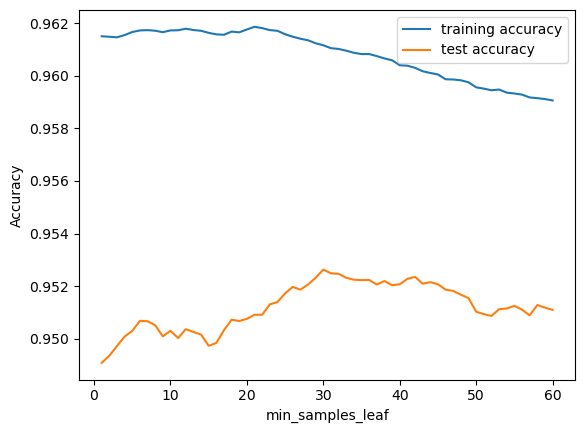

{'min_samples_leaf': 30}

In [102]:
tree = DecisionTreeClassifier(max_depth = 7, min_samples_split = 28, random_state = 100)

parameter = 'min_samples_leaf'

param_grid = {parameter: range(1, 61)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', tree)
    
scores = gc.cv_results_

hypertuning_plot(scores, parameter)

gc.best_params_

Now  we are going to run decision tree on best parameters got from grid search

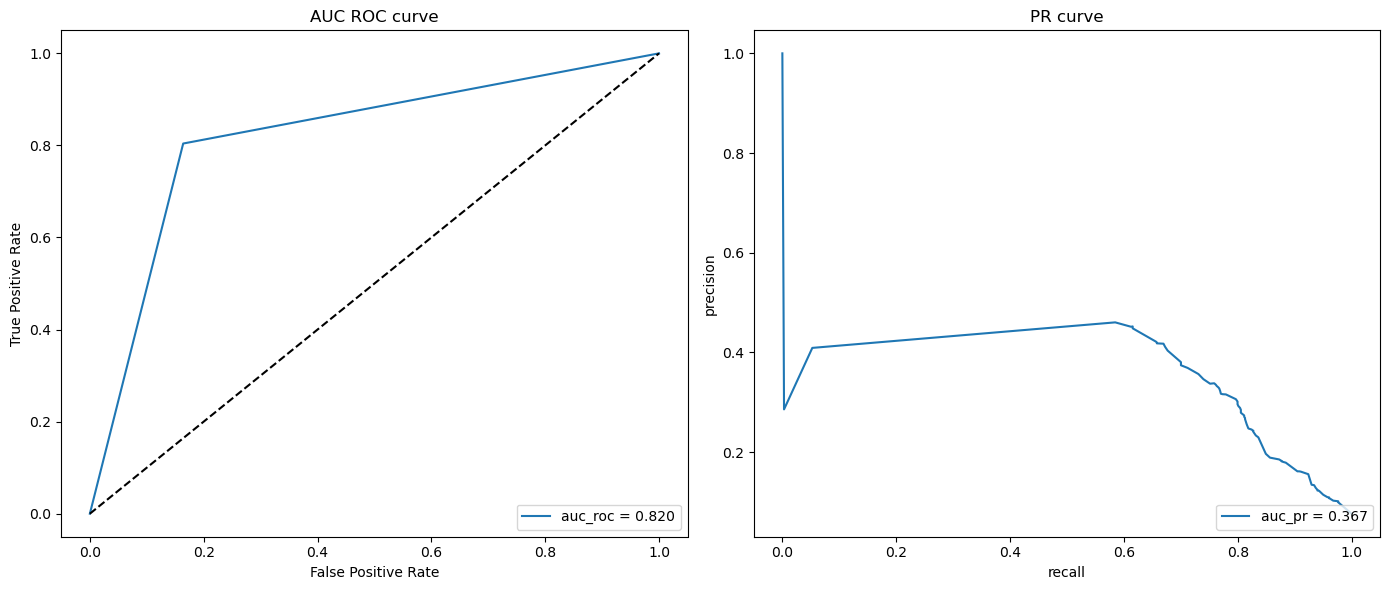

f1  precision    recall  accuracy   auc_roc    auc_pr            confusion_matrix
0  0.424874   0.288714  0.804094  0.833594  0.820065  0.367253  [[6909, 1355], [134, 550]]

In [103]:
tree = DecisionTreeClassifier(max_depth = 7, min_samples_split = 28, min_samples_leaf = 36, random_state = 100)

tree = tree.fit(X_train_resampled.values, y_train_resampled.values.ravel())

scores = []

scores = get_scores(scores, tree, X_test)

sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results



## <font color = "purple"> Insights: </font>

The accuracy of decision tree model is **0.833** means about **84%** which is better then logistic regression. We can see a good improvement in f1,precision and recall values.
This shows that decision tree is better model but still we need to improve the accuracy of the model.

Also we have used SMOTEENN as sampling method but we can use another methods to check wheather we can improve the accuracy of model or not.

In [104]:
dataset = []

dataset = apply_transformations(dataset, X_train, y_train)

Transforming SMOTE
Transforming RandomOverSampler
Transforming NearMiss
Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek


Performing base
Performing SMOTE
Performing RandomOverSampler
Performing NearMiss
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


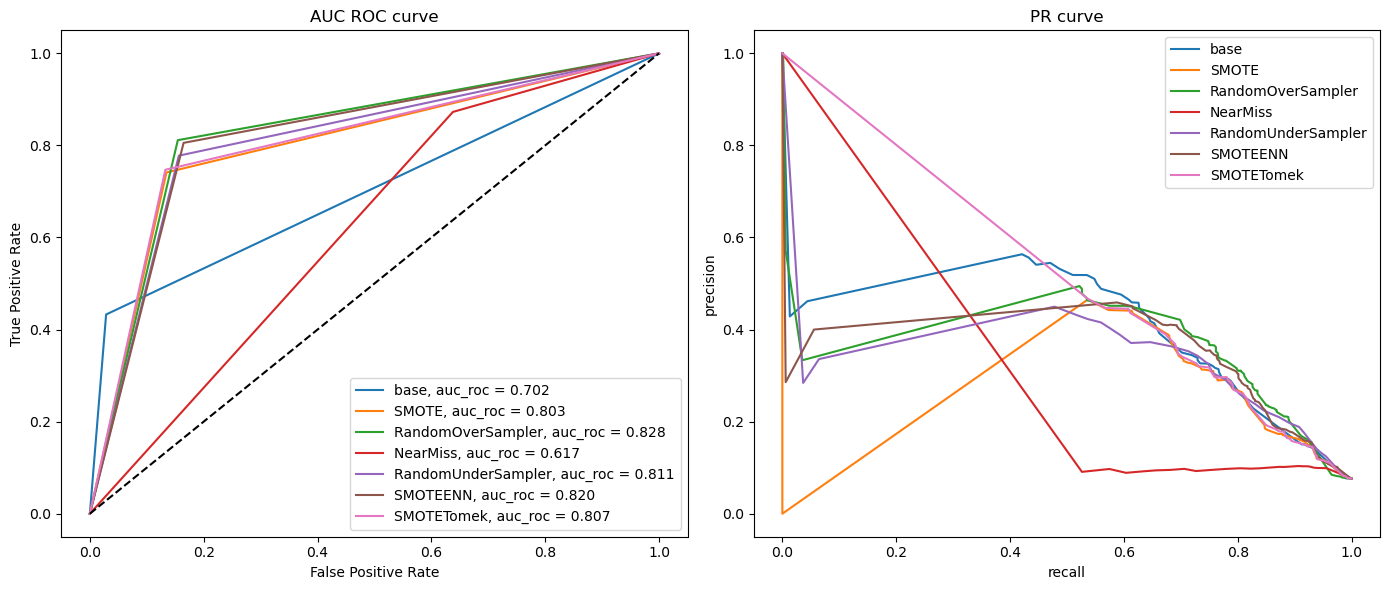

Sampling Type        f1  precision    recall  accuracy   auc_roc    auc_pr            confusion_matrix
0                base  0.486842   0.556391  0.432749  0.930264  0.702095  0.415558   [[8028, 236], [388, 296]]
1               SMOTE  0.440295   0.313156  0.741228  0.855945  0.803334  0.256391  [[7152, 1112], [177, 507]]
2   RandomOverSampler  0.441176   0.302948  0.811404  0.842870  0.828439  0.372123  [[6987, 1277], [129, 555]]
3            NearMiss  0.182207   0.101721  0.872807  0.401095  0.617430  0.332411   [[2992, 5272], [87, 597]]
4  RandomUnderSampler  0.424242   0.291667  0.777778  0.838623  0.810719  0.350147  [[6972, 1292], [152, 532]]
5            SMOTEENN  0.424499   0.288180  0.805556  0.833035  0.820433  0.367297  [[6903, 1361], [133, 551]]
6          SMOTETomek  0.446093   0.317984  0.747076  0.858181  0.807226  0.525761  [[7168, 1096], [173, 511]]

In [105]:
ds_sampling_results = get_different_sampling_type_results('Decision Tree', X_test)

ds_sampling_results

## <font color = "purple"> Insights: </font>

As we can see from the results that **RandomOverSampler** is the best sampling method to use.but the accuracy of model is still not that good (0.842).
So we can try another model from **Tree family** which is **Random forest.**


Random forest is collection of multiple disicion trees and becasue of this Random foreset on default or with hypertuning can take a lot of time to perform all the task.

Similar to Random forest we have **Adaboost** or short for **Adaptive boosting** will take a lot of time run the model which is not efficient.

## <font color = "sky blue -black"> LightGBM</font>


This is short introduction to LightGBM and the reason why we are using this model instead of Random Forest and XGBOOST.

We have XGBOOST which the family of Adaboost. XGBOOST uses gradient boosting which is highly effecitive, flexible but because of the effective gradient approach XGBOOST takes a lot time when the data is too big.

To solve this problem we have LightGBM which stands for Light gradient boosting machine which is tree based algorithm.
we can use LightBGM with big data because it is **faster then XGBOOST** and even Random Forest.

Also LightGBM uses **less memory** then its other compitative models.Hence LightGBM will be the perfect choice to get high accuracy here.


We can start with running LightGBM on default parameters.

[LightGBM] [Info] Number of positive: 18075, number of negative: 13396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17661
[LightGBM] [Info] Number of data points in the train set: 31471, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.574338 -> initscore=0.299574
[LightGBM] [Info] Start training from score 0.299574


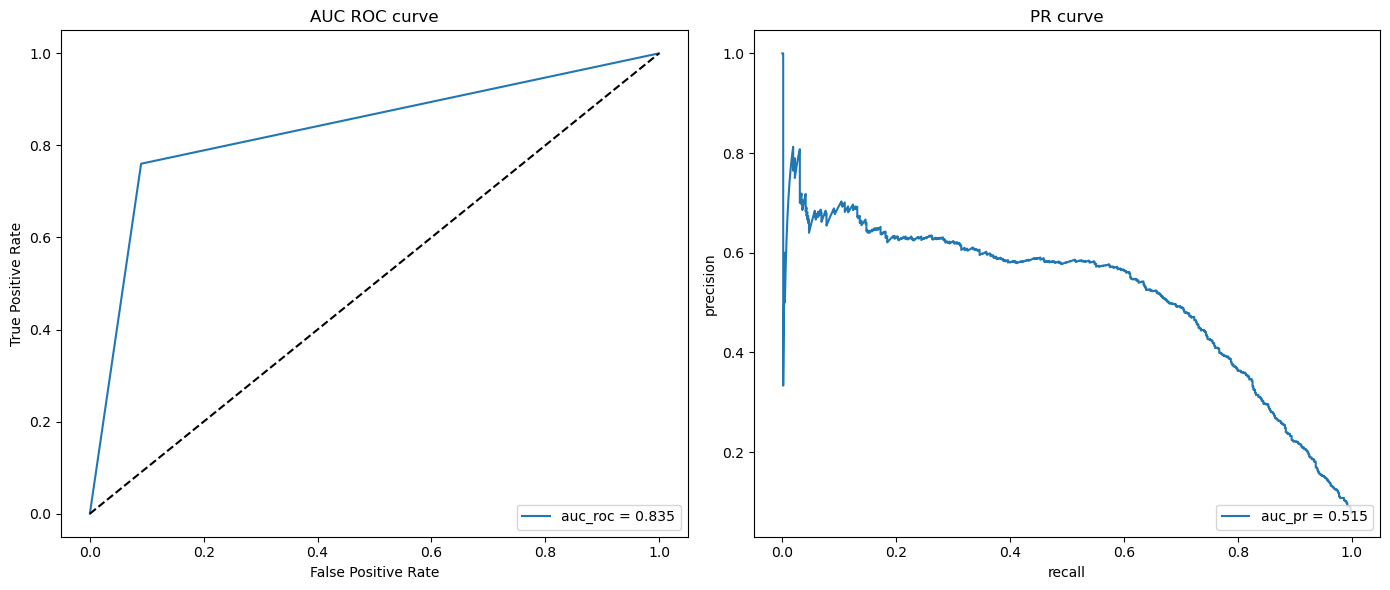

f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.533881   0.411392  0.760234  0.898525  0.835102  0.514789  [[7520, 744], [164, 520]]

In [106]:
lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 100)

lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())


scores = []

scores = get_scores(scores, lgb, X_test)

sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

Let's continue with hypertuing using gridsearch

**Hypertuning with num_leaves**

Fitting 5 folds for each of 52 candidates, totalling 260 fits
[LightGBM] [Info] Number of positive: 18075, number of negative: 13396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17661
[LightGBM] [Info] Number of data points in the train set: 31471, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.574338 -> initscore=0.299574
[LightGBM] [Info] Start training from score 0.299574


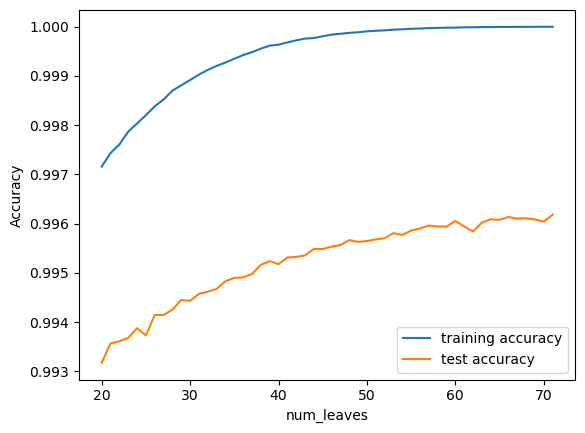

{'num_leaves': 71}

In [107]:
lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'num_leaves'

param_grid = {parameter: range(20, 72)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    

scores = gc.cv_results_

hypertuning_plot(scores, parameter)

gc.best_params_

**Max_depth**

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[LightGBM] [Info] Number of positive: 18075, number of negative: 13396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17661
[LightGBM] [Info] Number of data points in the train set: 31471, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.574338 -> initscore=0.299574
[LightGBM] [Info] Start training from score 0.299574


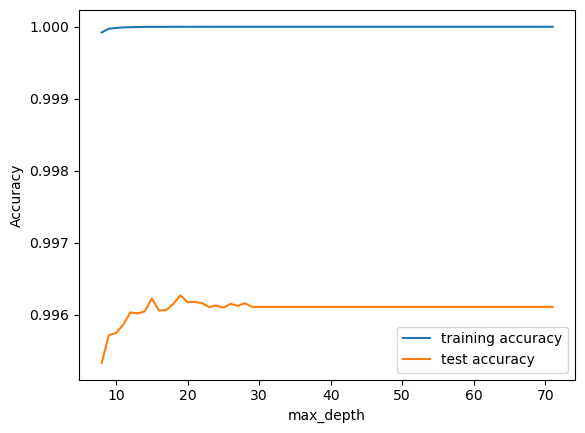

{'max_depth': 19}

In [108]:
lgb = LGBMClassifier(num_leaves = 68, objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'max_depth'

param_grid = {parameter: range(8, 72)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    

scores = gc.cv_results_

hypertuning_plot(scores, parameter)

gc.best_params_

**learning rate**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 18075, number of negative: 13396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17661
[LightGBM] [Info] Number of data points in the train set: 31471, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.574338 -> initscore=0.299574
[LightGBM] [Info] Start training from score 0.299574


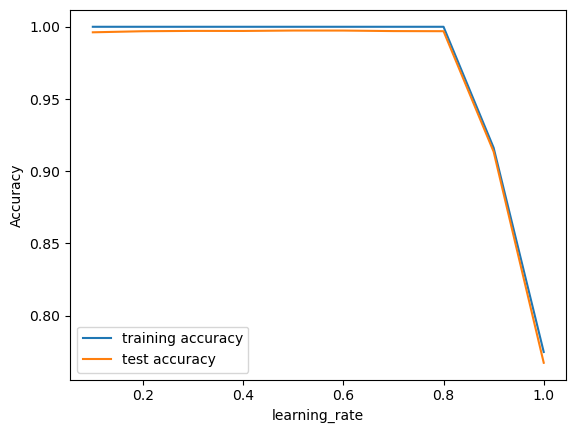

{'learning_rate': 0.5}

In [109]:
import warnings
warnings.filterwarnings('ignore')

lgb = LGBMClassifier(num_leaves = 68, max_depth = 20, objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'learning_rate'

param_grid = {parameter: np.arange(0.1, 1.1, 0.1)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
scores = gc.cv_results_

hypertuning_plot(scores, parameter)

gc.best_params_

**n_estimators**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 18075, number of negative: 13396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17661
[LightGBM] [Info] Number of data points in the train set: 31471, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.574338 -> initscore=0.299574
[LightGBM] [Info] Start training from score 0.299574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

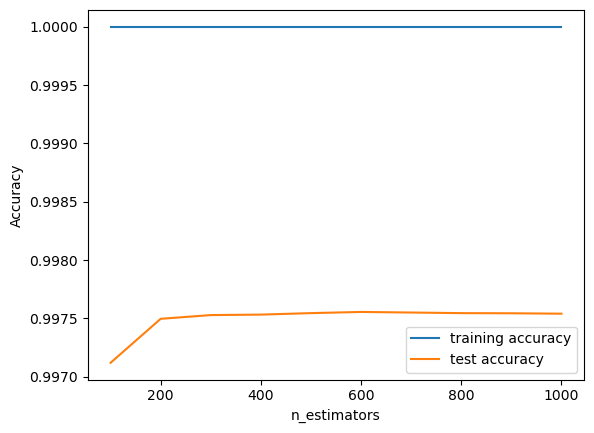

{'n_estimators': 600}

In [110]:
import warnings
warnings.filterwarnings('ignore')

lgb = LGBMClassifier(num_leaves = 68, max_depth = 20, learning_rate = 0.4, objective = 'binary',
                     n_jobs = -1, random_state = 100)

parameter = 'n_estimators'

param_grid = {parameter: range(100, 1100, 100)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
scores = gc.cv_results_


hypertuning_plot(scores, parameter)


gc.best_params_


**min_child_samples**

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[LightGBM] [Info] Number of positive: 18075, number of negative: 13396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17661
[LightGBM] [Info] Number of data points in the train set: 31471, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.574338 -> initscore=0.299574
[LightGBM] [Info] Start training from score 0.299574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

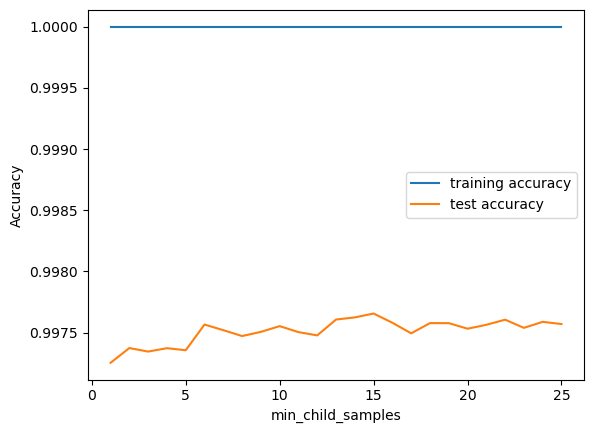

{'min_child_samples': 15}

In [111]:
import warnings
warnings.filterwarnings('ignore')


lgb = LGBMClassifier(num_leaves = 68, max_depth = 20, learning_rate = 0.4, n_estimators = 400,
                     objective = 'binary', n_jobs = -1, random_state = 100)

parameter = 'min_child_samples'

param_grid = {parameter: range(1, 26)}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lgb)
    
scores = gc.cv_results_

hypertuning_plot(scores, parameter)

gc.best_params_

## <font color = "purple"> Insights: </font>

Now we can run LightBGM on best parameter which we obtained from using grid search.

[LightGBM] [Info] Number of positive: 18075, number of negative: 13396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17661
[LightGBM] [Info] Number of data points in the train set: 31471, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.574338 -> initscore=0.299574
[LightGBM] [Info] Start training from score 0.299574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

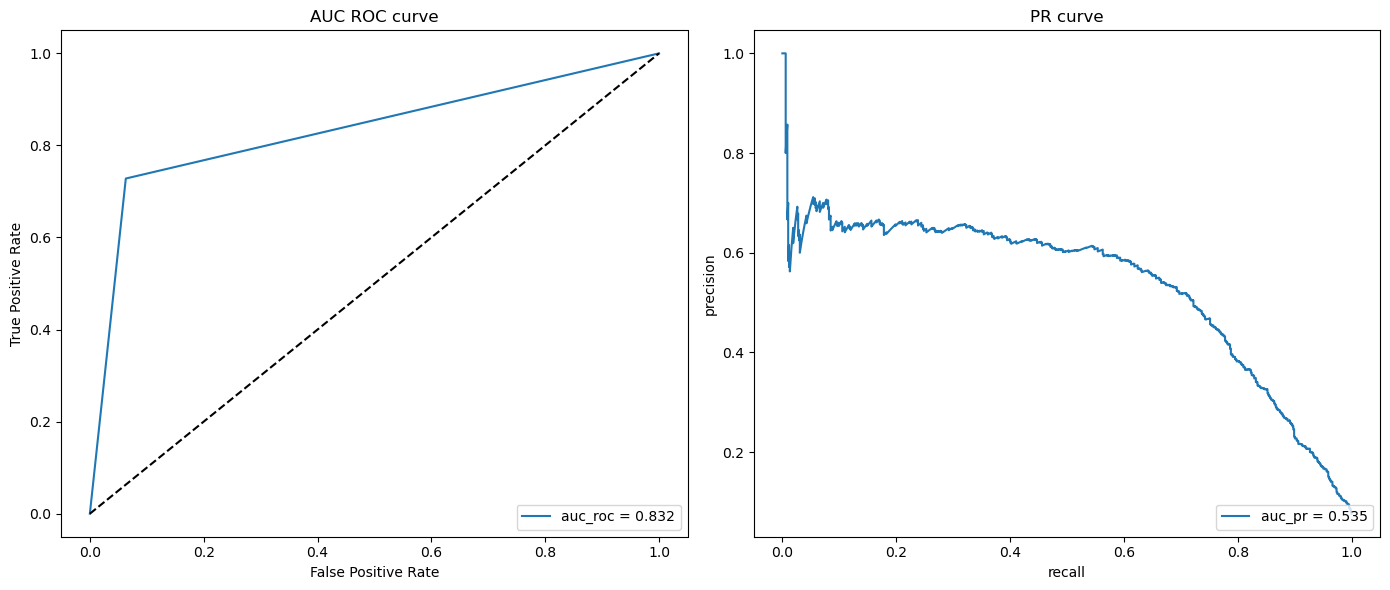

f1  precision   recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.584507   0.488235  0.72807  0.920876  0.832452  0.535194  [[7742, 522], [186, 498]]

In [112]:
import warnings
warnings.filterwarnings('ignore')

lgb = LGBMClassifier(num_leaves = 68, max_depth = 20, learning_rate = 0.4, n_estimators = 400, min_child_samples = 17,
                     subsample = 0.1, colsample_bytree = 0.2, objective = 'binary', n_jobs = -1, random_state = 100)

lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())


scores = []

scores = get_scores(scores, lgb, X_test)


sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

We can see a significant improve in accuracy and also in f1,precision and racall
Let's use SMOTEENN method to improve the accuracy further.

Performing base
[LightGBM] [Info] Number of positive: 1680, number of negative: 19196
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13115
[LightGBM] [Info] Number of data points in the train set: 20876, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080475 -> initscore=-2.435908
[LightGBM] [Info] Start training from score -2.435908
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

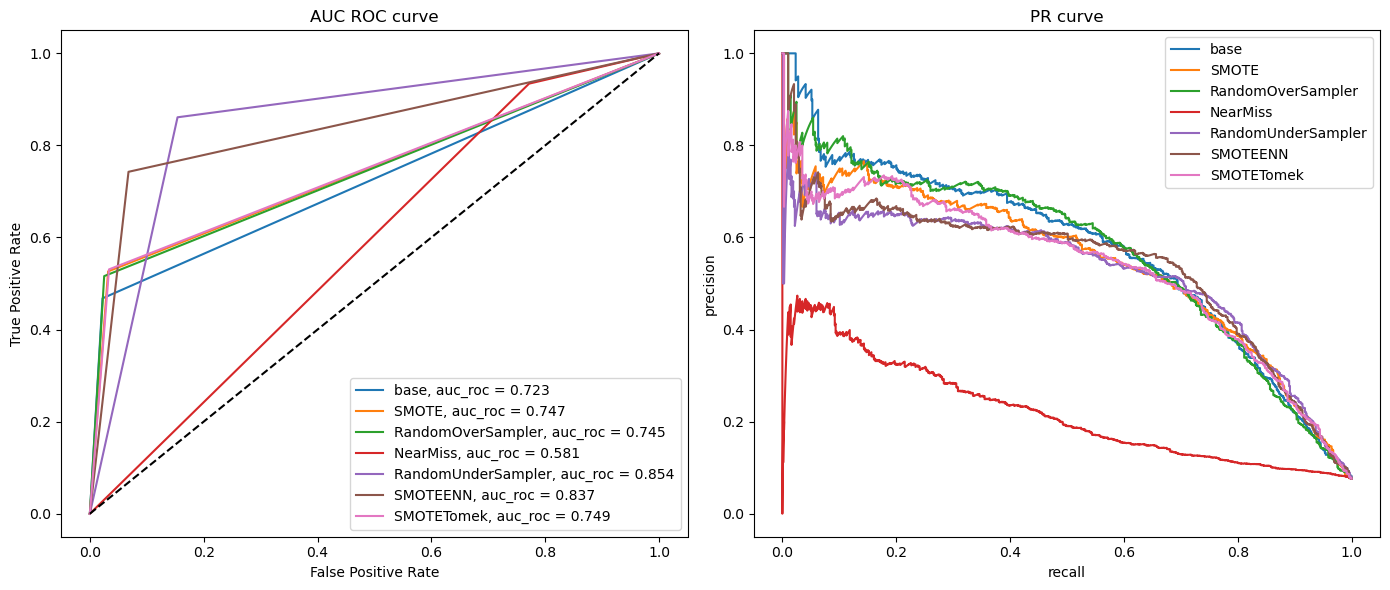

Sampling Type        f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0                base  0.538721   0.634921  0.467836  0.938757  0.722786  0.574290  [[8080, 184], [364, 320]]
1               SMOTE  0.550038   0.576000  0.526316  0.934175  0.747124  0.546538  [[7999, 265], [324, 360]]
2   RandomOverSampler  0.567068   0.629234  0.516082  0.939763  0.745456  0.569315  [[8056, 208], [331, 353]]
3            NearMiss  0.165974   0.091078  0.934211  0.282298  0.581275  0.219212  [[1887, 6377], [45, 639]]
4  RandomUnderSampler  0.462687   0.316327  0.861111  0.847117  0.853535  0.524659  [[6991, 1273], [95, 589]]
5            SMOTEENN  0.579578   0.475210  0.742690  0.917635  0.837403  0.537849  [[7703, 561], [176, 508]]
6          SMOTETomek  0.547925   0.566303  0.530702  0.933058  0.748531  0.536482  [[7986, 278], [321, 363]]

Performing RandomUnderSampler
[LightGBM] [Info] Number of positive: 1680, number of negative: 1680
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12318
[LightGBM] [Info] Number of data points in the train set: 3360, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 18075, number of negative: 13396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17661
[LightGBM] [Info] Number of data points in the train set: 31471, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.574338 -> initscore=0.299574
[LightGBM] [Info] Start training from score 0.299574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Training on SMOTEENN
Training on SMOTETomek


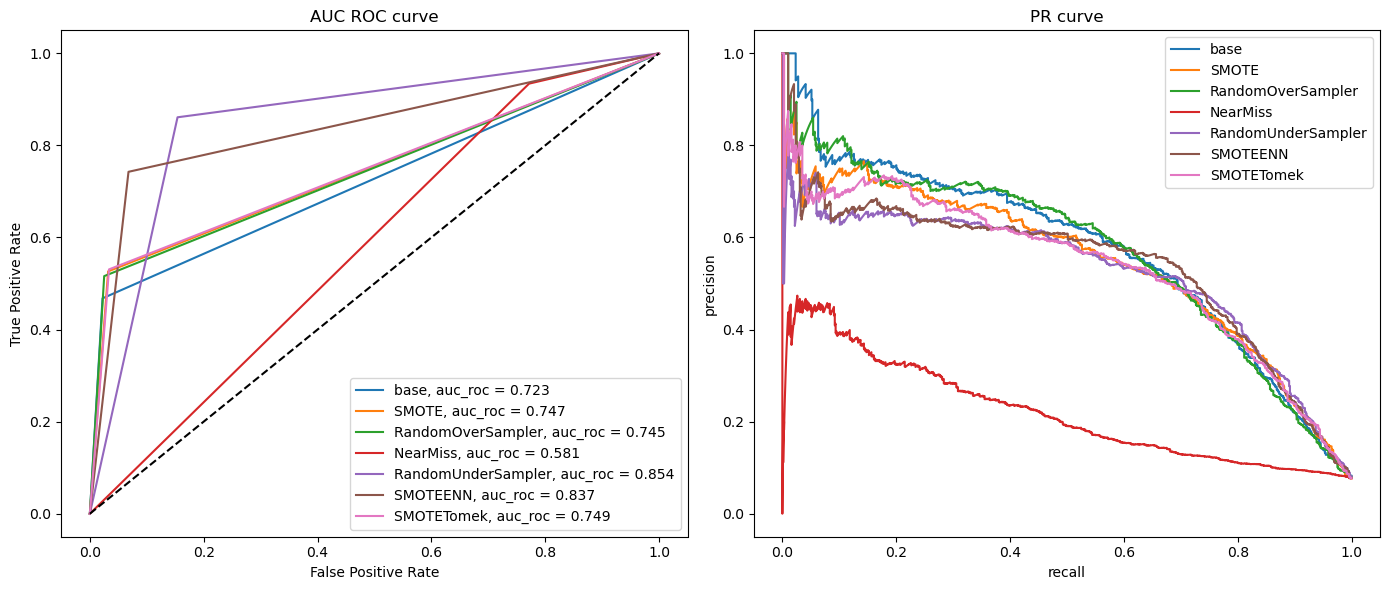

Sampling Type        f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0                base  0.538721   0.634921  0.467836  0.938757  0.722786  0.574290  [[8080, 184], [364, 320]]
1               SMOTE  0.550038   0.576000  0.526316  0.934175  0.747124  0.546556  [[7999, 265], [324, 360]]
2   RandomOverSampler  0.567068   0.629234  0.516082  0.939763  0.745456  0.569315  [[8056, 208], [331, 353]]
3            NearMiss  0.165974   0.091078  0.934211  0.282298  0.581275  0.219212  [[1887, 6377], [45, 639]]
4  RandomUnderSampler  0.462687   0.316327  0.861111  0.847117  0.853535  0.524659  [[6991, 1273], [95, 589]]
5            SMOTEENN  0.579578   0.475210  0.742690  0.917635  0.837403  0.537850  [[7703, 561], [176, 508]]
6          SMOTETomek  0.547925   0.566303  0.530702  0.933058  0.748531  0.536483  [[7986, 278], [321, 363]]

In [113]:
import warnings
warnings.filterwarnings('ignore')

lgb_sampling_results = get_different_sampling_type_results('LightGBM', X_test)


lgb_sampling_results

From this we can conclude that using RandomOverSampler as a sampling method will give us **highest accuracy 93.97%** and also high values on f1, recall and percision.

## Important Features

In [114]:
import warnings
warnings.filterwarnings('ignore')

sampling = RandomOverSampler(random_state = 100)
X_train_resampled, y_train_resampled = sampling.fit_resample(X_train.values, y_train.values.ravel())


perms = np.random.permutation(X_train_resampled.shape[0])
X_train_resampled = X_train_resampled[perms]
y_train_resampled = y_train_resampled[perms]

X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)

print(X_train_resampled.shape)
print(y_train_resampled.shape)

(38392, 72)
(38392, 1)


[LightGBM] [Info] Number of positive: 19196, number of negative: 19196
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13122
[LightGBM] [Info] Number of data points in the train set: 38392, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

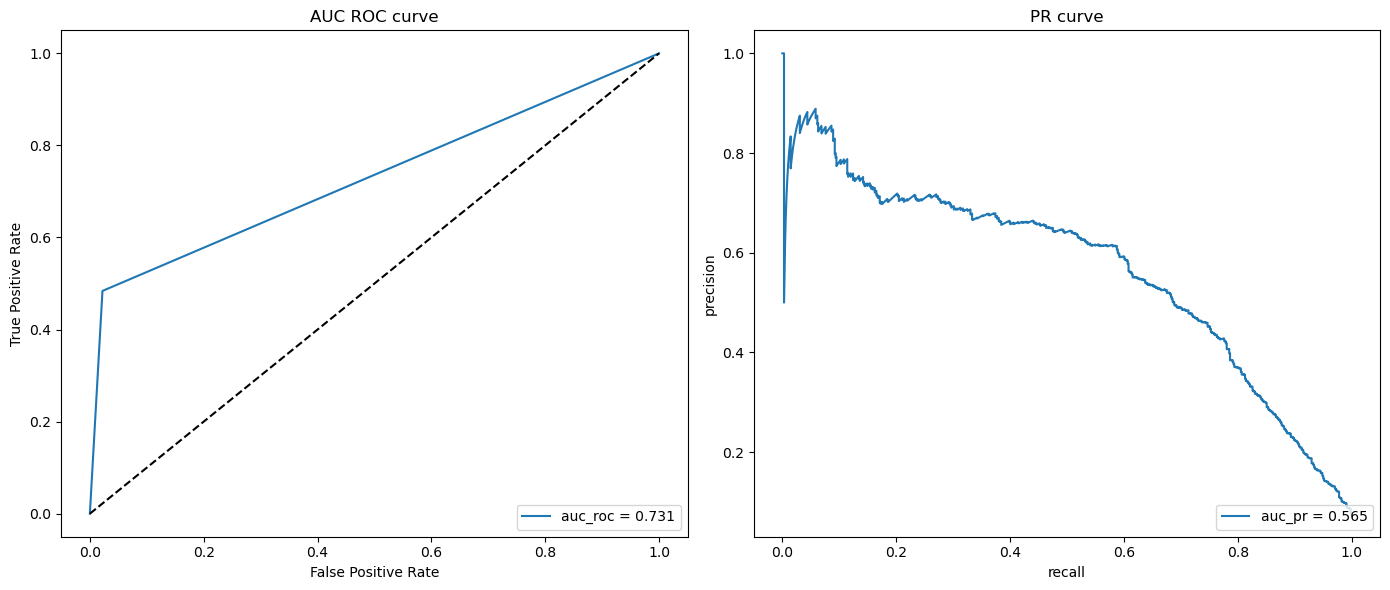

f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.552588   0.643969  0.483918  0.940098  0.730887  0.565371  [[8081, 183], [353, 331]]

In [115]:
import warnings
warnings.filterwarnings('ignore')

lgb = LGBMClassifier(num_leaves = 68, max_depth = 20, learning_rate = 0.4, n_estimators = 400, min_child_samples = 17,
                     subsample = 0.1, colsample_bytree = 0.2, objective = 'binary', n_jobs = -1, random_state = 100)

lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())


scores = []

scores = get_scores(scores, lgb, X_test)


sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

In [116]:
import warnings
warnings.filterwarnings('ignore')

feature_importances = pd.DataFrame(lgb.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

importance
loc_ic_mou_good_phase                   1101
total_ic_mou_good_phase                 1084
total_rech_amt_good_phase               1004
onnet_mou_good_phase                     923
offnet_mou_good_phase                    908
loc_og_mou_good_phase                    865
std_ic_mou_good_phase                    822
max_rech_amt_good_phase                  815
arpu_good_phase                          797
spl_og_mou_good_phase                    771
total_rech_num_good_phase                754
std_og_mou_good_phase                    754
total_og_mou_good_phase                  606
aon                                      553
vol_2g_mb_good_phase                     478
loc_ic_mou_action_phase                  462
total_data_rech_amt_good_phase           456
roam_ic_mou_good_phase                   441
total_rech_amt_action_phase              438
roam_og_mou_good_phase                   435
total_og_mou_action_phase                430
total_data_rech_amt_action_phase         428
vol_3g_mb_good_phase                     425
loc_og_mou_action_phase                  407
max_rech_amt_action_phase                396
ic_others_good_phase                     373
arpu_action_phase                        364
max_rech_data_good_phase                 364
total_rech_num_action_phase              348
isd_ic_mou_good_phase                    337
total_ic_mou_action_phase                334
vbc_3g_action_phase                      333
vbc_3g_good_phase                        319
onnet_mou_action_phase                   292
std_ic_mou_action_phase                  291
roam_og_mou_action_phase                 284
spl_og_mou_action_phase                  280
vol_2g_mb_action_phase                   277
std_og_mou_action_phase                  274
vol_3g_mb_action_phase                   270
og_others_good_phase                     268
spl_ic_mou_good_phase                    266
roam_ic_mou_action_phase                 255
offnet_mou_action_phase                  250
ic_others_action_phase                   175
isd_ic_mou_action_phase                  168
count_rech_2g_good_phase                 161
max_rech_data_action_phase               151
isd_og_mou_good_phase                    151
total_rech_data_good_phase               149
sachet_2g_good_phase                     133
spl_ic_mou_action_phase                  130
sachet_2g_action_phase                   109
total_rech_data_action_phase             104
count_rech_3g_good_phase                  91
og_others_action_phase                    86
fb_user_8                                 84
isd_og_mou_action_phase                   81
monthly_3g_action_phase                   74
sachet_3g_good_phase                      73
count_rech_2g_action_phase                68
monthly_3g_good_phase                     57
monthly_2g_good_phase                     51
monthly_2g_action_phase                   42
fb_user_6                                 37
count_rech_3g_action_phase                37
sachet_3g_action_phase                    36
fb_user_7                                 34
night_pck_user_7                           3
night_pck_user_8                           1
night_pck_user_6                           0
circle_id                                  0

## <font color = "purple"> Insights: </font>

This telecom customer attrition is about predicting customers chrun behavior.That means finding wheather the customer will leave the company or not.

We have seen the data of 4 months which includes three phases of customers: good phase, action phase and churn phase.

We used diiferent models to predict the churn behavior and the models are as follows:

 - Logistic Regression Model.
 - Decision Tree Classifier.
 - Light Gradient Boosting(also called as LightGBM). 
 

# <font color = "Green"> Conclusion</font>


So from all the models we have seen and discussed, Light Gradient Boosting(LightGBM) is **most effective and have high accuracy with using RandomOverSampler Technique as sampling method.**

We can see all the results as follows:

### Result for Logistic Regression

In [117]:
lr_sampling_results

Sampling Type        f1  precision    recall  accuracy   auc_roc    auc_pr            confusion_matrix
0                base  0.162378   0.088774  0.950292  0.250559  0.571468  0.103155   [[1592, 6672], [34, 650]]
1               SMOTE  0.155533   0.100645  0.342105  0.716026  0.544540  0.103110  [[6173, 2091], [450, 234]]
2   RandomOverSampler  0.155556   0.101050  0.337719  0.719714  0.544525  0.103137  [[6209, 2055], [453, 231]]
3            NearMiss  0.160000   0.088733  0.812865  0.347564  0.560958  0.101446  [[2554, 5710], [128, 556]]
4  RandomUnderSampler  0.154515   0.100173  0.337719  0.717479  0.543315  0.102876  [[6189, 2075], [453, 231]]
5            SMOTEENN  0.158543   0.097049  0.432749  0.648860  0.549748  0.103418  [[5510, 2754], [388, 296]]
6          SMOTETomek  0.155585   0.100688  0.342105  0.716138  0.544601  0.103111  [[6174, 2090], [450, 234]]

### Result for Decision Tree

In [118]:
ds_sampling_results

Sampling Type        f1  precision    recall  accuracy   auc_roc    auc_pr            confusion_matrix
0                base  0.486842   0.556391  0.432749  0.930264  0.702095  0.415558   [[8028, 236], [388, 296]]
1               SMOTE  0.440295   0.313156  0.741228  0.855945  0.803334  0.256391  [[7152, 1112], [177, 507]]
2   RandomOverSampler  0.441176   0.302948  0.811404  0.842870  0.828439  0.372123  [[6987, 1277], [129, 555]]
3            NearMiss  0.182207   0.101721  0.872807  0.401095  0.617430  0.332411   [[2992, 5272], [87, 597]]
4  RandomUnderSampler  0.424242   0.291667  0.777778  0.838623  0.810719  0.350147  [[6972, 1292], [152, 532]]
5            SMOTEENN  0.424499   0.288180  0.805556  0.833035  0.820433  0.367297  [[6903, 1361], [133, 551]]
6          SMOTETomek  0.446093   0.317984  0.747076  0.858181  0.807226  0.525761  [[7168, 1096], [173, 511]]

### Result for LightGBM (Light Gradient Boosting Machine)

In [119]:
lgb_sampling_results

Sampling Type        f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0                base  0.538721   0.634921  0.467836  0.938757  0.722786  0.574290  [[8080, 184], [364, 320]]
1               SMOTE  0.550038   0.576000  0.526316  0.934175  0.747124  0.546538  [[7999, 265], [324, 360]]
2   RandomOverSampler  0.567068   0.629234  0.516082  0.939763  0.745456  0.569315  [[8056, 208], [331, 353]]
3            NearMiss  0.165974   0.091078  0.934211  0.282298  0.581275  0.219212  [[1887, 6377], [45, 639]]
4  RandomUnderSampler  0.462687   0.316327  0.861111  0.847117  0.853535  0.524659  [[6991, 1273], [95, 589]]
5            SMOTEENN  0.579578   0.475210  0.742690  0.917635  0.837403  0.537849  [[7703, 561], [176, 508]]
6          SMOTETomek  0.547925   0.566303  0.530702  0.933058  0.748531  0.536482  [[7986, 278], [321, 363]]

In [120]:
lgb_sampling_graph = lgb_sampling_results.iloc[2,4]
ds_sampling_graph = ds_sampling_results.iloc[2,4]
lr_sampling_graph = lr_sampling_results.iloc[2,4]

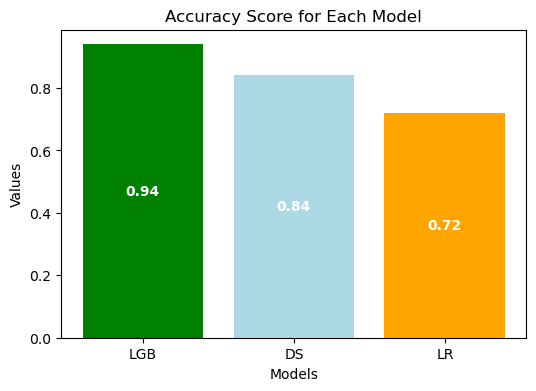

In [121]:
lgb_sampling_graph = lgb_sampling_results.iloc[2, 4]
ds_sampling_graph = ds_sampling_results.iloc[2, 4]
lr_sampling_graph = lr_sampling_results.iloc[2, 4]

models = ['LGB', 'DS', 'LR']
values = [lgb_sampling_graph, ds_sampling_graph, lr_sampling_graph]

colors = ['green', 'lightblue', 'orange']

plt.figure(figsize=(6, 4))
bars = plt.bar(models, values, color=colors)

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{value:.2f}', ha='center', va='center', color='white', fontweight='bold')

plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Accuracy Score for Each Model')
plt.show()


Top 10 features affecting churn:

- loc_ic_mou_good_phase:	1101
- total_ic_mou_good_phase:	1084
- total_rech_amt_good_phase:	1004
- onnet_mou_good_phase:	923
- offnet_mou_good_phase:	908
- loc_og_mou_good_phase:	865
- std_ic_mou_good_phase:	822
- max_rech_amt_good_phase:	815
- arpu_good_phase:	797
- spl_og_mou_good_phase:	771
 
These are top 10 features which affect the attrition with their importance.

## <font color = "Green"> Strategies to Manage Customer Attrition</font>

The **getting touch** with the customers seems the best strategy to deal with customer churn. From the action phase analysis we can observe that due to complains in service or frequent issues in network might cause these customer churns.

Also another best way to reduce the customer churn is to **offer them discounts or special offers** for these marketing team must come up with good plans.

Lastly Telecom company can **improve their network** so that customers will not think about moving to other telecom company that offers good network.